In [197]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

## Downloading the Data

In [216]:
## downloading cvs of created data
import pandas as pd

train_df = pd.read_csv('train.csv', sep=',')
val_df = pd.read_csv('dev.csv', sep=',')
test_df = pd.read_csv('test.csv', sep=',')
train_df.drop(['Unnamed: 0'], axis=1, inplace=True)
val_df.drop(['Unnamed: 0'], axis=1, inplace=True)
test_df.drop(['Unnamed: 0'], axis=1, inplace=True)
display(train_df)
display(val_df)
display(test_df)

date  total_cases  new_cases  new_cases_smoothed  total_deaths  \
0      1.585008e+09    -0.194338  -0.196817           -0.199902      0.007391   
1      1.585094e+09    -0.194326  -0.197407           -0.199757      0.007391   
2      1.585181e+09    -0.194321  -0.197997           -0.199698      0.007391   
3      1.585267e+09    -0.194298  -0.196620           -0.199495      0.007391   
4      1.585354e+09    -0.194298  -0.198390           -0.199495      0.007391   
...             ...          ...        ...                 ...           ...   
32798  1.603930e+09    -0.173515  -0.197407           -0.197138     -0.268163   
32799  1.604016e+09    -0.173442  -0.192687           -0.197080     -0.268163   
32800  1.604102e+09    -0.173409  -0.195833           -0.197138     -0.268163   
32801  1.604189e+09    -0.173409  -0.198390           -0.197487     -0.268163   
32802  1.604275e+09    -0.173379  -0.196030           -0.197342     -0.268074   

       new_deaths  new_deaths_smoothed  total_cases_per_million  \
0       -0.226347            -0.239105                -0.526424   
1       -0.226347            -0.239105                -0.517723   
2       -0.226347            -0.239105                -0.514243   
3       -0.226347            -0.239105                -0.498581   
4       -0.226347            -0.239105                -0.498581   
...           ...                  ...                      ...   
32798   -0.226347            -0.231169                -0.443301   
32799   -0.226347            -0.231169                -0.442939   
32800   -0.226347            -0.231169                -0.442776   
32801   -0.226347            -0.231169                -0.442776   
32802   -0.217659            -0.231169                -0.442626   

       new_cases_per_million  new_cases_smoothed_per_million  ...  \
0                   0.300057                       -0.250378  ...   
1                   0.077947                       -0.175102  ...   
2                  -0.144154                       -0.144996  ...   
3                   0.374090                       -0.039625  ...   
4                  -0.292229                       -0.039625  ...   
...                      ...                             ...  ...   
32798              -0.289573                       -0.389556  ...   
32799              -0.276807                       -0.389343  ...   
32800              -0.285313                       -0.389556  ...   
32801              -0.292229                       -0.390850  ...   
32802              -0.285850                       -0.390310  ...   

       extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  \
0             0.007324              -0.001390             0.892317   
1             0.007324              -0.001390             0.892317   
2             0.007324              -0.001390             0.892317   
3             0.007324              -0.001390             0.892317   
4             0.007324              -0.001390             0.892317   
...                ...                    ...                  ...   
32798         0.500864               0.474597            -1.478607   
32799         0.500864               0.474597            -1.478607   
32800         0.500864               0.474597            -1.478607   
32801         0.500864               0.474597            -1.478607   
32802         0.500864               0.474597            -1.478607   

       female_smokers  male_smokers  handwashing_facilities  \
0           -0.046508      0.025368               -0.062867   
1           -0.046508      0.025368               -0.062867   
2           -0.046508      0.025368               -0.062867   
3           -0.046508      0.025368               -0.062867   
4           -0.046508      0.025368               -0.062867   
...               ...           ...                     ...   
32798       -1.049477     -0.150829               -0.749497   
32799       -1.049477     -0.150829               -0.749497   


date  total_cases  new_cases  new_cases_smoothed  total_deaths  \
0     1.585008e+09    -0.194035  -0.194457           -0.196731      0.007391   
1     1.585094e+09    -0.193957  -0.192294           -0.195829      0.007391   
2     1.585181e+09    -0.193897  -0.193670           -0.196266      0.007391   
3     1.585267e+09    -0.193807  -0.191310           -0.195858     -0.289542   
4     1.585354e+09    -0.193699  -0.189934           -0.194607     -0.289542   
...            ...          ...        ...                 ...           ...   
9316  1.603930e+09    -0.147683  -0.143129           -0.160540     -0.229609   
9317  1.604016e+09    -0.146971  -0.142539           -0.156904     -0.229519   
9318  1.604102e+09    -0.145923  -0.116187           -0.149659     -0.229161   
9319  1.604189e+09    -0.144635  -0.097307           -0.139535     -0.228893   
9320  1.604275e+09    -0.143790  -0.132116           -0.135142     -0.228267   

      new_deaths  new_deaths_smoothed  total_cases_per_million  \
0      -0.226347            -0.239105                -0.227485   
1      -0.226347            -0.239105                -0.152940   
2      -0.226347            -0.239105                -0.095228   
3      -0.200283            -0.235132                -0.008660   
4      -0.226347            -0.235132                 0.094741   
...          ...                  ...                      ...   
9316   -0.191594            -0.217937                 1.243207   
9317   -0.217659            -0.216613                 1.270508   
9318   -0.191594            -0.213974                 1.310690   
9319   -0.200283            -0.212649                 1.360101   
9320   -0.165530            -0.206038                 1.392497   

      new_cases_per_million  new_cases_smoothed_per_million  ...  \
0                  1.753848                        2.074420  ...   
1                  2.879199                        2.719257  ...   
2                  2.163065                        2.407239  ...   
3                  3.390716                        2.698455  ...   
4                  4.106842                        3.592893  ...   
...                     ...                             ...  ...   
9316               0.856985                        0.732488  ...   
9317               0.869253                        0.836441  ...   
9318               1.417274                        1.043493  ...   
9319               1.809891                        1.332875  ...   
9320               1.086011                        1.458429  ...   

      extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  \
0            0.007324              -1.344575             0.009268   
1            0.007324              -1.344575             0.009268   
2            0.007324              -1.344575             0.009268   
3            0.007324              -1.344575             0.009268   
4            0.007324              -1.344575             0.009268   
...               ...                    ...                  ...   
9316        -0.837763              -0.001390             0.035072   
9317        -0.837763              -0.001390             0.035072   
9318        -0.837763              -0.001390             0.035072   
9319        -0.837763              -0.001390             0.035072   
9320        -0.837763              -0.001390             0.035072   

      female_smokers  male_smokers  handwashing_facilities  \
0           2.049378      0.507886               -0.062867   
1           2.049378      0.507886               -0.062867   
2           2.049378      0.507886               -0.062867   
3           2.049378      0.507886               -0.062867   
4           2.049378      0.507886               -0.062867   
...              ...           ...                     ...   
9316       -0.046508      0.025368               -0.062867   
9317       -0.046508      0.025368               -0.062867   
9318       -0.046508      0.025368               -0.0628

date  total_cases  new_cases  new_cases_smoothed  total_deaths  \
0     1.585008e+09    -0.194358  -0.198390           -0.200106      0.007391   
1     1.585094e+09    -0.194358  -0.198390           -0.200106      0.007391   
2     1.585181e+09    -0.194358  -0.198390           -0.200106      0.007391   
3     1.585267e+09    -0.194356  -0.198193           -0.200077      0.007391   
4     1.585354e+09    -0.194356  -0.198390           -0.200077      0.007391   
...            ...          ...        ...                 ...           ...   
4475  1.603930e+09    22.008139  15.213958           14.978587     20.078669   
4476  1.604016e+09    22.229036  17.133152           15.446161     20.165259   
4477  1.604102e+09    22.482875  19.717838           15.910012     20.258291   
4478  1.604189e+09    22.680722  15.324677           15.790093     20.334147   
4479  1.604275e+09    22.883750  15.731171           16.417356     20.373506   

      new_deaths  new_deaths_smoothed  total_cases_per_million  \
0      -0.226347            -0.239105                -0.547153   
1      -0.226347            -0.239105                -0.547153   
2      -0.226347            -0.239105                -0.547153   
3      -0.226347            -0.239105                -0.547115   
4      -0.226347            -0.239105                -0.547115   
...          ...                  ...                      ...   
4475    8.261975             7.035128                 4.424847   
4476    8.183781             7.203128                 4.474316   
4477    8.809328             7.318218                 4.531162   
4478    7.141203             7.244140                 4.575469   
4479    3.596439             7.388324                 4.620937   

      new_cases_per_million  new_cases_smoothed_per_million  ...  \
0                 -0.292229                       -0.399907  ...   
1                 -0.292229                       -0.399907  ...   
2                 -0.292229                       -0.399907  ...   
3                 -0.290593                       -0.399581  ...   
4                 -0.292229                       -0.399581  ...   
...                     ...                             ...  ...   
4475               1.579308                        2.132427  ...   
4476               1.812365                        2.210471  ...   
4477               2.126222                        2.287884  ...   
4478               1.592754                        2.267870  ...   
4479               1.642118                        2.372555  ...   

      extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  \
0            0.007324               1.645330            -0.443143   
1            0.007324               1.645330            -0.443143   
2            0.007324               1.645330            -0.443143   
3            0.007324               1.645330            -0.443143   
4            0.007324               1.645330            -0.443143   
...               ...                    ...                  ...   
4475        -0.799149              -0.960492             0.691514   
4476        -0.799149              -0.960492             0.691514   
4477        -0.799149              -0.960492             0.691514   
4478        -0.799149              -0.960492             0.691514   
4479        -0.799149              -0.960492             0.691514   

      female_smokers  male_smokers  handwashing_facilities  \
0          -0.046508      0.025368               -1.765132   
1          -0.046508      0.025368               -1.765132   
2          -0.046508      0.025368               -1.765132   
3          -0.046508      0.025368               -1.765132   
4          -0.046508      0.025368               -1.765132   
...              ...           ...                     ...   
4475        0.929719     -0.716768               -0.062867   
4476        0.929719     -0.716768               -0.062867   
4477        0.929719     -0.716768               -0.0628

## Creating DFs from Features Selected

In [217]:
# set up features to be selected and create the new dataframes
features = ['hosp_patients_per_million', 'aged_70_older', 'new_tests', 'new_deaths_smoothed', 'weekly_hosp_admissions_per_million', 'new_tests_smoothed', 'aged_65_older', 'total_deaths', 'new_cases_smoothed', 'new_tests_smoothed_per_thousand', 'new_cases', 'life_expectancy', 'hosp_patients', 'human_development_index', 'new_tests_per_thousand']
feats_with_date_id = ['date'] + features + ['country_id']
print(feats_with_date_id)

train_df = train_df[feats_with_date_id]
val_df = val_df[feats_with_date_id]
test_df = test_df[feats_with_date_id]
display(train_df)
display(val_df)
display(test_df)

['date', 'hosp_patients_per_million', 'aged_70_older', 'new_tests', 'new_deaths_smoothed', 'weekly_hosp_admissions_per_million', 'new_tests_smoothed', 'aged_65_older', 'total_deaths', 'new_cases_smoothed', 'new_tests_smoothed_per_thousand', 'new_cases', 'life_expectancy', 'hosp_patients', 'human_development_index', 'new_tests_per_thousand', 'country_id']


date  hosp_patients_per_million  aged_70_older  new_tests  \
0      1.585008e+09                   0.005513       0.422345   0.003034   
1      1.585094e+09                   0.005513       0.422345   0.003034   
2      1.585181e+09                   0.005513       0.422345   0.003034   
3      1.585267e+09                   0.005513       0.422345   0.003034   
4      1.585354e+09                   0.005513       0.422345   0.003034   
...             ...                        ...            ...        ...   
32798  1.603930e+09                   0.005513      -0.938850  -0.445830   
32799  1.604016e+09                   0.005513      -0.938850  -0.449607   
32800  1.604102e+09                   0.005513      -0.938850  -0.453350   
32801  1.604189e+09                   0.005513      -0.938850   0.003034   
32802  1.604275e+09                   0.005513      -0.938850   0.003034   

       new_deaths_smoothed  weekly_hosp_admissions_per_million  \
0                -0.239105                           -0.004327   
1                -0.239105                           -0.004327   
2                -0.239105                           -0.004327   
3                -0.239105                           -0.004327   
4                -0.239105                           -0.004327   
...                    ...                                 ...   
32798            -0.231169                           -0.004327   
32799            -0.231169                           -0.004327   
32800            -0.231169                           -0.004327   
32801            -0.231169                           -0.004327   
32802            -0.231169                           -0.004327   

       new_tests_smoothed  aged_65_older  total_deaths  new_cases_smoothed  \
0                0.007052       0.659801      0.007391           -0.199902   
1                0.007052       0.659801      0.007391           -0.199757   
2                0.007052       0.659801      0.007391           -0.199698   
3                0.007052       0.659801      0.007391           -0.199495   
4                0.007052       0.659801      0.007391           -0.199495   
...                   ...            ...           ...                 ...   
32798           -0.440669      -1.044986     -0.268163           -0.197138   
32799           -0.440969      -1.044986     -0.268163           -0.197080   
32800           -0.440836      -1.044986     -0.268163           -0.197138   
32801            0.007052      -1.044986     -0.268163           -0.197487   
32802            0.007052      -1.044986     -0.268074           -0.197342   

       new_tests_smoothed_per_thousand  new_cases  life_expectancy  \
0                             0.011278  -0.196817         0.334627   
1                             0.011278  -0.197407         0.334627   
2                             0.011278  -0.197997         0.334627   
3                             0.011278  -0.196620         0.334627   
4                             0.011278  -0.198390         0.334627   
...                                ...        ...              ...   
32798                        -0.953183  -0.197407        -1.686571   
32799                        -0.954331  -0.192687        -1.686571   
32800                        -0.954331  -0.195833        -1.686571   
32801                         0.011278  -0.198390        -1.686571   
32802                         0.011278  -0.196030        -1.686571   

       hosp_patients  human_development_index  new_tests_per_thousand  \
0          -0.020924                -0.050679                0.014813   
1          -0.020924                -0.050679                0.014813   
2          -0.020924                -0.050679                0.014813   
3          -0.020924                -0.050679                0.014813   
4          -0.020924                -0.050679                0.014813   
...              ...                      ...                     ...   
32798      -0.020924

date  hosp_patients_per_million  aged_70_older  new_tests  \
0     1.585008e+09                   0.005513      -0.039382   0.003034   
1     1.585094e+09                   0.005513      -0.039382   0.003034   
2     1.585181e+09                   0.005513      -0.039382   0.003034   
3     1.585267e+09                   0.005513      -0.039382   0.003034   
4     1.585354e+09                   0.005513      -0.039382   0.003034   
...            ...                        ...            ...        ...   
9316  1.603930e+09                   0.005513      -0.039382   0.003034   
9317  1.604016e+09                   0.005513      -0.039382   0.003034   
9318  1.604102e+09                   0.005513      -0.039382   0.003034   
9319  1.604189e+09                   0.005513      -0.039382   0.003034   
9320  1.604275e+09                   0.005513      -0.039382   0.003034   

      new_deaths_smoothed  weekly_hosp_admissions_per_million  \
0               -0.239105                           -0.004327   
1               -0.239105                           -0.004327   
2               -0.239105                           -0.004327   
3               -0.235132                           -0.004327   
4               -0.235132                           -0.004327   
...                   ...                                 ...   
9316            -0.217937                           -0.004327   
9317            -0.216613                           -0.004327   
9318            -0.213974                           -0.004327   
9319            -0.212649                           -0.004327   
9320            -0.206038                           -0.004327   

      new_tests_smoothed  aged_65_older  total_deaths  new_cases_smoothed  \
0               0.007052      -0.045709      0.007391           -0.196731   
1               0.007052      -0.045709      0.007391           -0.195829   
2               0.007052      -0.045709      0.007391           -0.196266   
3               0.007052      -0.045709     -0.289542           -0.195858   
4               0.007052      -0.045709     -0.289542           -0.194607   
...                  ...            ...           ...                 ...   
9316            0.007052      -0.045709     -0.229609           -0.160540   
9317            0.007052      -0.045709     -0.229519           -0.156904   
9318            0.007052      -0.045709     -0.229161           -0.149659   
9319            0.007052      -0.045709     -0.228893           -0.139535   
9320            0.007052      -0.045709     -0.228267           -0.135142   

      new_tests_smoothed_per_thousand  new_cases  life_expectancy  \
0                            0.011278  -0.194457         1.350689   
1                            0.011278  -0.192294         1.350689   
2                            0.011278  -0.193670         1.350689   
3                            0.011278  -0.191310         1.350689   
4                            0.011278  -0.189934         1.350689   
...                               ...        ...              ...   
9316                         0.011278  -0.143129        -0.042196   
9317                         0.011278  -0.142539        -0.042196   
9318                         0.011278  -0.116187        -0.042196   
9319                         0.011278  -0.097307        -0.042196   
9320                         0.011278  -0.132116        -0.042196   

      hosp_patients  human_development_index  new_tests_per_thousand  \
0         -0.020924                 0.984488                0.014813   
1         -0.020924                 0.984488                0.014813   
2         -0.020924                 0.984488                0.014813   
3         -0.020924                 0.984488                0.014813   
4         -0.020924                 0.984488                0.014813   
...             ...                      ...                     ...   
9316      -0.020924                -0.050679                0.014813   
93

date  hosp_patients_per_million  aged_70_older  new_tests  \
0     1.585008e+09                   0.005513      -0.848673   0.003034   
1     1.585094e+09                   0.005513      -0.848673   0.003034   
2     1.585181e+09                   0.005513      -0.848673   0.003034   
3     1.585267e+09                   0.005513      -0.848673   0.003034   
4     1.585354e+09                   0.005513      -0.848673   0.003034   
...            ...                        ...            ...        ...   
4475  1.603930e+09                   0.005513       0.979530  16.324002   
4476  1.604016e+09                   0.005513       0.979530   0.003034   
4477  1.604102e+09                   0.005513       0.979530   0.003034   
4478  1.604189e+09                   0.005513       0.979530   0.003034   
4479  1.604275e+09                   0.005513       0.979530   0.003034   

      new_deaths_smoothed  weekly_hosp_admissions_per_million  \
0               -0.239105                           -0.004327   
1               -0.239105                           -0.004327   
2               -0.239105                           -0.004327   
3               -0.239105                           -0.004327   
4               -0.239105                           -0.004327   
...                   ...                                 ...   
4475             7.035128                           -0.004327   
4476             7.203128                           -0.004327   
4477             7.318218                           -0.004327   
4478             7.244140                           -0.004327   
4479             7.388324                           -0.004327   

      new_tests_smoothed  aged_65_older  total_deaths  new_cases_smoothed  \
0               0.007052      -0.906616      0.007391           -0.200106   
1               0.007052      -0.906616      0.007391           -0.200106   
2               0.007052      -0.906616      0.007391           -0.200106   
3               0.007052      -0.906616      0.007391           -0.200077   
4               0.007052      -0.906616      0.007391           -0.200077   
...                  ...            ...           ...                 ...   
4475           17.615577       1.046505     20.078669           14.978587   
4476            0.007052       1.046505     20.165259           15.446161   
4477            0.007052       1.046505     20.258291           15.910012   
4478            0.007052       1.046505     20.334147           15.790093   
4479            0.007052       1.046505     20.373506           16.417356   

      new_tests_smoothed_per_thousand  new_cases  life_expectancy  \
0                            0.011278  -0.198390        -2.807790   
1                            0.011278  -0.198390        -2.807790   
2                            0.011278  -0.198390        -2.807790   
3                            0.011278  -0.198193        -2.807790   
4                            0.011278  -0.198390        -2.807790   
...                               ...        ...              ...   
4475                         2.744185  15.213958         0.685605   
4476                         0.011278  17.133152         0.685605   
4477                         0.011278  19.717838         0.685605   
4478                         0.011278  15.324677         0.685605   
4479                         0.011278  15.731171         0.685605   

      hosp_patients  human_development_index  new_tests_per_thousand  \
0         -0.020924                -2.474105                0.014813   
1         -0.020924                -2.474105                0.014813   
2         -0.020924                -2.474105                0.014813   
3         -0.020924                -2.474105                0.014813   
4         -0.020924                -2.474105                0.014813   
...             ...                      ...                     ...   
4475      -0.020924                 1.449390                2.656997   
44

## Partition train into window data and labels

In [218]:
import numpy as np
import pandas as pd

NUM_COUNTRIES_TEST = 21
WINDOW_SIZE = 30
WEEK = 7
NUM_FEATURES = len(features)
NUM_OUTPUT = WEEK * NUM_FEATURES
#figure out how to split the data
X = np.zeros((NUM_COUNTRIES_TEST, WINDOW_SIZE, NUM_FEATURES))
y = np.zeros((NUM_COUNTRIES_TEST, WEEK, NUM_FEATURES))

all_country_windows = list()
all_country_labels = list()
for country, records in train_df.groupby('country_id'):
    records_array = records.to_numpy()
    length = len(records_array)
    # how many windows can we get from a given number of records
    num_windows = length - (WINDOW_SIZE + WEEK) + 1
    if (num_windows < 1):
        continue
    country_windows = np.zeros((num_windows, WINDOW_SIZE, NUM_FEATURES))
    country_labels = np.zeros((num_windows, NUM_OUTPUT))
    index = 0
    for i in range(length):
        end_index = i + WINDOW_SIZE
        follow_week_index = end_index + WEEK
        if follow_week_index > length:
            break
        country_windows[index, :, :], temp_label = records_array[i:end_index, 1:-1], records_array[end_index:follow_week_index, 1:-1]
        #of the dimension week x feature, need it to be dimension 1xweek*feature
        temp_label = temp_label.reshape((1, WEEK * NUM_FEATURES))
        country_labels[index, :] = temp_label
        index += 1
    all_country_windows.append(country_windows)
    all_country_labels.append(country_labels)



## Partition test data into final window and final label

In [219]:
#this will be used to get the last month and additional week from all the test countries
test_country_windows = list()
test_country_labels = list()
count = 0
for country, records in test_df.groupby('country_id'):
    count +=1
    records_array = records.to_numpy()
    length = len(records_array)
    # how many windows can we get from a given number of records
    num_windows = length - (WINDOW_SIZE + WEEK) + 1
    if (num_windows < 1):
        continue
    country_window = np.zeros((1, WINDOW_SIZE, NUM_FEATURES))
    country_label = np.zeros((1, NUM_OUTPUT))
    for i in range(length):
        end_index = i + WINDOW_SIZE
        follow_week_index = end_index + WEEK
        if follow_week_index > length:
            break
        country_window[0, :, :], temp_label = records_array[i:end_index, 1:-1], records_array[end_index:follow_week_index, 1:-1]
        #of the dimension week x feature, need it to be dimension 1xweek*feature
        temp_label = temp_label.reshape((1, NUM_OUTPUT))
        country_label[0, :] = temp_label
        index += 1
    test_country_windows.append(country_windows)
    test_country_labels.append(country_labels)


In [221]:
print(len(all_country_windows))
print(len(test_country_windows))
print(test_country_labels[0].shape)
print(test_country_labels[0])

148
20
(188, 105)
[[ 0.00551339 -0.93884951  0.00303351 ... -0.02092374 -1.29071683
   0.01481317]
 [ 0.00551339 -0.93884951  0.00303351 ... -0.02092374 -1.29071683
   0.01481317]
 [ 0.00551339 -0.93884951  0.00303351 ... -0.02092374 -1.29071683
   0.01481317]
 ...
 [ 0.00551339 -0.93884951 -0.45115274 ... -0.02092374 -1.29071683
  -1.02728292]
 [ 0.00551339 -0.93884951 -0.45307333 ... -0.02092374 -1.29071683
   0.01481317]
 [ 0.00551339 -0.93884951 -0.44734412 ... -0.02092374 -1.29071683
   0.01481317]]


## Create the CNN Models

In [223]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D


#build cnn model where all countries are passed through the same first couple filters
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(WINDOW_SIZE, NUM_FEATURES)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(300, activation='relu'))
cnn_model.add(Dense(NUM_OUTPUT))
cnn_model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error']) 



## Creating the Second CNN Model Structure

In [227]:
from keras.layers.merge import concatenate
from keras.layers import Input
from keras.models import Model
#build the cnn model where each feature is is paritally filtered independently
def individ_cnn():
    in_data = Input(shape=(WINDOW_SIZE, 1))
    cnn = Conv1D(filters=64, kernel_size=2, activation='relu')(in_data)
    cnn = MaxPooling1D(pool_size=2)(cnn)
    cnn = Flatten()(cnn)
    return cnn, in_data

feature_cnns = list()
in_list = list()
for i in range(NUM_FEATURES):
    temp_cnn, temp_in = individ_cnn()
    feature_cnns.append(temp_cnn)
    in_list.append(temp_in)

concat = concatenate(feature_cnns)
dense = Dense(300, activation='relu')(concat)
out = Dense(NUM_OUTPUT)(dense)

second_cnn_model = Model(inputs=in_list, outputs=out)
second_cnn_model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error']) 


## Train the first model type

In [224]:
#fit the model over all countries
print(all_country_windows[0].shape)
print(all_country_labels[0].shape)
#need to reshape y so it is 1 dimension
print(len(all_country_labels))
print(test_country_windows[0].shape)
print(test_country_labels[0].shape)
print(len(test_country_labels))

for country_index in range(len(all_country_windows)):
    print(f'At country index: {country_index}')
    cnn_model.fit(all_country_windows[country_index], all_country_labels[country_index], verbose=1, epochs=200)


(188, 30, 15)
(188, 105)
148
(188, 30, 15)
(188, 105)
20
At country index: 0
Epoch 1/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1410 - mean_absolute_error: 0.1410
Epoch 2/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0700 - mean_absolute_error: 0.0700
Epoch 3/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0352 - mean_absolute_error: 0.0352
Epoch 4/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0201 - mean_absolute_error: 0.0201
Epoch 5/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148
Epoch 6/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0105 - mean_absolute_error: 0.0105
Epoch 7/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076
Epoch 8/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058
Epoch 9/200
6/6 [==============================] - 0s 6ms/s

6/6 [==============================] - 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 76/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 77/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 78/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 79/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 80/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 81/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 82/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 83/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031
Epoch 84/200
6/6 [==============

6/6 [==============================] - 0s 5ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 150/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 151/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 152/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 153/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 154/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 155/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 156/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 157/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 158/200
6/6 [=====

6/6 [==============================] - 0s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131
Epoch 24/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0158 - mean_absolute_error: 0.0158
Epoch 25/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0142 - mean_absolute_error: 0.0142
Epoch 26/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0137 - mean_absolute_error: 0.0137
Epoch 27/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0142 - mean_absolute_error: 0.0142
Epoch 28/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114
Epoch 29/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0107 - mean_absolute_error: 0.0107
Epoch 30/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0106 - mean_absolute_error: 0.0106
Epoch 31/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0112 - mean_absolute_error: 0.0112
Epoch 32/200
6/6 [==============

6/6 [==============================] - 0s 7ms/step - loss: 0.0090 - mean_absolute_error: 0.0090
Epoch 99/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088
Epoch 100/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0092 - mean_absolute_error: 0.0092
Epoch 101/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093
Epoch 102/200
6/6 [==============================] - 0s 13ms/step - loss: 0.0089 - mean_absolute_error: 0.0089
Epoch 103/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0089 - mean_absolute_error: 0.0089
Epoch 104/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088
Epoch 105/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0087 - mean_absolute_error: 0.0087
Epoch 106/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088
Epoch 107/200
6/6 [=====

6/6 [==============================] - 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059
Epoch 173/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062
Epoch 174/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063
Epoch 175/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0063 - mean_absolute_error: 0.0063
Epoch 176/200
6/6 [==============================] - 0s 13ms/step - loss: 0.0062 - mean_absolute_error: 0.0062
Epoch 177/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063
Epoch 178/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066
Epoch 179/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0078 - mean_absolute_error: 0.0078
Epoch 180/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074
Epoch 181/200
6/6 [===

6/6 [==============================] - 0s 5ms/step - loss: 0.0042 - mean_absolute_error: 0.0042
Epoch 47/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0052 - mean_absolute_error: 0.0052
Epoch 48/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0052 - mean_absolute_error: 0.0052
Epoch 49/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0053 - mean_absolute_error: 0.0053
Epoch 50/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053
Epoch 51/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055
Epoch 52/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0047 - mean_absolute_error: 0.0047
Epoch 53/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045
Epoch 54/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046
Epoch 55/200
6/6 [==============

6/6 [==============================] - 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037
Epoch 122/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040
Epoch 123/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0044 - mean_absolute_error: 0.0044
Epoch 124/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0040 - mean_absolute_error: 0.0040
Epoch 125/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0035 - mean_absolute_error: 0.0035
Epoch 126/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034
Epoch 127/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033
Epoch 128/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0034 - mean_absolute_error: 0.0034
Epoch 129/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034
Epoch 130/200
6/6 [=====

6/6 [==============================] - 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 196/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 197/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0033 - mean_absolute_error: 0.0033
Epoch 198/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 199/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 200/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036
At country index: 3
Epoch 1/200
6/6 [==============================] - 0s 7ms/step - loss: 0.1251 - mean_absolute_error: 0.1251
Epoch 2/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0935 - mean_absolute_error: 0.0935
Epoch 3/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0770 - mean_absolute_error: 0.0770
Epoch 4/20

6/6 [==============================] - 0s 6ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 71/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 72/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 73/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 74/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 75/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 76/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 77/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 78/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 79/200
6/6 [==============

6/6 [==============================] - 0s 11ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 145/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 146/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 147/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 148/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 149/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 150/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 151/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 152/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 153/200
6/6 [===

6/6 [==============================] - 0s 5ms/step - loss: 0.0060 - mean_absolute_error: 0.0060
Epoch 19/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0068 - mean_absolute_error: 0.0068
Epoch 20/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0071 - mean_absolute_error: 0.0071
Epoch 21/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069
Epoch 22/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0065 - mean_absolute_error: 0.0065
Epoch 23/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0061 - mean_absolute_error: 0.0061
Epoch 24/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0052 - mean_absolute_error: 0.0052
Epoch 25/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0045 - mean_absolute_error: 0.0045
Epoch 26/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0039 - mean_absolute_error: 0.0039
Epoch 27/200
6/6 [==============

6/6 [==============================] - 0s 5ms/step - loss: 0.0044 - mean_absolute_error: 0.0044
Epoch 93/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0040 - mean_absolute_error: 0.0040
Epoch 94/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034
Epoch 95/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0038 - mean_absolute_error: 0.0038
Epoch 96/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 97/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0037 - mean_absolute_error: 0.0037
Epoch 98/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035
Epoch 99/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 100/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0033 - mean_absolute_error: 0.0033
Epoch 101/200
6/6 [============

6/6 [==============================] - 0s 11ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 167/200
6/6 [==============================] - 0s 11ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 168/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 169/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 170/200
6/6 [==============================] - 0s 11ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 171/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 172/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 173/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 174/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 175/200
6/6 [==

6/6 [==============================] - 0s 8ms/step - loss: 0.1129 - mean_absolute_error: 0.1129
Epoch 41/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1146 - mean_absolute_error: 0.1146
Epoch 42/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1135 - mean_absolute_error: 0.1135
Epoch 43/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1148 - mean_absolute_error: 0.1148
Epoch 44/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1118 - mean_absolute_error: 0.1118
Epoch 45/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1098 - mean_absolute_error: 0.1098
Epoch 46/200
6/6 [==============================] - 0s 7ms/step - loss: 0.1096 - mean_absolute_error: 0.1096
Epoch 47/200
6/6 [==============================] - 0s 8ms/step - loss: 0.1146 - mean_absolute_error: 0.1146
Epoch 48/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1170 - mean_absolute_error: 0.1170
Epoch 49/200
6/6 [==============

6/6 [==============================] - 0s 6ms/step - loss: 0.0982 - mean_absolute_error: 0.0982
Epoch 116/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0986 - mean_absolute_error: 0.0986
Epoch 117/200
6/6 [==============================] - 0s 7ms/step - loss: 0.1005 - mean_absolute_error: 0.1005
Epoch 118/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1028 - mean_absolute_error: 0.1028
Epoch 119/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0995 - mean_absolute_error: 0.0995
Epoch 120/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0987 - mean_absolute_error: 0.0987
Epoch 121/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0983 - mean_absolute_error: 0.0983
Epoch 122/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0968 - mean_absolute_error: 0.0968
Epoch 123/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0994 - mean_absolute_error: 0.0994
Epoch 124/200
6/6 [=====

Epoch 189/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0853 - mean_absolute_error: 0.0853
Epoch 190/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0865 - mean_absolute_error: 0.0865
Epoch 191/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0882 - mean_absolute_error: 0.0882
Epoch 192/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0873 - mean_absolute_error: 0.0873
Epoch 193/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0863 - mean_absolute_error: 0.0863
Epoch 194/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0857 - mean_absolute_error: 0.0857
Epoch 195/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0845 - mean_absolute_error: 0.0845
Epoch 196/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0869 - mean_absolute_error: 0.0869
Epoch 197/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0864 - mean_absolute_error: 0.0864
Epoch 198/

6/6 [==============================] - 0s 11ms/step - loss: 0.0379 - mean_absolute_error: 0.0379
Epoch 64/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0383 - mean_absolute_error: 0.0383
Epoch 65/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0378 - mean_absolute_error: 0.0378
Epoch 66/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0374 - mean_absolute_error: 0.0374
Epoch 67/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0376 - mean_absolute_error: 0.0376
Epoch 68/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0375 - mean_absolute_error: 0.0375
Epoch 69/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0373 - mean_absolute_error: 0.0373
Epoch 70/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0374 - mean_absolute_error: 0.0374
Epoch 71/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0371 - mean_absolute_error: 0.0371
Epoch 72/200
6/6 [===========

6/6 [==============================] - 0s 6ms/step - loss: 0.0325 - mean_absolute_error: 0.0325
Epoch 138/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0319 - mean_absolute_error: 0.0319
Epoch 139/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0318 - mean_absolute_error: 0.0318
Epoch 140/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0318 - mean_absolute_error: 0.0318
Epoch 141/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0322 - mean_absolute_error: 0.0322
Epoch 142/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0325 - mean_absolute_error: 0.0325
Epoch 143/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0330 - mean_absolute_error: 0.0330
Epoch 144/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0323 - mean_absolute_error: 0.0323
Epoch 145/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0319 - mean_absolute_error: 0.0319
Epoch 146/200
6/6 [=====

6/6 [==============================] - 0s 5ms/step - loss: 0.0070 - mean_absolute_error: 0.0070
Epoch 12/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0071 - mean_absolute_error: 0.0071
Epoch 13/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069
Epoch 14/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0065 - mean_absolute_error: 0.0065
Epoch 15/200
6/6 [==============================] - 0s 12ms/step - loss: 0.0063 - mean_absolute_error: 0.0063
Epoch 16/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063
Epoch 17/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0060 - mean_absolute_error: 0.0060
Epoch 18/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0059 - mean_absolute_error: 0.0059
Epoch 19/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0057 - mean_absolute_error: 0.0057
Epoch 20/200
6/6 [=============

6/6 [==============================] - 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039
Epoch 87/200
6/6 [==============================] - 0s 11ms/step - loss: 0.0040 - mean_absolute_error: 0.0040
Epoch 88/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040
Epoch 89/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0037 - mean_absolute_error: 0.0037
Epoch 90/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 91/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035
Epoch 92/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035
Epoch 93/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035
Epoch 94/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 95/200
6/6 [=============

6/6 [==============================] - 0s 5ms/step - loss: 0.0037 - mean_absolute_error: 0.0037
Epoch 161/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035
Epoch 162/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0035 - mean_absolute_error: 0.0035
Epoch 163/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0034 - mean_absolute_error: 0.0034
Epoch 164/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 165/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033
Epoch 166/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 167/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031
Epoch 168/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 169/200
6/6 [=====

6/6 [==============================] - 0s 6ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 35/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 36/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030
Epoch 37/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 38/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 39/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 40/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 41/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 42/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 43/200
6/6 [==============

6/6 [==============================] - 0s 5ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 110/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 111/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 112/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 113/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 114/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 115/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 116/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 117/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 118/200
6/6 [=====

6/6 [==============================] - 0s 6ms/step - loss: 9.8646e-04 - mean_absolute_error: 9.8646e-04
Epoch 183/200
6/6 [==============================] - 0s 6ms/step - loss: 9.3947e-04 - mean_absolute_error: 9.3947e-04
Epoch 184/200
6/6 [==============================] - 0s 5ms/step - loss: 9.3428e-04 - mean_absolute_error: 9.3428e-04
Epoch 185/200
6/6 [==============================] - 0s 6ms/step - loss: 9.5003e-04 - mean_absolute_error: 9.5003e-04
Epoch 186/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 187/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0011 - mean_absolute_error: 0.0011    
Epoch 188/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 189/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 190/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0011 - mean_absolute_er

6/6 [==============================] - 0s 6ms/step - loss: 0.0544 - mean_absolute_error: 0.0544
Epoch 57/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0557 - mean_absolute_error: 0.0557
Epoch 58/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0534 - mean_absolute_error: 0.0534
Epoch 59/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0519 - mean_absolute_error: 0.0519
Epoch 60/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0517 - mean_absolute_error: 0.0517
Epoch 61/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0509 - mean_absolute_error: 0.0509
Epoch 62/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0507 - mean_absolute_error: 0.0507
Epoch 63/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0519 - mean_absolute_error: 0.0519
Epoch 64/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0515 - mean_absolute_error: 0.0515
Epoch 65/200
6/6 [==============

Epoch 131/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0424 - mean_absolute_error: 0.0424
Epoch 132/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0419 - mean_absolute_error: 0.0419
Epoch 133/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0417 - mean_absolute_error: 0.0417
Epoch 134/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0414 - mean_absolute_error: 0.0414
Epoch 135/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0418 - mean_absolute_error: 0.0418
Epoch 136/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0417 - mean_absolute_error: 0.0417
Epoch 137/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0416 - mean_absolute_error: 0.0416
Epoch 138/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0418 - mean_absolute_error: 0.0418
Epoch 139/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0416 - mean_absolute_error: 0.0416
Epoch 140/

6/6 [==============================] - 0s 6ms/step - loss: 0.1240 - mean_absolute_error: 0.1240
Epoch 6/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1065 - mean_absolute_error: 0.1065
Epoch 7/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0928 - mean_absolute_error: 0.0928
Epoch 8/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0865 - mean_absolute_error: 0.0865
Epoch 9/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0806 - mean_absolute_error: 0.0806
Epoch 10/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0755 - mean_absolute_error: 0.0755
Epoch 11/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0723 - mean_absolute_error: 0.0723
Epoch 12/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0701 - mean_absolute_error: 0.0701
Epoch 13/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0658 - mean_absolute_error: 0.0658
Epoch 14/200
6/6 [==================

6/6 [==============================] - 0s 6ms/step - loss: 0.0472 - mean_absolute_error: 0.0472
Epoch 81/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0497 - mean_absolute_error: 0.0497
Epoch 82/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0488 - mean_absolute_error: 0.0488
Epoch 83/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0498 - mean_absolute_error: 0.0498
Epoch 84/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0485 - mean_absolute_error: 0.0485
Epoch 85/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0491 - mean_absolute_error: 0.0491
Epoch 86/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0471 - mean_absolute_error: 0.0471
Epoch 87/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0466 - mean_absolute_error: 0.0466
Epoch 88/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0460 - mean_absolute_error: 0.0460
Epoch 89/200
6/6 [==============

6/6 [==============================] - 0s 5ms/step - loss: 0.0424 - mean_absolute_error: 0.0424
Epoch 155/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0420 - mean_absolute_error: 0.0420
Epoch 156/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0416 - mean_absolute_error: 0.0416
Epoch 157/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0430 - mean_absolute_error: 0.0430
Epoch 158/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0420 - mean_absolute_error: 0.0420
Epoch 159/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0433 - mean_absolute_error: 0.0433
Epoch 160/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0426 - mean_absolute_error: 0.0426
Epoch 161/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0420 - mean_absolute_error: 0.0420
Epoch 162/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0416 - mean_absolute_error: 0.0416
Epoch 163/200
6/6 [=====

6/6 [==============================] - 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053
Epoch 29/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051
Epoch 30/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0050 - mean_absolute_error: 0.0050
Epoch 31/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048
Epoch 32/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0052 - mean_absolute_error: 0.0052
Epoch 33/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049
Epoch 34/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051
Epoch 35/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0049 - mean_absolute_error: 0.0049
Epoch 36/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048
Epoch 37/200
6/6 [==============

6/6 [==============================] - 0s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030
Epoch 104/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 105/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0033 - mean_absolute_error: 0.0033
Epoch 106/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 107/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0033 - mean_absolute_error: 0.0033
Epoch 108/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 109/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033
Epoch 110/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0033 - mean_absolute_error: 0.0033
Epoch 111/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033
Epoch 112/200
6/6 [=====

6/6 [==============================] - 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 178/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 179/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 180/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 181/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 182/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 183/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 184/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 185/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 186/200
6/6 [=====

Epoch 52/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0075 - mean_absolute_error: 0.0075
Epoch 53/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0061 - mean_absolute_error: 0.0061
Epoch 54/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053
Epoch 55/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0065 - mean_absolute_error: 0.0065
Epoch 56/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0063 - mean_absolute_error: 0.0063
Epoch 57/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048
Epoch 58/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044
Epoch 59/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063
Epoch 60/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0063 - mean_absolute_error: 0.0063
Epoch 61/200
6/6 [=

6/6 [==============================] - 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065
Epoch 127/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050
Epoch 128/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0045 - mean_absolute_error: 0.0045
Epoch 129/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 130/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 131/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 132/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040
Epoch 133/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051
Epoch 134/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050
Epoch 135/200
6/6 [=====

6/6 [==============================] - 0s 5ms/step - loss: 0.0048 - mean_absolute_error: 0.0048
At country index: 13
Epoch 1/200
6/6 [==============================] - 0s 6ms/step - loss: 0.4294 - mean_absolute_error: 0.4294
Epoch 2/200
6/6 [==============================] - 0s 6ms/step - loss: 0.2701 - mean_absolute_error: 0.2701
Epoch 3/200
6/6 [==============================] - 0s 7ms/step - loss: 0.2049 - mean_absolute_error: 0.2049
Epoch 4/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1706 - mean_absolute_error: 0.1706
Epoch 5/200
6/6 [==============================] - 0s 9ms/step - loss: 0.1492 - mean_absolute_error: 0.1492
Epoch 6/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1415 - mean_absolute_error: 0.1415
Epoch 7/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1327 - mean_absolute_error: 0.1327
Epoch 8/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1281 - mean_absolute_error: 0.1281
Epoch 9/200
6/6 [==

6/6 [==============================] - 0s 5ms/step - loss: 0.0781 - mean_absolute_error: 0.0781
Epoch 76/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0761 - mean_absolute_error: 0.0761
Epoch 77/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0757 - mean_absolute_error: 0.0757
Epoch 78/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0773 - mean_absolute_error: 0.0773
Epoch 79/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0773 - mean_absolute_error: 0.0773
Epoch 80/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0774 - mean_absolute_error: 0.0774
Epoch 81/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0779 - mean_absolute_error: 0.0779
Epoch 82/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0763 - mean_absolute_error: 0.0763
Epoch 83/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0743 - mean_absolute_error: 0.0743
Epoch 84/200
6/6 [==============

6/6 [==============================] - 0s 5ms/step - loss: 0.0677 - mean_absolute_error: 0.0677
Epoch 150/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0681 - mean_absolute_error: 0.0681
Epoch 151/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0665 - mean_absolute_error: 0.0665
Epoch 152/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0655 - mean_absolute_error: 0.0655
Epoch 153/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0642 - mean_absolute_error: 0.0642
Epoch 154/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0647 - mean_absolute_error: 0.0647
Epoch 155/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0638 - mean_absolute_error: 0.0638
Epoch 156/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0644 - mean_absolute_error: 0.0644
Epoch 157/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0649 - mean_absolute_error: 0.0649
Epoch 158/200
6/6 [=====

6/6 [==============================] - 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031
Epoch 24/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0034 - mean_absolute_error: 0.0034
Epoch 25/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039
Epoch 26/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047
Epoch 27/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0047 - mean_absolute_error: 0.0047
Epoch 28/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0042 - mean_absolute_error: 0.0042
Epoch 29/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0044 - mean_absolute_error: 0.0044
Epoch 30/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047
Epoch 31/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047
Epoch 32/200
6/6 [==============

6/6 [==============================] - 0s 7ms/step - loss: 0.0065 - mean_absolute_error: 0.0065
Epoch 99/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057
Epoch 100/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0055 - mean_absolute_error: 0.0055
Epoch 101/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037
Epoch 102/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037
Epoch 103/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 104/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 105/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 106/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0038 - mean_absolute_error: 0.0038
Epoch 107/200
6/6 [======

6/6 [==============================] - 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037
Epoch 173/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0050 - mean_absolute_error: 0.0050
Epoch 174/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0049 - mean_absolute_error: 0.0049
Epoch 175/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0050 - mean_absolute_error: 0.0050
Epoch 176/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0047 - mean_absolute_error: 0.0047
Epoch 177/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037
Epoch 178/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 179/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031
Epoch 180/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 181/200
6/6 [====

6/6 [==============================] - 0s 8ms/step - loss: 0.0318 - mean_absolute_error: 0.0318
Epoch 47/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0302 - mean_absolute_error: 0.0302
Epoch 48/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0288 - mean_absolute_error: 0.0288
Epoch 49/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0283 - mean_absolute_error: 0.0283
Epoch 50/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0280 - mean_absolute_error: 0.0280
Epoch 51/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0271 - mean_absolute_error: 0.0271
Epoch 52/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0274 - mean_absolute_error: 0.0274
Epoch 53/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0278 - mean_absolute_error: 0.0278
Epoch 54/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0274 - mean_absolute_error: 0.0274
Epoch 55/200
6/6 [==============

6/6 [==============================] - 0s 6ms/step - loss: 0.0237 - mean_absolute_error: 0.0237
Epoch 122/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0230 - mean_absolute_error: 0.0230
Epoch 123/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0226 - mean_absolute_error: 0.0226
Epoch 124/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0225 - mean_absolute_error: 0.0225
Epoch 125/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0228 - mean_absolute_error: 0.0228
Epoch 126/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0226 - mean_absolute_error: 0.0226
Epoch 127/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0224 - mean_absolute_error: 0.0224
Epoch 128/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0224 - mean_absolute_error: 0.0224
Epoch 129/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0226 - mean_absolute_error: 0.0226
Epoch 130/200
6/6 [=====

6/6 [==============================] - 0s 6ms/step - loss: 0.0221 - mean_absolute_error: 0.0221
Epoch 196/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0221 - mean_absolute_error: 0.0221
Epoch 197/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0226 - mean_absolute_error: 0.0226
Epoch 198/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0230 - mean_absolute_error: 0.0230
Epoch 199/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0236 - mean_absolute_error: 0.0236
Epoch 200/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0230 - mean_absolute_error: 0.0230
At country index: 16
Epoch 1/200
6/6 [==============================] - 0s 4ms/step - loss: 0.1683 - mean_absolute_error: 0.1683
Epoch 2/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0660 - mean_absolute_error: 0.0660
Epoch 3/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0421 - mean_absolute_error: 0.0421
Epoch 4/2

6/6 [==============================] - 0s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071
Epoch 71/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066
Epoch 72/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0060 - mean_absolute_error: 0.0060
Epoch 73/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076
Epoch 74/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0083 - mean_absolute_error: 0.0083
Epoch 75/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084
Epoch 76/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088
Epoch 77/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0085 - mean_absolute_error: 0.0085
Epoch 78/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078
Epoch 79/200
6/6 [==============

6/6 [==============================] - 0s 5ms/step - loss: 0.0042 - mean_absolute_error: 0.0042
Epoch 145/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0043 - mean_absolute_error: 0.0043
Epoch 146/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0042 - mean_absolute_error: 0.0042
Epoch 147/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0041 - mean_absolute_error: 0.0041
Epoch 148/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043
Epoch 149/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0044 - mean_absolute_error: 0.0044
Epoch 150/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043
Epoch 151/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042
Epoch 152/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043
Epoch 153/200
6/6 [=====

6/6 [==============================] - 0s 5ms/step - loss: 0.0246 - mean_absolute_error: 0.0246
Epoch 19/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0236 - mean_absolute_error: 0.0236
Epoch 20/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0231 - mean_absolute_error: 0.0231
Epoch 21/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0230 - mean_absolute_error: 0.0230
Epoch 22/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0225 - mean_absolute_error: 0.0225
Epoch 23/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0222 - mean_absolute_error: 0.0222
Epoch 24/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0215 - mean_absolute_error: 0.0215
Epoch 25/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0210 - mean_absolute_error: 0.0210
Epoch 26/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0207 - mean_absolute_error: 0.0207
Epoch 27/200
6/6 [==============

6/6 [==============================] - 0s 5ms/step - loss: 0.0150 - mean_absolute_error: 0.0150
Epoch 93/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0150 - mean_absolute_error: 0.0150
Epoch 94/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0149 - mean_absolute_error: 0.0149
Epoch 95/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0144 - mean_absolute_error: 0.0144
Epoch 96/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0140 - mean_absolute_error: 0.0140
Epoch 97/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139
Epoch 98/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0142 - mean_absolute_error: 0.0142
Epoch 99/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0141 - mean_absolute_error: 0.0141
Epoch 100/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0143 - mean_absolute_error: 0.0143
Epoch 101/200
6/6 [============

6/6 [==============================] - 0s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126
Epoch 167/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0127 - mean_absolute_error: 0.0127
Epoch 168/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0129 - mean_absolute_error: 0.0129
Epoch 169/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128
Epoch 170/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126
Epoch 171/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128
Epoch 172/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128
Epoch 173/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0129 - mean_absolute_error: 0.0129
Epoch 174/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0126 - mean_absolute_error: 0.0126
Epoch 175/200
6/6 [=====

6/6 [==============================] - 0s 5ms/step - loss: 0.0030 - mean_absolute_error: 0.0030
Epoch 41/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 42/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030
Epoch 43/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030
Epoch 44/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 45/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 46/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 47/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 48/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 49/200
6/6 [==============

6/6 [==============================] - 0s 5ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 116/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 117/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 118/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 119/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 120/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 121/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 122/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 123/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 124/200
6/6 [=====

6/6 [==============================] - 0s 11ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 190/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 191/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 192/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 193/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 194/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 195/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 196/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 197/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 198/200
6/6 [====

Epoch 64/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 65/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 66/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 67/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 68/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 69/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 70/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 71/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 72/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 73/200
6/6 [=

6/6 [==============================] - 0s 6ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 139/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 140/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 141/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 142/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 143/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 144/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 145/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 146/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 147/200
6/6 [=====

6/6 [==============================] - 0s 5ms/step - loss: 0.3265 - mean_absolute_error: 0.3265
Epoch 12/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3100 - mean_absolute_error: 0.3100
Epoch 13/200
6/6 [==============================] - 0s 7ms/step - loss: 0.2955 - mean_absolute_error: 0.2955
Epoch 14/200
6/6 [==============================] - 0s 7ms/step - loss: 0.2897 - mean_absolute_error: 0.2897
Epoch 15/200
6/6 [==============================] - 0s 6ms/step - loss: 0.2855 - mean_absolute_error: 0.2855
Epoch 16/200
6/6 [==============================] - 0s 6ms/step - loss: 0.2802 - mean_absolute_error: 0.2802
Epoch 17/200
6/6 [==============================] - 0s 8ms/step - loss: 0.2730 - mean_absolute_error: 0.2730
Epoch 18/200
6/6 [==============================] - 0s 6ms/step - loss: 0.2699 - mean_absolute_error: 0.2699
Epoch 19/200
6/6 [==============================] - 0s 6ms/step - loss: 0.2689 - mean_absolute_error: 0.2689
Epoch 20/200
6/6 [==============

6/6 [==============================] - 0s 5ms/step - loss: 0.2218 - mean_absolute_error: 0.2218
Epoch 87/200
6/6 [==============================] - 0s 5ms/step - loss: 0.2198 - mean_absolute_error: 0.2198
Epoch 88/200
6/6 [==============================] - 0s 5ms/step - loss: 0.2185 - mean_absolute_error: 0.2185
Epoch 89/200
6/6 [==============================] - 0s 5ms/step - loss: 0.2182 - mean_absolute_error: 0.2182
Epoch 90/200
6/6 [==============================] - 0s 5ms/step - loss: 0.2183 - mean_absolute_error: 0.2183
Epoch 91/200
6/6 [==============================] - 0s 7ms/step - loss: 0.2171 - mean_absolute_error: 0.2171
Epoch 92/200
6/6 [==============================] - 0s 5ms/step - loss: 0.2167 - mean_absolute_error: 0.2167
Epoch 93/200
6/6 [==============================] - 0s 11ms/step - loss: 0.2160 - mean_absolute_error: 0.2160
Epoch 94/200
6/6 [==============================] - 0s 6ms/step - loss: 0.2159 - mean_absolute_error: 0.2159
Epoch 95/200
6/6 [=============

6/6 [==============================] - 0s 6ms/step - loss: 0.1670 - mean_absolute_error: 0.1670
Epoch 161/200
6/6 [==============================] - 0s 4ms/step - loss: 0.1664 - mean_absolute_error: 0.1664
Epoch 162/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1688 - mean_absolute_error: 0.1688
Epoch 163/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1668 - mean_absolute_error: 0.1668
Epoch 164/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1652 - mean_absolute_error: 0.1652
Epoch 165/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1656 - mean_absolute_error: 0.1656
Epoch 166/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1667 - mean_absolute_error: 0.1667
Epoch 167/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1667 - mean_absolute_error: 0.1667
Epoch 168/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1655 - mean_absolute_error: 0.1655
Epoch 169/200
6/6 [=====

6/6 [==============================] - 0s 5ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 35/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 36/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 37/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 38/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 39/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 40/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 41/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 42/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0040 - mean_absolute_error: 0.0040
Epoch 43/200
6/6 [==============

6/6 [==============================] - 0s 6ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 110/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 111/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 112/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 113/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 114/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 115/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 116/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 117/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 118/200
6/6 [=====

6/6 [==============================] - 0s 5ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 184/200
6/6 [==============================] - ETA: 0s - loss: 0.0016 - mean_absolute_error: 0.001 - 0s 5ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 185/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 186/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 187/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 188/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 189/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 190/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 191/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0016 

6/6 [==============================] - 0s 6ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 58/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 59/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 60/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 61/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 62/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 63/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 64/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 65/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 66/200
6/6 [=============

Epoch 132/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 133/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 134/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 135/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 136/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0011 - mean_absolute_error: 0.0011    
Epoch 137/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 138/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 139/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 140/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 

6/6 [==============================] - 0s 5ms/step - loss: 0.0136 - mean_absolute_error: 0.0136
Epoch 6/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0099 - mean_absolute_error: 0.0099
Epoch 7/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0077 - mean_absolute_error: 0.0077
Epoch 8/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0058 - mean_absolute_error: 0.0058
Epoch 9/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053
Epoch 10/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0051 - mean_absolute_error: 0.0051
Epoch 11/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049
Epoch 12/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070
Epoch 13/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0050 - mean_absolute_error: 0.0050
Epoch 14/200
6/6 [==================

6/6 [==============================] - 0s 5ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 81/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 82/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 83/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 84/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 85/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 86/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 87/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 88/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 89/200
6/6 [==============

6/6 [==============================] - 0s 4ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 155/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 156/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 157/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 158/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 159/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 160/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 161/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 162/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0011 - mean_absolute_error: 0.0011    
Epoch 163/200
6/6 [=

6/6 [==============================] - 0s 4ms/step - loss: 0.0042 - mean_absolute_error: 0.0042
Epoch 29/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 30/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0040 - mean_absolute_error: 0.0040
Epoch 31/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0045 - mean_absolute_error: 0.0045
Epoch 32/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038
Epoch 33/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0038 - mean_absolute_error: 0.0038
Epoch 34/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033
Epoch 35/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 36/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 37/200
6/6 [==============

6/6 [==============================] - 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 104/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 105/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 106/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 107/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 108/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 109/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 110/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 111/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 112/200
6/6 [=====

6/6 [==============================] - 0s 5ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 178/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 179/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 180/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 181/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 182/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 183/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 184/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 185/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 186/200
6/6 [=====

6/6 [==============================] - 0s 6ms/step - loss: 0.0476 - mean_absolute_error: 0.0476
Epoch 52/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0474 - mean_absolute_error: 0.0474
Epoch 53/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0474 - mean_absolute_error: 0.0474
Epoch 54/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0477 - mean_absolute_error: 0.0477
Epoch 55/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0472 - mean_absolute_error: 0.0472
Epoch 56/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0476 - mean_absolute_error: 0.0476
Epoch 57/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0467 - mean_absolute_error: 0.0467
Epoch 58/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0466 - mean_absolute_error: 0.0466
Epoch 59/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0467 - mean_absolute_error: 0.0467
Epoch 60/200
6/6 [=============

6/6 [==============================] - 0s 5ms/step - loss: 0.0413 - mean_absolute_error: 0.0413
Epoch 127/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0418 - mean_absolute_error: 0.0418
Epoch 128/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0421 - mean_absolute_error: 0.0421
Epoch 129/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0421 - mean_absolute_error: 0.0421
Epoch 130/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0417 - mean_absolute_error: 0.0417
Epoch 131/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0423 - mean_absolute_error: 0.0423
Epoch 132/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0415 - mean_absolute_error: 0.0415
Epoch 133/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0417 - mean_absolute_error: 0.0417
Epoch 134/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0416 - mean_absolute_error: 0.0416
Epoch 135/200
6/6 [=====

6/6 [==============================] - 0s 7ms/step - loss: 0.0378 - mean_absolute_error: 0.0378
At country index: 26
Epoch 1/200
6/6 [==============================] - 0s 26ms/step - loss: 0.2176 - mean_absolute_error: 0.2176
Epoch 2/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1351 - mean_absolute_error: 0.1351
Epoch 3/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1053 - mean_absolute_error: 0.1053
Epoch 4/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0938 - mean_absolute_error: 0.0938
Epoch 5/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0832 - mean_absolute_error: 0.0832
Epoch 6/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0772 - mean_absolute_error: 0.0772
Epoch 7/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0705 - mean_absolute_error: 0.0705
Epoch 8/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0649 - mean_absolute_error: 0.0649
Epoch 9/200
6/6 [=

6/6 [==============================] - 0s 5ms/step - loss: 0.0288 - mean_absolute_error: 0.0288
Epoch 73/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0283 - mean_absolute_error: 0.0283
Epoch 74/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0276 - mean_absolute_error: 0.0276
Epoch 75/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0276 - mean_absolute_error: 0.0276
Epoch 76/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0269 - mean_absolute_error: 0.0269
Epoch 77/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0268 - mean_absolute_error: 0.0268
Epoch 78/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0266 - mean_absolute_error: 0.0266
Epoch 79/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0273 - mean_absolute_error: 0.0273
Epoch 80/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0268 - mean_absolute_error: 0.0268
Epoch 81/200
6/6 [==============

6/6 [==============================] - 0s 6ms/step - loss: 0.0230 - mean_absolute_error: 0.0230
Epoch 147/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0236 - mean_absolute_error: 0.0236
Epoch 148/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0234 - mean_absolute_error: 0.0234
Epoch 149/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0229 - mean_absolute_error: 0.0229
Epoch 150/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0228 - mean_absolute_error: 0.0228
Epoch 151/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0220 - mean_absolute_error: 0.0220
Epoch 152/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0225 - mean_absolute_error: 0.0225
Epoch 153/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0226 - mean_absolute_error: 0.0226
Epoch 154/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0226 - mean_absolute_error: 0.0226
Epoch 155/200
6/6 [=====

6/6 [==============================] - 0s 6ms/step - loss: 0.0425 - mean_absolute_error: 0.0425
Epoch 21/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0422 - mean_absolute_error: 0.0422
Epoch 22/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0419 - mean_absolute_error: 0.0419
Epoch 23/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0417 - mean_absolute_error: 0.0417
Epoch 24/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0412 - mean_absolute_error: 0.0412
Epoch 25/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0401 - mean_absolute_error: 0.0401
Epoch 26/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0399 - mean_absolute_error: 0.0399
Epoch 27/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0393 - mean_absolute_error: 0.0393
Epoch 28/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0388 - mean_absolute_error: 0.0388
Epoch 29/200
6/6 [==============

6/6 [==============================] - 0s 7ms/step - loss: 0.0301 - mean_absolute_error: 0.0301
Epoch 96/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0303 - mean_absolute_error: 0.0303
Epoch 97/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0303 - mean_absolute_error: 0.0303
Epoch 98/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0299 - mean_absolute_error: 0.0299
Epoch 99/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0298 - mean_absolute_error: 0.0298
Epoch 100/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0298 - mean_absolute_error: 0.0298
Epoch 101/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0302 - mean_absolute_error: 0.0302
Epoch 102/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0299 - mean_absolute_error: 0.0299
Epoch 103/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0303 - mean_absolute_error: 0.0303
Epoch 104/200
6/6 [=========

6/6 [==============================] - 0s 5ms/step - loss: 0.0272 - mean_absolute_error: 0.0272
Epoch 170/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0272 - mean_absolute_error: 0.0272
Epoch 171/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0268 - mean_absolute_error: 0.0268
Epoch 172/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0267 - mean_absolute_error: 0.0267
Epoch 173/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0267 - mean_absolute_error: 0.0267
Epoch 174/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0266 - mean_absolute_error: 0.0266
Epoch 175/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0267 - mean_absolute_error: 0.0267
Epoch 176/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0265 - mean_absolute_error: 0.0265
Epoch 177/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0265 - mean_absolute_error: 0.0265
Epoch 178/200
6/6 [=====

6/6 [==============================] - 0s 5ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 44/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 45/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 46/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 47/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 48/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 49/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 50/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 51/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 52/200
6/6 [==============

6/6 [==============================] - 0s 6ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 119/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 120/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 121/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 122/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 123/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 124/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 125/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 126/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 127/200
6/6 [=====

6/6 [==============================] - 0s 5ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 193/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 194/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 195/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 196/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 197/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 198/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 199/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 200/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
At country index: 29
Epo

6/6 [==============================] - 0s 5ms/step - loss: 0.0160 - mean_absolute_error: 0.0160
Epoch 68/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0162 - mean_absolute_error: 0.0162
Epoch 69/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0155 - mean_absolute_error: 0.0155
Epoch 70/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0155 - mean_absolute_error: 0.0155
Epoch 71/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0153 - mean_absolute_error: 0.0153
Epoch 72/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0147 - mean_absolute_error: 0.0147
Epoch 73/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0155 - mean_absolute_error: 0.0155
Epoch 74/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0131 - mean_absolute_error: 0.0131
Epoch 75/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0124 - mean_absolute_error: 0.0124
Epoch 76/200
6/6 [==============

6/6 [==============================] - 0s 5ms/step - loss: 0.0137 - mean_absolute_error: 0.0137
Epoch 142/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0141 - mean_absolute_error: 0.0141
Epoch 143/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0118 - mean_absolute_error: 0.0118
Epoch 144/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115
Epoch 145/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0119 - mean_absolute_error: 0.0119
Epoch 146/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0144 - mean_absolute_error: 0.0144
Epoch 147/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0138 - mean_absolute_error: 0.0138
Epoch 148/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0145 - mean_absolute_error: 0.0145
Epoch 149/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136
Epoch 150/200
6/6 [=====

6/6 [==============================] - 0s 6ms/step - loss: 0.0353 - mean_absolute_error: 0.0353
Epoch 16/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0346 - mean_absolute_error: 0.0346
Epoch 17/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0350 - mean_absolute_error: 0.0350
Epoch 18/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0352 - mean_absolute_error: 0.0352
Epoch 19/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0346 - mean_absolute_error: 0.0346
Epoch 20/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0346 - mean_absolute_error: 0.0346
Epoch 21/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0342 - mean_absolute_error: 0.0342
Epoch 22/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0336 - mean_absolute_error: 0.0336
Epoch 23/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0329 - mean_absolute_error: 0.0329
Epoch 24/200
6/6 [==============

6/6 [==============================] - 0s 5ms/step - loss: 0.0239 - mean_absolute_error: 0.0239
Epoch 91/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0240 - mean_absolute_error: 0.0240
Epoch 92/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0237 - mean_absolute_error: 0.0237
Epoch 93/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0240 - mean_absolute_error: 0.0240
Epoch 94/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0237 - mean_absolute_error: 0.0237
Epoch 95/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0236 - mean_absolute_error: 0.0236
Epoch 96/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0233 - mean_absolute_error: 0.0233
Epoch 97/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0233 - mean_absolute_error: 0.0233
Epoch 98/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0235 - mean_absolute_error: 0.0235
Epoch 99/200
6/6 [==============

6/6 [==============================] - 0s 5ms/step - loss: 0.0218 - mean_absolute_error: 0.0218
Epoch 165/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0215 - mean_absolute_error: 0.0215
Epoch 166/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0214 - mean_absolute_error: 0.0214
Epoch 167/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0216 - mean_absolute_error: 0.0216
Epoch 168/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0216 - mean_absolute_error: 0.0216
Epoch 169/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0220 - mean_absolute_error: 0.0220
Epoch 170/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0218 - mean_absolute_error: 0.0218
Epoch 171/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0219 - mean_absolute_error: 0.0219
Epoch 172/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0218 - mean_absolute_error: 0.0218
Epoch 173/200
6/6 [=====

6/6 [==============================] - 0s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 39/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 40/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 41/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 42/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 43/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 44/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 45/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 46/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 47/200
6/6 [==============

6/6 [==============================] - 0s 6ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 113/200
6/6 [==============================] - 0s 11ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 114/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 115/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 116/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 117/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 118/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 119/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 120/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 121/200
6/6 [====

6/6 [==============================] - 0s 6ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 187/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 188/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 189/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 190/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 191/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 192/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 193/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 194/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 195/200
6/6 [=====

6/6 [==============================] - 0s 5ms/step - loss: 0.0086 - mean_absolute_error: 0.0086
Epoch 62/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074
Epoch 63/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0081 - mean_absolute_error: 0.0081
Epoch 64/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0076 - mean_absolute_error: 0.0076
Epoch 65/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0069 - mean_absolute_error: 0.0069
Epoch 66/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0070 - mean_absolute_error: 0.0070
Epoch 67/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080
Epoch 68/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0080 - mean_absolute_error: 0.0080
Epoch 69/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084
Epoch 70/200
6/6 [==============

6/6 [==============================] - 0s 5ms/step - loss: 0.0063 - mean_absolute_error: 0.0063
Epoch 136/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067
Epoch 137/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066
Epoch 138/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0066 - mean_absolute_error: 0.0066
Epoch 139/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0064 - mean_absolute_error: 0.0064
Epoch 140/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067
Epoch 141/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0062 - mean_absolute_error: 0.0062
Epoch 142/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0060 - mean_absolute_error: 0.0060
Epoch 143/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059
Epoch 144/200
6/6 [=====

6/6 [==============================] - 0s 4ms/step - loss: 0.0052 - mean_absolute_error: 0.0052
Epoch 10/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0040 - mean_absolute_error: 0.0040
Epoch 11/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0042 - mean_absolute_error: 0.0042
Epoch 12/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038
Epoch 13/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 14/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 15/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0048 - mean_absolute_error: 0.0048
Epoch 16/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0058 - mean_absolute_error: 0.0058
Epoch 17/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0039 - mean_absolute_error: 0.0039
Epoch 18/200
6/6 [==============

6/6 [==============================] - 0s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 85/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 86/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 87/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 88/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 89/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 90/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 91/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 92/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 93/200
6/6 [==============

6/6 [==============================] - 0s 7ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 159/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 160/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 161/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 162/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 163/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 164/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 165/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 166/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 167/200
6/6 [=====

6/6 [==============================] - 0s 5ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 33/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 34/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 35/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 36/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 37/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 38/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 39/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 40/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 41/200
6/6 [==============

6/6 [==============================] - 0s 6ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 107/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 108/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 109/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 110/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 111/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 112/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 113/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 114/200
6/6 [==============================] - 0s 6ms/step - loss: 9.8119e-04 - mean_absolute_error: 9.8119e-04
Epoch 115/200
6/

Epoch 179/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 180/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 181/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 182/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0010 - mean_absolute_error: 0.0010
Epoch 183/200
6/6 [==============================] - 0s 5ms/step - loss: 8.7166e-04 - mean_absolute_error: 8.7166e-04
Epoch 184/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0010 - mean_absolute_error: 0.0010    
Epoch 185/200
6/6 [==============================] - 0s 6ms/step - loss: 9.5335e-04 - mean_absolute_error: 9.5335e-04
Epoch 186/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0011 - mean_absolute_error: 0.0011    
Epoch 187/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0011 - mean_absolute_

6/6 [==============================] - 0s 6ms/step - loss: 0.0717 - mean_absolute_error: 0.0717
Epoch 53/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0720 - mean_absolute_error: 0.0720
Epoch 54/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0734 - mean_absolute_error: 0.0734
Epoch 55/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0735 - mean_absolute_error: 0.0735
Epoch 56/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0736 - mean_absolute_error: 0.0736
Epoch 57/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0733 - mean_absolute_error: 0.0733
Epoch 58/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0742 - mean_absolute_error: 0.0742
Epoch 59/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0749 - mean_absolute_error: 0.0749
Epoch 60/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0732 - mean_absolute_error: 0.0732
Epoch 61/200
6/6 [==============

6/6 [==============================] - 0s 6ms/step - loss: 0.0651 - mean_absolute_error: 0.0651
Epoch 128/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0663 - mean_absolute_error: 0.0663
Epoch 129/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0656 - mean_absolute_error: 0.0656
Epoch 130/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0651 - mean_absolute_error: 0.0651
Epoch 131/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0655 - mean_absolute_error: 0.0655
Epoch 132/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0660 - mean_absolute_error: 0.0660
Epoch 133/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0663 - mean_absolute_error: 0.0663
Epoch 134/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0659 - mean_absolute_error: 0.0659
Epoch 135/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0664 - mean_absolute_error: 0.0664
Epoch 136/200
6/6 [=====

6/6 [==============================] - 0s 5ms/step - loss: 0.5286 - mean_absolute_error: 0.5286
Epoch 2/200
6/6 [==============================] - 0s 11ms/step - loss: 0.4577 - mean_absolute_error: 0.4577
Epoch 3/200
6/6 [==============================] - 0s 6ms/step - loss: 0.4023 - mean_absolute_error: 0.4023
Epoch 4/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3567 - mean_absolute_error: 0.3567
Epoch 5/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3300 - mean_absolute_error: 0.3300
Epoch 6/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3052 - mean_absolute_error: 0.3052
Epoch 7/200
6/6 [==============================] - 0s 7ms/step - loss: 0.2737 - mean_absolute_error: 0.2737
Epoch 8/200
6/6 [==============================] - 0s 7ms/step - loss: 0.2461 - mean_absolute_error: 0.2461
Epoch 9/200
6/6 [==============================] - 0s 6ms/step - loss: 0.2291 - mean_absolute_error: 0.2291
Epoch 10/200
6/6 [=====================

6/6 [==============================] - 0s 6ms/step - loss: 0.1284 - mean_absolute_error: 0.1284
Epoch 77/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1272 - mean_absolute_error: 0.1272
Epoch 78/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1280 - mean_absolute_error: 0.1280
Epoch 79/200
6/6 [==============================] - 0s 4ms/step - loss: 0.1262 - mean_absolute_error: 0.1262
Epoch 80/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1279 - mean_absolute_error: 0.1279
Epoch 81/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1260 - mean_absolute_error: 0.1260
Epoch 82/200
6/6 [==============================] - 0s 7ms/step - loss: 0.1260 - mean_absolute_error: 0.1260
Epoch 83/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1266 - mean_absolute_error: 0.1266
Epoch 84/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1255 - mean_absolute_error: 0.1255
Epoch 85/200
6/6 [==============

6/6 [==============================] - 0s 7ms/step - loss: 0.1152 - mean_absolute_error: 0.1152
Epoch 151/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1133 - mean_absolute_error: 0.1133
Epoch 152/200
6/6 [==============================] - 0s 4ms/step - loss: 0.1133 - mean_absolute_error: 0.1133
Epoch 153/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1142 - mean_absolute_error: 0.1142
Epoch 154/200
6/6 [==============================] - 0s 7ms/step - loss: 0.1126 - mean_absolute_error: 0.1126
Epoch 155/200
6/6 [==============================] - 0s 7ms/step - loss: 0.1108 - mean_absolute_error: 0.1108
Epoch 156/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1110 - mean_absolute_error: 0.1110
Epoch 157/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1113 - mean_absolute_error: 0.1113
Epoch 158/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1116 - mean_absolute_error: 0.1116
Epoch 159/200
6/6 [=====

6/6 [==============================] - 0s 6ms/step - loss: 0.0010 - mean_absolute_error: 0.0010    
Epoch 25/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0010 - mean_absolute_error: 0.0010
Epoch 26/200
6/6 [==============================] - 0s 6ms/step - loss: 9.6994e-04 - mean_absolute_error: 9.6994e-04
Epoch 27/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0010 - mean_absolute_error: 0.0010    
Epoch 28/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0010 - mean_absolute_error: 0.0010
Epoch 29/200
6/6 [==============================] - 0s 6ms/step - loss: 9.8811e-04 - mean_absolute_error: 9.8811e-04
Epoch 30/200
6/6 [==============================] - 0s 5ms/step - loss: 9.9546e-04 - mean_absolute_error: 9.9546e-04
Epoch 31/200
6/6 [==============================] - 0s 6ms/step - loss: 9.8542e-04 - mean_absolute_error: 9.8542e-04
Epoch 32/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0010 - mean_absolute_error:

6/6 [==============================] - 0s 6ms/step - loss: 6.7216e-04 - mean_absolute_error: 6.7216e-04
Epoch 95/200
6/6 [==============================] - 0s 6ms/step - loss: 6.5421e-04 - mean_absolute_error: 6.5421e-04
Epoch 96/200
6/6 [==============================] - 0s 6ms/step - loss: 7.1163e-04 - mean_absolute_error: 7.1163e-04
Epoch 97/200
6/6 [==============================] - 0s 7ms/step - loss: 6.8541e-04 - mean_absolute_error: 6.8541e-04
Epoch 98/200
6/6 [==============================] - 0s 6ms/step - loss: 6.1337e-04 - mean_absolute_error: 6.1337e-04
Epoch 99/200
6/6 [==============================] - 0s 6ms/step - loss: 6.0319e-04 - mean_absolute_error: 6.0319e-04
Epoch 100/200
6/6 [==============================] - 0s 5ms/step - loss: 6.8056e-04 - mean_absolute_error: 6.8056e-04
Epoch 101/200
6/6 [==============================] - 0s 6ms/step - loss: 6.4237e-04 - mean_absolute_error: 6.4237e-04
Epoch 102/200
6/6 [==============================] - 0s 6ms/step - loss: 6.

6/6 [==============================] - 0s 7ms/step - loss: 5.4871e-04 - mean_absolute_error: 5.4871e-04
Epoch 164/200
6/6 [==============================] - 0s 6ms/step - loss: 5.7437e-04 - mean_absolute_error: 5.7437e-04
Epoch 165/200
6/6 [==============================] - 0s 5ms/step - loss: 5.9427e-04 - mean_absolute_error: 5.9427e-04
Epoch 166/200
6/6 [==============================] - 0s 6ms/step - loss: 5.2262e-04 - mean_absolute_error: 5.2262e-04
Epoch 167/200
6/6 [==============================] - 0s 7ms/step - loss: 5.0531e-04 - mean_absolute_error: 5.0531e-04
Epoch 168/200
6/6 [==============================] - 0s 5ms/step - loss: 4.8712e-04 - mean_absolute_error: 4.8712e-04
Epoch 169/200
6/6 [==============================] - 0s 7ms/step - loss: 4.8775e-04 - mean_absolute_error: 4.8775e-04
Epoch 170/200
6/6 [==============================] - 0s 6ms/step - loss: 4.9221e-04 - mean_absolute_error: 4.9221e-04
Epoch 171/200
6/6 [==============================] - 0s 6ms/step - los

6/6 [==============================] - 0s 6ms/step - loss: 0.1306 - mean_absolute_error: 0.1306
Epoch 35/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1280 - mean_absolute_error: 0.1280
Epoch 36/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1273 - mean_absolute_error: 0.1273
Epoch 37/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1259 - mean_absolute_error: 0.1259
Epoch 38/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1252 - mean_absolute_error: 0.1252
Epoch 39/200
6/6 [==============================] - 0s 7ms/step - loss: 0.1233 - mean_absolute_error: 0.1233
Epoch 40/200
6/6 [==============================] - 0s 7ms/step - loss: 0.1232 - mean_absolute_error: 0.1232
Epoch 41/200
6/6 [==============================] - 0s 7ms/step - loss: 0.1229 - mean_absolute_error: 0.1229
Epoch 42/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1221 - mean_absolute_error: 0.1221
Epoch 43/200
6/6 [==============

6/6 [==============================] - 0s 5ms/step - loss: 0.1096 - mean_absolute_error: 0.1096
Epoch 110/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1081 - mean_absolute_error: 0.1081
Epoch 111/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1061 - mean_absolute_error: 0.1061
Epoch 112/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1068 - mean_absolute_error: 0.1068
Epoch 113/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1049 - mean_absolute_error: 0.1049
Epoch 114/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1045 - mean_absolute_error: 0.1045
Epoch 115/200
6/6 [==============================] - 0s 7ms/step - loss: 0.1053 - mean_absolute_error: 0.1053
Epoch 116/200
6/6 [==============================] - 0s 7ms/step - loss: 0.1043 - mean_absolute_error: 0.1043
Epoch 117/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1046 - mean_absolute_error: 0.1046
Epoch 118/200
6/6 [=====

6/6 [==============================] - 0s 6ms/step - loss: 0.0986 - mean_absolute_error: 0.0986
Epoch 184/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0994 - mean_absolute_error: 0.0994
Epoch 185/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1002 - mean_absolute_error: 0.1002
Epoch 186/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1011 - mean_absolute_error: 0.1011
Epoch 187/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1011 - mean_absolute_error: 0.1011
Epoch 188/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1005 - mean_absolute_error: 0.1005
Epoch 189/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0996 - mean_absolute_error: 0.0996
Epoch 190/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0993 - mean_absolute_error: 0.0993
Epoch 191/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0984 - mean_absolute_error: 0.0984
Epoch 192/200
6/6 [=====

6/6 [==============================] - 0s 6ms/step - loss: 0.0235 - mean_absolute_error: 0.0235
Epoch 59/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0231 - mean_absolute_error: 0.0231
Epoch 60/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0232 - mean_absolute_error: 0.0232
Epoch 61/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0231 - mean_absolute_error: 0.0231
Epoch 62/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0227 - mean_absolute_error: 0.0227
Epoch 63/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0227 - mean_absolute_error: 0.0227
Epoch 64/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0227 - mean_absolute_error: 0.0227
Epoch 65/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0229 - mean_absolute_error: 0.0229
Epoch 66/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0226 - mean_absolute_error: 0.0226
Epoch 67/200
6/6 [==============

Epoch 133/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0220 - mean_absolute_error: 0.0220
Epoch 134/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0223 - mean_absolute_error: 0.0223
Epoch 135/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0220 - mean_absolute_error: 0.0220
Epoch 136/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0222 - mean_absolute_error: 0.0222
Epoch 137/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0225 - mean_absolute_error: 0.0225
Epoch 138/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0222 - mean_absolute_error: 0.0222
Epoch 139/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0223 - mean_absolute_error: 0.0223
Epoch 140/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0222 - mean_absolute_error: 0.0222
Epoch 141/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0217 - mean_absolute_error: 0.0217
Epoch 142/

6/6 [==============================] - 0s 6ms/step - loss: 0.0323 - mean_absolute_error: 0.0323
Epoch 8/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0292 - mean_absolute_error: 0.0292
Epoch 9/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0271 - mean_absolute_error: 0.0271
Epoch 10/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0253 - mean_absolute_error: 0.0253
Epoch 11/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0244 - mean_absolute_error: 0.0244
Epoch 12/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0229 - mean_absolute_error: 0.0229
Epoch 13/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0215 - mean_absolute_error: 0.0215
Epoch 14/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0210 - mean_absolute_error: 0.0210
Epoch 15/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0207 - mean_absolute_error: 0.0207
Epoch 16/200
6/6 [================

6/6 [==============================] - 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064
Epoch 83/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0064 - mean_absolute_error: 0.0064
Epoch 84/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064
Epoch 85/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066
Epoch 86/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067
Epoch 87/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070
Epoch 88/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0065 - mean_absolute_error: 0.0065
Epoch 89/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063
Epoch 90/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064
Epoch 91/200
6/6 [==============

6/6 [==============================] - 0s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068
Epoch 157/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064
Epoch 158/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0061 - mean_absolute_error: 0.0061
Epoch 159/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056
Epoch 160/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0055 - mean_absolute_error: 0.0055
Epoch 161/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0056 - mean_absolute_error: 0.0056
Epoch 162/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0056 - mean_absolute_error: 0.0056
Epoch 163/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0058 - mean_absolute_error: 0.0058
Epoch 164/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058
Epoch 165/200
6/6 [=====

6/6 [==============================] - 0s 5ms/step - loss: 0.0078 - mean_absolute_error: 0.0078
Epoch 31/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077
Epoch 32/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0085 - mean_absolute_error: 0.0085
Epoch 33/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0084 - mean_absolute_error: 0.0084
Epoch 34/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0076 - mean_absolute_error: 0.0076
Epoch 35/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0052 - mean_absolute_error: 0.0052
Epoch 36/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064
Epoch 37/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0047 - mean_absolute_error: 0.0047
Epoch 38/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0095 - mean_absolute_error: 0.0095
Epoch 39/200
6/6 [==============

6/6 [==============================] - 0s 5ms/step - loss: 0.0035 - mean_absolute_error: 0.0035
Epoch 106/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038
Epoch 107/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0039 - mean_absolute_error: 0.0039
Epoch 108/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0040 - mean_absolute_error: 0.0040
Epoch 109/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0049 - mean_absolute_error: 0.0049
Epoch 110/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0049 - mean_absolute_error: 0.0049
Epoch 111/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065
Epoch 112/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080
Epoch 113/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0090 - mean_absolute_error: 0.0090
Epoch 114/200
6/6 [=====

6/6 [==============================] - 0s 5ms/step - loss: 0.0033 - mean_absolute_error: 0.0033
Epoch 180/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 181/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 182/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 183/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 184/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0030 - mean_absolute_error: 0.0030
Epoch 185/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 186/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 187/200
6/6 [==============================] - ETA: 0s - loss: 0.0019 - mean_absolute_error: 0.001 - 0s 6ms/step - loss: 0.0025 

5/5 [==============================] - 0s 5ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 54/200
5/5 [==============================] - 0s 6ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 55/200
5/5 [==============================] - 0s 6ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 56/200
5/5 [==============================] - 0s 6ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 57/200
5/5 [==============================] - 0s 7ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 58/200
5/5 [==============================] - 0s 5ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 59/200
5/5 [==============================] - 0s 5ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 60/200
5/5 [==============================] - 0s 5ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 61/200
5/5 [==============================] - 0s 6ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 62/200
5/5 [==============

5/5 [==============================] - 0s 7ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 128/200
5/5 [==============================] - 0s 4ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 129/200
5/5 [==============================] - 0s 7ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 130/200
5/5 [==============================] - 0s 6ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 131/200
5/5 [==============================] - 0s 6ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 132/200
5/5 [==============================] - 0s 6ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 133/200
5/5 [==============================] - 0s 6ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 134/200
5/5 [==============================] - 0s 7ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 135/200
5/5 [==============================] - 0s 9ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 136/200
5/5 [=====

6/6 [==============================] - 0s 4ms/step - loss: 0.7033 - mean_absolute_error: 0.7033
Epoch 2/200
6/6 [==============================] - 0s 7ms/step - loss: 0.4849 - mean_absolute_error: 0.4849
Epoch 3/200
6/6 [==============================] - 0s 7ms/step - loss: 0.3359 - mean_absolute_error: 0.3359
Epoch 4/200
6/6 [==============================] - 0s 6ms/step - loss: 0.2786 - mean_absolute_error: 0.2786
Epoch 5/200
6/6 [==============================] - 0s 6ms/step - loss: 0.2365 - mean_absolute_error: 0.2365
Epoch 6/200
6/6 [==============================] - 0s 7ms/step - loss: 0.2208 - mean_absolute_error: 0.2208
Epoch 7/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1943 - mean_absolute_error: 0.1943
Epoch 8/200
6/6 [==============================] - 0s 7ms/step - loss: 0.1788 - mean_absolute_error: 0.1788
Epoch 9/200
6/6 [==============================] - 0s 7ms/step - loss: 0.1691 - mean_absolute_error: 0.1691
Epoch 10/200
6/6 [======================

6/6 [==============================] - 0s 6ms/step - loss: 0.1271 - mean_absolute_error: 0.1271
Epoch 77/200
6/6 [==============================] - 0s 8ms/step - loss: 0.1281 - mean_absolute_error: 0.1281
Epoch 78/200
6/6 [==============================] - 0s 7ms/step - loss: 0.1268 - mean_absolute_error: 0.1268
Epoch 79/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1264 - mean_absolute_error: 0.1264
Epoch 80/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1289 - mean_absolute_error: 0.1289
Epoch 81/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1279 - mean_absolute_error: 0.1279
Epoch 82/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1275 - mean_absolute_error: 0.1275
Epoch 83/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1297 - mean_absolute_error: 0.1297
Epoch 84/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1300 - mean_absolute_error: 0.1300
Epoch 85/200
6/6 [==============

6/6 [==============================] - 0s 5ms/step - loss: 0.1255 - mean_absolute_error: 0.1255
Epoch 151/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1254 - mean_absolute_error: 0.1254
Epoch 152/200
6/6 [==============================] - 0s 4ms/step - loss: 0.1239 - mean_absolute_error: 0.1239
Epoch 153/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1226 - mean_absolute_error: 0.1226
Epoch 154/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1233 - mean_absolute_error: 0.1233
Epoch 155/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1246 - mean_absolute_error: 0.1246
Epoch 156/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1242 - mean_absolute_error: 0.1242
Epoch 157/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1251 - mean_absolute_error: 0.1251
Epoch 158/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1240 - mean_absolute_error: 0.1240
Epoch 159/200
6/6 [=====

6/6 [==============================] - 0s 6ms/step - loss: 0.0612 - mean_absolute_error: 0.0612
Epoch 25/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0616 - mean_absolute_error: 0.0616
Epoch 26/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0611 - mean_absolute_error: 0.0611
Epoch 27/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0616 - mean_absolute_error: 0.0616
Epoch 28/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0607 - mean_absolute_error: 0.0607
Epoch 29/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0609 - mean_absolute_error: 0.0609
Epoch 30/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0620 - mean_absolute_error: 0.0620
Epoch 31/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0604 - mean_absolute_error: 0.0604
Epoch 32/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0607 - mean_absolute_error: 0.0607
Epoch 33/200
6/6 [==============

6/6 [==============================] - 0s 6ms/step - loss: 0.0531 - mean_absolute_error: 0.0531
Epoch 100/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0538 - mean_absolute_error: 0.0538
Epoch 101/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0545 - mean_absolute_error: 0.0545
Epoch 102/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0552 - mean_absolute_error: 0.0552
Epoch 103/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0542 - mean_absolute_error: 0.0542
Epoch 104/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0540 - mean_absolute_error: 0.0540
Epoch 105/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0548 - mean_absolute_error: 0.0548
Epoch 106/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0544 - mean_absolute_error: 0.0544
Epoch 107/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0539 - mean_absolute_error: 0.0539
Epoch 108/200
6/6 [=====

6/6 [==============================] - 0s 7ms/step - loss: 0.0514 - mean_absolute_error: 0.0514
Epoch 174/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0531 - mean_absolute_error: 0.0531
Epoch 175/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0527 - mean_absolute_error: 0.0527
Epoch 176/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0533 - mean_absolute_error: 0.0533
Epoch 177/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0520 - mean_absolute_error: 0.0520
Epoch 178/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0518 - mean_absolute_error: 0.0518
Epoch 179/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0510 - mean_absolute_error: 0.0510
Epoch 180/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0510 - mean_absolute_error: 0.0510
Epoch 181/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0513 - mean_absolute_error: 0.0513
Epoch 182/200
6/6 [=====

6/6 [==============================] - 0s 5ms/step - loss: 0.0910 - mean_absolute_error: 0.0910
Epoch 48/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0906 - mean_absolute_error: 0.0906
Epoch 49/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0906 - mean_absolute_error: 0.0906
Epoch 50/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0905 - mean_absolute_error: 0.0905
Epoch 51/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0902 - mean_absolute_error: 0.0902
Epoch 52/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0906 - mean_absolute_error: 0.0906
Epoch 53/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0902 - mean_absolute_error: 0.0902
Epoch 54/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0901 - mean_absolute_error: 0.0901
Epoch 55/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0902 - mean_absolute_error: 0.0902
Epoch 56/200
6/6 [==============

6/6 [==============================] - 0s 5ms/step - loss: 0.0861 - mean_absolute_error: 0.0861
Epoch 123/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0857 - mean_absolute_error: 0.0857
Epoch 124/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0857 - mean_absolute_error: 0.0857
Epoch 125/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0855 - mean_absolute_error: 0.0855
Epoch 126/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0856 - mean_absolute_error: 0.0856
Epoch 127/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0864 - mean_absolute_error: 0.0864
Epoch 128/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0871 - mean_absolute_error: 0.0871
Epoch 129/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0863 - mean_absolute_error: 0.0863
Epoch 130/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0855 - mean_absolute_error: 0.0855
Epoch 131/200
6/6 [=====

6/6 [==============================] - 0s 5ms/step - loss: 0.0821 - mean_absolute_error: 0.0821
Epoch 197/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0825 - mean_absolute_error: 0.0825
Epoch 198/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0831 - mean_absolute_error: 0.0831
Epoch 199/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0831 - mean_absolute_error: 0.0831
Epoch 200/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0828 - mean_absolute_error: 0.0828
At country index: 46
Epoch 1/200
6/6 [==============================] - 0s 4ms/step - loss: 0.2240 - mean_absolute_error: 0.2240
Epoch 2/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1556 - mean_absolute_error: 0.1556
Epoch 3/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0994 - mean_absolute_error: 0.0994
Epoch 4/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0766 - mean_absolute_error: 0.0766
Epoch 5/200

6/6 [==============================] - 0s 5ms/step - loss: 0.0336 - mean_absolute_error: 0.0336
Epoch 72/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0337 - mean_absolute_error: 0.0337
Epoch 73/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0335 - mean_absolute_error: 0.0335
Epoch 74/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0334 - mean_absolute_error: 0.0334
Epoch 75/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0331 - mean_absolute_error: 0.0331
Epoch 76/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0330 - mean_absolute_error: 0.0330
Epoch 77/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0331 - mean_absolute_error: 0.0331
Epoch 78/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0332 - mean_absolute_error: 0.0332
Epoch 79/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0332 - mean_absolute_error: 0.0332
Epoch 80/200
6/6 [==============

6/6 [==============================] - 0s 5ms/step - loss: 0.0261 - mean_absolute_error: 0.0261
Epoch 146/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0267 - mean_absolute_error: 0.0267
Epoch 147/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0274 - mean_absolute_error: 0.0274
Epoch 148/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0277 - mean_absolute_error: 0.0277
Epoch 149/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0272 - mean_absolute_error: 0.0272
Epoch 150/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0269 - mean_absolute_error: 0.0269
Epoch 151/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0260 - mean_absolute_error: 0.0260
Epoch 152/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0257 - mean_absolute_error: 0.0257
Epoch 153/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0256 - mean_absolute_error: 0.0256
Epoch 154/200
6/6 [=====

6/6 [==============================] - 0s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 20/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 21/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 22/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0031 - mean_absolute_error: 0.0031
Epoch 23/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 24/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 25/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 26/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 27/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 28/200
6/6 [==============

6/6 [==============================] - 0s 6ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 94/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 95/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 96/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0010 - mean_absolute_error: 0.0010
Epoch 97/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0010 - mean_absolute_error: 0.0010
Epoch 98/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 99/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 100/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 101/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 102/200
6/6 [===========

6/6 [==============================] - 0s 5ms/step - loss: 9.4046e-04 - mean_absolute_error: 9.4046e-04
Epoch 166/200
6/6 [==============================] - 0s 6ms/step - loss: 9.8631e-04 - mean_absolute_error: 9.8631e-04
Epoch 167/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 168/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0010 - mean_absolute_error: 0.0010
Epoch 169/200
6/6 [==============================] - 0s 6ms/step - loss: 9.7042e-04 - mean_absolute_error: 9.7042e-04
Epoch 170/200
6/6 [==============================] - 0s 6ms/step - loss: 9.6337e-04 - mean_absolute_error: 9.6337e-04
Epoch 171/200
6/6 [==============================] - 0s 6ms/step - loss: 9.5915e-04 - mean_absolute_error: 9.5915e-04
Epoch 172/200
6/6 [==============================] - 0s 6ms/step - loss: 9.6400e-04 - mean_absolute_error: 9.6400e-04
Epoch 173/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0010 - mean

6/6 [==============================] - 0s 5ms/step - loss: 0.8305 - mean_absolute_error: 0.8305
Epoch 39/200
6/6 [==============================] - 0s 5ms/step - loss: 0.8333 - mean_absolute_error: 0.8333
Epoch 40/200
6/6 [==============================] - 0s 7ms/step - loss: 0.8294 - mean_absolute_error: 0.8294
Epoch 41/200
6/6 [==============================] - 0s 5ms/step - loss: 0.8279 - mean_absolute_error: 0.8279
Epoch 42/200
6/6 [==============================] - 0s 5ms/step - loss: 0.8276 - mean_absolute_error: 0.8276
Epoch 43/200
6/6 [==============================] - 0s 4ms/step - loss: 0.8285 - mean_absolute_error: 0.8285
Epoch 44/200
6/6 [==============================] - 0s 7ms/step - loss: 0.8316 - mean_absolute_error: 0.8316
Epoch 45/200
6/6 [==============================] - 0s 5ms/step - loss: 0.8282 - mean_absolute_error: 0.8282
Epoch 46/200
6/6 [==============================] - 0s 4ms/step - loss: 0.8290 - mean_absolute_error: 0.8290
Epoch 47/200
6/6 [==============

6/6 [==============================] - 0s 5ms/step - loss: 0.8269 - mean_absolute_error: 0.8269
Epoch 114/200
6/6 [==============================] - 0s 5ms/step - loss: 0.8273 - mean_absolute_error: 0.8273
Epoch 115/200
6/6 [==============================] - 0s 5ms/step - loss: 0.8288 - mean_absolute_error: 0.8288
Epoch 116/200
6/6 [==============================] - 0s 6ms/step - loss: 0.8294 - mean_absolute_error: 0.8294
Epoch 117/200
6/6 [==============================] - 0s 8ms/step - loss: 0.8266 - mean_absolute_error: 0.8266
Epoch 118/200
6/6 [==============================] - 0s 7ms/step - loss: 0.8255 - mean_absolute_error: 0.8255
Epoch 119/200
6/6 [==============================] - 0s 7ms/step - loss: 0.8257 - mean_absolute_error: 0.8257
Epoch 120/200
6/6 [==============================] - 0s 6ms/step - loss: 0.8268 - mean_absolute_error: 0.8268
Epoch 121/200
6/6 [==============================] - 0s 6ms/step - loss: 0.8261 - mean_absolute_error: 0.8261
Epoch 122/200
6/6 [=====

6/6 [==============================] - 0s 5ms/step - loss: 0.8288 - mean_absolute_error: 0.8288
Epoch 188/200
6/6 [==============================] - 0s 5ms/step - loss: 0.8272 - mean_absolute_error: 0.8272
Epoch 189/200
6/6 [==============================] - 0s 5ms/step - loss: 0.8253 - mean_absolute_error: 0.8253
Epoch 190/200
6/6 [==============================] - 0s 5ms/step - loss: 0.8257 - mean_absolute_error: 0.8257
Epoch 191/200
6/6 [==============================] - 0s 7ms/step - loss: 0.8262 - mean_absolute_error: 0.8262
Epoch 192/200
6/6 [==============================] - 0s 6ms/step - loss: 0.8270 - mean_absolute_error: 0.8270
Epoch 193/200
6/6 [==============================] - 0s 5ms/step - loss: 0.8286 - mean_absolute_error: 0.8286
Epoch 194/200
6/6 [==============================] - 0s 5ms/step - loss: 0.8282 - mean_absolute_error: 0.8282
Epoch 195/200
6/6 [==============================] - 0s 6ms/step - loss: 0.8267 - mean_absolute_error: 0.8267
Epoch 196/200
6/6 [=====

6/6 [==============================] - 0s 5ms/step - loss: 0.0011 - mean_absolute_error: 0.0011    
Epoch 61/200
6/6 [==============================] - ETA: 0s - loss: 0.0010 - mean_absolute_error: 0.001 - 0s 5ms/step - loss: 0.0010 - mean_absolute_error: 0.0010
Epoch 62/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 63/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0010 - mean_absolute_error: 0.0010
Epoch 64/200
6/6 [==============================] - 0s 5ms/step - loss: 7.8150e-04 - mean_absolute_error: 7.8150e-04
Epoch 65/200
6/6 [==============================] - 0s 6ms/step - loss: 8.3352e-04 - mean_absolute_error: 8.3352e-04
Epoch 66/200
6/6 [==============================] - 0s 6ms/step - loss: 8.9835e-04 - mean_absolute_error: 8.9835e-04
Epoch 67/200
6/6 [==============================] - 0s 7ms/step - loss: 9.2071e-04 - mean_absolute_error: 9.2071e-04
Epoch 68/200
6/6 [==============================] -

6/6 [==============================] - 0s 6ms/step - loss: 7.7466e-04 - mean_absolute_error: 7.7466e-04
Epoch 130/200
6/6 [==============================] - 0s 5ms/step - loss: 7.4671e-04 - mean_absolute_error: 7.4671e-04
Epoch 131/200
6/6 [==============================] - 0s 6ms/step - loss: 7.3006e-04 - mean_absolute_error: 7.3006e-04
Epoch 132/200
6/6 [==============================] - 0s 7ms/step - loss: 8.0036e-04 - mean_absolute_error: 8.0036e-04
Epoch 133/200
6/6 [==============================] - 0s 6ms/step - loss: 7.4153e-04 - mean_absolute_error: 7.4153e-04
Epoch 134/200
6/6 [==============================] - 0s 6ms/step - loss: 6.6680e-04 - mean_absolute_error: 6.6680e-04
Epoch 135/200
6/6 [==============================] - 0s 5ms/step - loss: 7.1089e-04 - mean_absolute_error: 7.1089e-04
Epoch 136/200
6/6 [==============================] - 0s 5ms/step - loss: 9.3071e-04 - mean_absolute_error: 9.3071e-04
Epoch 137/200
6/6 [==============================] - 0s 5ms/step - los

6/6 [==============================] - 0s 5ms/step - loss: 7.3528e-04 - mean_absolute_error: 7.3528e-04
Epoch 199/200
6/6 [==============================] - 0s 5ms/step - loss: 6.9122e-04 - mean_absolute_error: 6.9122e-04
Epoch 200/200
6/6 [==============================] - 0s 6ms/step - loss: 6.9272e-04 - mean_absolute_error: 6.9272e-04
At country index: 50
Epoch 1/200
6/6 [==============================] - 0s 4ms/step - loss: 0.1830 - mean_absolute_error: 0.1830
Epoch 2/200
6/6 [==============================] - 0s 7ms/step - loss: 0.1226 - mean_absolute_error: 0.1226
Epoch 3/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0649 - mean_absolute_error: 0.0649
Epoch 4/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0393 - mean_absolute_error: 0.0393
Epoch 5/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0266 - mean_absolute_error: 0.0266
Epoch 6/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0155 - mean_absolute_error

6/6 [==============================] - 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037
Epoch 73/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0037 - mean_absolute_error: 0.0037
Epoch 74/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 75/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 76/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 77/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 78/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 79/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0030 - mean_absolute_error: 0.0030
Epoch 80/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0037 - mean_absolute_error: 0.0037
Epoch 81/200
6/6 [==============

6/6 [==============================] - 0s 5ms/step - loss: 0.0033 - mean_absolute_error: 0.0033
Epoch 147/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 148/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 149/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 150/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 151/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0042 - mean_absolute_error: 0.0042
Epoch 152/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 153/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 154/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 155/200
6/6 [=====

6/6 [==============================] - 0s 6ms/step - loss: 0.4252 - mean_absolute_error: 0.4252
Epoch 21/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4174 - mean_absolute_error: 0.4174
Epoch 22/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4108 - mean_absolute_error: 0.4108
Epoch 23/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4066 - mean_absolute_error: 0.4066
Epoch 24/200
6/6 [==============================] - 0s 6ms/step - loss: 0.4026 - mean_absolute_error: 0.4026
Epoch 25/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3986 - mean_absolute_error: 0.3986
Epoch 26/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3978 - mean_absolute_error: 0.3978
Epoch 27/200
6/6 [==============================] - 0s 5ms/step - loss: 0.3968 - mean_absolute_error: 0.3968
Epoch 28/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3934 - mean_absolute_error: 0.3934
Epoch 29/200
6/6 [==============

6/6 [==============================] - 0s 5ms/step - loss: 0.3566 - mean_absolute_error: 0.3566
Epoch 96/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3561 - mean_absolute_error: 0.3561
Epoch 97/200
6/6 [==============================] - 0s 7ms/step - loss: 0.3559 - mean_absolute_error: 0.3559
Epoch 98/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3558 - mean_absolute_error: 0.3558
Epoch 99/200
6/6 [==============================] - 0s 5ms/step - loss: 0.3558 - mean_absolute_error: 0.3558
Epoch 100/200
6/6 [==============================] - 0s 7ms/step - loss: 0.3563 - mean_absolute_error: 0.3563
Epoch 101/200
6/6 [==============================] - 0s 7ms/step - loss: 0.3552 - mean_absolute_error: 0.3552
Epoch 102/200
6/6 [==============================] - 0s 7ms/step - loss: 0.3549 - mean_absolute_error: 0.3549
Epoch 103/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3548 - mean_absolute_error: 0.3548
Epoch 104/200
6/6 [=========

6/6 [==============================] - 0s 5ms/step - loss: 0.3545 - mean_absolute_error: 0.3545
Epoch 170/200
6/6 [==============================] - 0s 5ms/step - loss: 0.3541 - mean_absolute_error: 0.3541
Epoch 171/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3535 - mean_absolute_error: 0.3535
Epoch 172/200
6/6 [==============================] - 0s 5ms/step - loss: 0.3533 - mean_absolute_error: 0.3533
Epoch 173/200
6/6 [==============================] - 0s 5ms/step - loss: 0.3535 - mean_absolute_error: 0.3535
Epoch 174/200
6/6 [==============================] - 0s 5ms/step - loss: 0.3539 - mean_absolute_error: 0.3539
Epoch 175/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3537 - mean_absolute_error: 0.3537
Epoch 176/200
6/6 [==============================] - 0s 5ms/step - loss: 0.3534 - mean_absolute_error: 0.3534
Epoch 177/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3547 - mean_absolute_error: 0.3547
Epoch 178/200
6/6 [=====

6/6 [==============================] - 0s 5ms/step - loss: 8.8282e-04 - mean_absolute_error: 8.8282e-04
Epoch 44/200
6/6 [==============================] - 0s 5ms/step - loss: 9.0709e-04 - mean_absolute_error: 9.0709e-04
Epoch 45/200
6/6 [==============================] - 0s 5ms/step - loss: 8.4815e-04 - mean_absolute_error: 8.4815e-04
Epoch 46/200
6/6 [==============================] - 0s 6ms/step - loss: 8.2881e-04 - mean_absolute_error: 8.2881e-04
Epoch 47/200
6/6 [==============================] - 0s 5ms/step - loss: 8.4531e-04 - mean_absolute_error: 8.4531e-04
Epoch 48/200
6/6 [==============================] - 0s 5ms/step - loss: 8.5245e-04 - mean_absolute_error: 8.5245e-04
Epoch 49/200
6/6 [==============================] - 0s 6ms/step - loss: 8.6531e-04 - mean_absolute_error: 8.6531e-04
Epoch 50/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0010 - mean_absolute_error: 0.0010    
Epoch 51/200
6/6 [==============================] - 0s 6ms/step - loss: 9.3145e-0

6/6 [==============================] - 0s 5ms/step - loss: 7.1412e-04 - mean_absolute_error: 7.1412e-04
Epoch 114/200
6/6 [==============================] - 0s 6ms/step - loss: 7.5576e-04 - mean_absolute_error: 7.5576e-04
Epoch 115/200
6/6 [==============================] - 0s 6ms/step - loss: 7.0407e-04 - mean_absolute_error: 7.0407e-04
Epoch 116/200
6/6 [==============================] - 0s 6ms/step - loss: 6.5216e-04 - mean_absolute_error: 6.5216e-04
Epoch 117/200
6/6 [==============================] - 0s 6ms/step - loss: 5.6324e-04 - mean_absolute_error: 5.6324e-04
Epoch 118/200
6/6 [==============================] - 0s 5ms/step - loss: 5.7751e-04 - mean_absolute_error: 5.7751e-04
Epoch 119/200
6/6 [==============================] - 0s 6ms/step - loss: 6.4416e-04 - mean_absolute_error: 6.4416e-04
Epoch 120/200
6/6 [==============================] - 0s 7ms/step - loss: 6.3442e-04 - mean_absolute_error: 6.3442e-04
Epoch 121/200
6/6 [==============================] - 0s 6ms/step - los

6/6 [==============================] - 0s 7ms/step - loss: 5.3105e-04 - mean_absolute_error: 5.3105e-04
Epoch 183/200
6/6 [==============================] - 0s 6ms/step - loss: 5.2347e-04 - mean_absolute_error: 5.2347e-04
Epoch 184/200
6/6 [==============================] - 0s 5ms/step - loss: 4.7677e-04 - mean_absolute_error: 4.7677e-04
Epoch 185/200
6/6 [==============================] - 0s 8ms/step - loss: 5.8088e-04 - mean_absolute_error: 5.8088e-04
Epoch 186/200
6/6 [==============================] - 0s 5ms/step - loss: 5.4622e-04 - mean_absolute_error: 5.4622e-04
Epoch 187/200
6/6 [==============================] - 0s 4ms/step - loss: 5.7540e-04 - mean_absolute_error: 5.7540e-04
Epoch 188/200
6/6 [==============================] - 0s 5ms/step - loss: 5.4565e-04 - mean_absolute_error: 5.4565e-04
Epoch 189/200
6/6 [==============================] - 0s 9ms/step - loss: 5.4764e-04 - mean_absolute_error: 5.4764e-04
Epoch 190/200
6/6 [==============================] - 0s 6ms/step - los

6/6 [==============================] - 0s 5ms/step - loss: 0.0297 - mean_absolute_error: 0.0297
Epoch 56/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0294 - mean_absolute_error: 0.0294
Epoch 57/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0296 - mean_absolute_error: 0.0296
Epoch 58/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0296 - mean_absolute_error: 0.0296
Epoch 59/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0316 - mean_absolute_error: 0.0316
Epoch 60/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0316 - mean_absolute_error: 0.0316
Epoch 61/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0317 - mean_absolute_error: 0.0317
Epoch 62/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0311 - mean_absolute_error: 0.0311
Epoch 63/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0329 - mean_absolute_error: 0.0329
Epoch 64/200
6/6 [==============

Epoch 130/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0299 - mean_absolute_error: 0.0299
Epoch 131/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0303 - mean_absolute_error: 0.0303
Epoch 132/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0314 - mean_absolute_error: 0.0314
Epoch 133/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0316 - mean_absolute_error: 0.0316
Epoch 134/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0315 - mean_absolute_error: 0.0315
Epoch 135/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0311 - mean_absolute_error: 0.0311
Epoch 136/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0302 - mean_absolute_error: 0.0302
Epoch 137/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0293 - mean_absolute_error: 0.0293
Epoch 138/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0292 - mean_absolute_error: 0.0292
Epoch 139/

6/6 [==============================] - 0s 5ms/step - loss: 0.1778 - mean_absolute_error: 0.1778
Epoch 5/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1409 - mean_absolute_error: 0.1409
Epoch 6/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1204 - mean_absolute_error: 0.1204
Epoch 7/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0995 - mean_absolute_error: 0.0995
Epoch 8/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0758 - mean_absolute_error: 0.0758
Epoch 9/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0569 - mean_absolute_error: 0.0569
Epoch 10/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0354 - mean_absolute_error: 0.0354
Epoch 11/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0230 - mean_absolute_error: 0.0230
Epoch 12/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0224 - mean_absolute_error: 0.0224
Epoch 13/200
6/6 [===================

6/6 [==============================] - 0s 5ms/step - loss: 0.0039 - mean_absolute_error: 0.0039
Epoch 80/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0049 - mean_absolute_error: 0.0049
Epoch 81/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046
Epoch 82/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0042 - mean_absolute_error: 0.0042
Epoch 83/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044
Epoch 84/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 85/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 86/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 87/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 88/200
6/6 [==============

6/6 [==============================] - 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 154/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 155/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 156/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 157/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 158/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 159/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 160/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 161/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040
Epoch 162/200
6/6 [=====

6/6 [==============================] - 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 28/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 29/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 30/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 31/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 32/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 33/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 34/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 35/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 36/200
6/6 [==============

6/6 [==============================] - 0s 10ms/step - loss: 0.0038 - mean_absolute_error: 0.0038
Epoch 103/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0038 - mean_absolute_error: 0.0038
Epoch 104/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037
Epoch 105/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0040 - mean_absolute_error: 0.0040
Epoch 106/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0038 - mean_absolute_error: 0.0038
Epoch 107/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034
Epoch 108/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037
Epoch 109/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0037 - mean_absolute_error: 0.0037
Epoch 110/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038
Epoch 111/200
6/6 [====

6/6 [==============================] - 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 177/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 178/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 179/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 180/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 181/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 182/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 183/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 184/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 185/200
6/6 [=====

6/6 [==============================] - 0s 7ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 51/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 52/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 53/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 54/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 55/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 56/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 57/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 58/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 59/200
6/6 [==============

6/6 [==============================] - 0s 8ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 126/200
6/6 [==============================] - 0s 76ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 127/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030
Epoch 128/200
6/6 [==============================] - 0s 13ms/step - loss: 0.0031 - mean_absolute_error: 0.0031
Epoch 129/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0033 - mean_absolute_error: 0.0033
Epoch 130/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 131/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 132/200
6/6 [==============================] - 0s 24ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 133/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0030 - mean_absolute_error: 0.0030
Epoch 134/200
6/6 [==

6/6 [==============================] - 0s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 200/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
At country index: 57
Epoch 1/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0765 - mean_absolute_error: 0.0765
Epoch 2/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0681 - mean_absolute_error: 0.0681
Epoch 3/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0618 - mean_absolute_error: 0.0618
Epoch 4/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0566 - mean_absolute_error: 0.0566
Epoch 5/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0528 - mean_absolute_error: 0.0528
Epoch 6/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0486 - mean_absolute_error: 0.0486
Epoch 7/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0448 - mean_absolute_error: 0.0448
Epoch 8/200
6/6 

6/6 [==============================] - 0s 10ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 74/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 75/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 76/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 77/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 78/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 79/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 80/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 81/200
6/6 [==============================] - 0s 12ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 82/200
6/6 [===========

6/6 [==============================] - 0s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 148/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 149/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 150/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 151/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 152/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 153/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 154/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 155/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 156/200
6/6 [=====

6/6 [==============================] - 0s 7ms/step - loss: 0.0453 - mean_absolute_error: 0.0453
Epoch 22/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0445 - mean_absolute_error: 0.0445
Epoch 23/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0448 - mean_absolute_error: 0.0448
Epoch 24/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0436 - mean_absolute_error: 0.0436
Epoch 25/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0429 - mean_absolute_error: 0.0429
Epoch 26/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0424 - mean_absolute_error: 0.0424
Epoch 27/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0424 - mean_absolute_error: 0.0424
Epoch 28/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0430 - mean_absolute_error: 0.0430
Epoch 29/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0427 - mean_absolute_error: 0.0427
Epoch 30/200
6/6 [==============

6/6 [==============================] - 0s 5ms/step - loss: 0.0348 - mean_absolute_error: 0.0348
Epoch 97/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0347 - mean_absolute_error: 0.0347
Epoch 98/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0347 - mean_absolute_error: 0.0347
Epoch 99/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0343 - mean_absolute_error: 0.0343
Epoch 100/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0346 - mean_absolute_error: 0.0346
Epoch 101/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0345 - mean_absolute_error: 0.0345
Epoch 102/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0347 - mean_absolute_error: 0.0347
Epoch 103/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0348 - mean_absolute_error: 0.0348
Epoch 104/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0345 - mean_absolute_error: 0.0345
Epoch 105/200
6/6 [========

6/6 [==============================] - 0s 5ms/step - loss: 0.0324 - mean_absolute_error: 0.0324
Epoch 171/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0325 - mean_absolute_error: 0.0325
Epoch 172/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0326 - mean_absolute_error: 0.0326
Epoch 173/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0326 - mean_absolute_error: 0.0326
Epoch 174/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0326 - mean_absolute_error: 0.0326
Epoch 175/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0326 - mean_absolute_error: 0.0326
Epoch 176/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0325 - mean_absolute_error: 0.0325
Epoch 177/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0322 - mean_absolute_error: 0.0322
Epoch 178/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0323 - mean_absolute_error: 0.0323
Epoch 179/200
6/6 [=====

6/6 [==============================] - 0s 5ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 45/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0010 - mean_absolute_error: 0.0010
Epoch 46/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0010 - mean_absolute_error: 0.0010
Epoch 47/200
6/6 [==============================] - 0s 6ms/step - loss: 8.6440e-04 - mean_absolute_error: 8.6440e-04
Epoch 48/200
6/6 [==============================] - 0s 5ms/step - loss: 8.8612e-04 - mean_absolute_error: 8.8612e-04
Epoch 49/200
6/6 [==============================] - 0s 6ms/step - loss: 8.7960e-04 - mean_absolute_error: 8.7960e-04
Epoch 50/200
6/6 [==============================] - 0s 6ms/step - loss: 8.3755e-04 - mean_absolute_error: 8.3755e-04
Epoch 51/200
6/6 [==============================] - 0s 5ms/step - loss: 9.0601e-04 - mean_absolute_error: 9.0601e-04
Epoch 52/200
6/6 [==============================] - 0s 8ms/step - loss: 9.8573e-04 - mean_absolute_e

6/6 [==============================] - 0s 5ms/step - loss: 6.1240e-04 - mean_absolute_error: 6.1240e-04
Epoch 115/200
6/6 [==============================] - 0s 5ms/step - loss: 6.0197e-04 - mean_absolute_error: 6.0197e-04
Epoch 116/200
6/6 [==============================] - 0s 6ms/step - loss: 5.9789e-04 - mean_absolute_error: 5.9789e-04
Epoch 117/200
6/6 [==============================] - 0s 6ms/step - loss: 7.0555e-04 - mean_absolute_error: 7.0555e-04
Epoch 118/200
6/6 [==============================] - 0s 8ms/step - loss: 6.8677e-04 - mean_absolute_error: 6.8677e-04
Epoch 119/200
6/6 [==============================] - 0s 6ms/step - loss: 6.7821e-04 - mean_absolute_error: 6.7821e-04
Epoch 120/200
6/6 [==============================] - 0s 5ms/step - loss: 6.9300e-04 - mean_absolute_error: 6.9300e-04
Epoch 121/200
6/6 [==============================] - 0s 5ms/step - loss: 6.5987e-04 - mean_absolute_error: 6.5987e-04
Epoch 122/200
6/6 [==============================] - 0s 5ms/step - los

6/6 [==============================] - 0s 6ms/step - loss: 6.4452e-04 - mean_absolute_error: 6.4452e-04
Epoch 184/200
6/6 [==============================] - 0s 8ms/step - loss: 6.7441e-04 - mean_absolute_error: 6.7441e-04
Epoch 185/200
6/6 [==============================] - 0s 6ms/step - loss: 6.1287e-04 - mean_absolute_error: 6.1287e-04
Epoch 186/200
6/6 [==============================] - 0s 5ms/step - loss: 6.3255e-04 - mean_absolute_error: 6.3255e-04
Epoch 187/200
6/6 [==============================] - 0s 6ms/step - loss: 7.7038e-04 - mean_absolute_error: 7.7038e-04
Epoch 188/200
6/6 [==============================] - 0s 6ms/step - loss: 6.3747e-04 - mean_absolute_error: 6.3747e-04
Epoch 189/200
6/6 [==============================] - 0s 7ms/step - loss: 5.7765e-04 - mean_absolute_error: 5.7765e-04
Epoch 190/200
6/6 [==============================] - 0s 6ms/step - loss: 6.5212e-04 - mean_absolute_error: 6.5212e-04
Epoch 191/200
6/6 [==============================] - 0s 6ms/step - los

6/6 [==============================] - 0s 8ms/step - loss: 5.9187e-04 - mean_absolute_error: 5.9187e-04
Epoch 54/200
6/6 [==============================] - 0s 5ms/step - loss: 5.9035e-04 - mean_absolute_error: 5.9035e-04
Epoch 55/200
6/6 [==============================] - 0s 5ms/step - loss: 5.7005e-04 - mean_absolute_error: 5.7005e-04
Epoch 56/200
6/6 [==============================] - 0s 5ms/step - loss: 5.5715e-04 - mean_absolute_error: 5.5715e-04
Epoch 57/200
6/6 [==============================] - 0s 5ms/step - loss: 5.5231e-04 - mean_absolute_error: 5.5231e-04
Epoch 58/200
6/6 [==============================] - 0s 6ms/step - loss: 5.6489e-04 - mean_absolute_error: 5.6489e-04
Epoch 59/200
6/6 [==============================] - 0s 5ms/step - loss: 6.5551e-04 - mean_absolute_error: 6.5551e-04
Epoch 60/200
6/6 [==============================] - 0s 7ms/step - loss: 5.9897e-04 - mean_absolute_error: 5.9897e-04
Epoch 61/200
6/6 [==============================] - 0s 6ms/step - loss: 5.762

6/6 [==============================] - 0s 5ms/step - loss: 4.4734e-04 - mean_absolute_error: 4.4734e-04
Epoch 123/200
6/6 [==============================] - 0s 5ms/step - loss: 4.6210e-04 - mean_absolute_error: 4.6210e-04
Epoch 124/200
6/6 [==============================] - 0s 6ms/step - loss: 4.8980e-04 - mean_absolute_error: 4.8980e-04
Epoch 125/200
6/6 [==============================] - 0s 5ms/step - loss: 4.2589e-04 - mean_absolute_error: 4.2589e-04
Epoch 126/200
6/6 [==============================] - 0s 5ms/step - loss: 4.8272e-04 - mean_absolute_error: 4.8272e-04
Epoch 127/200
6/6 [==============================] - 0s 7ms/step - loss: 5.3504e-04 - mean_absolute_error: 5.3504e-04
Epoch 128/200
6/6 [==============================] - 0s 5ms/step - loss: 4.9662e-04 - mean_absolute_error: 4.9662e-04
Epoch 129/200
6/6 [==============================] - 0s 6ms/step - loss: 4.7649e-04 - mean_absolute_error: 4.7649e-04
Epoch 130/200
6/6 [==============================] - 0s 6ms/step - los

6/6 [==============================] - 0s 6ms/step - loss: 5.2634e-04 - mean_absolute_error: 5.2634e-04
Epoch 192/200
6/6 [==============================] - 0s 6ms/step - loss: 4.9390e-04 - mean_absolute_error: 4.9390e-04
Epoch 193/200
6/6 [==============================] - 0s 5ms/step - loss: 4.4097e-04 - mean_absolute_error: 4.4097e-04
Epoch 194/200
6/6 [==============================] - 0s 6ms/step - loss: 4.5669e-04 - mean_absolute_error: 4.5669e-04
Epoch 195/200
6/6 [==============================] - 0s 6ms/step - loss: 4.3621e-04 - mean_absolute_error: 4.3621e-04
Epoch 196/200
6/6 [==============================] - 0s 6ms/step - loss: 3.9544e-04 - mean_absolute_error: 3.9544e-04
Epoch 197/200
6/6 [==============================] - 0s 7ms/step - loss: 4.0265e-04 - mean_absolute_error: 4.0265e-04
Epoch 198/200
6/6 [==============================] - 0s 6ms/step - loss: 4.0097e-04 - mean_absolute_error: 4.0097e-04
Epoch 199/200
6/6 [==============================] - 0s 6ms/step - los

6/6 [==============================] - 0s 8ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 66/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 67/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 68/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 69/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 70/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 71/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 72/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 73/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 74/200
6/6 [============

6/6 [==============================] - 0s 6ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 140/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 141/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 142/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 143/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 144/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 145/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 146/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 147/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 148/200
6/6 [====

6/6 [==============================] - 0s 5ms/step - loss: 0.0038 - mean_absolute_error: 0.0038
Epoch 14/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0047 - mean_absolute_error: 0.0047
Epoch 15/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0046 - mean_absolute_error: 0.0046
Epoch 16/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0044 - mean_absolute_error: 0.0044
Epoch 17/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037
Epoch 18/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0038 - mean_absolute_error: 0.0038
Epoch 19/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0033 - mean_absolute_error: 0.0033
Epoch 20/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038
Epoch 21/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 22/200
6/6 [==============

6/6 [==============================] - 0s 5ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 89/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 90/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 91/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 92/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 93/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 94/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 95/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 96/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 97/200
6/6 [==============

6/6 [==============================] - 0s 5ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 163/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 164/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 165/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 166/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 167/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 168/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 169/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 170/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 171/200
6/6 [=====

1/1 [==============================] - 0s 3ms/step - loss: 0.0700 - mean_absolute_error: 0.0700
Epoch 37/200
1/1 [==============================] - 0s 4ms/step - loss: 0.0428 - mean_absolute_error: 0.0428
Epoch 38/200
1/1 [==============================] - 0s 3ms/step - loss: 0.0706 - mean_absolute_error: 0.0706
Epoch 39/200
1/1 [==============================] - 0s 4ms/step - loss: 0.0544 - mean_absolute_error: 0.0544
Epoch 40/200
1/1 [==============================] - 0s 4ms/step - loss: 0.0544 - mean_absolute_error: 0.0544
Epoch 41/200
1/1 [==============================] - 0s 2ms/step - loss: 0.0660 - mean_absolute_error: 0.0660
Epoch 42/200
1/1 [==============================] - 0s 3ms/step - loss: 0.0465 - mean_absolute_error: 0.0465
Epoch 43/200
1/1 [==============================] - 0s 3ms/step - loss: 0.0418 - mean_absolute_error: 0.0418
Epoch 44/200
1/1 [==============================] - 0s 4ms/step - loss: 0.0430 - mean_absolute_error: 0.0430
Epoch 45/200
1/1 [==============

1/1 [==============================] - 0s 3ms/step - loss: 0.0043 - mean_absolute_error: 0.0043
Epoch 112/200
1/1 [==============================] - 0s 8ms/step - loss: 0.0228 - mean_absolute_error: 0.0228
Epoch 113/200
1/1 [==============================] - 0s 4ms/step - loss: 0.0160 - mean_absolute_error: 0.0160
Epoch 114/200
1/1 [==============================] - 0s 3ms/step - loss: 0.0205 - mean_absolute_error: 0.0205
Epoch 115/200
1/1 [==============================] - 0s 5ms/step - loss: 0.0232 - mean_absolute_error: 0.0232
Epoch 116/200
1/1 [==============================] - 0s 4ms/step - loss: 0.0072 - mean_absolute_error: 0.0072
Epoch 117/200
1/1 [==============================] - 0s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071
Epoch 118/200
1/1 [==============================] - 0s 5ms/step - loss: 0.0193 - mean_absolute_error: 0.0193
Epoch 119/200
1/1 [==============================] - 0s 4ms/step - loss: 0.0120 - mean_absolute_error: 0.0120
Epoch 120/200
1/1 [=====

1/1 [==============================] - 0s 8ms/step - loss: 0.0135 - mean_absolute_error: 0.0135
Epoch 186/200
1/1 [==============================] - 0s 3ms/step - loss: 0.0212 - mean_absolute_error: 0.0212
Epoch 187/200
1/1 [==============================] - 0s 5ms/step - loss: 0.0109 - mean_absolute_error: 0.0109
Epoch 188/200
1/1 [==============================] - 0s 15ms/step - loss: 0.0196 - mean_absolute_error: 0.0196
Epoch 189/200
1/1 [==============================] - 0s 8ms/step - loss: 0.0255 - mean_absolute_error: 0.0255
Epoch 190/200
1/1 [==============================] - 0s 23ms/step - loss: 0.0141 - mean_absolute_error: 0.0141
Epoch 191/200
1/1 [==============================] - 0s 3ms/step - loss: 0.0166 - mean_absolute_error: 0.0166
Epoch 192/200
1/1 [==============================] - 0s 6ms/step - loss: 0.0230 - mean_absolute_error: 0.0230
Epoch 193/200
1/1 [==============================] - 0s 8ms/step - loss: 0.0113 - mean_absolute_error: 0.0113
Epoch 194/200
1/1 [===

6/6 [==============================] - 0s 5ms/step - loss: 0.0108 - mean_absolute_error: 0.0108
Epoch 59/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0107 - mean_absolute_error: 0.0107
Epoch 60/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107
Epoch 61/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106
Epoch 62/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104
Epoch 63/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106
Epoch 64/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105
Epoch 65/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0103 - mean_absolute_error: 0.0103
Epoch 66/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101
Epoch 67/200
6/6 [==============

6/6 [==============================] - 0s 10ms/step - loss: 0.0098 - mean_absolute_error: 0.0098
Epoch 133/200
6/6 [==============================] - 0s 13ms/step - loss: 0.0097 - mean_absolute_error: 0.0097: 0s - loss: 0.0099 - mean_absolute_error: 0.009
Epoch 134/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0097 - mean_absolute_error: 0.0097
Epoch 135/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0096 - mean_absolute_error: 0.0096
Epoch 136/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0097 - mean_absolute_error: 0.0097
Epoch 137/200
6/6 [==============================] - 0s 13ms/step - loss: 0.0098 - mean_absolute_error: 0.0098
Epoch 138/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0098 - mean_absolute_error: 0.0098
Epoch 139/200
6/6 [==============================] - 0s 12ms/step - loss: 0.0098 - mean_absolute_error: 0.0098
Epoch 140/200
6/6 [==============================] - 0s 11ms/step - loss: 0.0098 

6/6 [==============================] - 0s 5ms/step - loss: 0.1137 - mean_absolute_error: 0.1137
Epoch 6/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1027 - mean_absolute_error: 0.1027
Epoch 7/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0947 - mean_absolute_error: 0.0947
Epoch 8/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0866 - mean_absolute_error: 0.0866
Epoch 9/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0814 - mean_absolute_error: 0.0814
Epoch 10/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0770 - mean_absolute_error: 0.0770
Epoch 11/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0742 - mean_absolute_error: 0.0742
Epoch 12/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0722 - mean_absolute_error: 0.0722
Epoch 13/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0697 - mean_absolute_error: 0.0697
Epoch 14/200
6/6 [==================

6/6 [==============================] - 0s 9ms/step - loss: 0.0429 - mean_absolute_error: 0.0429
Epoch 81/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0427 - mean_absolute_error: 0.0427
Epoch 82/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0421 - mean_absolute_error: 0.0421
Epoch 83/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0422 - mean_absolute_error: 0.0422
Epoch 84/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0421 - mean_absolute_error: 0.0421
Epoch 85/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0421 - mean_absolute_error: 0.0421
Epoch 86/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0419 - mean_absolute_error: 0.0419
Epoch 87/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0422 - mean_absolute_error: 0.0422
Epoch 88/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0423 - mean_absolute_error: 0.0423
Epoch 89/200
6/6 [==============

6/6 [==============================] - 0s 6ms/step - loss: 0.0400 - mean_absolute_error: 0.0400
Epoch 155/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0401 - mean_absolute_error: 0.0401
Epoch 156/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0404 - mean_absolute_error: 0.0404
Epoch 157/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0397 - mean_absolute_error: 0.0397
Epoch 158/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0394 - mean_absolute_error: 0.0394
Epoch 159/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0393 - mean_absolute_error: 0.0393
Epoch 160/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0398 - mean_absolute_error: 0.0398
Epoch 161/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0401 - mean_absolute_error: 0.0401
Epoch 162/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0400 - mean_absolute_error: 0.0400
Epoch 163/200
6/6 [=====

6/6 [==============================] - 0s 13ms/step - loss: 0.0371 - mean_absolute_error: 0.0371
Epoch 29/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0366 - mean_absolute_error: 0.0366
Epoch 30/200
6/6 [==============================] - 0s 11ms/step - loss: 0.0367 - mean_absolute_error: 0.0367
Epoch 31/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0364 - mean_absolute_error: 0.0364
Epoch 32/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0366 - mean_absolute_error: 0.0366
Epoch 33/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0365 - mean_absolute_error: 0.0365
Epoch 34/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0364 - mean_absolute_error: 0.0364
Epoch 35/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0360 - mean_absolute_error: 0.0360
Epoch 36/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0355 - mean_absolute_error: 0.0355
Epoch 37/200
6/6 [===========

6/6 [==============================] - 0s 10ms/step - loss: 0.0312 - mean_absolute_error: 0.0312
Epoch 104/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0306 - mean_absolute_error: 0.0306
Epoch 105/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0305 - mean_absolute_error: 0.0305
Epoch 106/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0304 - mean_absolute_error: 0.0304
Epoch 107/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0305 - mean_absolute_error: 0.0305
Epoch 108/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0305 - mean_absolute_error: 0.0305
Epoch 109/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0312 - mean_absolute_error: 0.0312
Epoch 110/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0302 - mean_absolute_error: 0.0302
Epoch 111/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0297 - mean_absolute_error: 0.0297
Epoch 112/200
6/6 [===

6/6 [==============================] - 0s 7ms/step - loss: 0.0281 - mean_absolute_error: 0.0281
Epoch 177/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0279 - mean_absolute_error: 0.0279
Epoch 178/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0277 - mean_absolute_error: 0.0277
Epoch 179/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0279 - mean_absolute_error: 0.0279
Epoch 180/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0278 - mean_absolute_error: 0.0278
Epoch 181/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0281 - mean_absolute_error: 0.0281
Epoch 182/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0288 - mean_absolute_error: 0.0288
Epoch 183/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0288 - mean_absolute_error: 0.0288
Epoch 184/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0285 - mean_absolute_error: 0.0285
Epoch 185/200
6/6 [===

6/6 [==============================] - 0s 9ms/step - loss: 0.0344 - mean_absolute_error: 0.0344
Epoch 50/200
6/6 [==============================] - 0s 13ms/step - loss: 0.0342 - mean_absolute_error: 0.0342
Epoch 51/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0347 - mean_absolute_error: 0.0347
Epoch 52/200
6/6 [==============================] - 0s 11ms/step - loss: 0.0350 - mean_absolute_error: 0.0350
Epoch 53/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0340 - mean_absolute_error: 0.0340
Epoch 54/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0342 - mean_absolute_error: 0.0342
Epoch 55/200
6/6 [==============================] - 0s 11ms/step - loss: 0.0346 - mean_absolute_error: 0.0346
Epoch 56/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0350 - mean_absolute_error: 0.0350
Epoch 57/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0347 - mean_absolute_error: 0.0347
Epoch 58/200
6/6 [=======

6/6 [==============================] - 0s 10ms/step - loss: 0.0333 - mean_absolute_error: 0.0333
Epoch 124/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0328 - mean_absolute_error: 0.0328
Epoch 125/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0329 - mean_absolute_error: 0.0329
Epoch 126/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0328 - mean_absolute_error: 0.0328
Epoch 127/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0329 - mean_absolute_error: 0.0329
Epoch 128/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0336 - mean_absolute_error: 0.0336
Epoch 129/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0339 - mean_absolute_error: 0.0339
Epoch 130/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0344 - mean_absolute_error: 0.0344
Epoch 131/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0351 - mean_absolute_error: 0.0351
Epoch 132/200
6/6 [===

6/6 [==============================] - 0s 6ms/step - loss: 0.0329 - mean_absolute_error: 0.0329
Epoch 198/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0329 - mean_absolute_error: 0.0329
Epoch 199/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0325 - mean_absolute_error: 0.0325
Epoch 200/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0324 - mean_absolute_error: 0.0324
At country index: 68
Epoch 1/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0841 - mean_absolute_error: 0.0841
Epoch 2/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0319 - mean_absolute_error: 0.0319
Epoch 3/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0171 - mean_absolute_error: 0.0171
Epoch 4/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0111 - mean_absolute_error: 0.0111
Epoch 5/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0075 - mean_absolute_error: 0.0075
Epoch 6/200
6

6/6 [==============================] - 0s 6ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 73/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 74/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 75/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 76/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 77/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 78/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 79/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 80/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 81/200
6/6 [==============

6/6 [==============================] - 0s 10ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 145/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 146/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 147/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 148/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 149/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 150/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 151/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 152/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 153/200
6/6 [====

Epoch 16/200
6/6 [==============================] - 0s 8ms/step - loss: 0.5465 - mean_absolute_error: 0.5465
Epoch 17/200
6/6 [==============================] - 0s 8ms/step - loss: 0.5277 - mean_absolute_error: 0.5277
Epoch 18/200
6/6 [==============================] - 0s 6ms/step - loss: 0.5300 - mean_absolute_error: 0.5300
Epoch 19/200
6/6 [==============================] - 0s 6ms/step - loss: 0.5103 - mean_absolute_error: 0.5103
Epoch 20/200
6/6 [==============================] - 0s 7ms/step - loss: 0.4934 - mean_absolute_error: 0.4934
Epoch 21/200
6/6 [==============================] - 0s 6ms/step - loss: 0.4914 - mean_absolute_error: 0.4914
Epoch 22/200
6/6 [==============================] - 0s 8ms/step - loss: 0.4835 - mean_absolute_error: 0.4835
Epoch 23/200
6/6 [==============================] - 0s 7ms/step - loss: 0.4915 - mean_absolute_error: 0.4915
Epoch 24/200
6/6 [==============================] - 0s 6ms/step - loss: 0.4830 - mean_absolute_error: 0.4830
Epoch 25/200
6/6 [=

6/6 [==============================] - 0s 5ms/step - loss: 0.4043 - mean_absolute_error: 0.4043
Epoch 92/200
6/6 [==============================] - 0s 6ms/step - loss: 0.4005 - mean_absolute_error: 0.4005
Epoch 93/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3985 - mean_absolute_error: 0.3985
Epoch 94/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3987 - mean_absolute_error: 0.3987
Epoch 95/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3967 - mean_absolute_error: 0.3967
Epoch 96/200
6/6 [==============================] - 0s 5ms/step - loss: 0.3961 - mean_absolute_error: 0.3961
Epoch 97/200
6/6 [==============================] - 0s 8ms/step - loss: 0.3952 - mean_absolute_error: 0.3952
Epoch 98/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3910 - mean_absolute_error: 0.3910
Epoch 99/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3924 - mean_absolute_error: 0.3924
Epoch 100/200
6/6 [=============

6/6 [==============================] - 0s 7ms/step - loss: 0.3721 - mean_absolute_error: 0.3721
Epoch 166/200
6/6 [==============================] - 0s 8ms/step - loss: 0.3717 - mean_absolute_error: 0.3717
Epoch 167/200
6/6 [==============================] - 0s 11ms/step - loss: 0.3732 - mean_absolute_error: 0.3732
Epoch 168/200
6/6 [==============================] - 0s 7ms/step - loss: 0.3713 - mean_absolute_error: 0.3713
Epoch 169/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3709 - mean_absolute_error: 0.3709
Epoch 170/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3709 - mean_absolute_error: 0.3709
Epoch 171/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3700 - mean_absolute_error: 0.3700
Epoch 172/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3684 - mean_absolute_error: 0.3684
Epoch 173/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3675 - mean_absolute_error: 0.3675
Epoch 174/200
6/6 [====

6/6 [==============================] - 0s 6ms/step - loss: 0.0786 - mean_absolute_error: 0.0786
Epoch 40/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0784 - mean_absolute_error: 0.0784
Epoch 41/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0785 - mean_absolute_error: 0.0785
Epoch 42/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0771 - mean_absolute_error: 0.0771
Epoch 43/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0766 - mean_absolute_error: 0.0766
Epoch 44/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0770 - mean_absolute_error: 0.0770
Epoch 45/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0767 - mean_absolute_error: 0.0767
Epoch 46/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0769 - mean_absolute_error: 0.0769
Epoch 47/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0764 - mean_absolute_error: 0.0764
Epoch 48/200
6/6 [==============

6/6 [==============================] - 0s 7ms/step - loss: 0.0691 - mean_absolute_error: 0.0691
Epoch 115/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0689 - mean_absolute_error: 0.0689
Epoch 116/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0692 - mean_absolute_error: 0.0692
Epoch 117/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0688 - mean_absolute_error: 0.0688
Epoch 118/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0698 - mean_absolute_error: 0.0698
Epoch 119/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0712 - mean_absolute_error: 0.0712
Epoch 120/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0701 - mean_absolute_error: 0.0701
Epoch 121/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0694 - mean_absolute_error: 0.0694
Epoch 122/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0703 - mean_absolute_error: 0.0703
Epoch 123/200
6/6 [=====

6/6 [==============================] - 0s 6ms/step - loss: 0.0686 - mean_absolute_error: 0.0686
Epoch 189/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0690 - mean_absolute_error: 0.0690
Epoch 190/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0689 - mean_absolute_error: 0.0689
Epoch 191/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0681 - mean_absolute_error: 0.0681
Epoch 192/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0677 - mean_absolute_error: 0.0677
Epoch 193/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0680 - mean_absolute_error: 0.0680
Epoch 194/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0687 - mean_absolute_error: 0.0687
Epoch 195/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0683 - mean_absolute_error: 0.0683
Epoch 196/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0680 - mean_absolute_error: 0.0680
Epoch 197/200
6/6 [=====

6/6 [==============================] - 0s 8ms/step - loss: 0.0604 - mean_absolute_error: 0.0604
Epoch 64/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0595 - mean_absolute_error: 0.0595
Epoch 65/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0597 - mean_absolute_error: 0.0597
Epoch 66/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0594 - mean_absolute_error: 0.0594
Epoch 67/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0595 - mean_absolute_error: 0.0595
Epoch 68/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0593 - mean_absolute_error: 0.0593
Epoch 69/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0592 - mean_absolute_error: 0.0592
Epoch 70/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0590 - mean_absolute_error: 0.0590
Epoch 71/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0589 - mean_absolute_error: 0.0589
Epoch 72/200
6/6 [==============

6/6 [==============================] - 0s 6ms/step - loss: 0.0569 - mean_absolute_error: 0.0569
Epoch 138/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0568 - mean_absolute_error: 0.0568
Epoch 139/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0569 - mean_absolute_error: 0.0569
Epoch 140/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0570 - mean_absolute_error: 0.0570
Epoch 141/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0569 - mean_absolute_error: 0.0569
Epoch 142/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0569 - mean_absolute_error: 0.0569
Epoch 143/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0567 - mean_absolute_error: 0.0567
Epoch 144/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0566 - mean_absolute_error: 0.0566
Epoch 145/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0567 - mean_absolute_error: 0.0567
Epoch 146/200
6/6 [=====

6/6 [==============================] - 0s 6ms/step - loss: 0.0744 - mean_absolute_error: 0.0744
Epoch 12/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0628 - mean_absolute_error: 0.0628
Epoch 13/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0572 - mean_absolute_error: 0.0572
Epoch 14/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0567 - mean_absolute_error: 0.0567
Epoch 15/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0546 - mean_absolute_error: 0.0546
Epoch 16/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0529 - mean_absolute_error: 0.0529
Epoch 17/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0518 - mean_absolute_error: 0.0518
Epoch 18/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0507 - mean_absolute_error: 0.0507
Epoch 19/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0499 - mean_absolute_error: 0.0499
Epoch 20/200
6/6 [==============

6/6 [==============================] - 0s 6ms/step - loss: 0.0390 - mean_absolute_error: 0.0390
Epoch 87/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0389 - mean_absolute_error: 0.0389
Epoch 88/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0389 - mean_absolute_error: 0.0389
Epoch 89/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0389 - mean_absolute_error: 0.0389
Epoch 90/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0388 - mean_absolute_error: 0.0388
Epoch 91/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0386 - mean_absolute_error: 0.0386
Epoch 92/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0389 - mean_absolute_error: 0.0389
Epoch 93/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0388 - mean_absolute_error: 0.0388
Epoch 94/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0386 - mean_absolute_error: 0.0386
Epoch 95/200
6/6 [==============

6/6 [==============================] - 0s 7ms/step - loss: 0.0362 - mean_absolute_error: 0.0362
Epoch 161/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0359 - mean_absolute_error: 0.0359
Epoch 162/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0358 - mean_absolute_error: 0.0358
Epoch 163/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0357 - mean_absolute_error: 0.0357
Epoch 164/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0358 - mean_absolute_error: 0.0358
Epoch 165/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0357 - mean_absolute_error: 0.0357
Epoch 166/200
6/6 [==============================] - 0s 12ms/step - loss: 0.0354 - mean_absolute_error: 0.0354
Epoch 167/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0354 - mean_absolute_error: 0.0354
Epoch 168/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0353 - mean_absolute_error: 0.0353
Epoch 169/200
6/6 [====

6/6 [==============================] - 0s 6ms/step - loss: 0.1431 - mean_absolute_error: 0.1431
Epoch 35/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1409 - mean_absolute_error: 0.1409
Epoch 36/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1404 - mean_absolute_error: 0.1404
Epoch 37/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1399 - mean_absolute_error: 0.1399
Epoch 38/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1415 - mean_absolute_error: 0.1415
Epoch 39/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1409 - mean_absolute_error: 0.1409
Epoch 40/200
6/6 [==============================] - 0s 8ms/step - loss: 0.1404 - mean_absolute_error: 0.1404
Epoch 41/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1393 - mean_absolute_error: 0.1393
Epoch 42/200
6/6 [==============================] - 0s 7ms/step - loss: 0.1386 - mean_absolute_error: 0.1386
Epoch 43/200
6/6 [==============

6/6 [==============================] - 0s 11ms/step - loss: 0.1285 - mean_absolute_error: 0.1285
Epoch 110/200
6/6 [==============================] - 0s 10ms/step - loss: 0.1294 - mean_absolute_error: 0.1294
Epoch 111/200
6/6 [==============================] - 0s 12ms/step - loss: 0.1282 - mean_absolute_error: 0.1282
Epoch 112/200
6/6 [==============================] - 0s 7ms/step - loss: 0.1290 - mean_absolute_error: 0.1290
Epoch 113/200
6/6 [==============================] - 0s 10ms/step - loss: 0.1284 - mean_absolute_error: 0.1284
Epoch 114/200
6/6 [==============================] - 0s 9ms/step - loss: 0.1285 - mean_absolute_error: 0.1285
Epoch 115/200
6/6 [==============================] - 0s 7ms/step - loss: 0.1270 - mean_absolute_error: 0.1270
Epoch 116/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1270 - mean_absolute_error: 0.1270
Epoch 117/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1273 - mean_absolute_error: 0.1273
Epoch 118/200
6/6 [=

6/6 [==============================] - 0s 7ms/step - loss: 0.1224 - mean_absolute_error: 0.1224
Epoch 184/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1220 - mean_absolute_error: 0.1220
Epoch 185/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1221 - mean_absolute_error: 0.1221
Epoch 186/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1225 - mean_absolute_error: 0.1225
Epoch 187/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1231 - mean_absolute_error: 0.1231
Epoch 188/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1229 - mean_absolute_error: 0.1229
Epoch 189/200
6/6 [==============================] - 0s 8ms/step - loss: 0.1224 - mean_absolute_error: 0.1224
Epoch 190/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1223 - mean_absolute_error: 0.1223
Epoch 191/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1228 - mean_absolute_error: 0.1228
Epoch 192/200
6/6 [=====

6/6 [==============================] - 0s 7ms/step - loss: 0.1343 - mean_absolute_error: 0.1343
Epoch 59/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1213 - mean_absolute_error: 0.1213
Epoch 60/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1220 - mean_absolute_error: 0.1220
Epoch 61/200
6/6 [==============================] - 0s 7ms/step - loss: 0.1222 - mean_absolute_error: 0.1222
Epoch 62/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1242 - mean_absolute_error: 0.1242
Epoch 63/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1260 - mean_absolute_error: 0.1260
Epoch 64/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1298 - mean_absolute_error: 0.1298
Epoch 65/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1279 - mean_absolute_error: 0.1279
Epoch 66/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1223 - mean_absolute_error: 0.1223
Epoch 67/200
6/6 [==============

6/6 [==============================] - 0s 7ms/step - loss: 0.1094 - mean_absolute_error: 0.1094
Epoch 133/200
6/6 [==============================] - 0s 9ms/step - loss: 0.1138 - mean_absolute_error: 0.1138
Epoch 134/200
6/6 [==============================] - 0s 10ms/step - loss: 0.1176 - mean_absolute_error: 0.1176
Epoch 135/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1145 - mean_absolute_error: 0.1145
Epoch 136/200
6/6 [==============================] - 0s 7ms/step - loss: 0.1126 - mean_absolute_error: 0.1126
Epoch 137/200
6/6 [==============================] - 0s 8ms/step - loss: 0.1082 - mean_absolute_error: 0.1082
Epoch 138/200
6/6 [==============================] - 0s 12ms/step - loss: 0.1078 - mean_absolute_error: 0.1078
Epoch 139/200
6/6 [==============================] - 0s 9ms/step - loss: 0.1129 - mean_absolute_error: 0.1129
Epoch 140/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1259 - mean_absolute_error: 0.1259
Epoch 141/200
6/6 [===

6/6 [==============================] - 0s 8ms/step - loss: 0.0074 - mean_absolute_error: 0.0074
Epoch 7/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042
Epoch 8/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0031 - mean_absolute_error: 0.0031
Epoch 9/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 10/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 11/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 12/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 13/200
6/6 [==============================] - 0s 6ms/step - loss: 9.6083e-04 - mean_absolute_error: 9.6083e-04
Epoch 14/200
6/6 [==============================] - 0s 6ms/step - loss: 8.9460e-04 - mean_absolute_error: 8.9460e-04
Epoch 15/200
6/6 [=

6/6 [==============================] - 0s 6ms/step - loss: 4.7995e-04 - mean_absolute_error: 4.7995e-04
Epoch 77/200
6/6 [==============================] - 0s 10ms/step - loss: 5.1724e-04 - mean_absolute_error: 5.1724e-04
Epoch 78/200
6/6 [==============================] - 0s 8ms/step - loss: 4.9058e-04 - mean_absolute_error: 4.9058e-04
Epoch 79/200
6/6 [==============================] - 0s 9ms/step - loss: 4.6767e-04 - mean_absolute_error: 4.6767e-04
Epoch 80/200
6/6 [==============================] - 0s 10ms/step - loss: 4.9519e-04 - mean_absolute_error: 4.9519e-04
Epoch 81/200
6/6 [==============================] - 0s 7ms/step - loss: 4.5510e-04 - mean_absolute_error: 4.5510e-04
Epoch 82/200
6/6 [==============================] - 0s 7ms/step - loss: 4.7253e-04 - mean_absolute_error: 4.7253e-04
Epoch 83/200
6/6 [==============================] - 0s 6ms/step - loss: 4.3998e-04 - mean_absolute_error: 4.3998e-04
Epoch 84/200
6/6 [==============================] - 0s 7ms/step - loss: 4.4

6/6 [==============================] - 0s 8ms/step - loss: 3.8163e-04 - mean_absolute_error: 3.8163e-04
Epoch 146/200
6/6 [==============================] - 0s 6ms/step - loss: 4.4112e-04 - mean_absolute_error: 4.4112e-04
Epoch 147/200
6/6 [==============================] - 0s 8ms/step - loss: 4.5955e-04 - mean_absolute_error: 4.5955e-04
Epoch 148/200
6/6 [==============================] - 0s 5ms/step - loss: 4.3672e-04 - mean_absolute_error: 4.3672e-04
Epoch 149/200
6/6 [==============================] - 0s 6ms/step - loss: 4.5972e-04 - mean_absolute_error: 4.5972e-04
Epoch 150/200
6/6 [==============================] - 0s 7ms/step - loss: 4.1746e-04 - mean_absolute_error: 4.1746e-04
Epoch 151/200
6/6 [==============================] - 0s 7ms/step - loss: 4.1999e-04 - mean_absolute_error: 4.1999e-04
Epoch 152/200
6/6 [==============================] - 0s 6ms/step - loss: 3.9075e-04 - mean_absolute_error: 3.9075e-04
Epoch 153/200
6/6 [==============================] - 0s 5ms/step - los

6/6 [==============================] - 0s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104
Epoch 16/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0103 - mean_absolute_error: 0.0103
Epoch 17/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099
Epoch 18/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0093 - mean_absolute_error: 0.0093
Epoch 19/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0090 - mean_absolute_error: 0.0090
Epoch 20/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0085 - mean_absolute_error: 0.0085
Epoch 21/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0089 - mean_absolute_error: 0.0089
Epoch 22/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0087 - mean_absolute_error: 0.0087
Epoch 23/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084
Epoch 24/200
6/6 [============

6/6 [==============================] - 0s 5ms/step - loss: 0.0034 - mean_absolute_error: 0.0034
Epoch 91/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035
Epoch 92/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034
Epoch 93/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 94/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035
Epoch 95/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 96/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 97/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035
Epoch 98/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0035 - mean_absolute_error: 0.0035
Epoch 99/200
6/6 [=============

6/6 [==============================] - 0s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030
Epoch 165/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0030 - mean_absolute_error: 0.0030
Epoch 166/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 167/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 168/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034
Epoch 169/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033
Epoch 170/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 171/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 172/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0030 - mean_absolute_error: 0.0030
Epoch 173/200
6/6 [=====

6/6 [==============================] - 0s 9ms/step - loss: 0.0335 - mean_absolute_error: 0.0335
Epoch 39/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0331 - mean_absolute_error: 0.0331
Epoch 40/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0334 - mean_absolute_error: 0.0334
Epoch 41/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0330 - mean_absolute_error: 0.0330
Epoch 42/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0324 - mean_absolute_error: 0.0324
Epoch 43/200
6/6 [==============================] - 0s 11ms/step - loss: 0.0320 - mean_absolute_error: 0.0320
Epoch 44/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0327 - mean_absolute_error: 0.0327
Epoch 45/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0344 - mean_absolute_error: 0.0344
Epoch 46/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0329 - mean_absolute_error: 0.0329
Epoch 47/200
6/6 [=============

6/6 [==============================] - 0s 6ms/step - loss: 0.0221 - mean_absolute_error: 0.0221
Epoch 113/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0229 - mean_absolute_error: 0.0229
Epoch 114/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0223 - mean_absolute_error: 0.0223
Epoch 115/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0215 - mean_absolute_error: 0.0215
Epoch 116/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0228 - mean_absolute_error: 0.0228
Epoch 117/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0223 - mean_absolute_error: 0.0223
Epoch 118/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0225 - mean_absolute_error: 0.0225
Epoch 119/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0217 - mean_absolute_error: 0.0217
Epoch 120/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0216 - mean_absolute_error: 0.0216
Epoch 121/200
6/6 [=====

6/6 [==============================] - 0s 7ms/step - loss: 0.0203 - mean_absolute_error: 0.0203
Epoch 187/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0208 - mean_absolute_error: 0.0208
Epoch 188/200
6/6 [==============================] - 0s 12ms/step - loss: 0.0198 - mean_absolute_error: 0.0198
Epoch 189/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0204 - mean_absolute_error: 0.0204
Epoch 190/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0207 - mean_absolute_error: 0.0207
Epoch 191/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0207 - mean_absolute_error: 0.0207
Epoch 192/200
6/6 [==============================] - 0s 11ms/step - loss: 0.0217 - mean_absolute_error: 0.0217
Epoch 193/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0204 - mean_absolute_error: 0.0204
Epoch 194/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0212 - mean_absolute_error: 0.0212
Epoch 195/200
6/6 [===

Epoch 61/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0374 - mean_absolute_error: 0.0374
Epoch 62/200
6/6 [==============================] - 0s 15ms/step - loss: 0.0376 - mean_absolute_error: 0.0376
Epoch 63/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0377 - mean_absolute_error: 0.0377
Epoch 64/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0385 - mean_absolute_error: 0.0385
Epoch 65/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0374 - mean_absolute_error: 0.0374
Epoch 66/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0373 - mean_absolute_error: 0.0373
Epoch 67/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0375 - mean_absolute_error: 0.0375
Epoch 68/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0377 - mean_absolute_error: 0.0377
Epoch 69/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0375 - mean_absolute_error: 0.0375
Epoch 70/200
6/6 [

6/6 [==============================] - 0s 6ms/step - loss: 0.0372 - mean_absolute_error: 0.0372
Epoch 136/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0371 - mean_absolute_error: 0.0371
Epoch 137/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0370 - mean_absolute_error: 0.0370
Epoch 138/200
6/6 [==============================] - 0s 11ms/step - loss: 0.0368 - mean_absolute_error: 0.0368
Epoch 139/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0369 - mean_absolute_error: 0.0369
Epoch 140/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0368 - mean_absolute_error: 0.0368
Epoch 141/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0367 - mean_absolute_error: 0.0367
Epoch 142/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0369 - mean_absolute_error: 0.0369
Epoch 143/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0372 - mean_absolute_error: 0.0372
Epoch 144/200
6/6 [====

6/6 [==============================] - 0s 5ms/step - loss: 0.0713 - mean_absolute_error: 0.0713
Epoch 10/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0648 - mean_absolute_error: 0.0648
Epoch 11/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0569 - mean_absolute_error: 0.0569
Epoch 12/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0501 - mean_absolute_error: 0.0501
Epoch 13/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0444 - mean_absolute_error: 0.0444
Epoch 14/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0391 - mean_absolute_error: 0.0391
Epoch 15/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0338 - mean_absolute_error: 0.0338
Epoch 16/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0287 - mean_absolute_error: 0.0287
Epoch 17/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0236 - mean_absolute_error: 0.0236
Epoch 18/200
6/6 [==============

6/6 [==============================] - 0s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109
Epoch 85/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107
Epoch 86/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0107 - mean_absolute_error: 0.0107
Epoch 87/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0109 - mean_absolute_error: 0.0109
Epoch 88/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109
Epoch 89/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0109 - mean_absolute_error: 0.0109
Epoch 90/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0108 - mean_absolute_error: 0.0108
Epoch 91/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0107 - mean_absolute_error: 0.0107
Epoch 92/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106
Epoch 93/200
6/6 [==============

6/6 [==============================] - 0s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107
Epoch 159/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106
Epoch 160/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0106 - mean_absolute_error: 0.0106
Epoch 161/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0106 - mean_absolute_error: 0.0106
Epoch 162/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0107 - mean_absolute_error: 0.0107
Epoch 163/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107
Epoch 164/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109
Epoch 165/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0108 - mean_absolute_error: 0.0108
Epoch 166/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108
Epoch 167/200
6/6 [=====

6/6 [==============================] - 0s 7ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 33/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 34/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 35/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 36/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 37/200
6/6 [==============================] - 0s 11ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 38/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 39/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 40/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 41/200
6/6 [=============

6/6 [==============================] - 0s 7ms/step - loss: 8.2950e-04 - mean_absolute_error: 8.2950e-04
Epoch 104/200
6/6 [==============================] - 0s 5ms/step - loss: 7.7320e-04 - mean_absolute_error: 7.7320e-04
Epoch 105/200
6/6 [==============================] - 0s 5ms/step - loss: 8.5320e-04 - mean_absolute_error: 8.5320e-04
Epoch 106/200
6/6 [==============================] - 0s 8ms/step - loss: 9.9464e-04 - mean_absolute_error: 9.9464e-04
Epoch 107/200
6/6 [==============================] - 0s 5ms/step - loss: 8.5614e-04 - mean_absolute_error: 8.5614e-04
Epoch 108/200
6/6 [==============================] - 0s 6ms/step - loss: 8.5975e-04 - mean_absolute_error: 8.5975e-04
Epoch 109/200
6/6 [==============================] - 0s 7ms/step - loss: 8.2009e-04 - mean_absolute_error: 8.2009e-04
Epoch 110/200
6/6 [==============================] - 0s 7ms/step - loss: 7.9394e-04 - mean_absolute_error: 7.9394e-04
Epoch 111/200
6/6 [==============================] - 0s 10ms/step - lo

6/6 [==============================] - 0s 6ms/step - loss: 9.4602e-04 - mean_absolute_error: 9.4602e-04
Epoch 174/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0013 - mean_absolute_error: 0.0013    
Epoch 175/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 176/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0014 - mean_absolute_error: 0.0014    
Epoch 177/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 178/200
6/6 [==============================] - 0s 6ms/step - loss: 9.6220e-04 - mean_absolute_error: 9.6220e-04
Epoch 179/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 180/200
6/6 [==============================] - 0s 6ms/step - loss: 8.3995e-04 - mean_absolute_error: 8.3995e-04
Epoch 181/200
6/6 [==============================] - 0s 6ms/step - loss: 7.4010e-04 - mean_absolute_er

6/6 [==============================] - 0s 6ms/step - loss: 0.0324 - mean_absolute_error: 0.0324
Epoch 47/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0324 - mean_absolute_error: 0.0324
Epoch 48/200
6/6 [==============================] - 0s 12ms/step - loss: 0.0324 - mean_absolute_error: 0.0324
Epoch 49/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0323 - mean_absolute_error: 0.0323
Epoch 50/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0324 - mean_absolute_error: 0.0324
Epoch 51/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0324 - mean_absolute_error: 0.0324
Epoch 52/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0322 - mean_absolute_error: 0.0322
Epoch 53/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0323 - mean_absolute_error: 0.0323
Epoch 54/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0321 - mean_absolute_error: 0.0321
Epoch 55/200
6/6 [=============

6/6 [==============================] - 0s 6ms/step - loss: 0.0273 - mean_absolute_error: 0.0273
Epoch 122/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0272 - mean_absolute_error: 0.0272
Epoch 123/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0271 - mean_absolute_error: 0.0271
Epoch 124/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0271 - mean_absolute_error: 0.0271
Epoch 125/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0269 - mean_absolute_error: 0.0269
Epoch 126/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0269 - mean_absolute_error: 0.0269
Epoch 127/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0268 - mean_absolute_error: 0.0268
Epoch 128/200
6/6 [==============================] - 0s 11ms/step - loss: 0.0267 - mean_absolute_error: 0.0267
Epoch 129/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0267 - mean_absolute_error: 0.0267
Epoch 130/200
6/6 [====

6/6 [==============================] - 0s 7ms/step - loss: 0.0246 - mean_absolute_error: 0.0246
Epoch 195/200
6/6 [==============================] - 0s 15ms/step - loss: 0.0246 - mean_absolute_error: 0.0246
Epoch 196/200
6/6 [==============================] - 0s 28ms/step - loss: 0.0246 - mean_absolute_error: 0.0246
Epoch 197/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0245 - mean_absolute_error: 0.0245
Epoch 198/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0246 - mean_absolute_error: 0.0246
Epoch 199/200
6/6 [==============================] - 0s 14ms/step - loss: 0.0246 - mean_absolute_error: 0.0246
Epoch 200/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0245 - mean_absolute_error: 0.0245
At country index: 82
Epoch 1/200
6/6 [==============================] - 0s 13ms/step - loss: 0.1063 - mean_absolute_error: 0.1063
Epoch 2/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0295 - mean_absolute_error: 0.0295
Epo

6/6 [==============================] - 0s 6ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 69/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 70/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 71/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 72/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 73/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 74/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 75/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 76/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 77/200
6/6 [==============

6/6 [==============================] - 0s 26ms/step - loss: 8.3052e-04 - mean_absolute_error: 8.3052e-04
Epoch 140/200
6/6 [==============================] - 0s 6ms/step - loss: 7.8319e-04 - mean_absolute_error: 7.8319e-04
Epoch 141/200
6/6 [==============================] - 0s 7ms/step - loss: 8.0443e-04 - mean_absolute_error: 8.0443e-04
Epoch 142/200
6/6 [==============================] - 0s 9ms/step - loss: 7.9350e-04 - mean_absolute_error: 7.9350e-04
Epoch 143/200
6/6 [==============================] - 0s 11ms/step - loss: 0.0010 - mean_absolute_error: 0.0010
Epoch 144/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0014 - mean_absolute_error: 0.0014    
Epoch 145/200
6/6 [==============================] - 0s 12ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 146/200
6/6 [==============================] - 0s 6ms/step - loss: 8.3415e-04 - mean_absolute_error: 8.3415e-04
Epoch 147/200
6/6 [==============================] - 0s 8ms/step - loss: 9.0687e-04 - m

6/6 [==============================] - 0s 6ms/step - loss: 0.0241 - mean_absolute_error: 0.0241
Epoch 11/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0210 - mean_absolute_error: 0.0210
Epoch 12/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131
Epoch 13/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0092 - mean_absolute_error: 0.0092
Epoch 14/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065
Epoch 15/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052
Epoch 16/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0043 - mean_absolute_error: 0.0043
Epoch 17/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039
Epoch 18/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 19/200
6/6 [==============

6/6 [==============================] - 0s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 86/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 87/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 88/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 89/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 90/200
6/6 [==============================] - ETA: 0s - loss: 0.0021 - mean_absolute_error: 0.002 - 0s 5ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 91/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 92/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 93/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0014 - mean_

6/6 [==============================] - 0s 6ms/step - loss: 0.0010 - mean_absolute_error: 0.0010    
Epoch 160/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0011 - mean_absolute_error: 0.0011    
Epoch 161/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 162/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 163/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 164/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 165/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 166/200
6/6 [==============================] - 0s 12ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 167/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 168/200


6/6 [==============================] - 0s 7ms/step - loss: 0.0790 - mean_absolute_error: 0.0790
Epoch 34/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0775 - mean_absolute_error: 0.0775
Epoch 35/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0775 - mean_absolute_error: 0.0775
Epoch 36/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0770 - mean_absolute_error: 0.0770
Epoch 37/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0775 - mean_absolute_error: 0.0775
Epoch 38/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0781 - mean_absolute_error: 0.0781
Epoch 39/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0771 - mean_absolute_error: 0.0771
Epoch 40/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0773 - mean_absolute_error: 0.0773
Epoch 41/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0754 - mean_absolute_error: 0.0754
Epoch 42/200
6/6 [==============

6/6 [==============================] - 0s 6ms/step - loss: 0.0703 - mean_absolute_error: 0.0703
Epoch 109/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0710 - mean_absolute_error: 0.0710
Epoch 110/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0712 - mean_absolute_error: 0.0712
Epoch 111/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0713 - mean_absolute_error: 0.0713
Epoch 112/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0705 - mean_absolute_error: 0.0705
Epoch 113/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0707 - mean_absolute_error: 0.0707
Epoch 114/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0700 - mean_absolute_error: 0.0700
Epoch 115/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0701 - mean_absolute_error: 0.0701
Epoch 116/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0701 - mean_absolute_error: 0.0701
Epoch 117/200
6/6 [=====

6/6 [==============================] - 0s 10ms/step - loss: 0.0691 - mean_absolute_error: 0.0691
Epoch 183/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0687 - mean_absolute_error: 0.0687
Epoch 184/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0691 - mean_absolute_error: 0.0691
Epoch 185/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0687 - mean_absolute_error: 0.0687
Epoch 186/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0687 - mean_absolute_error: 0.0687
Epoch 187/200
6/6 [==============================] - 0s 12ms/step - loss: 0.0686 - mean_absolute_error: 0.0686
Epoch 188/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0688 - mean_absolute_error: 0.0688
Epoch 189/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0686 - mean_absolute_error: 0.0686
Epoch 190/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0685 - mean_absolute_error: 0.0685
Epoch 191/200
6/6 [===

6/6 [==============================] - 0s 7ms/step - loss: 0.0752 - mean_absolute_error: 0.0752
Epoch 57/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0753 - mean_absolute_error: 0.0753
Epoch 58/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0750 - mean_absolute_error: 0.0750
Epoch 59/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0748 - mean_absolute_error: 0.0748
Epoch 60/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0751 - mean_absolute_error: 0.0751
Epoch 61/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0749 - mean_absolute_error: 0.0749
Epoch 62/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0744 - mean_absolute_error: 0.0744
Epoch 63/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0743 - mean_absolute_error: 0.0743
Epoch 64/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0746 - mean_absolute_error: 0.0746
Epoch 65/200
6/6 [==============

Epoch 131/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0692 - mean_absolute_error: 0.0692
Epoch 132/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0691 - mean_absolute_error: 0.0691
Epoch 133/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0691 - mean_absolute_error: 0.0691
Epoch 134/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0690 - mean_absolute_error: 0.0690
Epoch 135/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0692 - mean_absolute_error: 0.0692
Epoch 136/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0691 - mean_absolute_error: 0.0691
Epoch 137/200
6/6 [==============================] - 0s 11ms/step - loss: 0.0689 - mean_absolute_error: 0.0689
Epoch 138/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0688 - mean_absolute_error: 0.0688
Epoch 139/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0689 - mean_absolute_error: 0.0689
Epoch 14

6/6 [==============================] - 0s 6ms/step - loss: 0.0129 - mean_absolute_error: 0.0129
Epoch 6/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0083 - mean_absolute_error: 0.0083
Epoch 7/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061
Epoch 8/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053
Epoch 9/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0066 - mean_absolute_error: 0.0066
Epoch 10/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058
Epoch 11/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055
Epoch 12/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0062 - mean_absolute_error: 0.0062
Epoch 13/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073
Epoch 14/200
6/6 [==================

6/6 [==============================] - 0s 6ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 81/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 82/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 83/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 84/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 85/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 86/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 87/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 88/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 89/200
6/6 [==============

6/6 [==============================] - 0s 6ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 155/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 156/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 157/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 158/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 159/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 160/200
6/6 [==============================] - 0s 11ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 161/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 162/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 163/200
6/6 [====

6/6 [==============================] - 0s 7ms/step - loss: 0.0534 - mean_absolute_error: 0.0534
Epoch 29/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0523 - mean_absolute_error: 0.0523
Epoch 30/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0524 - mean_absolute_error: 0.0524
Epoch 31/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0525 - mean_absolute_error: 0.0525
Epoch 32/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0522 - mean_absolute_error: 0.0522
Epoch 33/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0529 - mean_absolute_error: 0.0529
Epoch 34/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0524 - mean_absolute_error: 0.0524
Epoch 35/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0524 - mean_absolute_error: 0.0524
Epoch 36/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0511 - mean_absolute_error: 0.0511
Epoch 37/200
6/6 [==============

6/6 [==============================] - 0s 6ms/step - loss: 0.0507 - mean_absolute_error: 0.0507
Epoch 103/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0504 - mean_absolute_error: 0.0504
Epoch 104/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0502 - mean_absolute_error: 0.0502
Epoch 105/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0503 - mean_absolute_error: 0.0503
Epoch 106/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0504 - mean_absolute_error: 0.0504
Epoch 107/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0504 - mean_absolute_error: 0.0504
Epoch 108/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0504 - mean_absolute_error: 0.0504
Epoch 109/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0505 - mean_absolute_error: 0.0505
Epoch 110/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0505 - mean_absolute_error: 0.0505
Epoch 111/200
6/6 [=====

6/6 [==============================] - 0s 7ms/step - loss: 0.0510 - mean_absolute_error: 0.0510
Epoch 177/200
6/6 [==============================] - 0s 24ms/step - loss: 0.0511 - mean_absolute_error: 0.0511
Epoch 178/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0503 - mean_absolute_error: 0.0503
Epoch 179/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0503 - mean_absolute_error: 0.0503
Epoch 180/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0503 - mean_absolute_error: 0.0503
Epoch 181/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0502 - mean_absolute_error: 0.0502
Epoch 182/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0501 - mean_absolute_error: 0.0501
Epoch 183/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0508 - mean_absolute_error: 0.0508
Epoch 184/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0506 - mean_absolute_error: 0.0506
Epoch 185/200
6/6 [====

6/6 [==============================] - 0s 6ms/step - loss: 0.0874 - mean_absolute_error: 0.0874
Epoch 51/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0855 - mean_absolute_error: 0.0855
Epoch 52/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0853 - mean_absolute_error: 0.0853
Epoch 53/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0839 - mean_absolute_error: 0.0839
Epoch 54/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0837 - mean_absolute_error: 0.0837
Epoch 55/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0832 - mean_absolute_error: 0.0832
Epoch 56/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0821 - mean_absolute_error: 0.0821
Epoch 57/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0837 - mean_absolute_error: 0.0837
Epoch 58/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0837 - mean_absolute_error: 0.0837
Epoch 59/200
6/6 [==============

6/6 [==============================] - 0s 6ms/step - loss: 0.0593 - mean_absolute_error: 0.0593
Epoch 126/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0594 - mean_absolute_error: 0.0594
Epoch 127/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0588 - mean_absolute_error: 0.0588
Epoch 128/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0589 - mean_absolute_error: 0.0589
Epoch 129/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0591 - mean_absolute_error: 0.0591
Epoch 130/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0585 - mean_absolute_error: 0.0585
Epoch 131/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0582 - mean_absolute_error: 0.0582
Epoch 132/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0590 - mean_absolute_error: 0.0590
Epoch 133/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0614 - mean_absolute_error: 0.0614
Epoch 134/200
6/6 [=====

6/6 [==============================] - 0s 7ms/step - loss: 0.0574 - mean_absolute_error: 0.0574
Epoch 200/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0570 - mean_absolute_error: 0.0570
At country index: 89
Epoch 1/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1583 - mean_absolute_error: 0.1583
Epoch 2/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1022 - mean_absolute_error: 0.1022
Epoch 3/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0619 - mean_absolute_error: 0.0619
Epoch 4/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0399 - mean_absolute_error: 0.0399
Epoch 5/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0360 - mean_absolute_error: 0.0360
Epoch 6/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0311 - mean_absolute_error: 0.0311
Epoch 7/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0287 - mean_absolute_error: 0.0287
Epoch 8/200
6/6 

6/6 [==============================] - 0s 6ms/step - loss: 0.0172 - mean_absolute_error: 0.0172
Epoch 75/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0172 - mean_absolute_error: 0.0172
Epoch 76/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0173 - mean_absolute_error: 0.0173
Epoch 77/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0171 - mean_absolute_error: 0.0171
Epoch 78/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0172 - mean_absolute_error: 0.0172
Epoch 79/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0171 - mean_absolute_error: 0.0171
Epoch 80/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0171 - mean_absolute_error: 0.0171
Epoch 81/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0169 - mean_absolute_error: 0.0169
Epoch 82/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0168 - mean_absolute_error: 0.0168
Epoch 83/200
6/6 [==============

6/6 [==============================] - 0s 8ms/step - loss: 0.0157 - mean_absolute_error: 0.0157
Epoch 149/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0158 - mean_absolute_error: 0.0158
Epoch 150/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0157 - mean_absolute_error: 0.0157
Epoch 151/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0157 - mean_absolute_error: 0.0157
Epoch 152/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0156 - mean_absolute_error: 0.0156
Epoch 153/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0158 - mean_absolute_error: 0.0158
Epoch 154/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0157 - mean_absolute_error: 0.0157
Epoch 155/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0157 - mean_absolute_error: 0.0157
Epoch 156/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0158 - mean_absolute_error: 0.0158
Epoch 157/200
6/6 [=====

6/6 [==============================] - 0s 10ms/step - loss: 0.0087 - mean_absolute_error: 0.0087
Epoch 23/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0089 - mean_absolute_error: 0.0089
Epoch 24/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0081 - mean_absolute_error: 0.0081
Epoch 25/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0060 - mean_absolute_error: 0.0060
Epoch 26/200
6/6 [==============================] - 0s 11ms/step - loss: 0.0062 - mean_absolute_error: 0.0062
Epoch 27/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0046 - mean_absolute_error: 0.0046
Epoch 28/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0044 - mean_absolute_error: 0.0044
Epoch 29/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0040 - mean_absolute_error: 0.0040
Epoch 30/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0033 - mean_absolute_error: 0.0033
Epoch 31/200
6/6 [============

6/6 [==============================] - 0s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 98/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 99/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 100/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 101/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0034 - mean_absolute_error: 0.0034
Epoch 102/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 103/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 104/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035
Epoch 105/200
6/6 [==============================] - 0s 11ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 106/200
6/6 [=====

6/6 [==============================] - 0s 8ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 172/200
6/6 [==============================] - 0s 11ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 173/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 174/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 175/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 176/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 177/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 178/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 179/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 180/200
6/6 [====

6/6 [==============================] - 0s 7ms/step - loss: 0.0672 - mean_absolute_error: 0.0672
Epoch 46/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0658 - mean_absolute_error: 0.0658
Epoch 47/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0638 - mean_absolute_error: 0.0638
Epoch 48/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0622 - mean_absolute_error: 0.0622
Epoch 49/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0611 - mean_absolute_error: 0.0611
Epoch 50/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0603 - mean_absolute_error: 0.0603
Epoch 51/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0585 - mean_absolute_error: 0.0585
Epoch 52/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0569 - mean_absolute_error: 0.0569
Epoch 53/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0553 - mean_absolute_error: 0.0553
Epoch 54/200
6/6 [=============

6/6 [==============================] - 0s 7ms/step - loss: 0.0425 - mean_absolute_error: 0.0425
Epoch 121/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0425 - mean_absolute_error: 0.0425
Epoch 122/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0424 - mean_absolute_error: 0.0424
Epoch 123/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0422 - mean_absolute_error: 0.0422
Epoch 124/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0425 - mean_absolute_error: 0.0425
Epoch 125/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0425 - mean_absolute_error: 0.0425
Epoch 126/200
6/6 [==============================] - 0s 13ms/step - loss: 0.0425 - mean_absolute_error: 0.0425
Epoch 127/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0424 - mean_absolute_error: 0.0424
Epoch 128/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0423 - mean_absolute_error: 0.0423
Epoch 129/200
6/6 [====

6/6 [==============================] - 0s 5ms/step - loss: 0.0423 - mean_absolute_error: 0.0423
Epoch 195/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0426 - mean_absolute_error: 0.0426
Epoch 196/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0428 - mean_absolute_error: 0.0428
Epoch 197/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0425 - mean_absolute_error: 0.0425
Epoch 198/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0424 - mean_absolute_error: 0.0424
Epoch 199/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0425 - mean_absolute_error: 0.0425
Epoch 200/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0426 - mean_absolute_error: 0.0426
At country index: 92
Epoch 1/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1846 - mean_absolute_error: 0.1846
Epoch 2/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1081 - mean_absolute_error: 0.1081
Epoch 3

Epoch 69/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046
Epoch 70/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0045 - mean_absolute_error: 0.0045
Epoch 71/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045
Epoch 72/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0046 - mean_absolute_error: 0.0046
Epoch 73/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045
Epoch 74/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0046 - mean_absolute_error: 0.0046
Epoch 75/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046
Epoch 76/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045
Epoch 77/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042
Epoch 78/200
6/6 [=

6/6 [==============================] - 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043
Epoch 144/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0042 - mean_absolute_error: 0.0042
Epoch 145/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0041 - mean_absolute_error: 0.0041
Epoch 146/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0041 - mean_absolute_error: 0.0041
Epoch 147/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042
Epoch 148/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0041 - mean_absolute_error: 0.0041
Epoch 149/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0042 - mean_absolute_error: 0.0042
Epoch 150/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0043 - mean_absolute_error: 0.0043
Epoch 151/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040
Epoch 152/200
6/6 [=====

6/6 [==============================] - 0s 7ms/step - loss: 0.1284 - mean_absolute_error: 0.1284
Epoch 18/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1194 - mean_absolute_error: 0.1194
Epoch 19/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1102 - mean_absolute_error: 0.1102
Epoch 20/200
6/6 [==============================] - 0s 7ms/step - loss: 0.1014 - mean_absolute_error: 0.1014
Epoch 21/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0952 - mean_absolute_error: 0.0952
Epoch 22/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0882 - mean_absolute_error: 0.0882
Epoch 23/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0810 - mean_absolute_error: 0.0810
Epoch 24/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0756 - mean_absolute_error: 0.0756
Epoch 25/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0699 - mean_absolute_error: 0.0699
Epoch 26/200
6/6 [==============

6/6 [==============================] - 0s 7ms/step - loss: 7.8856e-04 - mean_absolute_error: 7.8856e-04
Epoch 91/200
6/6 [==============================] - 0s 6ms/step - loss: 9.5312e-04 - mean_absolute_error: 9.5312e-04
Epoch 92/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 93/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 94/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 95/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 96/200
6/6 [==============================] - 0s 5ms/step - loss: 7.2019e-04 - mean_absolute_error: 7.2019e-04
Epoch 97/200
6/6 [==============================] - 0s 5ms/step - loss: 6.3499e-04 - mean_absolute_error: 6.3499e-04
Epoch 98/200
6/6 [==============================] - 0s 6ms/step - loss: 6.9862e-04 - mean_absolute_error: 6.9

6/6 [==============================] - 0s 6ms/step - loss: 7.5113e-04 - mean_absolute_error: 7.5113e-04
Epoch 160/200
6/6 [==============================] - 0s 7ms/step - loss: 9.8543e-04 - mean_absolute_error: 9.8543e-04
Epoch 161/200
6/6 [==============================] - 0s 6ms/step - loss: 6.6883e-04 - mean_absolute_error: 6.6883e-04
Epoch 162/200
6/6 [==============================] - 0s 6ms/step - loss: 5.9394e-04 - mean_absolute_error: 5.9394e-04
Epoch 163/200
6/6 [==============================] - 0s 6ms/step - loss: 5.9117e-04 - mean_absolute_error: 5.9117e-04
Epoch 164/200
6/6 [==============================] - 0s 6ms/step - loss: 5.6656e-04 - mean_absolute_error: 5.6656e-04
Epoch 165/200
6/6 [==============================] - 0s 6ms/step - loss: 5.7619e-04 - mean_absolute_error: 5.7619e-04
Epoch 166/200
6/6 [==============================] - 0s 5ms/step - loss: 6.9014e-04 - mean_absolute_error: 6.9014e-04
Epoch 167/200
6/6 [==============================] - 0s 6ms/step - los

6/6 [==============================] - 0s 6ms/step - loss: 8.4802e-04 - mean_absolute_error: 8.4802e-04
Epoch 31/200
6/6 [==============================] - 0s 7ms/step - loss: 8.6954e-04 - mean_absolute_error: 8.6954e-04
Epoch 32/200
6/6 [==============================] - 0s 6ms/step - loss: 8.4552e-04 - mean_absolute_error: 8.4552e-04
Epoch 33/200
6/6 [==============================] - 0s 6ms/step - loss: 8.0704e-04 - mean_absolute_error: 8.0704e-04
Epoch 34/200
6/6 [==============================] - 0s 7ms/step - loss: 7.4164e-04 - mean_absolute_error: 7.4164e-04
Epoch 35/200
6/6 [==============================] - 0s 8ms/step - loss: 8.2569e-04 - mean_absolute_error: 8.2569e-04
Epoch 36/200
6/6 [==============================] - 0s 7ms/step - loss: 8.3813e-04 - mean_absolute_error: 8.3813e-04
Epoch 37/200
6/6 [==============================] - 0s 7ms/step - loss: 7.8989e-04 - mean_absolute_error: 7.8989e-04
Epoch 38/200
6/6 [==============================] - 0s 7ms/step - loss: 7.692

6/6 [==============================] - 0s 8ms/step - loss: 5.6500e-04 - mean_absolute_error: 5.6500e-04
Epoch 101/200
6/6 [==============================] - 0s 6ms/step - loss: 5.6271e-04 - mean_absolute_error: 5.6271e-04
Epoch 102/200
6/6 [==============================] - 0s 6ms/step - loss: 5.9795e-04 - mean_absolute_error: 5.9795e-04
Epoch 103/200
6/6 [==============================] - 0s 6ms/step - loss: 5.8089e-04 - mean_absolute_error: 5.8089e-04
Epoch 104/200
6/6 [==============================] - 0s 6ms/step - loss: 5.7205e-04 - mean_absolute_error: 5.7205e-04
Epoch 105/200
6/6 [==============================] - 0s 7ms/step - loss: 6.1487e-04 - mean_absolute_error: 6.1487e-04
Epoch 106/200
6/6 [==============================] - 0s 6ms/step - loss: 6.4167e-04 - mean_absolute_error: 6.4167e-04
Epoch 107/200
6/6 [==============================] - 0s 7ms/step - loss: 6.7736e-04 - mean_absolute_error: 6.7736e-04
Epoch 108/200
6/6 [==============================] - 0s 7ms/step - los

6/6 [==============================] - 0s 6ms/step - loss: 5.0722e-04 - mean_absolute_error: 5.0722e-04
Epoch 170/200
6/6 [==============================] - 0s 6ms/step - loss: 5.4592e-04 - mean_absolute_error: 5.4592e-04
Epoch 171/200
6/6 [==============================] - 0s 6ms/step - loss: 5.3888e-04 - mean_absolute_error: 5.3888e-04
Epoch 172/200
6/6 [==============================] - 0s 8ms/step - loss: 4.7722e-04 - mean_absolute_error: 4.7722e-04
Epoch 173/200
6/6 [==============================] - 0s 7ms/step - loss: 5.0162e-04 - mean_absolute_error: 5.0162e-04
Epoch 174/200
6/6 [==============================] - 0s 5ms/step - loss: 4.9998e-04 - mean_absolute_error: 4.9998e-04
Epoch 175/200
6/6 [==============================] - 0s 6ms/step - loss: 5.4682e-04 - mean_absolute_error: 5.4682e-04
Epoch 176/200
6/6 [==============================] - 0s 6ms/step - loss: 5.6559e-04 - mean_absolute_error: 5.6559e-04
Epoch 177/200
6/6 [==============================] - 0s 6ms/step - los

6/6 [==============================] - 0s 7ms/step - loss: 0.0130 - mean_absolute_error: 0.0130
Epoch 42/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0139 - mean_absolute_error: 0.0139
Epoch 43/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0129 - mean_absolute_error: 0.0129
Epoch 44/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0133 - mean_absolute_error: 0.0133
Epoch 45/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130
Epoch 46/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127
Epoch 47/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0122 - mean_absolute_error: 0.0122
Epoch 48/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114
Epoch 49/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106
Epoch 50/200
6/6 [==============

6/6 [==============================] - 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105
Epoch 117/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0105 - mean_absolute_error: 0.0105
Epoch 118/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0105 - mean_absolute_error: 0.0105
Epoch 119/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107
Epoch 120/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107
Epoch 121/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110
Epoch 122/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105
Epoch 123/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100
Epoch 124/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0100 - mean_absolute_error: 0.0100
Epoch 125/200
6/6 [=====

6/6 [==============================] - 0s 5ms/step - loss: 0.0104 - mean_absolute_error: 0.0104
Epoch 191/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0101 - mean_absolute_error: 0.0101
Epoch 192/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099
Epoch 193/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099
Epoch 194/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099
Epoch 195/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0099 - mean_absolute_error: 0.0099
Epoch 196/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098
Epoch 197/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0097 - mean_absolute_error: 0.0097
Epoch 198/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098
Epoch 199/200
6/6 [=====

6/6 [==============================] - 0s 16ms/step - loss: 0.0362 - mean_absolute_error: 0.0362
Epoch 66/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0364 - mean_absolute_error: 0.0364
Epoch 67/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0363 - mean_absolute_error: 0.0363
Epoch 68/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0364 - mean_absolute_error: 0.0364
Epoch 69/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0367 - mean_absolute_error: 0.0367
Epoch 70/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0365 - mean_absolute_error: 0.0365
Epoch 71/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0365 - mean_absolute_error: 0.0365
Epoch 72/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0363 - mean_absolute_error: 0.0363
Epoch 73/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0362 - mean_absolute_error: 0.0362
Epoch 74/200
6/6 [============

6/6 [==============================] - 0s 5ms/step - loss: 0.0363 - mean_absolute_error: 0.0363
Epoch 140/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0362 - mean_absolute_error: 0.0362
Epoch 141/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0362 - mean_absolute_error: 0.0362
Epoch 142/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0361 - mean_absolute_error: 0.0361
Epoch 143/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0362 - mean_absolute_error: 0.0362
Epoch 144/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0361 - mean_absolute_error: 0.0361
Epoch 145/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0363 - mean_absolute_error: 0.0363
Epoch 146/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0364 - mean_absolute_error: 0.0364
Epoch 147/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0365 - mean_absolute_error: 0.0365
Epoch 148/200
6/6 [=====

6/6 [==============================] - 0s 7ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 14/200
6/6 [==============================] - 0s 11ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 15/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 16/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 17/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 18/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 19/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0010 - mean_absolute_error: 0.0010    
Epoch 20/200
6/6 [==============================] - 0s 6ms/step - loss: 9.8701e-04 - mean_absolute_error: 9.8701e-04
Epoch 21/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0011 - mean_absolute_error: 0.0011    
Epoch 22/200
6/

6/6 [==============================] - 0s 7ms/step - loss: 6.6593e-04 - mean_absolute_error: 6.6593e-04
Epoch 83/200
6/6 [==============================] - 0s 6ms/step - loss: 6.4822e-04 - mean_absolute_error: 6.4822e-04
Epoch 84/200
6/6 [==============================] - 0s 8ms/step - loss: 6.2965e-04 - mean_absolute_error: 6.2965e-04
Epoch 85/200
6/6 [==============================] - 0s 6ms/step - loss: 6.3369e-04 - mean_absolute_error: 6.3369e-04
Epoch 86/200
6/6 [==============================] - 0s 6ms/step - loss: 6.4397e-04 - mean_absolute_error: 6.4397e-04
Epoch 87/200
6/6 [==============================] - 0s 6ms/step - loss: 6.5727e-04 - mean_absolute_error: 6.5727e-04
Epoch 88/200
6/6 [==============================] - 0s 7ms/step - loss: 7.2394e-04 - mean_absolute_error: 7.2394e-04
Epoch 89/200
6/6 [==============================] - 0s 7ms/step - loss: 6.9561e-04 - mean_absolute_error: 6.9561e-04
Epoch 90/200
6/6 [==============================] - 0s 7ms/step - loss: 6.578

6/6 [==============================] - 0s 6ms/step - loss: 5.3724e-04 - mean_absolute_error: 5.3724e-04
Epoch 152/200
6/6 [==============================] - 0s 10ms/step - loss: 5.1606e-04 - mean_absolute_error: 5.1606e-04
Epoch 153/200
6/6 [==============================] - 0s 7ms/step - loss: 5.3767e-04 - mean_absolute_error: 5.3767e-04
Epoch 154/200
6/6 [==============================] - 0s 6ms/step - loss: 5.4370e-04 - mean_absolute_error: 5.4370e-04
Epoch 155/200
6/6 [==============================] - 0s 6ms/step - loss: 5.2477e-04 - mean_absolute_error: 5.2477e-04
Epoch 156/200
6/6 [==============================] - 0s 6ms/step - loss: 6.0563e-04 - mean_absolute_error: 6.0563e-04
Epoch 157/200
6/6 [==============================] - 0s 7ms/step - loss: 5.6531e-04 - mean_absolute_error: 5.6531e-04
Epoch 158/200
6/6 [==============================] - 0s 6ms/step - loss: 5.4189e-04 - mean_absolute_error: 5.4189e-04
Epoch 159/200
6/6 [==============================] - 0s 6ms/step - lo

6/6 [==============================] - 0s 7ms/step - loss: 9.4115e-04 - mean_absolute_error: 9.4115e-04
Epoch 22/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0010 - mean_absolute_error: 0.0010
Epoch 23/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0010 - mean_absolute_error: 0.0010    
Epoch 24/200
6/6 [==============================] - 0s 6ms/step - loss: 8.6301e-04 - mean_absolute_error: 8.6301e-04
Epoch 25/200
6/6 [==============================] - 0s 11ms/step - loss: 8.6754e-04 - mean_absolute_error: 8.6754e-04
Epoch 26/200
6/6 [==============================] - 0s 6ms/step - loss: 8.1713e-04 - mean_absolute_error: 8.1713e-04
Epoch 27/200
6/6 [==============================] - 0s 8ms/step - loss: 9.2952e-04 - mean_absolute_error: 9.2952e-04
Epoch 28/200
6/6 [==============================] - 0s 7ms/step - loss: 8.2216e-04 - mean_absolute_error: 8.2216e-04
Epoch 29/200
6/6 [==============================] - 0s 8ms/step - loss: 9.6227e-04 - mea

6/6 [==============================] - 0s 5ms/step - loss: 6.8031e-04 - mean_absolute_error: 6.8031e-04
Epoch 91/200
6/6 [==============================] - 0s 5ms/step - loss: 6.2390e-04 - mean_absolute_error: 6.2390e-04
Epoch 92/200
6/6 [==============================] - 0s 5ms/step - loss: 5.6389e-04 - mean_absolute_error: 5.6389e-04
Epoch 93/200
6/6 [==============================] - 0s 6ms/step - loss: 6.2140e-04 - mean_absolute_error: 6.2140e-04
Epoch 94/200
6/6 [==============================] - 0s 6ms/step - loss: 6.4496e-04 - mean_absolute_error: 6.4496e-04
Epoch 95/200
6/6 [==============================] - 0s 6ms/step - loss: 6.3541e-04 - mean_absolute_error: 6.3541e-04
Epoch 96/200
6/6 [==============================] - 0s 7ms/step - loss: 6.1230e-04 - mean_absolute_error: 6.1230e-04
Epoch 97/200
6/6 [==============================] - 0s 8ms/step - loss: 6.1022e-04 - mean_absolute_error: 6.1022e-04
Epoch 98/200
6/6 [==============================] - 0s 6ms/step - loss: 7.022

6/6 [==============================] - 0s 6ms/step - loss: 5.7103e-04 - mean_absolute_error: 5.7103e-04
Epoch 160/200
6/6 [==============================] - 0s 12ms/step - loss: 6.3077e-04 - mean_absolute_error: 6.3077e-04
Epoch 161/200
6/6 [==============================] - 0s 7ms/step - loss: 5.7313e-04 - mean_absolute_error: 5.7313e-04
Epoch 162/200
6/6 [==============================] - 0s 10ms/step - loss: 6.3004e-04 - mean_absolute_error: 6.3004e-04
Epoch 163/200
6/6 [==============================] - 0s 6ms/step - loss: 5.9585e-04 - mean_absolute_error: 5.9585e-04
Epoch 164/200
6/6 [==============================] - 0s 7ms/step - loss: 5.4110e-04 - mean_absolute_error: 5.4110e-04
Epoch 165/200
6/6 [==============================] - 0s 6ms/step - loss: 5.0184e-04 - mean_absolute_error: 5.0184e-04
Epoch 166/200
6/6 [==============================] - 0s 6ms/step - loss: 4.9095e-04 - mean_absolute_error: 4.9095e-04
Epoch 167/200
6/6 [==============================] - 0s 5ms/step - l

6/6 [==============================] - 0s 5ms/step - loss: 0.0258 - mean_absolute_error: 0.0258
Epoch 31/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0249 - mean_absolute_error: 0.0249
Epoch 32/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0248 - mean_absolute_error: 0.0248
Epoch 33/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0247 - mean_absolute_error: 0.0247
Epoch 34/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0247 - mean_absolute_error: 0.0247
Epoch 35/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0246 - mean_absolute_error: 0.0246
Epoch 36/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0255 - mean_absolute_error: 0.0255
Epoch 37/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0254 - mean_absolute_error: 0.0254
Epoch 38/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0255 - mean_absolute_error: 0.0255
Epoch 39/200
6/6 [==============

6/6 [==============================] - 0s 8ms/step - loss: 0.0245 - mean_absolute_error: 0.0245
Epoch 106/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0252 - mean_absolute_error: 0.0252
Epoch 107/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0251 - mean_absolute_error: 0.0251
Epoch 108/200
6/6 [==============================] - 0s 18ms/step - loss: 0.0250 - mean_absolute_error: 0.0250
Epoch 109/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0244 - mean_absolute_error: 0.0244
Epoch 110/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0244 - mean_absolute_error: 0.0244
Epoch 111/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0245 - mean_absolute_error: 0.0245
Epoch 112/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0243 - mean_absolute_error: 0.0243
Epoch 113/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0242 - mean_absolute_error: 0.0242
Epoch 114/200
6/6 [====

6/6 [==============================] - 0s 6ms/step - loss: 0.0244 - mean_absolute_error: 0.0244
Epoch 180/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0248 - mean_absolute_error: 0.0248
Epoch 181/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0248 - mean_absolute_error: 0.0248
Epoch 182/200
6/6 [==============================] - 0s 12ms/step - loss: 0.0249 - mean_absolute_error: 0.0249
Epoch 183/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0246 - mean_absolute_error: 0.0246
Epoch 184/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0247 - mean_absolute_error: 0.0247
Epoch 185/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0243 - mean_absolute_error: 0.0243
Epoch 186/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0243 - mean_absolute_error: 0.0243
Epoch 187/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0244 - mean_absolute_error: 0.0244
Epoch 188/200
6/6 [====

6/6 [==============================] - 0s 5ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 54/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 55/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 56/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 57/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 58/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 59/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 60/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 61/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 62/200
6/6 [==============

6/6 [==============================] - 0s 7ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 129/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 130/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 131/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 132/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 133/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 134/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 135/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 136/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 137/200
6/6 [=====

6/6 [==============================] - 0s 5ms/step - loss: 0.0487 - mean_absolute_error: 0.0487
Epoch 3/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0252 - mean_absolute_error: 0.0252
Epoch 4/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0140 - mean_absolute_error: 0.0140
Epoch 5/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0094 - mean_absolute_error: 0.0094
Epoch 6/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0065 - mean_absolute_error: 0.0065
Epoch 7/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0047 - mean_absolute_error: 0.0047
Epoch 8/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 9/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 10/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 11/200
6/6 [=====================

6/6 [==============================] - 0s 5ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 78/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 79/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 80/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 81/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 82/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 83/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 84/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 85/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 86/200
6/6 [==============

6/6 [==============================] - 0s 6ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 152/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 153/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 154/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 155/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 156/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 157/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 158/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 159/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 160/200
6/6 [=====

6/6 [==============================] - 0s 6ms/step - loss: 0.0874 - mean_absolute_error: 0.0874
Epoch 26/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0862 - mean_absolute_error: 0.0862
Epoch 27/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0855 - mean_absolute_error: 0.0855
Epoch 28/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0848 - mean_absolute_error: 0.0848
Epoch 29/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0846 - mean_absolute_error: 0.0846
Epoch 30/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0830 - mean_absolute_error: 0.0830
Epoch 31/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0823 - mean_absolute_error: 0.0823
Epoch 32/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0815 - mean_absolute_error: 0.0815
Epoch 33/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0815 - mean_absolute_error: 0.0815
Epoch 34/200
6/6 [==============

6/6 [==============================] - 0s 7ms/step - loss: 0.0464 - mean_absolute_error: 0.0464
Epoch 101/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0465 - mean_absolute_error: 0.0465
Epoch 102/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0468 - mean_absolute_error: 0.0468
Epoch 103/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0477 - mean_absolute_error: 0.0477
Epoch 104/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0473 - mean_absolute_error: 0.0473
Epoch 105/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0461 - mean_absolute_error: 0.0461
Epoch 106/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0465 - mean_absolute_error: 0.0465
Epoch 107/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0465 - mean_absolute_error: 0.0465
Epoch 108/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0460 - mean_absolute_error: 0.0460
Epoch 109/200
6/6 [=====

6/6 [==============================] - 0s 5ms/step - loss: 0.0452 - mean_absolute_error: 0.0452
Epoch 175/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0451 - mean_absolute_error: 0.0451
Epoch 176/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0447 - mean_absolute_error: 0.0447
Epoch 177/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0445 - mean_absolute_error: 0.0445
Epoch 178/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0450 - mean_absolute_error: 0.0450
Epoch 179/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0445 - mean_absolute_error: 0.0445
Epoch 180/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0451 - mean_absolute_error: 0.0451
Epoch 181/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0442 - mean_absolute_error: 0.0442
Epoch 182/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0441 - mean_absolute_error: 0.0441
Epoch 183/200
6/6 [=====

6/6 [==============================] - 0s 5ms/step - loss: 0.1032 - mean_absolute_error: 0.1032
Epoch 49/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1021 - mean_absolute_error: 0.1021
Epoch 50/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1016 - mean_absolute_error: 0.1016
Epoch 51/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1023 - mean_absolute_error: 0.1023
Epoch 52/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1020 - mean_absolute_error: 0.1020
Epoch 53/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1015 - mean_absolute_error: 0.1015
Epoch 54/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1014 - mean_absolute_error: 0.1014
Epoch 55/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1010 - mean_absolute_error: 0.1010
Epoch 56/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1014 - mean_absolute_error: 0.1014
Epoch 57/200
6/6 [==============

6/6 [==============================] - 0s 5ms/step - loss: 0.0951 - mean_absolute_error: 0.0951
Epoch 124/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0948 - mean_absolute_error: 0.0948
Epoch 125/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0945 - mean_absolute_error: 0.0945
Epoch 126/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0942 - mean_absolute_error: 0.0942
Epoch 127/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0942 - mean_absolute_error: 0.0942
Epoch 128/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0943 - mean_absolute_error: 0.0943
Epoch 129/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0951 - mean_absolute_error: 0.0951
Epoch 130/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0956 - mean_absolute_error: 0.0956
Epoch 131/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0973 - mean_absolute_error: 0.0973
Epoch 132/200
6/6 [=====

6/6 [==============================] - 0s 7ms/step - loss: 0.0927 - mean_absolute_error: 0.0927
Epoch 198/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0924 - mean_absolute_error: 0.0924
Epoch 199/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0931 - mean_absolute_error: 0.0931
Epoch 200/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0930 - mean_absolute_error: 0.0930
At country index: 104
Epoch 1/200
6/6 [==============================] - 0s 6ms/step - loss: 0.2556 - mean_absolute_error: 0.2556
Epoch 2/200
6/6 [==============================] - 0s 5ms/step - loss: 0.2004 - mean_absolute_error: 0.2004
Epoch 3/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1660 - mean_absolute_error: 0.1660
Epoch 4/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1342 - mean_absolute_error: 0.1342
Epoch 5/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1082 - mean_absolute_error: 0.1082
Epoch 6/200


6/6 [==============================] - 0s 5ms/step - loss: 0.0512 - mean_absolute_error: 0.0512
Epoch 73/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0514 - mean_absolute_error: 0.0514
Epoch 74/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0512 - mean_absolute_error: 0.0512
Epoch 75/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0511 - mean_absolute_error: 0.0511
Epoch 76/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0511 - mean_absolute_error: 0.0511
Epoch 77/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0512 - mean_absolute_error: 0.0512
Epoch 78/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0516 - mean_absolute_error: 0.0516
Epoch 79/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0513 - mean_absolute_error: 0.0513
Epoch 80/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0508 - mean_absolute_error: 0.0508
Epoch 81/200
6/6 [==============

6/6 [==============================] - 0s 8ms/step - loss: 0.0478 - mean_absolute_error: 0.0478
Epoch 147/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0477 - mean_absolute_error: 0.0477
Epoch 148/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0481 - mean_absolute_error: 0.0481
Epoch 149/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0480 - mean_absolute_error: 0.0480
Epoch 150/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0475 - mean_absolute_error: 0.0475
Epoch 151/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0477 - mean_absolute_error: 0.0477
Epoch 152/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0477 - mean_absolute_error: 0.0477
Epoch 153/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0473 - mean_absolute_error: 0.0473
Epoch 154/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0470 - mean_absolute_error: 0.0470
Epoch 155/200
6/6 [=====

6/6 [==============================] - 0s 6ms/step - loss: 0.0396 - mean_absolute_error: 0.0396
Epoch 21/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0381 - mean_absolute_error: 0.0381
Epoch 22/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0375 - mean_absolute_error: 0.0375
Epoch 23/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0369 - mean_absolute_error: 0.0369
Epoch 24/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0363 - mean_absolute_error: 0.0363
Epoch 25/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0355 - mean_absolute_error: 0.0355
Epoch 26/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0348 - mean_absolute_error: 0.0348
Epoch 27/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0342 - mean_absolute_error: 0.0342
Epoch 28/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0343 - mean_absolute_error: 0.0343
Epoch 29/200
6/6 [==============

6/6 [==============================] - 0s 6ms/step - loss: 0.0210 - mean_absolute_error: 0.0210
Epoch 96/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0211 - mean_absolute_error: 0.0211
Epoch 97/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0212 - mean_absolute_error: 0.0212
Epoch 98/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0209 - mean_absolute_error: 0.0209
Epoch 99/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0213 - mean_absolute_error: 0.0213
Epoch 100/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0211 - mean_absolute_error: 0.0211
Epoch 101/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0211 - mean_absolute_error: 0.0211
Epoch 102/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0210 - mean_absolute_error: 0.0210
Epoch 103/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0211 - mean_absolute_error: 0.0211
Epoch 104/200
6/6 [=========

6/6 [==============================] - 0s 6ms/step - loss: 0.0202 - mean_absolute_error: 0.0202
Epoch 170/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0205 - mean_absolute_error: 0.0205
Epoch 171/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0204 - mean_absolute_error: 0.0204
Epoch 172/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0203 - mean_absolute_error: 0.0203
Epoch 173/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0203 - mean_absolute_error: 0.0203
Epoch 174/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0205 - mean_absolute_error: 0.0205
Epoch 175/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0201 - mean_absolute_error: 0.0201
Epoch 176/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0200 - mean_absolute_error: 0.0200
Epoch 177/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0200 - mean_absolute_error: 0.0200
Epoch 178/200
6/6 [=====

6/6 [==============================] - 0s 5ms/step - loss: 0.0757 - mean_absolute_error: 0.0757
Epoch 44/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0754 - mean_absolute_error: 0.0754
Epoch 45/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0757 - mean_absolute_error: 0.0757
Epoch 46/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0758 - mean_absolute_error: 0.0758
Epoch 47/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0761 - mean_absolute_error: 0.0761
Epoch 48/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0760 - mean_absolute_error: 0.0760
Epoch 49/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0757 - mean_absolute_error: 0.0757
Epoch 50/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0756 - mean_absolute_error: 0.0756
Epoch 51/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0757 - mean_absolute_error: 0.0757
Epoch 52/200
6/6 [==============

6/6 [==============================] - 0s 6ms/step - loss: 0.0760 - mean_absolute_error: 0.0760
Epoch 119/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0756 - mean_absolute_error: 0.0756
Epoch 120/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0751 - mean_absolute_error: 0.0751
Epoch 121/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0751 - mean_absolute_error: 0.0751
Epoch 122/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0750 - mean_absolute_error: 0.0750
Epoch 123/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0752 - mean_absolute_error: 0.0752
Epoch 124/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0750 - mean_absolute_error: 0.0750
Epoch 125/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0753 - mean_absolute_error: 0.0753
Epoch 126/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0750 - mean_absolute_error: 0.0750
Epoch 127/200
6/6 [=====

6/6 [==============================] - 0s 5ms/step - loss: 0.0756 - mean_absolute_error: 0.0756
Epoch 193/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0755 - mean_absolute_error: 0.0755
Epoch 194/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0756 - mean_absolute_error: 0.0756
Epoch 195/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0758 - mean_absolute_error: 0.0758
Epoch 196/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0755 - mean_absolute_error: 0.0755
Epoch 197/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0754 - mean_absolute_error: 0.0754
Epoch 198/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0750 - mean_absolute_error: 0.0750
Epoch 199/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0750 - mean_absolute_error: 0.0750
Epoch 200/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0751 - mean_absolute_error: 0.0751
At country index: 107
Ep

6/6 [==============================] - 0s 6ms/step - loss: 0.0171 - mean_absolute_error: 0.0171
Epoch 68/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0172 - mean_absolute_error: 0.0172
Epoch 69/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0171 - mean_absolute_error: 0.0171
Epoch 70/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0170 - mean_absolute_error: 0.0170
Epoch 71/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0170 - mean_absolute_error: 0.0170
Epoch 72/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0169 - mean_absolute_error: 0.0169
Epoch 73/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0170 - mean_absolute_error: 0.0170
Epoch 74/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0170 - mean_absolute_error: 0.0170
Epoch 75/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0168 - mean_absolute_error: 0.0168
Epoch 76/200
6/6 [==============

6/6 [==============================] - 0s 5ms/step - loss: 0.0150 - mean_absolute_error: 0.0150
Epoch 142/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0151 - mean_absolute_error: 0.0151
Epoch 143/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0151 - mean_absolute_error: 0.0151
Epoch 144/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0150 - mean_absolute_error: 0.0150
Epoch 145/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0149 - mean_absolute_error: 0.0149
Epoch 146/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0149 - mean_absolute_error: 0.0149
Epoch 147/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0149 - mean_absolute_error: 0.0149
Epoch 148/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0149 - mean_absolute_error: 0.0149
Epoch 149/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148
Epoch 150/200
6/6 [=====

6/6 [==============================] - 0s 7ms/step - loss: 0.0964 - mean_absolute_error: 0.0964
Epoch 16/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0964 - mean_absolute_error: 0.0964
Epoch 17/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0962 - mean_absolute_error: 0.0962
Epoch 18/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0962 - mean_absolute_error: 0.0962
Epoch 19/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0962 - mean_absolute_error: 0.0962
Epoch 20/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0961 - mean_absolute_error: 0.0961
Epoch 21/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0960 - mean_absolute_error: 0.0960
Epoch 22/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0959 - mean_absolute_error: 0.0959
Epoch 23/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0959 - mean_absolute_error: 0.0959
Epoch 24/200
6/6 [==============

6/6 [==============================] - 0s 5ms/step - loss: 0.0954 - mean_absolute_error: 0.0954
Epoch 91/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0954 - mean_absolute_error: 0.0954
Epoch 92/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0955 - mean_absolute_error: 0.0955
Epoch 93/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0955 - mean_absolute_error: 0.0955
Epoch 94/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0954 - mean_absolute_error: 0.0954
Epoch 95/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0953 - mean_absolute_error: 0.0953
Epoch 96/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0953 - mean_absolute_error: 0.0953
Epoch 97/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0953 - mean_absolute_error: 0.0953
Epoch 98/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0954 - mean_absolute_error: 0.0954
Epoch 99/200
6/6 [==============

6/6 [==============================] - 0s 7ms/step - loss: 0.0953 - mean_absolute_error: 0.0953
Epoch 165/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0953 - mean_absolute_error: 0.0953
Epoch 166/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0952 - mean_absolute_error: 0.0952
Epoch 167/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0952 - mean_absolute_error: 0.0952
Epoch 168/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0952 - mean_absolute_error: 0.0952
Epoch 169/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0952 - mean_absolute_error: 0.0952
Epoch 170/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0952 - mean_absolute_error: 0.0952
Epoch 171/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0952 - mean_absolute_error: 0.0952
Epoch 172/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0953 - mean_absolute_error: 0.0953
Epoch 173/200
6/6 [=====

6/6 [==============================] - 0s 6ms/step - loss: 0.0694 - mean_absolute_error: 0.0694
Epoch 39/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0691 - mean_absolute_error: 0.0691
Epoch 40/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0685 - mean_absolute_error: 0.0685
Epoch 41/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0690 - mean_absolute_error: 0.0690
Epoch 42/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0688 - mean_absolute_error: 0.0688
Epoch 43/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0683 - mean_absolute_error: 0.0683
Epoch 44/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0685 - mean_absolute_error: 0.0685
Epoch 45/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0694 - mean_absolute_error: 0.0694
Epoch 46/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0690 - mean_absolute_error: 0.0690
Epoch 47/200
6/6 [==============

6/6 [==============================] - 0s 5ms/step - loss: 0.0541 - mean_absolute_error: 0.0541
Epoch 114/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0536 - mean_absolute_error: 0.0536
Epoch 115/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0533 - mean_absolute_error: 0.0533
Epoch 116/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0537 - mean_absolute_error: 0.0537
Epoch 117/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0535 - mean_absolute_error: 0.0535
Epoch 118/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0536 - mean_absolute_error: 0.0536
Epoch 119/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0536 - mean_absolute_error: 0.0536
Epoch 120/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0533 - mean_absolute_error: 0.0533
Epoch 121/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0529 - mean_absolute_error: 0.0529
Epoch 122/200
6/6 [=====

6/6 [==============================] - 0s 8ms/step - loss: 0.0470 - mean_absolute_error: 0.0470
Epoch 188/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0471 - mean_absolute_error: 0.0471
Epoch 189/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0476 - mean_absolute_error: 0.0476
Epoch 190/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0476 - mean_absolute_error: 0.0476
Epoch 191/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0478 - mean_absolute_error: 0.0478
Epoch 192/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0473 - mean_absolute_error: 0.0473
Epoch 193/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0471 - mean_absolute_error: 0.0471
Epoch 194/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0472 - mean_absolute_error: 0.0472
Epoch 195/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0475 - mean_absolute_error: 0.0475
Epoch 196/200
6/6 [=====

6/6 [==============================] - 0s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077
Epoch 63/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076
Epoch 64/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074
Epoch 65/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073
Epoch 66/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075
Epoch 67/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0077 - mean_absolute_error: 0.0077
Epoch 68/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075
Epoch 69/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073
Epoch 70/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074
Epoch 71/200
6/6 [==============

6/6 [==============================] - 0s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068
Epoch 137/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066
Epoch 138/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066
Epoch 139/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064
Epoch 140/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0065 - mean_absolute_error: 0.0065
Epoch 141/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066
Epoch 142/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0068 - mean_absolute_error: 0.0068
Epoch 143/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0069 - mean_absolute_error: 0.0069
Epoch 144/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066
Epoch 145/200
6/6 [=====

6/6 [==============================] - 0s 5ms/step - loss: 0.0307 - mean_absolute_error: 0.0307
Epoch 11/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0297 - mean_absolute_error: 0.0297
Epoch 12/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0285 - mean_absolute_error: 0.0285
Epoch 13/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0281 - mean_absolute_error: 0.0281
Epoch 14/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0275 - mean_absolute_error: 0.0275
Epoch 15/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0272 - mean_absolute_error: 0.0272
Epoch 16/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0265 - mean_absolute_error: 0.0265
Epoch 17/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0259 - mean_absolute_error: 0.0259
Epoch 18/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0249 - mean_absolute_error: 0.0249
Epoch 19/200
6/6 [==============

6/6 [==============================] - 0s 5ms/step - loss: 0.0128 - mean_absolute_error: 0.0128
Epoch 86/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0128 - mean_absolute_error: 0.0128
Epoch 87/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0129 - mean_absolute_error: 0.0129
Epoch 88/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127
Epoch 89/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0127 - mean_absolute_error: 0.0127
Epoch 90/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0127 - mean_absolute_error: 0.0127
Epoch 91/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126
Epoch 92/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0126 - mean_absolute_error: 0.0126
Epoch 93/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0126 - mean_absolute_error: 0.0126
Epoch 94/200
6/6 [==============

6/6 [==============================] - 0s 5ms/step - loss: 0.0123 - mean_absolute_error: 0.0123
Epoch 160/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0123 - mean_absolute_error: 0.0123
Epoch 161/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0124 - mean_absolute_error: 0.0124
Epoch 162/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0124 - mean_absolute_error: 0.0124
Epoch 163/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126
Epoch 164/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0125 - mean_absolute_error: 0.0125
Epoch 165/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125
Epoch 166/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0125 - mean_absolute_error: 0.0125
Epoch 167/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125
Epoch 168/200
6/6 [=====

6/6 [==============================] - 0s 6ms/step - loss: 0.0291 - mean_absolute_error: 0.0291
Epoch 34/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0291 - mean_absolute_error: 0.0291
Epoch 35/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0290 - mean_absolute_error: 0.0290
Epoch 36/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0288 - mean_absolute_error: 0.0288
Epoch 37/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0291 - mean_absolute_error: 0.0291
Epoch 38/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0291 - mean_absolute_error: 0.0291
Epoch 39/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0289 - mean_absolute_error: 0.0289
Epoch 40/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0288 - mean_absolute_error: 0.0288
Epoch 41/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0290 - mean_absolute_error: 0.0290
Epoch 42/200
6/6 [==============

6/6 [==============================] - 0s 6ms/step - loss: 0.0262 - mean_absolute_error: 0.0262
Epoch 109/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0263 - mean_absolute_error: 0.0263
Epoch 110/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0263 - mean_absolute_error: 0.0263
Epoch 111/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0261 - mean_absolute_error: 0.0261
Epoch 112/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0259 - mean_absolute_error: 0.0259
Epoch 113/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0258 - mean_absolute_error: 0.0258
Epoch 114/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0256 - mean_absolute_error: 0.0256
Epoch 115/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0257 - mean_absolute_error: 0.0257
Epoch 116/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0256 - mean_absolute_error: 0.0256
Epoch 117/200
6/6 [=====

6/6 [==============================] - 0s 8ms/step - loss: 0.0177 - mean_absolute_error: 0.0177
Epoch 183/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0176 - mean_absolute_error: 0.0176
Epoch 184/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0177 - mean_absolute_error: 0.0177
Epoch 185/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0178 - mean_absolute_error: 0.0178
Epoch 186/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0177 - mean_absolute_error: 0.0177
Epoch 187/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0176 - mean_absolute_error: 0.0176
Epoch 188/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0177 - mean_absolute_error: 0.0177
Epoch 189/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0177 - mean_absolute_error: 0.0177
Epoch 190/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0177 - mean_absolute_error: 0.0177
Epoch 191/200
6/6 [=====

Epoch 57/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0030 - mean_absolute_error: 0.0030
Epoch 58/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 59/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 60/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0030 - mean_absolute_error: 0.0030
Epoch 61/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 62/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 63/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 64/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 65/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 66/200
6/6 [=

6/6 [==============================] - 0s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 132/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 133/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 134/200
6/6 [==============================] - 0s 12ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 135/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 136/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 137/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 138/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 139/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 140/200
6/6 [====

6/6 [==============================] - 0s 5ms/step - loss: 0.0962 - mean_absolute_error: 0.0962
Epoch 6/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0750 - mean_absolute_error: 0.0750
Epoch 7/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0709 - mean_absolute_error: 0.0709
Epoch 8/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0646 - mean_absolute_error: 0.0646
Epoch 9/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0592 - mean_absolute_error: 0.0592
Epoch 10/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0582 - mean_absolute_error: 0.0582
Epoch 11/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0551 - mean_absolute_error: 0.0551
Epoch 12/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0549 - mean_absolute_error: 0.0549
Epoch 13/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0537 - mean_absolute_error: 0.0537
Epoch 14/200
6/6 [==================

6/6 [==============================] - 0s 7ms/step - loss: 0.0325 - mean_absolute_error: 0.0325
Epoch 81/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0322 - mean_absolute_error: 0.0322
Epoch 82/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0321 - mean_absolute_error: 0.0321
Epoch 83/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0320 - mean_absolute_error: 0.0320
Epoch 84/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0326 - mean_absolute_error: 0.0326
Epoch 85/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0329 - mean_absolute_error: 0.0329
Epoch 86/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0326 - mean_absolute_error: 0.0326
Epoch 87/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0326 - mean_absolute_error: 0.0326
Epoch 88/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0324 - mean_absolute_error: 0.0324
Epoch 89/200
6/6 [==============

6/6 [==============================] - 0s 6ms/step - loss: 0.0294 - mean_absolute_error: 0.0294
Epoch 155/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0291 - mean_absolute_error: 0.0291
Epoch 156/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0294 - mean_absolute_error: 0.0294
Epoch 157/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0295 - mean_absolute_error: 0.0295
Epoch 158/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0293 - mean_absolute_error: 0.0293
Epoch 159/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0295 - mean_absolute_error: 0.0295
Epoch 160/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0306 - mean_absolute_error: 0.0306
Epoch 161/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0300 - mean_absolute_error: 0.0300
Epoch 162/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0299 - mean_absolute_error: 0.0299
Epoch 163/200
6/6 [=====

6/6 [==============================] - 0s 6ms/step - loss: 0.2391 - mean_absolute_error: 0.2391
Epoch 29/200
6/6 [==============================] - 0s 9ms/step - loss: 0.2389 - mean_absolute_error: 0.2389
Epoch 30/200
6/6 [==============================] - 0s 5ms/step - loss: 0.2406 - mean_absolute_error: 0.2406
Epoch 31/200
6/6 [==============================] - 0s 5ms/step - loss: 0.2429 - mean_absolute_error: 0.2429
Epoch 32/200
6/6 [==============================] - 0s 6ms/step - loss: 0.2436 - mean_absolute_error: 0.2436
Epoch 33/200
6/6 [==============================] - 0s 6ms/step - loss: 0.2435 - mean_absolute_error: 0.2435
Epoch 34/200
6/6 [==============================] - 0s 6ms/step - loss: 0.2408 - mean_absolute_error: 0.2408
Epoch 35/200
6/6 [==============================] - 0s 5ms/step - loss: 0.2385 - mean_absolute_error: 0.2385
Epoch 36/200
6/6 [==============================] - 0s 6ms/step - loss: 0.2381 - mean_absolute_error: 0.2381
Epoch 37/200
6/6 [==============

6/6 [==============================] - 0s 6ms/step - loss: 0.2278 - mean_absolute_error: 0.2278
Epoch 104/200
6/6 [==============================] - 0s 5ms/step - loss: 0.2277 - mean_absolute_error: 0.2277
Epoch 105/200
6/6 [==============================] - 0s 5ms/step - loss: 0.2271 - mean_absolute_error: 0.2271
Epoch 106/200
6/6 [==============================] - 0s 6ms/step - loss: 0.2285 - mean_absolute_error: 0.2285
Epoch 107/200
6/6 [==============================] - 0s 5ms/step - loss: 0.2289 - mean_absolute_error: 0.2289
Epoch 108/200
6/6 [==============================] - 0s 5ms/step - loss: 0.2294 - mean_absolute_error: 0.2294
Epoch 109/200
6/6 [==============================] - 0s 5ms/step - loss: 0.2295 - mean_absolute_error: 0.2295
Epoch 110/200
6/6 [==============================] - 0s 5ms/step - loss: 0.2300 - mean_absolute_error: 0.2300
Epoch 111/200
6/6 [==============================] - 0s 7ms/step - loss: 0.2282 - mean_absolute_error: 0.2282
Epoch 112/200
6/6 [=====

6/6 [==============================] - 0s 6ms/step - loss: 0.2261 - mean_absolute_error: 0.2261
Epoch 178/200
6/6 [==============================] - 0s 5ms/step - loss: 0.2255 - mean_absolute_error: 0.2255
Epoch 179/200
6/6 [==============================] - 0s 7ms/step - loss: 0.2256 - mean_absolute_error: 0.2256
Epoch 180/200
6/6 [==============================] - 0s 5ms/step - loss: 0.2251 - mean_absolute_error: 0.2251
Epoch 181/200
6/6 [==============================] - 0s 5ms/step - loss: 0.2252 - mean_absolute_error: 0.2252
Epoch 182/200
6/6 [==============================] - 0s 6ms/step - loss: 0.2260 - mean_absolute_error: 0.2260
Epoch 183/200
6/6 [==============================] - 0s 5ms/step - loss: 0.2264 - mean_absolute_error: 0.2264
Epoch 184/200
6/6 [==============================] - 0s 5ms/step - loss: 0.2254 - mean_absolute_error: 0.2254
Epoch 185/200
6/6 [==============================] - 0s 6ms/step - loss: 0.2256 - mean_absolute_error: 0.2256
Epoch 186/200
6/6 [=====

6/6 [==============================] - 0s 4ms/step - loss: 0.2167 - mean_absolute_error: 0.2167
Epoch 52/200
6/6 [==============================] - 0s 6ms/step - loss: 0.2158 - mean_absolute_error: 0.2158
Epoch 53/200
6/6 [==============================] - 0s 6ms/step - loss: 0.2155 - mean_absolute_error: 0.2155
Epoch 54/200
6/6 [==============================] - 0s 5ms/step - loss: 0.2153 - mean_absolute_error: 0.2153
Epoch 55/200
6/6 [==============================] - 0s 6ms/step - loss: 0.2154 - mean_absolute_error: 0.2154
Epoch 56/200
6/6 [==============================] - 0s 6ms/step - loss: 0.2154 - mean_absolute_error: 0.2154
Epoch 57/200
6/6 [==============================] - 0s 6ms/step - loss: 0.2147 - mean_absolute_error: 0.2147
Epoch 58/200
6/6 [==============================] - 0s 5ms/step - loss: 0.2139 - mean_absolute_error: 0.2139
Epoch 59/200
6/6 [==============================] - 0s 5ms/step - loss: 0.2137 - mean_absolute_error: 0.2137
Epoch 60/200
6/6 [==============

6/6 [==============================] - 0s 7ms/step - loss: 0.2008 - mean_absolute_error: 0.2008
Epoch 127/200
6/6 [==============================] - 0s 6ms/step - loss: 0.2003 - mean_absolute_error: 0.2003
Epoch 128/200
6/6 [==============================] - 0s 6ms/step - loss: 0.2002 - mean_absolute_error: 0.2002
Epoch 129/200
6/6 [==============================] - 0s 5ms/step - loss: 0.2000 - mean_absolute_error: 0.2000
Epoch 130/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1995 - mean_absolute_error: 0.1995
Epoch 131/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1989 - mean_absolute_error: 0.1989
Epoch 132/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1987 - mean_absolute_error: 0.1987
Epoch 133/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1995 - mean_absolute_error: 0.1995
Epoch 134/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1997 - mean_absolute_error: 0.1997
Epoch 135/200
6/6 [=====

6/6 [==============================] - 0s 6ms/step - loss: 0.1892 - mean_absolute_error: 0.1892
At country index: 117
Epoch 1/200
6/6 [==============================] - 0s 5ms/step - loss: 0.2344 - mean_absolute_error: 0.2344
Epoch 2/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1649 - mean_absolute_error: 0.1649
Epoch 3/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1281 - mean_absolute_error: 0.1281
Epoch 4/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0998 - mean_absolute_error: 0.0998
Epoch 5/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0827 - mean_absolute_error: 0.0827
Epoch 6/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0774 - mean_absolute_error: 0.0774
Epoch 7/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0678 - mean_absolute_error: 0.0678
Epoch 8/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0607 - mean_absolute_error: 0.0607
Epoch 9/200
6/6 [=

6/6 [==============================] - 0s 6ms/step - loss: 0.0275 - mean_absolute_error: 0.0275
Epoch 76/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0270 - mean_absolute_error: 0.0270
Epoch 77/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0269 - mean_absolute_error: 0.0269
Epoch 78/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0268 - mean_absolute_error: 0.0268
Epoch 79/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0270 - mean_absolute_error: 0.0270
Epoch 80/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0268 - mean_absolute_error: 0.0268
Epoch 81/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0271 - mean_absolute_error: 0.0271
Epoch 82/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0273 - mean_absolute_error: 0.0273
Epoch 83/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0274 - mean_absolute_error: 0.0274
Epoch 84/200
6/6 [==============

6/6 [==============================] - 0s 6ms/step - loss: 0.0236 - mean_absolute_error: 0.0236
Epoch 150/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0235 - mean_absolute_error: 0.0235
Epoch 151/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0234 - mean_absolute_error: 0.0234
Epoch 152/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0234 - mean_absolute_error: 0.0234
Epoch 153/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0234 - mean_absolute_error: 0.0234
Epoch 154/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0238 - mean_absolute_error: 0.0238
Epoch 155/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0237 - mean_absolute_error: 0.0237
Epoch 156/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0235 - mean_absolute_error: 0.0235
Epoch 157/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0235 - mean_absolute_error: 0.0235
Epoch 158/200
6/6 [=====

6/6 [==============================] - 0s 6ms/step - loss: 0.1095 - mean_absolute_error: 0.1095
Epoch 24/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1081 - mean_absolute_error: 0.1081
Epoch 25/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1079 - mean_absolute_error: 0.1079
Epoch 26/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1061 - mean_absolute_error: 0.1061
Epoch 27/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1064 - mean_absolute_error: 0.1064
Epoch 28/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1040 - mean_absolute_error: 0.1040
Epoch 29/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1029 - mean_absolute_error: 0.1029
Epoch 30/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1017 - mean_absolute_error: 0.1017
Epoch 31/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0987 - mean_absolute_error: 0.0987
Epoch 32/200
6/6 [==============

6/6 [==============================] - 0s 5ms/step - loss: 0.0405 - mean_absolute_error: 0.0405
Epoch 99/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0381 - mean_absolute_error: 0.0381
Epoch 100/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0368 - mean_absolute_error: 0.0368
Epoch 101/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0375 - mean_absolute_error: 0.0375
Epoch 102/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0384 - mean_absolute_error: 0.0384
Epoch 103/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0405 - mean_absolute_error: 0.0405
Epoch 104/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0410 - mean_absolute_error: 0.0410
Epoch 105/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0397 - mean_absolute_error: 0.0397
Epoch 106/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0377 - mean_absolute_error: 0.0377
Epoch 107/200
6/6 [======

6/6 [==============================] - 0s 6ms/step - loss: 0.0348 - mean_absolute_error: 0.0348
Epoch 173/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0373 - mean_absolute_error: 0.0373
Epoch 174/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0350 - mean_absolute_error: 0.0350
Epoch 175/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0342 - mean_absolute_error: 0.0342
Epoch 176/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0361 - mean_absolute_error: 0.0361
Epoch 177/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0380 - mean_absolute_error: 0.0380
Epoch 178/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0423 - mean_absolute_error: 0.0423
Epoch 179/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0390 - mean_absolute_error: 0.0390
Epoch 180/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0423 - mean_absolute_error: 0.0423
Epoch 181/200
6/6 [=====

6/6 [==============================] - 0s 5ms/step - loss: 0.4552 - mean_absolute_error: 0.4552
Epoch 47/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4523 - mean_absolute_error: 0.4523
Epoch 48/200
6/6 [==============================] - ETA: 0s - loss: 0.4506 - mean_absolute_error: 0.450 - 0s 4ms/step - loss: 0.4495 - mean_absolute_error: 0.4495
Epoch 49/200
6/6 [==============================] - 0s 4ms/step - loss: 0.4467 - mean_absolute_error: 0.4467
Epoch 50/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4439 - mean_absolute_error: 0.4439
Epoch 51/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4412 - mean_absolute_error: 0.4412
Epoch 52/200
6/6 [==============================] - 0s 4ms/step - loss: 0.4385 - mean_absolute_error: 0.4385
Epoch 53/200
6/6 [==============================] - 0s 6ms/step - loss: 0.4358 - mean_absolute_error: 0.4358
Epoch 54/200
6/6 [==============================] - 0s 4ms/step - loss: 0.4332 - mean_a

6/6 [==============================] - 0s 4ms/step - loss: 0.2965 - mean_absolute_error: 0.2965
Epoch 121/200
6/6 [==============================] - 0s 5ms/step - loss: 0.2946 - mean_absolute_error: 0.2946
Epoch 122/200
6/6 [==============================] - 0s 6ms/step - loss: 0.2927 - mean_absolute_error: 0.2927
Epoch 123/200
6/6 [==============================] - 0s 6ms/step - loss: 0.2908 - mean_absolute_error: 0.2908
Epoch 124/200
6/6 [==============================] - 0s 6ms/step - loss: 0.2889 - mean_absolute_error: 0.2889
Epoch 125/200
6/6 [==============================] - 0s 5ms/step - loss: 0.2870 - mean_absolute_error: 0.2870
Epoch 126/200
6/6 [==============================] - 0s 6ms/step - loss: 0.2851 - mean_absolute_error: 0.2851
Epoch 127/200
6/6 [==============================] - 0s 6ms/step - loss: 0.2832 - mean_absolute_error: 0.2832
Epoch 128/200
6/6 [==============================] - 0s 5ms/step - loss: 0.2813 - mean_absolute_error: 0.2813
Epoch 129/200
6/6 [=====

6/6 [==============================] - 0s 9ms/step - loss: 0.1976 - mean_absolute_error: 0.1976
Epoch 195/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1967 - mean_absolute_error: 0.1967
Epoch 196/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1958 - mean_absolute_error: 0.1958
Epoch 197/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1950 - mean_absolute_error: 0.1950
Epoch 198/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1941 - mean_absolute_error: 0.1941
Epoch 199/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1932 - mean_absolute_error: 0.1932
Epoch 200/200
6/6 [==============================] - 0s 7ms/step - loss: 0.1923 - mean_absolute_error: 0.1923
At country index: 120
Epoch 1/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4111 - mean_absolute_error: 0.4111
Epoch 2/200
6/6 [==============================] - 0s 6ms/step - loss: 0.2698 - mean_absolute_error: 0.2698
Epoch 

6/6 [==============================] - 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114
Epoch 69/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115
Epoch 70/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114
Epoch 71/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116
Epoch 72/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0111 - mean_absolute_error: 0.0111
Epoch 73/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118
Epoch 74/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0115 - mean_absolute_error: 0.0115
Epoch 75/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0109 - mean_absolute_error: 0.0109
Epoch 76/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0109 - mean_absolute_error: 0.0109
Epoch 77/200
6/6 [==============

6/6 [==============================] - 0s 5ms/step - loss: 0.0099 - mean_absolute_error: 0.0099
Epoch 143/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0098 - mean_absolute_error: 0.0098
Epoch 144/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0099 - mean_absolute_error: 0.0099
Epoch 145/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0101 - mean_absolute_error: 0.0101
Epoch 146/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0103 - mean_absolute_error: 0.0103
Epoch 147/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0099 - mean_absolute_error: 0.0099
Epoch 148/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099
Epoch 149/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0102 - mean_absolute_error: 0.0102
Epoch 150/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102
Epoch 151/200
6/6 [=====

6/6 [==============================] - 0s 4ms/step - loss: 0.0058 - mean_absolute_error: 0.0058
Epoch 17/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0058 - mean_absolute_error: 0.0058
Epoch 18/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0043 - mean_absolute_error: 0.0043
Epoch 19/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0049 - mean_absolute_error: 0.0049
Epoch 20/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0044 - mean_absolute_error: 0.0044
Epoch 21/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038
Epoch 22/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0038 - mean_absolute_error: 0.0038
Epoch 23/200
6/6 [==============================] - 0s 11ms/step - loss: 0.0047 - mean_absolute_error: 0.0047
Epoch 24/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0041 - mean_absolute_error: 0.0041
Epoch 25/200
6/6 [=============

6/6 [==============================] - 0s 9ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 92/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 93/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 94/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 95/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 96/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 97/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 98/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 99/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 100/200
6/6 [=============

6/6 [==============================] - 0s 5ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 166/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 167/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 168/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 169/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 170/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 171/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 172/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 173/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 174/200
6/6 [=====

6/6 [==============================] - 0s 6ms/step - loss: 0.0271 - mean_absolute_error: 0.0271
Epoch 40/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0266 - mean_absolute_error: 0.0266
Epoch 41/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0262 - mean_absolute_error: 0.0262
Epoch 42/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0261 - mean_absolute_error: 0.0261
Epoch 43/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0262 - mean_absolute_error: 0.0262
Epoch 44/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0262 - mean_absolute_error: 0.0262
Epoch 45/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0259 - mean_absolute_error: 0.0259
Epoch 46/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0259 - mean_absolute_error: 0.0259
Epoch 47/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0258 - mean_absolute_error: 0.0258
Epoch 48/200
6/6 [==============

6/6 [==============================] - 0s 5ms/step - loss: 0.0229 - mean_absolute_error: 0.0229
Epoch 115/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0230 - mean_absolute_error: 0.0230
Epoch 116/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0231 - mean_absolute_error: 0.0231
Epoch 117/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0235 - mean_absolute_error: 0.0235
Epoch 118/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0239 - mean_absolute_error: 0.0239
Epoch 119/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0235 - mean_absolute_error: 0.0235
Epoch 120/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0232 - mean_absolute_error: 0.0232
Epoch 121/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0237 - mean_absolute_error: 0.0237
Epoch 122/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0234 - mean_absolute_error: 0.0234
Epoch 123/200
6/6 [=====

6/6 [==============================] - 0s 5ms/step - loss: 0.0225 - mean_absolute_error: 0.0225
Epoch 189/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0220 - mean_absolute_error: 0.0220
Epoch 190/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0218 - mean_absolute_error: 0.0218
Epoch 191/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0218 - mean_absolute_error: 0.0218
Epoch 192/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0217 - mean_absolute_error: 0.0217
Epoch 193/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0217 - mean_absolute_error: 0.0217
Epoch 194/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0218 - mean_absolute_error: 0.0218
Epoch 195/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0221 - mean_absolute_error: 0.0221
Epoch 196/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0222 - mean_absolute_error: 0.0222
Epoch 197/200
6/6 [=====

6/6 [==============================] - 0s 7ms/step - loss: 0.1115 - mean_absolute_error: 0.1115
Epoch 64/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1104 - mean_absolute_error: 0.1104
Epoch 65/200
6/6 [==============================] - 0s 7ms/step - loss: 0.1093 - mean_absolute_error: 0.1093
Epoch 66/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1083 - mean_absolute_error: 0.1083
Epoch 67/200
6/6 [==============================] - 0s 9ms/step - loss: 0.1072 - mean_absolute_error: 0.1072
Epoch 68/200
6/6 [==============================] - 0s 8ms/step - loss: 0.1061 - mean_absolute_error: 0.1061
Epoch 69/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1051 - mean_absolute_error: 0.1051
Epoch 70/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1040 - mean_absolute_error: 0.1040
Epoch 71/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1030 - mean_absolute_error: 0.1030
Epoch 72/200
6/6 [==============

6/6 [==============================] - 0s 5ms/step - loss: 0.0478 - mean_absolute_error: 0.0478
Epoch 138/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0473 - mean_absolute_error: 0.0473
Epoch 139/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0468 - mean_absolute_error: 0.0468
Epoch 140/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0464 - mean_absolute_error: 0.0464
Epoch 141/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0459 - mean_absolute_error: 0.0459
Epoch 142/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0454 - mean_absolute_error: 0.0454
Epoch 143/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0450 - mean_absolute_error: 0.0450
Epoch 144/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0445 - mean_absolute_error: 0.0445
Epoch 145/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0440 - mean_absolute_error: 0.0440
Epoch 146/200
6/6 [=====

6/6 [==============================] - 0s 6ms/step - loss: 0.1865 - mean_absolute_error: 0.1865
Epoch 12/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1851 - mean_absolute_error: 0.1851
Epoch 13/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1838 - mean_absolute_error: 0.1838
Epoch 14/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1825 - mean_absolute_error: 0.1825
Epoch 15/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1811 - mean_absolute_error: 0.1811
Epoch 16/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1798 - mean_absolute_error: 0.1798
Epoch 17/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1789 - mean_absolute_error: 0.1789
Epoch 18/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1780 - mean_absolute_error: 0.1780
Epoch 19/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1770 - mean_absolute_error: 0.1770
Epoch 20/200
6/6 [==============

6/6 [==============================] - 0s 5ms/step - loss: 0.1191 - mean_absolute_error: 0.1191
Epoch 87/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1182 - mean_absolute_error: 0.1182
Epoch 88/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1174 - mean_absolute_error: 0.1174
Epoch 89/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1165 - mean_absolute_error: 0.1165
Epoch 90/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1157 - mean_absolute_error: 0.1157
Epoch 91/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1148 - mean_absolute_error: 0.1148
Epoch 92/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1140 - mean_absolute_error: 0.1140
Epoch 93/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1131 - mean_absolute_error: 0.1131
Epoch 94/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1123 - mean_absolute_error: 0.1123
Epoch 95/200
6/6 [==============

6/6 [==============================] - 0s 5ms/step - loss: 0.0569 - mean_absolute_error: 0.0569
Epoch 161/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0561 - mean_absolute_error: 0.0561
Epoch 162/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0552 - mean_absolute_error: 0.0552
Epoch 163/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0544 - mean_absolute_error: 0.0544
Epoch 164/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0536 - mean_absolute_error: 0.0536
Epoch 165/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0527 - mean_absolute_error: 0.0527
Epoch 166/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0519 - mean_absolute_error: 0.0519
Epoch 167/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0511 - mean_absolute_error: 0.0511
Epoch 168/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0503 - mean_absolute_error: 0.0503
Epoch 169/200
6/6 [=====

6/6 [==============================] - 0s 7ms/step - loss: 0.0749 - mean_absolute_error: 0.0749
Epoch 35/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0734 - mean_absolute_error: 0.0734
Epoch 36/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0706 - mean_absolute_error: 0.0706
Epoch 37/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0706 - mean_absolute_error: 0.0706
Epoch 38/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0728 - mean_absolute_error: 0.0728
Epoch 39/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0701 - mean_absolute_error: 0.0701
Epoch 40/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0681 - mean_absolute_error: 0.0681
Epoch 41/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0677 - mean_absolute_error: 0.0677
Epoch 42/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0675 - mean_absolute_error: 0.0675
Epoch 43/200
6/6 [==============

6/6 [==============================] - 0s 6ms/step - loss: 0.0601 - mean_absolute_error: 0.0601
Epoch 110/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0586 - mean_absolute_error: 0.0586
Epoch 111/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0584 - mean_absolute_error: 0.0584
Epoch 112/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0583 - mean_absolute_error: 0.0583
Epoch 113/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0586 - mean_absolute_error: 0.0586
Epoch 114/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0587 - mean_absolute_error: 0.0587
Epoch 115/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0601 - mean_absolute_error: 0.0601
Epoch 116/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0615 - mean_absolute_error: 0.0615
Epoch 117/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0610 - mean_absolute_error: 0.0610
Epoch 118/200
6/6 [=====

6/6 [==============================] - 0s 5ms/step - loss: 0.0585 - mean_absolute_error: 0.0585
Epoch 184/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0582 - mean_absolute_error: 0.0582
Epoch 185/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0583 - mean_absolute_error: 0.0583
Epoch 186/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0587 - mean_absolute_error: 0.0587
Epoch 187/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0576 - mean_absolute_error: 0.0576
Epoch 188/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0590 - mean_absolute_error: 0.0590
Epoch 189/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0575 - mean_absolute_error: 0.0575
Epoch 190/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0572 - mean_absolute_error: 0.0572
Epoch 191/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0568 - mean_absolute_error: 0.0568
Epoch 192/200
6/6 [=====

6/6 [==============================] - 0s 5ms/step - loss: 0.0376 - mean_absolute_error: 0.0376
Epoch 59/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0371 - mean_absolute_error: 0.0371
Epoch 60/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0366 - mean_absolute_error: 0.0366
Epoch 61/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0361 - mean_absolute_error: 0.0361
Epoch 62/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0356 - mean_absolute_error: 0.0356
Epoch 63/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0352 - mean_absolute_error: 0.0352
Epoch 64/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0347 - mean_absolute_error: 0.0347
Epoch 65/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0342 - mean_absolute_error: 0.0342
Epoch 66/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0338 - mean_absolute_error: 0.0338
Epoch 67/200
6/6 [==============

Epoch 133/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0033 - mean_absolute_error: 0.0033
Epoch 134/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 135/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 136/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 137/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 138/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 139/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 140/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 141/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 142/

6/6 [==============================] - 0s 5ms/step - loss: 0.0329 - mean_absolute_error: 0.0329
Epoch 8/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0154 - mean_absolute_error: 0.0154
Epoch 9/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0103 - mean_absolute_error: 0.0103
Epoch 10/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0088 - mean_absolute_error: 0.0088
Epoch 11/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0057 - mean_absolute_error: 0.0057
Epoch 12/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0048 - mean_absolute_error: 0.0048
Epoch 13/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037
Epoch 14/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0031 - mean_absolute_error: 0.0031
Epoch 15/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 16/200
6/6 [================

6/6 [==============================] - 0s 6ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 83/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 84/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 85/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 86/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 87/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 88/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 89/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 90/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 91/200
6/6 [==============

6/6 [==============================] - 0s 5ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 157/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 158/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 159/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 160/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 161/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 162/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 163/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 164/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0011 - mean_absolute_error: 0.0011    
Epoch 165/200
6/6 [=

6/6 [==============================] - 0s 5ms/step - loss: 0.0039 - mean_absolute_error: 0.0039
Epoch 30/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0039 - mean_absolute_error: 0.0039
Epoch 31/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0044 - mean_absolute_error: 0.0044
Epoch 32/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037
Epoch 33/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 34/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037
Epoch 35/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 36/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031
Epoch 37/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035
Epoch 38/200
6/6 [==============

6/6 [==============================] - 0s 6ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 105/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 106/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 107/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 108/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 109/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 110/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 111/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 112/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 113/200
6/6 [=====

6/6 [==============================] - 0s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 179/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 180/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 181/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 182/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 183/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 184/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 185/200
6/6 [==============================] - 0s 11ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 186/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 187/200
6/6 [====

6/6 [==============================] - 0s 9ms/step - loss: 0.0949 - mean_absolute_error: 0.0949
Epoch 53/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0939 - mean_absolute_error: 0.0939
Epoch 54/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0929 - mean_absolute_error: 0.0929
Epoch 55/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0919 - mean_absolute_error: 0.0919
Epoch 56/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0909 - mean_absolute_error: 0.0909
Epoch 57/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0899 - mean_absolute_error: 0.0899
Epoch 58/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0890 - mean_absolute_error: 0.0890
Epoch 59/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0880 - mean_absolute_error: 0.0880
Epoch 60/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0870 - mean_absolute_error: 0.0870
Epoch 61/200
6/6 [==============

6/6 [==============================] - 0s 6ms/step - loss: 0.0305 - mean_absolute_error: 0.0305
Epoch 127/200
6/6 [==============================] - 0s 11ms/step - loss: 0.0300 - mean_absolute_error: 0.0300
Epoch 128/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0296 - mean_absolute_error: 0.0296
Epoch 129/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0291 - mean_absolute_error: 0.0291
Epoch 130/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0287 - mean_absolute_error: 0.0287
Epoch 131/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0283 - mean_absolute_error: 0.0283
Epoch 132/200
6/6 [==============================] - ETA: 0s - loss: 0.0280 - mean_absolute_error: 0.028 - 0s 6ms/step - loss: 0.0278 - mean_absolute_error: 0.0278
Epoch 133/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0274 - mean_absolute_error: 0.0274
Epoch 134/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0269

6/6 [==============================] - 0s 6ms/step - loss: 9.3950e-04 - mean_absolute_error: 9.3950e-04
Epoch 200/200
6/6 [==============================] - 0s 12ms/step - loss: 9.3043e-04 - mean_absolute_error: 9.3043e-04
At country index: 130
Epoch 1/200
6/6 [==============================] - 0s 5ms/step - loss: 0.3043 - mean_absolute_error: 0.3043
Epoch 2/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3026 - mean_absolute_error: 0.3026
Epoch 3/200
6/6 [==============================] - 0s 5ms/step - loss: 0.3002 - mean_absolute_error: 0.3002
Epoch 4/200
6/6 [==============================] - 0s 8ms/step - loss: 0.2974 - mean_absolute_error: 0.2974
Epoch 5/200
6/6 [==============================] - 0s 5ms/step - loss: 0.2944 - mean_absolute_error: 0.2944
Epoch 6/200
6/6 [==============================] - 0s 5ms/step - loss: 0.2917 - mean_absolute_error: 0.2917
Epoch 7/200
6/6 [==============================] - 0s 5ms/step - loss: 0.2887 - mean_absolute_error: 0.2887

Epoch 74/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1221 - mean_absolute_error: 0.1221
Epoch 75/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1197 - mean_absolute_error: 0.1197
Epoch 76/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1174 - mean_absolute_error: 0.1174
Epoch 77/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1154 - mean_absolute_error: 0.1154
Epoch 78/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1137 - mean_absolute_error: 0.1137
Epoch 79/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1120 - mean_absolute_error: 0.1120
Epoch 80/200
6/6 [==============================] - 0s 8ms/step - loss: 0.1104 - mean_absolute_error: 0.1104
Epoch 81/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1087 - mean_absolute_error: 0.1087
Epoch 82/200
6/6 [==============================] - 0s 7ms/step - loss: 0.1071 - mean_absolute_error: 0.1071
Epoch 83/200
6/6 [=

6/6 [==============================] - 0s 6ms/step - loss: 0.0138 - mean_absolute_error: 0.0138
Epoch 149/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130
Epoch 150/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0123 - mean_absolute_error: 0.0123
Epoch 151/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0116 - mean_absolute_error: 0.0116
Epoch 152/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0110 - mean_absolute_error: 0.0110
Epoch 153/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105
Epoch 154/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0101 - mean_absolute_error: 0.0101
Epoch 155/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0097 - mean_absolute_error: 0.0097
Epoch 156/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0093 - mean_absolute_error: 0.0093
Epoch 157/200
6/6 [=====

6/6 [==============================] - 0s 5ms/step - loss: 0.0182 - mean_absolute_error: 0.0182
Epoch 23/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0180 - mean_absolute_error: 0.0180
Epoch 24/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0176 - mean_absolute_error: 0.0176
Epoch 25/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0187 - mean_absolute_error: 0.0187
Epoch 26/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0178 - mean_absolute_error: 0.0178
Epoch 27/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0175 - mean_absolute_error: 0.0175
Epoch 28/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0178 - mean_absolute_error: 0.0178
Epoch 29/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0179 - mean_absolute_error: 0.0179
Epoch 30/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0175 - mean_absolute_error: 0.0175
Epoch 31/200
6/6 [==============

6/6 [==============================] - 0s 5ms/step - loss: 0.0146 - mean_absolute_error: 0.0146
Epoch 98/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0148 - mean_absolute_error: 0.0148
Epoch 99/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0131 - mean_absolute_error: 0.0131
Epoch 100/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0142 - mean_absolute_error: 0.0142
Epoch 101/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0149 - mean_absolute_error: 0.0149
Epoch 102/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143
Epoch 103/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0138 - mean_absolute_error: 0.0138
Epoch 104/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0128 - mean_absolute_error: 0.0128
Epoch 105/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0131 - mean_absolute_error: 0.0131
Epoch 106/200
6/6 [=======

6/6 [==============================] - 0s 5ms/step - loss: 0.0119 - mean_absolute_error: 0.0119
Epoch 172/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116
Epoch 173/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0118 - mean_absolute_error: 0.0118
Epoch 174/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0117 - mean_absolute_error: 0.0117
Epoch 175/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0116 - mean_absolute_error: 0.0116
Epoch 176/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115
Epoch 177/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0119
Epoch 178/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123
Epoch 179/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118
Epoch 180/200
6/6 [=====

5/5 [==============================] - 0s 5ms/step - loss: 0.0040 - mean_absolute_error: 0.0040
Epoch 46/200
5/5 [==============================] - 0s 5ms/step - loss: 0.0038 - mean_absolute_error: 0.0038
Epoch 47/200
5/5 [==============================] - 0s 5ms/step - loss: 0.0040 - mean_absolute_error: 0.0040
Epoch 48/200
5/5 [==============================] - 0s 8ms/step - loss: 0.0037 - mean_absolute_error: 0.0037
Epoch 49/200
5/5 [==============================] - 0s 8ms/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 50/200
5/5 [==============================] - 0s 7ms/step - loss: 0.0037 - mean_absolute_error: 0.0037
Epoch 51/200
5/5 [==============================] - 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 52/200
5/5 [==============================] - 0s 5ms/step - loss: 0.0034 - mean_absolute_error: 0.0034
Epoch 53/200
5/5 [==============================] - 0s 8ms/step - loss: 0.0035 - mean_absolute_error: 0.0035
Epoch 54/200
5/5 [==============

5/5 [==============================] - 0s 5ms/step - loss: 0.0037 - mean_absolute_error: 0.0037
Epoch 121/200
5/5 [==============================] - 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 122/200
5/5 [==============================] - 0s 5ms/step - loss: 0.0034 - mean_absolute_error: 0.0034
Epoch 123/200
5/5 [==============================] - 0s 5ms/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 124/200
5/5 [==============================] - 0s 5ms/step - loss: 0.0030 - mean_absolute_error: 0.0030
Epoch 125/200
5/5 [==============================] - 0s 9ms/step - loss: 0.0034 - mean_absolute_error: 0.0034
Epoch 126/200
5/5 [==============================] - 0s 4ms/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 127/200
5/5 [==============================] - 0s 4ms/step - loss: 0.0033 - mean_absolute_error: 0.0033
Epoch 128/200
5/5 [==============================] - 0s 5ms/step - loss: 0.0034 - mean_absolute_error: 0.0034
Epoch 129/200
5/5 [=====

5/5 [==============================] - 0s 5ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 195/200
5/5 [==============================] - 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 196/200
5/5 [==============================] - 0s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 197/200
5/5 [==============================] - 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033
Epoch 198/200
5/5 [==============================] - 0s 5ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 199/200
5/5 [==============================] - 0s 5ms/step - loss: 0.0011 - mean_absolute_error: 0.0011    
Epoch 200/200
5/5 [==============================] - ETA: 0s - loss: 0.0013 - mean_absolute_error: 0.001 - 0s 4ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
At country index: 133
Epoch 1/200
6/6 [==============================] - 0s 9ms/step - loss: 0.1766 - mean_absolute_error: 0.1766
Epoch 2/200
6/6 [==============================] - 0s 7m

6/6 [==============================] - 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042
Epoch 69/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0041 - mean_absolute_error: 0.0041
Epoch 70/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0044 - mean_absolute_error: 0.0044
Epoch 71/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043
Epoch 72/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041
Epoch 73/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041
Epoch 74/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040
Epoch 75/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042
Epoch 76/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0040 - mean_absolute_error: 0.0040
Epoch 77/200
6/6 [==============

6/6 [==============================] - 0s 5ms/step - loss: 0.0034 - mean_absolute_error: 0.0034
Epoch 143/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0030 - mean_absolute_error: 0.0030
Epoch 144/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0030 - mean_absolute_error: 0.0030
Epoch 145/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 146/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 147/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 148/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0030 - mean_absolute_error: 0.0030
Epoch 149/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0030 - mean_absolute_error: 0.0030
Epoch 150/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031
Epoch 151/200
6/6 [=====

6/6 [==============================] - 0s 7ms/step - loss: 0.0192 - mean_absolute_error: 0.0192
Epoch 17/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0199 - mean_absolute_error: 0.0199
Epoch 18/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0191 - mean_absolute_error: 0.0191
Epoch 19/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0178 - mean_absolute_error: 0.0178
Epoch 20/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0183 - mean_absolute_error: 0.0183
Epoch 21/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0169 - mean_absolute_error: 0.0169
Epoch 22/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0181 - mean_absolute_error: 0.0181
Epoch 23/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0173 - mean_absolute_error: 0.0173
Epoch 24/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0179 - mean_absolute_error: 0.0179
Epoch 25/200
6/6 [==============

6/6 [==============================] - 0s 5ms/step - loss: 0.0141 - mean_absolute_error: 0.0141
Epoch 92/200
6/6 [==============================] - 0s 11ms/step - loss: 0.0142 - mean_absolute_error: 0.0142
Epoch 93/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0143 - mean_absolute_error: 0.0143
Epoch 94/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143
Epoch 95/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0141 - mean_absolute_error: 0.0141
Epoch 96/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0141 - mean_absolute_error: 0.0141
Epoch 97/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0139 - mean_absolute_error: 0.0139
Epoch 98/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0143 - mean_absolute_error: 0.0143
Epoch 99/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0140 - mean_absolute_error: 0.0140
Epoch 100/200
6/6 [============

6/6 [==============================] - 0s 4ms/step - loss: 0.0145 - mean_absolute_error: 0.0145
Epoch 166/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0137 - mean_absolute_error: 0.0137
Epoch 167/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0129 - mean_absolute_error: 0.0129
Epoch 168/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134
Epoch 169/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0139 - mean_absolute_error: 0.0139
Epoch 170/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0133 - mean_absolute_error: 0.0133
Epoch 171/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0129 - mean_absolute_error: 0.0129
Epoch 172/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127
Epoch 173/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0128 - mean_absolute_error: 0.0128
Epoch 174/200
6/6 [=====

6/6 [==============================] - 0s 5ms/step - loss: 0.0255 - mean_absolute_error: 0.0255
Epoch 40/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0250 - mean_absolute_error: 0.0250
Epoch 41/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0248 - mean_absolute_error: 0.0248
Epoch 42/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0244 - mean_absolute_error: 0.0244
Epoch 43/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0243 - mean_absolute_error: 0.0243
Epoch 44/200
6/6 [==============================] - 0s 12ms/step - loss: 0.0242 - mean_absolute_error: 0.0242
Epoch 45/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0243 - mean_absolute_error: 0.0243
Epoch 46/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0243 - mean_absolute_error: 0.0243
Epoch 47/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0248 - mean_absolute_error: 0.0248
Epoch 48/200
6/6 [=============

6/6 [==============================] - 0s 7ms/step - loss: 0.0202 - mean_absolute_error: 0.0202
Epoch 115/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0198 - mean_absolute_error: 0.0198
Epoch 116/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0198 - mean_absolute_error: 0.0198
Epoch 117/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0200 - mean_absolute_error: 0.0200
Epoch 118/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0200 - mean_absolute_error: 0.0200
Epoch 119/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0203 - mean_absolute_error: 0.0203
Epoch 120/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0199 - mean_absolute_error: 0.0199
Epoch 121/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0197 - mean_absolute_error: 0.0197
Epoch 122/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0194 - mean_absolute_error: 0.0194
Epoch 123/200
6/6 [=====

6/6 [==============================] - 0s 6ms/step - loss: 0.0187 - mean_absolute_error: 0.0187
Epoch 189/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0181 - mean_absolute_error: 0.0181
Epoch 190/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0183 - mean_absolute_error: 0.0183
Epoch 191/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0179 - mean_absolute_error: 0.0179
Epoch 192/200
6/6 [==============================] - 0s 11ms/step - loss: 0.0177 - mean_absolute_error: 0.0177
Epoch 193/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0181 - mean_absolute_error: 0.0181
Epoch 194/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0182 - mean_absolute_error: 0.0182
Epoch 195/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0183 - mean_absolute_error: 0.0183
Epoch 196/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0175 - mean_absolute_error: 0.0175
Epoch 197/200
6/6 [====

6/6 [==============================] - 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084
Epoch 64/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0072 - mean_absolute_error: 0.0072
Epoch 65/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0059 - mean_absolute_error: 0.0059
Epoch 66/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047
Epoch 67/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035
Epoch 68/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 69/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 70/200
6/6 [==============================] - 0s 5ms/step - loss: 8.9414e-04 - mean_absolute_error: 8.9414e-04
Epoch 71/200
6/6 [==============================] - 0s 5ms/step - loss: 7.0993e-04 - mean_absolute_error: 7.0993e-04
Epoch 72/200
6/6

6/6 [==============================] - 0s 6ms/step - loss: 2.3428e-04 - mean_absolute_error: 2.3428e-04
Epoch 134/200
6/6 [==============================] - 0s 8ms/step - loss: 2.3414e-04 - mean_absolute_error: 2.3414e-04
Epoch 135/200
6/6 [==============================] - 0s 6ms/step - loss: 2.3866e-04 - mean_absolute_error: 2.3866e-04
Epoch 136/200
6/6 [==============================] - 0s 6ms/step - loss: 2.3467e-04 - mean_absolute_error: 2.3467e-04
Epoch 137/200
6/6 [==============================] - 0s 7ms/step - loss: 2.4177e-04 - mean_absolute_error: 2.4177e-04
Epoch 138/200
6/6 [==============================] - 0s 5ms/step - loss: 2.2898e-04 - mean_absolute_error: 2.2898e-04
Epoch 139/200
6/6 [==============================] - 0s 5ms/step - loss: 2.3459e-04 - mean_absolute_error: 2.3459e-04
Epoch 140/200
6/6 [==============================] - 0s 9ms/step - loss: 2.3814e-04 - mean_absolute_error: 2.3814e-04
Epoch 141/200
6/6 [==============================] - 0s 6ms/step - los

6/6 [==============================] - 0s 4ms/step - loss: 0.1557 - mean_absolute_error: 0.1557
Epoch 3/200
6/6 [==============================] - 0s 4ms/step - loss: 0.1543 - mean_absolute_error: 0.1543
Epoch 4/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1527 - mean_absolute_error: 0.1527
Epoch 5/200
6/6 [==============================] - 0s 8ms/step - loss: 0.1510 - mean_absolute_error: 0.1510
Epoch 6/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1492 - mean_absolute_error: 0.1492
Epoch 7/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1474 - mean_absolute_error: 0.1474
Epoch 8/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1456 - mean_absolute_error: 0.1456
Epoch 9/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1438 - mean_absolute_error: 0.1438
Epoch 10/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1419 - mean_absolute_error: 0.1419
Epoch 11/200
6/6 [=====================

6/6 [==============================] - 0s 8ms/step - loss: 0.1035 - mean_absolute_error: 0.1035
Epoch 78/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1034 - mean_absolute_error: 0.1034
Epoch 79/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1034 - mean_absolute_error: 0.1034
Epoch 80/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1033 - mean_absolute_error: 0.1033
Epoch 81/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1032 - mean_absolute_error: 0.1032
Epoch 82/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1032 - mean_absolute_error: 0.1032
Epoch 83/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1031 - mean_absolute_error: 0.1031
Epoch 84/200
6/6 [==============================] - 0s 7ms/step - loss: 0.1031 - mean_absolute_error: 0.1031
Epoch 85/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1030 - mean_absolute_error: 0.1030
Epoch 86/200
6/6 [==============

6/6 [==============================] - 0s 6ms/step - loss: 0.0986 - mean_absolute_error: 0.0986
Epoch 152/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0985 - mean_absolute_error: 0.0985
Epoch 153/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0984 - mean_absolute_error: 0.0984
Epoch 154/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0984 - mean_absolute_error: 0.0984
Epoch 155/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0983 - mean_absolute_error: 0.0983
Epoch 156/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0982 - mean_absolute_error: 0.0982
Epoch 157/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0981 - mean_absolute_error: 0.0981
Epoch 158/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0981 - mean_absolute_error: 0.0981
Epoch 159/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0980 - mean_absolute_error: 0.0980
Epoch 160/200
6/6 [=====

6/6 [==============================] - 0s 5ms/step - loss: 0.0359 - mean_absolute_error: 0.0359
Epoch 26/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0383 - mean_absolute_error: 0.0383
Epoch 27/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0368 - mean_absolute_error: 0.0368
Epoch 28/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0354 - mean_absolute_error: 0.0354
Epoch 29/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0352 - mean_absolute_error: 0.0352
Epoch 30/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0351 - mean_absolute_error: 0.0351
Epoch 31/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0373 - mean_absolute_error: 0.0373
Epoch 32/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0364 - mean_absolute_error: 0.0364
Epoch 33/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0349 - mean_absolute_error: 0.0349
Epoch 34/200
6/6 [==============

6/6 [==============================] - 0s 5ms/step - loss: 0.0308 - mean_absolute_error: 0.0308
Epoch 101/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0304 - mean_absolute_error: 0.0304
Epoch 102/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0298 - mean_absolute_error: 0.0298
Epoch 103/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0302 - mean_absolute_error: 0.0302
Epoch 104/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0305 - mean_absolute_error: 0.0305
Epoch 105/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0297 - mean_absolute_error: 0.0297
Epoch 106/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0305 - mean_absolute_error: 0.0305
Epoch 107/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0301 - mean_absolute_error: 0.0301
Epoch 108/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0299 - mean_absolute_error: 0.0299
Epoch 109/200
6/6 [=====

6/6 [==============================] - 0s 5ms/step - loss: 0.0285 - mean_absolute_error: 0.0285
Epoch 175/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0282 - mean_absolute_error: 0.0282
Epoch 176/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0285 - mean_absolute_error: 0.0285
Epoch 177/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0282 - mean_absolute_error: 0.0282
Epoch 178/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0282 - mean_absolute_error: 0.0282
Epoch 179/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0280 - mean_absolute_error: 0.0280
Epoch 180/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0280 - mean_absolute_error: 0.0280
Epoch 181/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0284 - mean_absolute_error: 0.0284
Epoch 182/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0283 - mean_absolute_error: 0.0283
Epoch 183/200
6/6 [=====

6/6 [==============================] - 0s 5ms/step - loss: 0.0079 - mean_absolute_error: 0.0079
Epoch 49/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082
Epoch 50/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0079 - mean_absolute_error: 0.0079
Epoch 51/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076
Epoch 52/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0073 - mean_absolute_error: 0.0073
Epoch 53/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071
Epoch 54/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0071 - mean_absolute_error: 0.0071
Epoch 55/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071
Epoch 56/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0070 - mean_absolute_error: 0.0070
Epoch 57/200
6/6 [==============

6/6 [==============================] - 0s 8ms/step - loss: 0.0050 - mean_absolute_error: 0.0050
Epoch 123/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050
Epoch 124/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0048 - mean_absolute_error: 0.0048
Epoch 125/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048
Epoch 126/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049
Epoch 127/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0048 - mean_absolute_error: 0.0048
Epoch 128/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0048 - mean_absolute_error: 0.0048
Epoch 129/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048
Epoch 130/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054
Epoch 131/200
6/6 [====

6/6 [==============================] - 0s 5ms/step - loss: 0.0045 - mean_absolute_error: 0.0045
Epoch 197/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0045 - mean_absolute_error: 0.0045
Epoch 198/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0044 - mean_absolute_error: 0.0044
Epoch 199/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044
Epoch 200/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0044 - mean_absolute_error: 0.0044
At country index: 140
Epoch 1/200
6/6 [==============================] - 0s 4ms/step - loss: 0.1057 - mean_absolute_error: 0.1057
Epoch 2/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0584 - mean_absolute_error: 0.0584
Epoch 3/200
6/6 [==============================] - 0s 14ms/step - loss: 0.0315 - mean_absolute_error: 0.0315
Epoch 4/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0144 - mean_absolute_error: 0.0144
Epoch 5/2

6/6 [==============================] - 0s 8ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 72/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 73/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 74/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 75/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 76/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 77/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 78/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 79/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 80/200
6/6 [==============

6/6 [==============================] - 0s 7ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 146/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 147/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 148/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 149/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 150/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 151/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 152/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 153/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 154/200
6/6 [=====

6/6 [==============================] - 0s 5ms/step - loss: 0.0142 - mean_absolute_error: 0.0142
Epoch 18/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0141 - mean_absolute_error: 0.0141
Epoch 19/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0139 - mean_absolute_error: 0.0139
Epoch 20/200
6/6 [==============================] - 0s 13ms/step - loss: 0.0139 - mean_absolute_error: 0.0139
Epoch 21/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0138 - mean_absolute_error: 0.0138
Epoch 22/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0138 - mean_absolute_error: 0.0138
Epoch 23/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139
Epoch 24/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0139 - mean_absolute_error: 0.0139
Epoch 25/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0139 - mean_absolute_error: 0.0139
Epoch 26/200
6/6 [=============

6/6 [==============================] - 0s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078
Epoch 93/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0078 - mean_absolute_error: 0.0078
Epoch 94/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0076 - mean_absolute_error: 0.0076
Epoch 95/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0075 - mean_absolute_error: 0.0075
Epoch 96/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073
Epoch 97/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074
Epoch 98/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0074 - mean_absolute_error: 0.0074
Epoch 99/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0072 - mean_absolute_error: 0.0072
Epoch 100/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070
Epoch 101/200
6/6 [============

6/6 [==============================] - 0s 7ms/step - loss: 0.0063 - mean_absolute_error: 0.0063
Epoch 167/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063
Epoch 168/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063
Epoch 169/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0063 - mean_absolute_error: 0.0063
Epoch 170/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063
Epoch 171/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062
Epoch 172/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0062 - mean_absolute_error: 0.0062
Epoch 173/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0062 - mean_absolute_error: 0.0062
Epoch 174/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0063 - mean_absolute_error: 0.0063
Epoch 175/200
6/6 [=====

6/6 [==============================] - 0s 5ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 41/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 42/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 43/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 44/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 45/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 46/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 47/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 48/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 49/200
6/6 [==============

6/6 [==============================] - 0s 6ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 116/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 117/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 118/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 119/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 120/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 121/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 122/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 123/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 124/200
6/6 [=====

6/6 [==============================] - 0s 6ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 190/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 191/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 192/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 193/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 194/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 195/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 196/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 197/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 198/200
6/6 [=====

6/6 [==============================] - 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042
Epoch 65/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0048 - mean_absolute_error: 0.0048
Epoch 66/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0040 - mean_absolute_error: 0.0040
Epoch 67/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0064 - mean_absolute_error: 0.0064
Epoch 68/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0082 - mean_absolute_error: 0.0082
Epoch 69/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080
Epoch 70/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078
Epoch 71/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077
Epoch 72/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081
Epoch 73/200
6/6 [==============

6/6 [==============================] - 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 139/200
6/6 [==============================] - 0s 18ms/step - loss: 0.0031 - mean_absolute_error: 0.0031
Epoch 140/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 141/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0034 - mean_absolute_error: 0.0034
Epoch 142/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035
Epoch 143/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0037 - mean_absolute_error: 0.0037
Epoch 144/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0043 - mean_absolute_error: 0.0043
Epoch 145/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062
Epoch 146/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0044 - mean_absolute_error: 0.0044
Epoch 147/200
6/6 [====

6/6 [==============================] - 0s 6ms/step - loss: 0.0943 - mean_absolute_error: 0.0943
Epoch 13/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0921 - mean_absolute_error: 0.0921
Epoch 14/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0901 - mean_absolute_error: 0.0901
Epoch 15/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0884 - mean_absolute_error: 0.0884
Epoch 16/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0866 - mean_absolute_error: 0.0866
Epoch 17/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0848 - mean_absolute_error: 0.0848
Epoch 18/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0830 - mean_absolute_error: 0.0830
Epoch 19/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0813 - mean_absolute_error: 0.0813
Epoch 20/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0796 - mean_absolute_error: 0.0796
Epoch 21/200
6/6 [==============

6/6 [==============================] - 0s 8ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 88/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 89/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 90/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 91/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 92/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 93/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 94/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 95/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 96/200
6/6 [==============

6/6 [==============================] - 0s 8ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 162/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 163/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 164/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 165/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 166/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 167/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 168/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 169/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 170/200
6/6 [=====

6/6 [==============================] - 0s 7ms/step - loss: 0.0543 - mean_absolute_error: 0.0543
Epoch 36/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0532 - mean_absolute_error: 0.0532
Epoch 37/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0524 - mean_absolute_error: 0.0524
Epoch 38/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0521 - mean_absolute_error: 0.0521
Epoch 39/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0511 - mean_absolute_error: 0.0511
Epoch 40/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0508 - mean_absolute_error: 0.0508
Epoch 41/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0506 - mean_absolute_error: 0.0506
Epoch 42/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0516 - mean_absolute_error: 0.0516
Epoch 43/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0509 - mean_absolute_error: 0.0509
Epoch 44/200
6/6 [==============

6/6 [==============================] - 0s 6ms/step - loss: 0.0461 - mean_absolute_error: 0.0461
Epoch 111/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0442 - mean_absolute_error: 0.0442
Epoch 112/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0437 - mean_absolute_error: 0.0437
Epoch 113/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0433 - mean_absolute_error: 0.0433
Epoch 114/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0434 - mean_absolute_error: 0.0434
Epoch 115/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0428 - mean_absolute_error: 0.0428
Epoch 116/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0427 - mean_absolute_error: 0.0427
Epoch 117/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0421 - mean_absolute_error: 0.0421
Epoch 118/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0419 - mean_absolute_error: 0.0419
Epoch 119/200
6/6 [=====

6/6 [==============================] - 0s 5ms/step - loss: 0.0334 - mean_absolute_error: 0.0334
Epoch 185/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0341 - mean_absolute_error: 0.0341
Epoch 186/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0334 - mean_absolute_error: 0.0334
Epoch 187/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0332 - mean_absolute_error: 0.0332
Epoch 188/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0333 - mean_absolute_error: 0.0333
Epoch 189/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0334 - mean_absolute_error: 0.0334
Epoch 190/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0333 - mean_absolute_error: 0.0333
Epoch 191/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0338 - mean_absolute_error: 0.0338
Epoch 192/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0341 - mean_absolute_error: 0.0341
Epoch 193/200
6/6 [====

Epoch 59/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0248 - mean_absolute_error: 0.0248
Epoch 60/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0249 - mean_absolute_error: 0.0249
Epoch 61/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0252 - mean_absolute_error: 0.0252
Epoch 62/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0251 - mean_absolute_error: 0.0251
Epoch 63/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0244 - mean_absolute_error: 0.0244
Epoch 64/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0250 - mean_absolute_error: 0.0250
Epoch 65/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0245 - mean_absolute_error: 0.0245
Epoch 66/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0248 - mean_absolute_error: 0.0248
Epoch 67/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0244 - mean_absolute_error: 0.0244
Epoch 68/200
6/6 [=

6/6 [==============================] - 0s 6ms/step - loss: 0.0235 - mean_absolute_error: 0.0235
Epoch 134/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0235 - mean_absolute_error: 0.0235
Epoch 135/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0236 - mean_absolute_error: 0.0236
Epoch 136/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0236 - mean_absolute_error: 0.0236
Epoch 137/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0235 - mean_absolute_error: 0.0235
Epoch 138/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0235 - mean_absolute_error: 0.0235
Epoch 139/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0236 - mean_absolute_error: 0.0236
Epoch 140/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0240 - mean_absolute_error: 0.0240
Epoch 141/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0241 - mean_absolute_error: 0.0241
Epoch 142/200
6/6 [=====

6/6 [==============================] - 0s 5ms/step - loss: 0.0297 - mean_absolute_error: 0.0297
Epoch 8/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0251 - mean_absolute_error: 0.0251
Epoch 9/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0256 - mean_absolute_error: 0.0256
Epoch 10/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0242 - mean_absolute_error: 0.0242
Epoch 11/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0236 - mean_absolute_error: 0.0236
Epoch 12/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0235 - mean_absolute_error: 0.0235
Epoch 13/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0231 - mean_absolute_error: 0.0231
Epoch 14/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0227 - mean_absolute_error: 0.0227
Epoch 15/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0232 - mean_absolute_error: 0.0232
Epoch 16/200
6/6 [================

6/6 [==============================] - 0s 7ms/step - loss: 0.0183 - mean_absolute_error: 0.0183
Epoch 83/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0185 - mean_absolute_error: 0.0185
Epoch 84/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0184 - mean_absolute_error: 0.0184
Epoch 85/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0182 - mean_absolute_error: 0.0182
Epoch 86/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0185 - mean_absolute_error: 0.0185
Epoch 87/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0187 - mean_absolute_error: 0.0187
Epoch 88/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0182 - mean_absolute_error: 0.0182
Epoch 89/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0183 - mean_absolute_error: 0.0183
Epoch 90/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0187 - mean_absolute_error: 0.0187
Epoch 91/200
6/6 [==============

6/6 [==============================] - 0s 7ms/step - loss: 0.0158 - mean_absolute_error: 0.0158
Epoch 157/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0155 - mean_absolute_error: 0.0155
Epoch 158/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0157 - mean_absolute_error: 0.0157
Epoch 159/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0159 - mean_absolute_error: 0.0159
Epoch 160/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0158 - mean_absolute_error: 0.0158
Epoch 161/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0158 - mean_absolute_error: 0.0158
Epoch 162/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0158 - mean_absolute_error: 0.0158
Epoch 163/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0155 - mean_absolute_error: 0.0155
Epoch 164/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0157 - mean_absolute_error: 0.0157
Epoch 165/200
6/6 [=====

## Train the second model

In [255]:
print(len(all_country_windows))
print(all_country_windows[0].shape)

def reshape_input(X):
    inputs = list()
    for i in range(NUM_FEATURES):
        Xi = X[:, :, i].reshape((X.shape[0], X.shape[1], 1))
        inputs.append(Xi)
    return inputs


for country_index in range(len(all_country_windows)):
    print(f'At country index: {country_index}')
    inputs = reshape_input(all_country_windows[country_index])
    second_cnn_model.fit(inputs, all_country_labels[country_index], verbose=1, epochs=200)

148
(188, 30, 15)
At country index: 0
Epoch 1/200
6/6 [==============================] - 0s 44ms/step - loss: 0.1365 - mean_absolute_error: 0.1365
Epoch 2/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0695 - mean_absolute_error: 0.0695
Epoch 3/200
6/6 [==============================] - 0s 45ms/step - loss: 0.0377 - mean_absolute_error: 0.0377
Epoch 4/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0240 - mean_absolute_error: 0.0240
Epoch 5/200
6/6 [==============================] - 0s 52ms/step - loss: 0.0154 - mean_absolute_error: 0.0154
Epoch 6/200
6/6 [==============================] - 0s 46ms/step - loss: 0.0104 - mean_absolute_error: 0.0104
Epoch 7/200
6/6 [==============================] - 0s 46ms/step - loss: 0.0090 - mean_absolute_error: 0.0090
Epoch 8/200
6/6 [==============================] - 0s 41ms/step - loss: 0.0068 - mean_absolute_error: 0.0068
Epoch 9/200
6/6 [==============================] - 0s 46ms/step - loss: 0.0058 - mean_abso

6/6 [==============================] - 0s 43ms/step - loss: 0.0034 - mean_absolute_error: 0.0034
Epoch 76/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0031 - mean_absolute_error: 0.0031
Epoch 77/200
6/6 [==============================] - 0s 34ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 78/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0035 - mean_absolute_error: 0.0035
Epoch 79/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 80/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0033 - mean_absolute_error: 0.0033
Epoch 81/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0031 - mean_absolute_error: 0.0031
Epoch 82/200
6/6 [==============================] - 0s 42ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 83/200
6/6 [==============================] - 0s 47ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 84/200
6/6 [=====

6/6 [==============================] - 0s 40ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 150/200
6/6 [==============================] - 0s 35ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 151/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 152/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 153/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 154/200
6/6 [==============================] - 0s 41ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 155/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 156/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 157/200
6/6 [==============================] - 0s 42ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 158/200
6

6/6 [==============================] - 0s 61ms/step - loss: 0.0169 - mean_absolute_error: 0.0169
Epoch 24/200
6/6 [==============================] - 0s 67ms/step - loss: 0.0166 - mean_absolute_error: 0.0166
Epoch 25/200
6/6 [==============================] - 0s 58ms/step - loss: 0.0160 - mean_absolute_error: 0.0160
Epoch 26/200
6/6 [==============================] - 0s 50ms/step - loss: 0.0156 - mean_absolute_error: 0.0156
Epoch 27/200
6/6 [==============================] - 0s 45ms/step - loss: 0.0151 - mean_absolute_error: 0.0151
Epoch 28/200
6/6 [==============================] - 0s 58ms/step - loss: 0.0149 - mean_absolute_error: 0.0149
Epoch 29/200
6/6 [==============================] - 0s 53ms/step - loss: 0.0144 - mean_absolute_error: 0.0144
Epoch 30/200
6/6 [==============================] - 0s 51ms/step - loss: 0.0141 - mean_absolute_error: 0.0141
Epoch 31/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0136 - mean_absolute_error: 0.0136
Epoch 32/200
6/6 [=====

6/6 [==============================] - 0s 40ms/step - loss: 0.0073 - mean_absolute_error: 0.0073
Epoch 98/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0074 - mean_absolute_error: 0.0074
Epoch 99/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0077 - mean_absolute_error: 0.0077
Epoch 100/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0092 - mean_absolute_error: 0.0092
Epoch 101/200
6/6 [==============================] - 0s 43ms/step - loss: 0.0091 - mean_absolute_error: 0.0091
Epoch 102/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0088 - mean_absolute_error: 0.0088
Epoch 103/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0091 - mean_absolute_error: 0.0091
Epoch 104/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0094 - mean_absolute_error: 0.0094
Epoch 105/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0076 - mean_absolute_error: 0.0076
Epoch 106/200
6/6

Epoch 171/200
6/6 [==============================] - 0s 72ms/step - loss: 0.0080 - mean_absolute_error: 0.0080
Epoch 172/200
6/6 [==============================] - 0s 54ms/step - loss: 0.0080 - mean_absolute_error: 0.0080
Epoch 173/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0079 - mean_absolute_error: 0.0079
Epoch 174/200
6/6 [==============================] - 0s 44ms/step - loss: 0.0078 - mean_absolute_error: 0.0078
Epoch 175/200
6/6 [==============================] - 0s 46ms/step - loss: 0.0077 - mean_absolute_error: 0.0077
Epoch 176/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0078 - mean_absolute_error: 0.0078
Epoch 177/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0078 - mean_absolute_error: 0.0078
Epoch 178/200
6/6 [==============================] - 0s 41ms/step - loss: 0.0077 - mean_absolute_error: 0.0077
Epoch 179/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0078 - mean_absolute_error: 0.0078
E

6/6 [==============================] - 0s 40ms/step - loss: 0.0043 - mean_absolute_error: 0.0043
Epoch 46/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0042 - mean_absolute_error: 0.0042
Epoch 47/200
6/6 [==============================] - 0s 46ms/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 48/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0041 - mean_absolute_error: 0.0041
Epoch 49/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0042 - mean_absolute_error: 0.0042
Epoch 50/200
6/6 [==============================] - 0s 45ms/step - loss: 0.0056 - mean_absolute_error: 0.0056
Epoch 51/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0053 - mean_absolute_error: 0.0053
Epoch 52/200
6/6 [==============================] - 0s 41ms/step - loss: 0.0052 - mean_absolute_error: 0.0052
Epoch 53/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0051 - mean_absolute_error: 0.0051
Epoch 54/200
6/6 [=====

Epoch 119/200
6/6 [==============================] - 0s 54ms/step - loss: 0.0039 - mean_absolute_error: 0.0039
Epoch 120/200
6/6 [==============================] - 0s 47ms/step - loss: 0.0041 - mean_absolute_error: 0.0041
Epoch 121/200
6/6 [==============================] - 0s 43ms/step - loss: 0.0042 - mean_absolute_error: 0.0042
Epoch 122/200
6/6 [==============================] - 0s 61ms/step - loss: 0.0053 - mean_absolute_error: 0.0053
Epoch 123/200
6/6 [==============================] - 0s 52ms/step - loss: 0.0044 - mean_absolute_error: 0.0044
Epoch 124/200
6/6 [==============================] - 0s 58ms/step - loss: 0.0043 - mean_absolute_error: 0.0043
Epoch 125/200
6/6 [==============================] - 0s 42ms/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 126/200
6/6 [==============================] - 0s 41ms/step - loss: 0.0040 - mean_absolute_error: 0.0040
Epoch 127/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0045 - mean_absolute_error: 0.0045
E

6/6 [==============================] - 0s 40ms/step - loss: 0.0031 - mean_absolute_error: 0.0031
Epoch 193/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0030 - mean_absolute_error: 0.0030
Epoch 194/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 195/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0030 - mean_absolute_error: 0.0030
Epoch 196/200
6/6 [==============================] - 0s 61ms/step - loss: 0.0031 - mean_absolute_error: 0.0031
Epoch 197/200
6/6 [==============================] - 0s 52ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 198/200
6/6 [==============================] - 0s 55ms/step - loss: 0.0031 - mean_absolute_error: 0.0031
Epoch 199/200
6/6 [==============================] - 0s 52ms/step - loss: 0.0037 - mean_absolute_error: 0.0037
Epoch 200/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0041 - mean_absolute_error: 0.0041
At country inde

6/6 [==============================] - 0s 40ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 67/200
6/6 [==============================] - 0s 56ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 68/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 69/200
6/6 [==============================] - 0s 47ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 70/200
6/6 [==============================] - 0s 41ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 71/200
6/6 [==============================] - 0s 55ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 72/200
6/6 [==============================] - 0s 48ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 73/200
6/6 [==============================] - 0s 47ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 74/200
6/6 [==============================] - 0s 61ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 75/200
6/6 [=====

6/6 [==============================] - 0s 47ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 140/200
6/6 [==============================] - 0s 44ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 141/200
6/6 [==============================] - 0s 48ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 142/200
6/6 [==============================] - 0s 58ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 143/200
6/6 [==============================] - 0s 48ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 144/200
6/6 [==============================] - 0s 63ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 145/200
6/6 [==============================] - 0s 47ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 146/200
6/6 [==============================] - 0s 65ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 147/200
6/6 [==============================] - 0s 51ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 148/200
6

6/6 [==============================] - 0s 38ms/step - loss: 0.0076 - mean_absolute_error: 0.0076
Epoch 13/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0063 - mean_absolute_error: 0.0063
Epoch 14/200
6/6 [==============================] - 0s 47ms/step - loss: 0.0072 - mean_absolute_error: 0.0072
Epoch 15/200
6/6 [==============================] - 0s 47ms/step - loss: 0.0094 - mean_absolute_error: 0.0094
Epoch 16/200
6/6 [==============================] - 0s 41ms/step - loss: 0.0078 - mean_absolute_error: 0.0078
Epoch 17/200
6/6 [==============================] - 0s 45ms/step - loss: 0.0082 - mean_absolute_error: 0.0082
Epoch 18/200
6/6 [==============================] - 0s 43ms/step - loss: 0.0081 - mean_absolute_error: 0.0081
Epoch 19/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0071 - mean_absolute_error: 0.0071
Epoch 20/200
6/6 [==============================] - 0s 44ms/step - loss: 0.0076 - mean_absolute_error: 0.0076
Epoch 21/200
6/6 [=====

6/6 [==============================] - 0s 38ms/step - loss: 0.0051 - mean_absolute_error: 0.0051
Epoch 87/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0039 - mean_absolute_error: 0.0039
Epoch 88/200
6/6 [==============================] - 0s 35ms/step - loss: 0.0041 - mean_absolute_error: 0.0041
Epoch 89/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0043 - mean_absolute_error: 0.0043
Epoch 90/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0039 - mean_absolute_error: 0.0039
Epoch 91/200
6/6 [==============================] - 0s 41ms/step - loss: 0.0033 - mean_absolute_error: 0.0033
Epoch 92/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0034 - mean_absolute_error: 0.0034
Epoch 93/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0031 - mean_absolute_error: 0.0031
Epoch 94/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0031 - mean_absolute_error: 0.0031
Epoch 95/200
6/6 [=====

6/6 [==============================] - 0s 43ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 161/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 162/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0037 - mean_absolute_error: 0.0037
Epoch 163/200
6/6 [==============================] - 0s 51ms/step - loss: 0.0035 - mean_absolute_error: 0.0035
Epoch 164/200
6/6 [==============================] - 0s 52ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 165/200
6/6 [==============================] - 0s 48ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 166/200
6/6 [==============================] - 0s 49ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 167/200
6/6 [==============================] - 0s 55ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 168/200
6/6 [==============================] - 0s 54ms/step - loss: 0.0037 - mean_absolute_error: 0.0037
Epoch 169/200
6

6/6 [==============================] - 0s 48ms/step - loss: 0.1169 - mean_absolute_error: 0.1169
Epoch 35/200
6/6 [==============================] - 0s 55ms/step - loss: 0.1169 - mean_absolute_error: 0.1169
Epoch 36/200
6/6 [==============================] - 0s 54ms/step - loss: 0.1166 - mean_absolute_error: 0.1166
Epoch 37/200
6/6 [==============================] - 0s 49ms/step - loss: 0.1203 - mean_absolute_error: 0.1203
Epoch 38/200
6/6 [==============================] - 0s 38ms/step - loss: 0.1224 - mean_absolute_error: 0.1224
Epoch 39/200
6/6 [==============================] - 0s 43ms/step - loss: 0.1194 - mean_absolute_error: 0.1194
Epoch 40/200
6/6 [==============================] - 0s 52ms/step - loss: 0.1265 - mean_absolute_error: 0.1265
Epoch 41/200
6/6 [==============================] - 0s 45ms/step - loss: 0.1217 - mean_absolute_error: 0.1217
Epoch 42/200
6/6 [==============================] - 0s 46ms/step - loss: 0.1180 - mean_absolute_error: 0.1180
Epoch 43/200
6/6 [=====

6/6 [==============================] - 0s 44ms/step - loss: 0.1007 - mean_absolute_error: 0.1007
Epoch 109/200
6/6 [==============================] - 0s 67ms/step - loss: 0.1006 - mean_absolute_error: 0.1006
Epoch 110/200
6/6 [==============================] - 0s 44ms/step - loss: 0.0998 - mean_absolute_error: 0.0998
Epoch 111/200
6/6 [==============================] - 0s 41ms/step - loss: 0.0990 - mean_absolute_error: 0.0990
Epoch 112/200
6/6 [==============================] - 0s 48ms/step - loss: 0.0996 - mean_absolute_error: 0.0996
Epoch 113/200
6/6 [==============================] - 0s 47ms/step - loss: 0.1008 - mean_absolute_error: 0.1008
Epoch 114/200
6/6 [==============================] - 0s 50ms/step - loss: 0.1009 - mean_absolute_error: 0.1009
Epoch 115/200
6/6 [==============================] - 0s 45ms/step - loss: 0.0998 - mean_absolute_error: 0.0998
Epoch 116/200
6/6 [==============================] - 0s 48ms/step - loss: 0.0985 - mean_absolute_error: 0.0985
Epoch 117/200
6

6/6 [==============================] - 0s 43ms/step - loss: 0.0916 - mean_absolute_error: 0.0916
Epoch 182/200
6/6 [==============================] - 0s 49ms/step - loss: 0.0924 - mean_absolute_error: 0.0924
Epoch 183/200
6/6 [==============================] - 0s 45ms/step - loss: 0.0916 - mean_absolute_error: 0.0916
Epoch 184/200
6/6 [==============================] - 0s 51ms/step - loss: 0.0914 - mean_absolute_error: 0.0914
Epoch 185/200
6/6 [==============================] - 0s 56ms/step - loss: 0.0908 - mean_absolute_error: 0.0908
Epoch 186/200
6/6 [==============================] - 0s 54ms/step - loss: 0.0918 - mean_absolute_error: 0.0918
Epoch 187/200
6/6 [==============================] - 0s 48ms/step - loss: 0.0920 - mean_absolute_error: 0.0920
Epoch 188/200
6/6 [==============================] - 0s 58ms/step - loss: 0.0910 - mean_absolute_error: 0.0910
Epoch 189/200
6/6 [==============================] - 0s 47ms/step - loss: 0.0906 - mean_absolute_error: 0.0906
Epoch 190/200
6

6/6 [==============================] - 0s 42ms/step - loss: 0.0391 - mean_absolute_error: 0.0391
Epoch 56/200
6/6 [==============================] - 0s 35ms/step - loss: 0.0393 - mean_absolute_error: 0.0393
Epoch 57/200
6/6 [==============================] - 0s 41ms/step - loss: 0.0394 - mean_absolute_error: 0.0394
Epoch 58/200
6/6 [==============================] - 0s 41ms/step - loss: 0.0384 - mean_absolute_error: 0.0384
Epoch 59/200
6/6 [==============================] - 0s 34ms/step - loss: 0.0384 - mean_absolute_error: 0.0384
Epoch 60/200
6/6 [==============================] - 0s 41ms/step - loss: 0.0382 - mean_absolute_error: 0.0382
Epoch 61/200
6/6 [==============================] - 0s 42ms/step - loss: 0.0383 - mean_absolute_error: 0.0383
Epoch 62/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0379 - mean_absolute_error: 0.0379
Epoch 63/200
6/6 [==============================] - 0s 35ms/step - loss: 0.0379 - mean_absolute_error: 0.0379
Epoch 64/200
6/6 [=====

6/6 [==============================] - 0s 37ms/step - loss: 0.0345 - mean_absolute_error: 0.0345
Epoch 130/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0348 - mean_absolute_error: 0.0348
Epoch 131/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0345 - mean_absolute_error: 0.0345
Epoch 132/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0342 - mean_absolute_error: 0.0342
Epoch 133/200
6/6 [==============================] - 0s 43ms/step - loss: 0.0339 - mean_absolute_error: 0.0339
Epoch 134/200
6/6 [==============================] - 0s 43ms/step - loss: 0.0338 - mean_absolute_error: 0.0338
Epoch 135/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0348 - mean_absolute_error: 0.0348
Epoch 136/200
6/6 [==============================] - 0s 46ms/step - loss: 0.0337 - mean_absolute_error: 0.0337
Epoch 137/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0333 - mean_absolute_error: 0.0333
Epoch 138/200
6

6/6 [==============================] - 0s 56ms/step - loss: 0.0513 - mean_absolute_error: 0.0513
Epoch 3/200
6/6 [==============================] - 0s 55ms/step - loss: 0.0363 - mean_absolute_error: 0.0363
Epoch 4/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0248 - mean_absolute_error: 0.0248
Epoch 5/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0187 - mean_absolute_error: 0.0187
Epoch 6/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0127 - mean_absolute_error: 0.0127
Epoch 7/200
6/6 [==============================] - 0s 42ms/step - loss: 0.0116 - mean_absolute_error: 0.0116
Epoch 8/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0109 - mean_absolute_error: 0.0109
Epoch 9/200
6/6 [==============================] - 0s 49ms/step - loss: 0.0098 - mean_absolute_error: 0.0098
Epoch 10/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0095 - mean_absolute_error: 0.0095
Epoch 11/200
6/6 [============

6/6 [==============================] - 0s 41ms/step - loss: 0.0044 - mean_absolute_error: 0.0044
Epoch 77/200
6/6 [==============================] - 0s 41ms/step - loss: 0.0046 - mean_absolute_error: 0.0046
Epoch 78/200
6/6 [==============================] - 0s 35ms/step - loss: 0.0045 - mean_absolute_error: 0.0045
Epoch 79/200
6/6 [==============================] - 0s 34ms/step - loss: 0.0042 - mean_absolute_error: 0.0042
Epoch 80/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0041 - mean_absolute_error: 0.0041
Epoch 81/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0040 - mean_absolute_error: 0.0040
Epoch 82/200
6/6 [==============================] - 0s 53ms/step - loss: 0.0039 - mean_absolute_error: 0.0039
Epoch 83/200
6/6 [==============================] - 0s 48ms/step - loss: 0.0039 - mean_absolute_error: 0.0039
Epoch 84/200
6/6 [==============================] - 0s 44ms/step - loss: 0.0038 - mean_absolute_error: 0.0038
Epoch 85/200
6/6 [=====

6/6 [==============================] - 0s 49ms/step - loss: 0.0037 - mean_absolute_error: 0.0037
Epoch 151/200
6/6 [==============================] - 0s 50ms/step - loss: 0.0037 - mean_absolute_error: 0.0037
Epoch 152/200
6/6 [==============================] - 0s 42ms/step - loss: 0.0037 - mean_absolute_error: 0.0037
Epoch 153/200
6/6 [==============================] - 0s 43ms/step - loss: 0.0037 - mean_absolute_error: 0.0037
Epoch 154/200
6/6 [==============================] - 0s 47ms/step - loss: 0.0037 - mean_absolute_error: 0.0037
Epoch 155/200
6/6 [==============================] - 0s 49ms/step - loss: 0.0037 - mean_absolute_error: 0.0037
Epoch 156/200
6/6 [==============================] - 0s 49ms/step - loss: 0.0037 - mean_absolute_error: 0.0037
Epoch 157/200
6/6 [==============================] - 0s 54ms/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 158/200
6/6 [==============================] - 0s 46ms/step - loss: 0.0037 - mean_absolute_error: 0.0037
Epoch 159/200
6

6/6 [==============================] - 0s 44ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 25/200
6/6 [==============================] - 0s 62ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 26/200
6/6 [==============================] - 0s 48ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 27/200
6/6 [==============================] - 0s 59ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 28/200
6/6 [==============================] - 0s 46ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 29/200
6/6 [==============================] - 0s 48ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 30/200
6/6 [==============================] - 0s 42ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 31/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 32/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 33/200
6/6 [=====

6/6 [==============================] - 0s 42ms/step - loss: 8.1745e-04 - mean_absolute_error: 8.1745e-04
Epoch 96/200
6/6 [==============================] - 0s 39ms/step - loss: 7.8565e-04 - mean_absolute_error: 7.8565e-04
Epoch 97/200
6/6 [==============================] - 0s 34ms/step - loss: 8.2456e-04 - mean_absolute_error: 8.2456e-04
Epoch 98/200
6/6 [==============================] - 0s 37ms/step - loss: 7.8287e-04 - mean_absolute_error: 7.8287e-04
Epoch 99/200
6/6 [==============================] - 0s 42ms/step - loss: 8.9839e-04 - mean_absolute_error: 8.9839e-04
Epoch 100/200
6/6 [==============================] - 0s 43ms/step - loss: 8.4238e-04 - mean_absolute_error: 8.4238e-04
Epoch 101/200
6/6 [==============================] - 0s 37ms/step - loss: 7.4505e-04 - mean_absolute_error: 7.4505e-04
Epoch 102/200
6/6 [==============================] - 0s 38ms/step - loss: 8.1781e-04 - mean_absolute_error: 8.1781e-04
Epoch 103/200
6/6 [==============================] - 0s 38ms/step 

6/6 [==============================] - 0s 41ms/step - loss: 8.4376e-04 - mean_absolute_error: 8.4376e-04
Epoch 165/200
6/6 [==============================] - 0s 39ms/step - loss: 8.1212e-04 - mean_absolute_error: 8.1212e-04
Epoch 166/200
6/6 [==============================] - 0s 35ms/step - loss: 8.1317e-04 - mean_absolute_error: 8.1317e-04
Epoch 167/200
6/6 [==============================] - 0s 35ms/step - loss: 8.1108e-04 - mean_absolute_error: 8.1108e-04
Epoch 168/200
6/6 [==============================] - 0s 37ms/step - loss: 7.2845e-04 - mean_absolute_error: 7.2845e-04
Epoch 169/200
6/6 [==============================] - 0s 38ms/step - loss: 8.3766e-04 - mean_absolute_error: 8.3766e-04
Epoch 170/200
6/6 [==============================] - 0s 38ms/step - loss: 7.4900e-04 - mean_absolute_error: 7.4900e-04
Epoch 171/200
6/6 [==============================] - 0s 41ms/step - loss: 6.8808e-04 - mean_absolute_error: 6.8808e-04
Epoch 172/200
6/6 [==============================] - 0s 41ms/s

Epoch 36/200
6/6 [==============================] - 0s 51ms/step - loss: 0.0597 - mean_absolute_error: 0.0597
Epoch 37/200
6/6 [==============================] - 0s 34ms/step - loss: 0.0596 - mean_absolute_error: 0.0596
Epoch 38/200
6/6 [==============================] - 0s 34ms/step - loss: 0.0593 - mean_absolute_error: 0.0593
Epoch 39/200
6/6 [==============================] - 0s 32ms/step - loss: 0.0586 - mean_absolute_error: 0.0586
Epoch 40/200
6/6 [==============================] - 0s 32ms/step - loss: 0.0580 - mean_absolute_error: 0.0580
Epoch 41/200
6/6 [==============================] - 0s 29ms/step - loss: 0.0585 - mean_absolute_error: 0.0585
Epoch 42/200
6/6 [==============================] - 0s 35ms/step - loss: 0.0580 - mean_absolute_error: 0.0580
Epoch 43/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0574 - mean_absolute_error: 0.0574
Epoch 44/200
6/6 [==============================] - 0s 55ms/step - loss: 0.0580 - mean_absolute_error: 0.0580
Epoch 45/2

6/6 [==============================] - 0s 52ms/step - loss: 0.0487 - mean_absolute_error: 0.0487
Epoch 111/200
6/6 [==============================] - 0s 44ms/step - loss: 0.0487 - mean_absolute_error: 0.0487
Epoch 112/200
6/6 [==============================] - 0s 47ms/step - loss: 0.0485 - mean_absolute_error: 0.0485
Epoch 113/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0483 - mean_absolute_error: 0.0483
Epoch 114/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0482 - mean_absolute_error: 0.0482
Epoch 115/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0484 - mean_absolute_error: 0.0484
Epoch 116/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0482 - mean_absolute_error: 0.0482
Epoch 117/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0481 - mean_absolute_error: 0.0481
Epoch 118/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0487 - mean_absolute_error: 0.0487
Epoch 119/200
6

6/6 [==============================] - 0s 62ms/step - loss: 0.0446 - mean_absolute_error: 0.0446
Epoch 184/200
6/6 [==============================] - 0s 42ms/step - loss: 0.0446 - mean_absolute_error: 0.0446
Epoch 185/200
6/6 [==============================] - 0s 67ms/step - loss: 0.0448 - mean_absolute_error: 0.0448
Epoch 186/200
6/6 [==============================] - 0s 52ms/step - loss: 0.0458 - mean_absolute_error: 0.0458
Epoch 187/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0472 - mean_absolute_error: 0.0472
Epoch 188/200
6/6 [==============================] - 0s 56ms/step - loss: 0.0459 - mean_absolute_error: 0.0459
Epoch 189/200
6/6 [==============================] - 0s 50ms/step - loss: 0.0450 - mean_absolute_error: 0.0450
Epoch 190/200
6/6 [==============================] - 0s 48ms/step - loss: 0.0454 - mean_absolute_error: 0.0454
Epoch 191/200
6/6 [==============================] - 0s 52ms/step - loss: 0.0455 - mean_absolute_error: 0.0455
Epoch 192/200
6

6/6 [==============================] - 0s 53ms/step - loss: 0.0522 - mean_absolute_error: 0.0522
Epoch 58/200
6/6 [==============================] - 0s 52ms/step - loss: 0.0533 - mean_absolute_error: 0.0533
Epoch 59/200
6/6 [==============================] - 0s 50ms/step - loss: 0.0532 - mean_absolute_error: 0.0532
Epoch 60/200
6/6 [==============================] - 0s 53ms/step - loss: 0.0538 - mean_absolute_error: 0.0538
Epoch 61/200
6/6 [==============================] - 0s 48ms/step - loss: 0.0534 - mean_absolute_error: 0.0534
Epoch 62/200
6/6 [==============================] - 0s 44ms/step - loss: 0.0555 - mean_absolute_error: 0.0555
Epoch 63/200
6/6 [==============================] - 0s 60ms/step - loss: 0.0542 - mean_absolute_error: 0.0542
Epoch 64/200
6/6 [==============================] - 0s 42ms/step - loss: 0.0563 - mean_absolute_error: 0.0563
Epoch 65/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0548 - mean_absolute_error: 0.0548
Epoch 66/200
6/6 [=====

6/6 [==============================] - 0s 50ms/step - loss: 0.0474 - mean_absolute_error: 0.0474
Epoch 132/200
6/6 [==============================] - 0s 53ms/step - loss: 0.0472 - mean_absolute_error: 0.0472
Epoch 133/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0470 - mean_absolute_error: 0.0470
Epoch 134/200
6/6 [==============================] - 0s 60ms/step - loss: 0.0471 - mean_absolute_error: 0.0471
Epoch 135/200
6/6 [==============================] - 0s 46ms/step - loss: 0.0471 - mean_absolute_error: 0.0471
Epoch 136/200
6/6 [==============================] - 0s 57ms/step - loss: 0.0475 - mean_absolute_error: 0.0475
Epoch 137/200
6/6 [==============================] - 0s 44ms/step - loss: 0.0478 - mean_absolute_error: 0.0478
Epoch 138/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0477 - mean_absolute_error: 0.0477
Epoch 139/200
6/6 [==============================] - 0s 35ms/step - loss: 0.0475 - mean_absolute_error: 0.0475
Epoch 140/200
6

6/6 [==============================] - 0s 57ms/step - loss: 0.0394 - mean_absolute_error: 0.0394
Epoch 5/200
6/6 [==============================] - 0s 46ms/step - loss: 0.0310 - mean_absolute_error: 0.0310
Epoch 6/200
6/6 [==============================] - 0s 52ms/step - loss: 0.0199 - mean_absolute_error: 0.0199
Epoch 7/200
6/6 [==============================] - 0s 51ms/step - loss: 0.0129 - mean_absolute_error: 0.0129
Epoch 8/200
6/6 [==============================] - 0s 52ms/step - loss: 0.0113 - mean_absolute_error: 0.0113
Epoch 9/200
6/6 [==============================] - 0s 59ms/step - loss: 0.0093 - mean_absolute_error: 0.0093
Epoch 10/200
6/6 [==============================] - 0s 49ms/step - loss: 0.0085 - mean_absolute_error: 0.0085
Epoch 11/200
6/6 [==============================] - 0s 50ms/step - loss: 0.0080 - mean_absolute_error: 0.0080
Epoch 12/200
6/6 [==============================] - 0s 42ms/step - loss: 0.0072 - mean_absolute_error: 0.0072
Epoch 13/200
6/6 [==========

6/6 [==============================] - 0s 47ms/step - loss: 0.0030 - mean_absolute_error: 0.0030
Epoch 79/200
6/6 [==============================] - 0s 59ms/step - loss: 0.0030 - mean_absolute_error: 0.0030
Epoch 80/200
6/6 [==============================] - 0s 49ms/step - loss: 0.0031 - mean_absolute_error: 0.0031
Epoch 81/200
6/6 [==============================] - 0s 57ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 82/200
6/6 [==============================] - 0s 48ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 83/200
6/6 [==============================] - 0s 50ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 84/200
6/6 [==============================] - 0s 50ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 85/200
6/6 [==============================] - 0s 41ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 86/200
6/6 [==============================] - 0s 54ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 87/200
6/6 [=====

6/6 [==============================] - 0s 37ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 153/200
6/6 [==============================] - 0s 53ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 154/200
6/6 [==============================] - 0s 44ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 155/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 156/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 157/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 158/200
6/6 [==============================] - 0s 41ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 159/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 160/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 161/200
6

6/6 [==============================] - 0s 43ms/step - loss: 0.0113 - mean_absolute_error: 0.0113
Epoch 27/200
6/6 [==============================] - 0s 47ms/step - loss: 0.0102 - mean_absolute_error: 0.0102
Epoch 28/200
6/6 [==============================] - 0s 47ms/step - loss: 0.0102 - mean_absolute_error: 0.0102
Epoch 29/200
6/6 [==============================] - 0s 43ms/step - loss: 0.0070 - mean_absolute_error: 0.0070
Epoch 30/200
6/6 [==============================] - 0s 54ms/step - loss: 0.0065 - mean_absolute_error: 0.0065
Epoch 31/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0081 - mean_absolute_error: 0.0081
Epoch 32/200
6/6 [==============================] - 0s 47ms/step - loss: 0.0100 - mean_absolute_error: 0.0100
Epoch 33/200
6/6 [==============================] - 0s 55ms/step - loss: 0.0068 - mean_absolute_error: 0.0068
Epoch 34/200
6/6 [==============================] - 0s 48ms/step - loss: 0.0055 - mean_absolute_error: 0.0055
Epoch 35/200
6/6 [=====

6/6 [==============================] - 0s 41ms/step - loss: 0.0048 - mean_absolute_error: 0.0048
Epoch 101/200
6/6 [==============================] - 0s 44ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 102/200
6/6 [==============================] - 0s 50ms/step - loss: 0.0031 - mean_absolute_error: 0.0031
Epoch 103/200
6/6 [==============================] - 0s 44ms/step - loss: 0.0041 - mean_absolute_error: 0.0041
Epoch 104/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0050 - mean_absolute_error: 0.0050
Epoch 105/200
6/6 [==============================] - 0s 34ms/step - loss: 0.0038 - mean_absolute_error: 0.0038
Epoch 106/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0030 - mean_absolute_error: 0.0030
Epoch 107/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0037 - mean_absolute_error: 0.0037
Epoch 108/200
6/6 [==============================] - 0s 59ms/step - loss: 0.0034 - mean_absolute_error: 0.0034
Epoch 109/200
6

6/6 [==============================] - 0s 38ms/step - loss: 0.0030 - mean_absolute_error: 0.0030
Epoch 174/200
6/6 [==============================] - 0s 43ms/step - loss: 0.0046 - mean_absolute_error: 0.0046
Epoch 175/200
6/6 [==============================] - 0s 42ms/step - loss: 0.0047 - mean_absolute_error: 0.0047
Epoch 176/200
6/6 [==============================] - 0s 41ms/step - loss: 0.0044 - mean_absolute_error: 0.0044
Epoch 177/200
6/6 [==============================] - 0s 42ms/step - loss: 0.0043 - mean_absolute_error: 0.0043
Epoch 178/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0035 - mean_absolute_error: 0.0035
Epoch 179/200
6/6 [==============================] - 0s 43ms/step - loss: 0.0038 - mean_absolute_error: 0.0038
Epoch 180/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0039 - mean_absolute_error: 0.0039
Epoch 181/200
6/6 [==============================] - 0s 46ms/step - loss: 0.0038 - mean_absolute_error: 0.0038
Epoch 182/200
6

6/6 [==============================] - 0s 45ms/step - loss: 0.0899 - mean_absolute_error: 0.0899
Epoch 48/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0880 - mean_absolute_error: 0.0880
Epoch 49/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0876 - mean_absolute_error: 0.0876
Epoch 50/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0876 - mean_absolute_error: 0.0876
Epoch 51/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0866 - mean_absolute_error: 0.0866
Epoch 52/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0859 - mean_absolute_error: 0.0859
Epoch 53/200
6/6 [==============================] - 0s 41ms/step - loss: 0.0855 - mean_absolute_error: 0.0855
Epoch 54/200
6/6 [==============================] - 0s 42ms/step - loss: 0.0856 - mean_absolute_error: 0.0856
Epoch 55/200
6/6 [==============================] - 0s 42ms/step - loss: 0.0848 - mean_absolute_error: 0.0848
Epoch 56/200
6/6 [=====

Epoch 121/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0748 - mean_absolute_error: 0.0748
Epoch 122/200
6/6 [==============================] - 0s 42ms/step - loss: 0.0746 - mean_absolute_error: 0.0746
Epoch 123/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0746 - mean_absolute_error: 0.0746
Epoch 124/200
6/6 [==============================] - 0s 42ms/step - loss: 0.0750 - mean_absolute_error: 0.0750
Epoch 125/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0755 - mean_absolute_error: 0.0755
Epoch 126/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0747 - mean_absolute_error: 0.0747
Epoch 127/200
6/6 [==============================] - 0s 35ms/step - loss: 0.0741 - mean_absolute_error: 0.0741
Epoch 128/200
6/6 [==============================] - 0s 45ms/step - loss: 0.0737 - mean_absolute_error: 0.0737
Epoch 129/200
6/6 [==============================] - 0s 45ms/step - loss: 0.0736 - mean_absolute_error: 0.0736
E

6/6 [==============================] - 0s 40ms/step - loss: 0.0698 - mean_absolute_error: 0.0698
Epoch 195/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0692 - mean_absolute_error: 0.0692
Epoch 196/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0696 - mean_absolute_error: 0.0696
Epoch 197/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0682 - mean_absolute_error: 0.0682
Epoch 198/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0680 - mean_absolute_error: 0.0680
Epoch 199/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0677 - mean_absolute_error: 0.0677
Epoch 200/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0680 - mean_absolute_error: 0.0680
At country index: 14
Epoch 1/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0462 - mean_absolute_error: 0.0462
Epoch 2/200
6/6 [==============================] - 0s 42ms/step - loss: 0.0296 - mean_absolute_error: 0.029

6/6 [==============================] - 0s 46ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 69/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 70/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 71/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 72/200
6/6 [==============================] - 0s 42ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 73/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 74/200
6/6 [==============================] - 0s 44ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 75/200
6/6 [==============================] - 0s 43ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 76/200
6/6 [==============================] - 0s 41ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 77/200
6/6 [=====

6/6 [==============================] - 0s 34ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 143/200
6/6 [==============================] - 0s 35ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 144/200
6/6 [==============================] - 0s 34ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 145/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 146/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 147/200
6/6 [==============================] - 0s 35ms/step - loss: 0.0037 - mean_absolute_error: 0.0037
Epoch 148/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 149/200
6/6 [==============================] - 0s 62ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 150/200
6/6 [==============================] - 0s 45ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 151/200
6

6/6 [==============================] - 0s 82ms/step - loss: 0.0332 - mean_absolute_error: 0.0332
Epoch 16/200
6/6 [==============================] - 0s 65ms/step - loss: 0.0314 - mean_absolute_error: 0.0314
Epoch 17/200
6/6 [==============================] - 0s 65ms/step - loss: 0.0306 - mean_absolute_error: 0.0306
Epoch 18/200
6/6 [==============================] - 0s 60ms/step - loss: 0.0312 - mean_absolute_error: 0.0312
Epoch 19/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0325 - mean_absolute_error: 0.0325
Epoch 20/200
6/6 [==============================] - 0s 57ms/step - loss: 0.0305 - mean_absolute_error: 0.0305
Epoch 21/200
6/6 [==============================] - 0s 56ms/step - loss: 0.0293 - mean_absolute_error: 0.0293
Epoch 22/200
6/6 [==============================] - 0s 55ms/step - loss: 0.0276 - mean_absolute_error: 0.0276
Epoch 23/200
6/6 [==============================] - 0s 59ms/step - loss: 0.0269 - mean_absolute_error: 0.0269
Epoch 24/200
6/6 [=====

6/6 [==============================] - 0s 44ms/step - loss: 0.0226 - mean_absolute_error: 0.0226
Epoch 90/200
6/6 [==============================] - 0s 45ms/step - loss: 0.0224 - mean_absolute_error: 0.0224
Epoch 91/200
6/6 [==============================] - 0s 43ms/step - loss: 0.0222 - mean_absolute_error: 0.0222
Epoch 92/200
6/6 [==============================] - 0s 46ms/step - loss: 0.0222 - mean_absolute_error: 0.0222
Epoch 93/200
6/6 [==============================] - 0s 57ms/step - loss: 0.0223 - mean_absolute_error: 0.0223
Epoch 94/200
6/6 [==============================] - 0s 56ms/step - loss: 0.0226 - mean_absolute_error: 0.0226
Epoch 95/200
6/6 [==============================] - 1s 138ms/step - loss: 0.0226 - mean_absolute_error: 0.0226
Epoch 96/200
6/6 [==============================] - 0s 81ms/step - loss: 0.0222 - mean_absolute_error: 0.0222
Epoch 97/200
6/6 [==============================] - 0s 56ms/step - loss: 0.0223 - mean_absolute_error: 0.0223
Epoch 98/200
6/6 [====

6/6 [==============================] - 0s 54ms/step - loss: 0.0216 - mean_absolute_error: 0.0216
Epoch 163/200
6/6 [==============================] - 0s 50ms/step - loss: 0.0214 - mean_absolute_error: 0.0214
Epoch 164/200
6/6 [==============================] - 0s 59ms/step - loss: 0.0213 - mean_absolute_error: 0.0213
Epoch 165/200
6/6 [==============================] - 0s 53ms/step - loss: 0.0215 - mean_absolute_error: 0.0215
Epoch 166/200
6/6 [==============================] - 0s 51ms/step - loss: 0.0213 - mean_absolute_error: 0.0213
Epoch 167/200
6/6 [==============================] - 0s 51ms/step - loss: 0.0213 - mean_absolute_error: 0.0213
Epoch 168/200
6/6 [==============================] - 0s 45ms/step - loss: 0.0213 - mean_absolute_error: 0.0213
Epoch 169/200
6/6 [==============================] - 0s 46ms/step - loss: 0.0213 - mean_absolute_error: 0.0213
Epoch 170/200
6/6 [==============================] - 0s 54ms/step - loss: 0.0212 - mean_absolute_error: 0.0212
Epoch 171/200
6

6/6 [==============================] - 0s 51ms/step - loss: 0.0078 - mean_absolute_error: 0.0078
Epoch 37/200
6/6 [==============================] - 0s 77ms/step - loss: 0.0074 - mean_absolute_error: 0.0074
Epoch 38/200
6/6 [==============================] - 0s 60ms/step - loss: 0.0077 - mean_absolute_error: 0.0077
Epoch 39/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0071 - mean_absolute_error: 0.0071
Epoch 40/200
6/6 [==============================] - 0s 35ms/step - loss: 0.0067 - mean_absolute_error: 0.0067
Epoch 41/200
6/6 [==============================] - 0s 44ms/step - loss: 0.0065 - mean_absolute_error: 0.0065
Epoch 42/200
6/6 [==============================] - 0s 59ms/step - loss: 0.0066 - mean_absolute_error: 0.0066
Epoch 43/200
6/6 [==============================] - 0s 41ms/step - loss: 0.0064 - mean_absolute_error: 0.0064
Epoch 44/200
6/6 [==============================] - 0s 57ms/step - loss: 0.0062 - mean_absolute_error: 0.0062
Epoch 45/200
6/6 [=====

Epoch 110/200
6/6 [==============================] - 0s 68ms/step - loss: 0.0051 - mean_absolute_error: 0.0051
Epoch 111/200
6/6 [==============================] - 1s 95ms/step - loss: 0.0050 - mean_absolute_error: 0.0050
Epoch 112/200
6/6 [==============================] - 0s 57ms/step - loss: 0.0050 - mean_absolute_error: 0.0050
Epoch 113/200
6/6 [==============================] - 0s 64ms/step - loss: 0.0055 - mean_absolute_error: 0.0055
Epoch 114/200
6/6 [==============================] - 1s 109ms/step - loss: 0.0053 - mean_absolute_error: 0.0053
Epoch 115/200
6/6 [==============================] - 0s 70ms/step - loss: 0.0061 - mean_absolute_error: 0.0061
Epoch 116/200
6/6 [==============================] - 0s 76ms/step - loss: 0.0056 - mean_absolute_error: 0.0056
Epoch 117/200
6/6 [==============================] - 0s 82ms/step - loss: 0.0059 - mean_absolute_error: 0.0059
Epoch 118/200
6/6 [==============================] - 1s 93ms/step - loss: 0.0058 - mean_absolute_error: 0.0058


6/6 [==============================] - 0s 61ms/step - loss: 0.0065 - mean_absolute_error: 0.0065
Epoch 184/200
6/6 [==============================] - 0s 60ms/step - loss: 0.0064 - mean_absolute_error: 0.0064
Epoch 185/200
6/6 [==============================] - 0s 70ms/step - loss: 0.0060 - mean_absolute_error: 0.0060
Epoch 186/200
6/6 [==============================] - 0s 74ms/step - loss: 0.0054 - mean_absolute_error: 0.0054
Epoch 187/200
6/6 [==============================] - 0s 54ms/step - loss: 0.0054 - mean_absolute_error: 0.0054
Epoch 188/200
6/6 [==============================] - 1s 103ms/step - loss: 0.0052 - mean_absolute_error: 0.0052
Epoch 189/200
6/6 [==============================] - 1s 102ms/step - loss: 0.0053 - mean_absolute_error: 0.0053
Epoch 190/200
6/6 [==============================] - 1s 98ms/step - loss: 0.0051 - mean_absolute_error: 0.0051
Epoch 191/200
6/6 [==============================] - 1s 113ms/step - loss: 0.0054 - mean_absolute_error: 0.0054
Epoch 192/20

6/6 [==============================] - 0s 49ms/step - loss: 0.0220 - mean_absolute_error: 0.0220
Epoch 58/200
6/6 [==============================] - 0s 46ms/step - loss: 0.0220 - mean_absolute_error: 0.0220
Epoch 59/200
6/6 [==============================] - 0s 65ms/step - loss: 0.0220 - mean_absolute_error: 0.0220
Epoch 60/200
6/6 [==============================] - 0s 47ms/step - loss: 0.0221 - mean_absolute_error: 0.0221
Epoch 61/200
6/6 [==============================] - 0s 46ms/step - loss: 0.0223 - mean_absolute_error: 0.0223
Epoch 62/200
6/6 [==============================] - 0s 51ms/step - loss: 0.0219 - mean_absolute_error: 0.0219
Epoch 63/200
6/6 [==============================] - 0s 42ms/step - loss: 0.0220 - mean_absolute_error: 0.0220
Epoch 64/200
6/6 [==============================] - 0s 45ms/step - loss: 0.0220 - mean_absolute_error: 0.0220
Epoch 65/200
6/6 [==============================] - 0s 55ms/step - loss: 0.0217 - mean_absolute_error: 0.0217
Epoch 66/200
6/6 [=====

6/6 [==============================] - 0s 46ms/step - loss: 0.0197 - mean_absolute_error: 0.0197
Epoch 132/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0193 - mean_absolute_error: 0.0193
Epoch 133/200
6/6 [==============================] - 0s 43ms/step - loss: 0.0192 - mean_absolute_error: 0.0192
Epoch 134/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0192 - mean_absolute_error: 0.0192
Epoch 135/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0193 - mean_absolute_error: 0.0193
Epoch 136/200
6/6 [==============================] - 0s 47ms/step - loss: 0.0192 - mean_absolute_error: 0.0192
Epoch 137/200
6/6 [==============================] - 0s 44ms/step - loss: 0.0193 - mean_absolute_error: 0.0193
Epoch 138/200
6/6 [==============================] - 0s 44ms/step - loss: 0.0192 - mean_absolute_error: 0.0192
Epoch 139/200
6/6 [==============================] - 0s 45ms/step - loss: 0.0191 - mean_absolute_error: 0.0191
Epoch 140/200
6

6/6 [==============================] - 0s 44ms/step - loss: 0.0363 - mean_absolute_error: 0.0363
Epoch 4/200
6/6 [==============================] - 0s 59ms/step - loss: 0.0170 - mean_absolute_error: 0.0170
Epoch 5/200
6/6 [==============================] - 0s 45ms/step - loss: 0.0133 - mean_absolute_error: 0.0133
Epoch 6/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0082 - mean_absolute_error: 0.0082
Epoch 7/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0063 - mean_absolute_error: 0.0063
Epoch 8/200
6/6 [==============================] - 0s 43ms/step - loss: 0.0055 - mean_absolute_error: 0.0055
Epoch 9/200
6/6 [==============================] - 0s 42ms/step - loss: 0.0042 - mean_absolute_error: 0.0042
Epoch 10/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0035 - mean_absolute_error: 0.0035
Epoch 11/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0030 - mean_absolute_error: 0.0030
Epoch 12/200
6/6 [===========

6/6 [==============================] - 0s 51ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 78/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 79/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 80/200
6/6 [==============================] - 0s 44ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 81/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 82/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 83/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 84/200
6/6 [==============================] - 0s 43ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 85/200
6/6 [==============================] - 0s 42ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 86/200
6/6 [=====

6/6 [==============================] - 0s 41ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 152/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 153/200
6/6 [==============================] - 0s 49ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 154/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 155/200
6/6 [==============================] - 0s 44ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 156/200
6/6 [==============================] - 0s 41ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 157/200
6/6 [==============================] - 0s 45ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 158/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 159/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 160/200
6

6/6 [==============================] - 0s 39ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 25/200
6/6 [==============================] - 0s 33ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 26/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 27/200
6/6 [==============================] - 0s 34ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 28/200
6/6 [==============================] - 0s 50ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 29/200
6/6 [==============================] - 0s 43ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 30/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 31/200
6/6 [==============================] - 0s 43ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 32/200
6/6 [==============================] - 0s 44ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 33/200
6/6 [=====

6/6 [==============================] - 0s 40ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 99/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 100/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 101/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 102/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 103/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 104/200
6/6 [==============================] - 0s 44ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 105/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 106/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 107/200
6/

6/6 [==============================] - 0s 41ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 172/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 173/200
6/6 [==============================] - 0s 43ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 174/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 175/200
6/6 [==============================] - 0s 42ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 176/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 177/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 178/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 179/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 180/200
6

6/6 [==============================] - 0s 39ms/step - loss: 0.2051 - mean_absolute_error: 0.2051
Epoch 46/200
6/6 [==============================] - 0s 44ms/step - loss: 0.1979 - mean_absolute_error: 0.1979
Epoch 47/200
6/6 [==============================] - 0s 42ms/step - loss: 0.1913 - mean_absolute_error: 0.1913
Epoch 48/200
6/6 [==============================] - 0s 42ms/step - loss: 0.1884 - mean_absolute_error: 0.1884: 0s - loss: 0.1876 - mean_absolute_error: 0.1
Epoch 49/200
6/6 [==============================] - 0s 40ms/step - loss: 0.1883 - mean_absolute_error: 0.1883
Epoch 50/200
6/6 [==============================] - 0s 42ms/step - loss: 0.1831 - mean_absolute_error: 0.1831
Epoch 51/200
6/6 [==============================] - 0s 38ms/step - loss: 0.1830 - mean_absolute_error: 0.1830
Epoch 52/200
6/6 [==============================] - 0s 38ms/step - loss: 0.1797 - mean_absolute_error: 0.1797
Epoch 53/200
6/6 [==============================] - 0s 39ms/step - loss: 0.1799 - mean_

6/6 [==============================] - 0s 40ms/step - loss: 0.1635 - mean_absolute_error: 0.1635
Epoch 120/200
6/6 [==============================] - 0s 40ms/step - loss: 0.1587 - mean_absolute_error: 0.1587
Epoch 121/200
6/6 [==============================] - 0s 41ms/step - loss: 0.1566 - mean_absolute_error: 0.1566
Epoch 122/200
6/6 [==============================] - 0s 37ms/step - loss: 0.1570 - mean_absolute_error: 0.1570
Epoch 123/200
6/6 [==============================] - 0s 38ms/step - loss: 0.1573 - mean_absolute_error: 0.1573
Epoch 124/200
6/6 [==============================] - 0s 38ms/step - loss: 0.1566 - mean_absolute_error: 0.1566
Epoch 125/200
6/6 [==============================] - 0s 42ms/step - loss: 0.1557 - mean_absolute_error: 0.1557
Epoch 126/200
6/6 [==============================] - 0s 39ms/step - loss: 0.1558 - mean_absolute_error: 0.1558
Epoch 127/200
6/6 [==============================] - 0s 39ms/step - loss: 0.1563 - mean_absolute_error: 0.1563
Epoch 128/200
6

6/6 [==============================] - 0s 42ms/step - loss: 0.1539 - mean_absolute_error: 0.1539
Epoch 193/200
6/6 [==============================] - 0s 37ms/step - loss: 0.1527 - mean_absolute_error: 0.1527
Epoch 194/200
6/6 [==============================] - 0s 41ms/step - loss: 0.1525 - mean_absolute_error: 0.1525
Epoch 195/200
6/6 [==============================] - 0s 39ms/step - loss: 0.1506 - mean_absolute_error: 0.1506
Epoch 196/200
6/6 [==============================] - 0s 46ms/step - loss: 0.1511 - mean_absolute_error: 0.1511
Epoch 197/200
6/6 [==============================] - 0s 46ms/step - loss: 0.1520 - mean_absolute_error: 0.1520
Epoch 198/200
6/6 [==============================] - 0s 46ms/step - loss: 0.1521 - mean_absolute_error: 0.1521
Epoch 199/200
6/6 [==============================] - 0s 43ms/step - loss: 0.1547 - mean_absolute_error: 0.1547
Epoch 200/200
6/6 [==============================] - 0s 48ms/step - loss: 0.1567 - mean_absolute_error: 0.1567
At country inde

6/6 [==============================] - 0s 39ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 67/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 68/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 69/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 70/200
6/6 [==============================] - 0s 42ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 71/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 72/200
6/6 [==============================] - 0s 46ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 73/200
6/6 [==============================] - 0s 46ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 74/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 75/200
6/6 [=====

6/6 [==============================] - 0s 43ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 141/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 142/200
6/6 [==============================] - 0s 43ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 143/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 144/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 145/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 146/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 147/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 148/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 149/200
6

6/6 [==============================] - 0s 35ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 14/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0031 - mean_absolute_error: 0.0031
Epoch 15/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0031 - mean_absolute_error: 0.0031
Epoch 16/200
6/6 [==============================] - 0s 34ms/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 17/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0046 - mean_absolute_error: 0.0046
Epoch 18/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0033 - mean_absolute_error: 0.0033
Epoch 19/200
6/6 [==============================] - 0s 41ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 20/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 21/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 22/200
6/6 [=====

6/6 [==============================] - 0s 42ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 88/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 89/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 90/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 91/200
6/6 [==============================] - 0s 43ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 92/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 93/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 94/200
6/6 [==============================] - 0s 42ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 95/200
6/6 [==============================] - 0s 42ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 96/200
6/6 [=====

6/6 [==============================] - 0s 42ms/step - loss: 8.1791e-04 - mean_absolute_error: 8.1791e-04
Epoch 160/200
6/6 [==============================] - 0s 41ms/step - loss: 8.2000e-04 - mean_absolute_error: 8.2000e-04
Epoch 161/200
6/6 [==============================] - 0s 41ms/step - loss: 8.6949e-04 - mean_absolute_error: 8.6949e-04
Epoch 162/200
6/6 [==============================] - 0s 40ms/step - loss: 8.5288e-04 - mean_absolute_error: 8.5288e-04
Epoch 163/200
6/6 [==============================] - 0s 38ms/step - loss: 8.3675e-04 - mean_absolute_error: 8.3675e-04
Epoch 164/200
6/6 [==============================] - 0s 40ms/step - loss: 8.3230e-04 - mean_absolute_error: 8.3230e-04
Epoch 165/200
6/6 [==============================] - 0s 39ms/step - loss: 7.6109e-04 - mean_absolute_error: 7.6109e-04
Epoch 166/200
6/6 [==============================] - 0s 51ms/step - loss: 8.3952e-04 - mean_absolute_error: 8.3952e-04
Epoch 167/200
6/6 [==============================] - 0s 35ms/s

6/6 [==============================] - 0s 38ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 31/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 32/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 33/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 34/200
6/6 [==============================] - 0s 43ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 35/200
6/6 [==============================] - 0s 44ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 36/200
6/6 [==============================] - 0s 43ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 37/200
6/6 [==============================] - 0s 42ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 38/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 39/200
6/6 [=====

6/6 [==============================] - 0s 39ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 105/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 106/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 107/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 108/200
6/6 [==============================] - 0s 44ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 109/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 110/200
6/6 [==============================] - 0s 42ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 111/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 112/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 113/200
6

6/6 [==============================] - 0s 37ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 178/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 179/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 180/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 181/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 182/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 183/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 184/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 185/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 186/200
6

6/6 [==============================] - 0s 39ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 52/200
6/6 [==============================] - 0s 41ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 53/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 54/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 55/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 56/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 57/200
6/6 [==============================] - 0s 35ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 58/200
6/6 [==============================] - 0s 43ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 59/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 60/200
6/6 [=====

6/6 [==============================] - 0s 36ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 126/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 127/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 128/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 129/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 130/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 131/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 132/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 133/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 134/200
6

6/6 [==============================] - 0s 41ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 199/200
6/6 [==============================] - 0s 47ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 200/200
6/6 [==============================] - 0s 43ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
At country index: 25
Epoch 1/200
6/6 [==============================] - 0s 33ms/step - loss: 0.2666 - mean_absolute_error: 0.2666
Epoch 2/200
6/6 [==============================] - 0s 38ms/step - loss: 0.1800 - mean_absolute_error: 0.1800
Epoch 3/200
6/6 [==============================] - 0s 35ms/step - loss: 0.1211 - mean_absolute_error: 0.1211
Epoch 4/200
6/6 [==============================] - 0s 37ms/step - loss: 0.1005 - mean_absolute_error: 0.1005
Epoch 5/200
6/6 [==============================] - 0s 33ms/step - loss: 0.0890 - mean_absolute_error: 0.0890
Epoch 6/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0817 - mean_absolute_error: 0.0817
Epoch 

6/6 [==============================] - 0s 43ms/step - loss: 0.0476 - mean_absolute_error: 0.0476
Epoch 73/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0492 - mean_absolute_error: 0.0492
Epoch 74/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0479 - mean_absolute_error: 0.0479
Epoch 75/200
6/6 [==============================] - 0s 34ms/step - loss: 0.0473 - mean_absolute_error: 0.0473
Epoch 76/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0469 - mean_absolute_error: 0.0469
Epoch 77/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0467 - mean_absolute_error: 0.0467
Epoch 78/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0463 - mean_absolute_error: 0.0463
Epoch 79/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0466 - mean_absolute_error: 0.0466
Epoch 80/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0462 - mean_absolute_error: 0.0462
Epoch 81/200
6/6 [=====

6/6 [==============================] - 0s 44ms/step - loss: 0.0439 - mean_absolute_error: 0.0439
Epoch 147/200
6/6 [==============================] - 0s 41ms/step - loss: 0.0438 - mean_absolute_error: 0.0438
Epoch 148/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0440 - mean_absolute_error: 0.0440
Epoch 149/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0439 - mean_absolute_error: 0.0439
Epoch 150/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0443 - mean_absolute_error: 0.0443
Epoch 151/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0444 - mean_absolute_error: 0.0444
Epoch 152/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0445 - mean_absolute_error: 0.0445
Epoch 153/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0442 - mean_absolute_error: 0.0442
Epoch 154/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0437 - mean_absolute_error: 0.0437
Epoch 155/200
6

Epoch 20/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0501 - mean_absolute_error: 0.0501
Epoch 21/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0486 - mean_absolute_error: 0.0486
Epoch 22/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0482 - mean_absolute_error: 0.0482
Epoch 23/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0484 - mean_absolute_error: 0.0484
Epoch 24/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0469 - mean_absolute_error: 0.0469
Epoch 25/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0470 - mean_absolute_error: 0.0470
Epoch 26/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0459 - mean_absolute_error: 0.0459
Epoch 27/200
6/6 [==============================] - 0s 49ms/step - loss: 0.0464 - mean_absolute_error: 0.0464
Epoch 28/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0460 - mean_absolute_error: 0.0460
Epoch 29/2

6/6 [==============================] - 0s 41ms/step - loss: 0.0383 - mean_absolute_error: 0.0383
Epoch 95/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0376 - mean_absolute_error: 0.0376
Epoch 96/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0380 - mean_absolute_error: 0.0380
Epoch 97/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0375 - mean_absolute_error: 0.0375
Epoch 98/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0366 - mean_absolute_error: 0.0366
Epoch 99/200
6/6 [==============================] - 0s 42ms/step - loss: 0.0365 - mean_absolute_error: 0.0365
Epoch 100/200
6/6 [==============================] - 0s 33ms/step - loss: 0.0365 - mean_absolute_error: 0.0365
Epoch 101/200
6/6 [==============================] - 0s 41ms/step - loss: 0.0364 - mean_absolute_error: 0.0364
Epoch 102/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0362 - mean_absolute_error: 0.0362
Epoch 103/200
6/6 [=

Epoch 168/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0339 - mean_absolute_error: 0.0339
Epoch 169/200
6/6 [==============================] - 0s 42ms/step - loss: 0.0342 - mean_absolute_error: 0.0342
Epoch 170/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0341 - mean_absolute_error: 0.0341
Epoch 171/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0344 - mean_absolute_error: 0.0344
Epoch 172/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0343 - mean_absolute_error: 0.0343
Epoch 173/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0343 - mean_absolute_error: 0.0343
Epoch 174/200
6/6 [==============================] - 0s 35ms/step - loss: 0.0353 - mean_absolute_error: 0.0353
Epoch 175/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0354 - mean_absolute_error: 0.0354
Epoch 176/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0350 - mean_absolute_error: 0.0350
E

6/6 [==============================] - 0s 40ms/step - loss: 0.0350 - mean_absolute_error: 0.0350
Epoch 43/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0343 - mean_absolute_error: 0.0343
Epoch 44/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0344 - mean_absolute_error: 0.0344
Epoch 45/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0342 - mean_absolute_error: 0.0342
Epoch 46/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0339 - mean_absolute_error: 0.0339
Epoch 47/200
6/6 [==============================] - 0s 42ms/step - loss: 0.0335 - mean_absolute_error: 0.0335
Epoch 48/200
6/6 [==============================] - 0s 35ms/step - loss: 0.0335 - mean_absolute_error: 0.0335
Epoch 49/200
6/6 [==============================] - 0s 34ms/step - loss: 0.0337 - mean_absolute_error: 0.0337
Epoch 50/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0332 - mean_absolute_error: 0.0332
Epoch 51/200
6/6 [=====

6/6 [==============================] - 0s 74ms/step - loss: 0.0292 - mean_absolute_error: 0.0292
Epoch 117/200
6/6 [==============================] - 0s 82ms/step - loss: 0.0293 - mean_absolute_error: 0.0293
Epoch 118/200
6/6 [==============================] - 1s 103ms/step - loss: 0.0293 - mean_absolute_error: 0.0293
Epoch 119/200
6/6 [==============================] - 1s 95ms/step - loss: 0.0289 - mean_absolute_error: 0.0289
Epoch 120/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0291 - mean_absolute_error: 0.0291
Epoch 121/200
6/6 [==============================] - 0s 47ms/step - loss: 0.0291 - mean_absolute_error: 0.0291
Epoch 122/200
6/6 [==============================] - 0s 41ms/step - loss: 0.0296 - mean_absolute_error: 0.0296
Epoch 123/200
6/6 [==============================] - 0s 55ms/step - loss: 0.0291 - mean_absolute_error: 0.0291
Epoch 124/200
6/6 [==============================] - 0s 64ms/step - loss: 0.0292 - mean_absolute_error: 0.0292
Epoch 125/200


6/6 [==============================] - 0s 43ms/step - loss: 0.0269 - mean_absolute_error: 0.0269
Epoch 190/200
6/6 [==============================] - 0s 52ms/step - loss: 0.0268 - mean_absolute_error: 0.0268
Epoch 191/200
6/6 [==============================] - 0s 45ms/step - loss: 0.0269 - mean_absolute_error: 0.0269
Epoch 192/200
6/6 [==============================] - 0s 47ms/step - loss: 0.0270 - mean_absolute_error: 0.0270
Epoch 193/200
6/6 [==============================] - 0s 50ms/step - loss: 0.0270 - mean_absolute_error: 0.0270
Epoch 194/200
6/6 [==============================] - 0s 44ms/step - loss: 0.0271 - mean_absolute_error: 0.0271
Epoch 195/200
6/6 [==============================] - 0s 46ms/step - loss: 0.0271 - mean_absolute_error: 0.0271
Epoch 196/200
6/6 [==============================] - 0s 43ms/step - loss: 0.0272 - mean_absolute_error: 0.0272
Epoch 197/200
6/6 [==============================] - 0s 47ms/step - loss: 0.0269 - mean_absolute_error: 0.0269
Epoch 198/200
6

6/6 [==============================] - 0s 40ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 64/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 65/200
6/6 [==============================] - 0s 54ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 66/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 67/200
6/6 [==============================] - 0s 43ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 68/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 69/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 70/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 71/200
6/6 [==============================] - 0s 42ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 72/200
6/6 [=====

6/6 [==============================] - 0s 42ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 138/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 139/200
6/6 [==============================] - 0s 41ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 140/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 141/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 142/200
6/6 [==============================] - 0s 44ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 143/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 144/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 145/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 146/200
6

6/6 [==============================] - 0s 43ms/step - loss: 0.0207 - mean_absolute_error: 0.0207
Epoch 11/200
6/6 [==============================] - 0s 48ms/step - loss: 0.0256 - mean_absolute_error: 0.0256
Epoch 12/200
6/6 [==============================] - 0s 43ms/step - loss: 0.0249 - mean_absolute_error: 0.0249
Epoch 13/200
6/6 [==============================] - 0s 45ms/step - loss: 0.0226 - mean_absolute_error: 0.0226
Epoch 14/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0214 - mean_absolute_error: 0.0214
Epoch 15/200
6/6 [==============================] - 0s 44ms/step - loss: 0.0208 - mean_absolute_error: 0.0208
Epoch 16/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0201 - mean_absolute_error: 0.0201
Epoch 17/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0200 - mean_absolute_error: 0.0200
Epoch 18/200
6/6 [==============================] - 0s 42ms/step - loss: 0.0169 - mean_absolute_error: 0.0169
Epoch 19/200
6/6 [=====

6/6 [==============================] - 0s 40ms/step - loss: 0.0122 - mean_absolute_error: 0.0122
Epoch 85/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0131 - mean_absolute_error: 0.0131
Epoch 86/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0129 - mean_absolute_error: 0.0129
Epoch 87/200
6/6 [==============================] - 0s 42ms/step - loss: 0.0125 - mean_absolute_error: 0.0125
Epoch 88/200
6/6 [==============================] - 0s 42ms/step - loss: 0.0128 - mean_absolute_error: 0.0128
Epoch 89/200
6/6 [==============================] - 0s 41ms/step - loss: 0.0125 - mean_absolute_error: 0.0125
Epoch 90/200
6/6 [==============================] - 0s 35ms/step - loss: 0.0125 - mean_absolute_error: 0.0125
Epoch 91/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0120 - mean_absolute_error: 0.0120
Epoch 92/200
6/6 [==============================] - 0s 41ms/step - loss: 0.0126 - mean_absolute_error: 0.0126
Epoch 93/200
6/6 [=====

6/6 [==============================] - 0s 40ms/step - loss: 0.0114 - mean_absolute_error: 0.0114
Epoch 159/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0122 - mean_absolute_error: 0.0122
Epoch 160/200
6/6 [==============================] - 0s 45ms/step - loss: 0.0123 - mean_absolute_error: 0.0123
Epoch 161/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0124 - mean_absolute_error: 0.0124
Epoch 162/200
6/6 [==============================] - 0s 42ms/step - loss: 0.0120 - mean_absolute_error: 0.0120
Epoch 163/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0118 - mean_absolute_error: 0.0118
Epoch 164/200
6/6 [==============================] - 0s 35ms/step - loss: 0.0123 - mean_absolute_error: 0.0123
Epoch 165/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0118 - mean_absolute_error: 0.0118
Epoch 166/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0112 - mean_absolute_error: 0.0112
Epoch 167/200
6

6/6 [==============================] - 0s 42ms/step - loss: 0.0260 - mean_absolute_error: 0.0260
Epoch 33/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0260 - mean_absolute_error: 0.0260
Epoch 34/200
6/6 [==============================] - 0s 45ms/step - loss: 0.0261 - mean_absolute_error: 0.0261
Epoch 35/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0258 - mean_absolute_error: 0.0258
Epoch 36/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0270 - mean_absolute_error: 0.0270
Epoch 37/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0263 - mean_absolute_error: 0.0263
Epoch 38/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0260 - mean_absolute_error: 0.0260
Epoch 39/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0259 - mean_absolute_error: 0.0259
Epoch 40/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0251 - mean_absolute_error: 0.0251
Epoch 41/200
6/6 [=====

6/6 [==============================] - 0s 38ms/step - loss: 0.0221 - mean_absolute_error: 0.0221
Epoch 107/200
6/6 [==============================] - 0s 42ms/step - loss: 0.0217 - mean_absolute_error: 0.0217
Epoch 108/200
6/6 [==============================] - 0s 42ms/step - loss: 0.0217 - mean_absolute_error: 0.0217
Epoch 109/200
6/6 [==============================] - 0s 41ms/step - loss: 0.0215 - mean_absolute_error: 0.0215
Epoch 110/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0212 - mean_absolute_error: 0.0212
Epoch 111/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0215 - mean_absolute_error: 0.0215
Epoch 112/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0211 - mean_absolute_error: 0.0211
Epoch 113/200
6/6 [==============================] - 0s 44ms/step - loss: 0.0211 - mean_absolute_error: 0.0211
Epoch 114/200
6/6 [==============================] - 0s 35ms/step - loss: 0.0212 - mean_absolute_error: 0.0212
Epoch 115/200
6

6/6 [==============================] - 0s 39ms/step - loss: 0.0203 - mean_absolute_error: 0.0203
Epoch 180/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0201 - mean_absolute_error: 0.0201
Epoch 181/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0202 - mean_absolute_error: 0.0202
Epoch 182/200
6/6 [==============================] - 0s 34ms/step - loss: 0.0202 - mean_absolute_error: 0.0202
Epoch 183/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0201 - mean_absolute_error: 0.0201
Epoch 184/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0203 - mean_absolute_error: 0.0203
Epoch 185/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0200 - mean_absolute_error: 0.0200
Epoch 186/200
6/6 [==============================] - 0s 42ms/step - loss: 0.0202 - mean_absolute_error: 0.0202
Epoch 187/200
6/6 [==============================] - 0s 41ms/step - loss: 0.0200 - mean_absolute_error: 0.0200
Epoch 188/200
6

6/6 [==============================] - 0s 41ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 54/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 55/200
6/6 [==============================] - 0s 46ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 56/200
6/6 [==============================] - 0s 41ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 57/200
6/6 [==============================] - 0s 41ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 58/200
6/6 [==============================] - 0s 44ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 59/200
6/6 [==============================] - 0s 43ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 60/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 61/200
6/6 [==============================] - 0s 41ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 62/200
6/6 [=====

6/6 [==============================] - 0s 38ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 128/200
6/6 [==============================] - 0s 35ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 129/200
6/6 [==============================] - 0s 45ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 130/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 131/200
6/6 [==============================] - 0s 44ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 132/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 133/200
6/6 [==============================] - 0s 41ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 134/200
6/6 [==============================] - 0s 43ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 135/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 136/200
6

6/6 [==============================] - 0s 40ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
At country index: 32
Epoch 1/200
6/6 [==============================] - 0s 40ms/step - loss: 0.1737 - mean_absolute_error: 0.1737
Epoch 2/200
6/6 [==============================] - 0s 43ms/step - loss: 0.1065 - mean_absolute_error: 0.1065
Epoch 3/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0556 - mean_absolute_error: 0.0556
Epoch 4/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0423 - mean_absolute_error: 0.0423
Epoch 5/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0313 - mean_absolute_error: 0.0313
Epoch 6/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0248 - mean_absolute_error: 0.0248
Epoch 7/200
6/6 [==============================] - 0s 41ms/step - loss: 0.0199 - mean_absolute_error: 0.0199
Epoch 8/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0167 - mean_absolute_error: 0.0167
Epoch 9/20

6/6 [==============================] - 0s 40ms/step - loss: 0.0079 - mean_absolute_error: 0.0079
Epoch 75/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0076 - mean_absolute_error: 0.0076
Epoch 76/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0075 - mean_absolute_error: 0.0075
Epoch 77/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0077 - mean_absolute_error: 0.0077
Epoch 78/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0075 - mean_absolute_error: 0.0075
Epoch 79/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0076 - mean_absolute_error: 0.0076
Epoch 80/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0076 - mean_absolute_error: 0.0076
Epoch 81/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0076 - mean_absolute_error: 0.0076
Epoch 82/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0077 - mean_absolute_error: 0.0077
Epoch 83/200
6/6 [=====

6/6 [==============================] - 0s 46ms/step - loss: 0.0067 - mean_absolute_error: 0.0067
Epoch 149/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0068 - mean_absolute_error: 0.0068
Epoch 150/200
6/6 [==============================] - 0s 33ms/step - loss: 0.0065 - mean_absolute_error: 0.0065
Epoch 151/200
6/6 [==============================] - 0s 32ms/step - loss: 0.0067 - mean_absolute_error: 0.0067
Epoch 152/200
6/6 [==============================] - 0s 32ms/step - loss: 0.0065 - mean_absolute_error: 0.0065
Epoch 153/200
6/6 [==============================] - 0s 30ms/step - loss: 0.0064 - mean_absolute_error: 0.0064
Epoch 154/200
6/6 [==============================] - 0s 33ms/step - loss: 0.0066 - mean_absolute_error: 0.0066
Epoch 155/200
6/6 [==============================] - 0s 32ms/step - loss: 0.0063 - mean_absolute_error: 0.0063
Epoch 156/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0065 - mean_absolute_error: 0.0065
Epoch 157/200
6

6/6 [==============================] - 0s 41ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 23/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 24/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 25/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 26/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 27/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 28/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 29/200
6/6 [==============================] - 0s 41ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 30/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 31/200
6/6 [=====

6/6 [==============================] - 0s 35ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 97/200
6/6 [==============================] - 0s 45ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 98/200
6/6 [==============================] - 0s 45ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 99/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 100/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 101/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 102/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 103/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 104/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 105/200
6/6 

Epoch 170/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 171/200
6/6 [==============================] - 0s 41ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 172/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 173/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 174/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 175/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 176/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 177/200
6/6 [==============================] - 0s 44ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 178/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
E

6/6 [==============================] - 0s 43ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 45/200
6/6 [==============================] - 0s 41ms/step - loss: 9.8804e-04 - mean_absolute_error: 9.8804e-04
Epoch 46/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0010 - mean_absolute_error: 0.0010  
Epoch 47/200
6/6 [==============================] - 0s 36ms/step - loss: 9.8124e-04 - mean_absolute_error: 9.8124e-04
Epoch 48/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 49/200
6/6 [==============================] - 0s 44ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 50/200
6/6 [==============================] - 0s 41ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 51/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 52/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch

6/6 [==============================] - 0s 47ms/step - loss: 9.0747e-04 - mean_absolute_error: 9.0747e-04
Epoch 116/200
6/6 [==============================] - 0s 37ms/step - loss: 8.1774e-04 - mean_absolute_error: 8.1774e-04
Epoch 117/200
6/6 [==============================] - 0s 36ms/step - loss: 9.0981e-04 - mean_absolute_error: 9.0981e-04
Epoch 118/200
6/6 [==============================] - 0s 35ms/step - loss: 9.6827e-04 - mean_absolute_error: 9.6827e-04
Epoch 119/200
6/6 [==============================] - 0s 40ms/step - loss: 8.0264e-04 - mean_absolute_error: 8.0264e-04
Epoch 120/200
6/6 [==============================] - 0s 38ms/step - loss: 9.5556e-04 - mean_absolute_error: 9.5556e-04
Epoch 121/200
6/6 [==============================] - 0s 43ms/step - loss: 8.0498e-04 - mean_absolute_error: 8.0498e-04
Epoch 122/200
6/6 [==============================] - 0s 39ms/step - loss: 7.9670e-04 - mean_absolute_error: 7.9670e-04
Epoch 123/200
6/6 [==============================] - 0s 38ms/s

Epoch 184/200
6/6 [==============================] - 0s 45ms/step - loss: 6.9125e-04 - mean_absolute_error: 6.9125e-04
Epoch 185/200
6/6 [==============================] - 0s 41ms/step - loss: 8.1345e-04 - mean_absolute_error: 8.1345e-04
Epoch 186/200
6/6 [==============================] - 0s 44ms/step - loss: 9.2696e-04 - mean_absolute_error: 9.2696e-04
Epoch 187/200
6/6 [==============================] - 0s 41ms/step - loss: 8.7496e-04 - mean_absolute_error: 8.7496e-04
Epoch 188/200
6/6 [==============================] - 0s 35ms/step - loss: 7.0981e-04 - mean_absolute_error: 7.0981e-04
Epoch 189/200
6/6 [==============================] - 0s 37ms/step - loss: 7.0804e-04 - mean_absolute_error: 7.0804e-04
Epoch 190/200
6/6 [==============================] - 0s 41ms/step - loss: 7.0648e-04 - mean_absolute_error: 7.0648e-04
Epoch 191/200
6/6 [==============================] - 0s 44ms/step - loss: 7.0082e-04 - mean_absolute_error: 7.0082e-04
Epoch 192/200
6/6 [=============================

Epoch 57/200
6/6 [==============================] - 0s 42ms/step - loss: 0.0744 - mean_absolute_error: 0.0744
Epoch 58/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0739 - mean_absolute_error: 0.0739
Epoch 59/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0742 - mean_absolute_error: 0.0742
Epoch 60/200
6/6 [==============================] - 0s 41ms/step - loss: 0.0741 - mean_absolute_error: 0.0741
Epoch 61/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0744 - mean_absolute_error: 0.0744
Epoch 62/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0738 - mean_absolute_error: 0.0738
Epoch 63/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0747 - mean_absolute_error: 0.0747
Epoch 64/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0748 - mean_absolute_error: 0.0748
Epoch 65/200
6/6 [==============================] - 0s 44ms/step - loss: 0.0739 - mean_absolute_error: 0.0739
Epoch 66/2

6/6 [==============================] - 0s 44ms/step - loss: 0.0699 - mean_absolute_error: 0.0699
Epoch 131/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0697 - mean_absolute_error: 0.0697
Epoch 132/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0699 - mean_absolute_error: 0.0699
Epoch 133/200
6/6 [==============================] - 0s 42ms/step - loss: 0.0702 - mean_absolute_error: 0.0702
Epoch 134/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0702 - mean_absolute_error: 0.0702
Epoch 135/200
6/6 [==============================] - 0s 41ms/step - loss: 0.0694 - mean_absolute_error: 0.0694
Epoch 136/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0691 - mean_absolute_error: 0.0691
Epoch 137/200
6/6 [==============================] - 0s 41ms/step - loss: 0.0690 - mean_absolute_error: 0.0690
Epoch 138/200
6/6 [==============================] - 0s 41ms/step - loss: 0.0691 - mean_absolute_error: 0.0691
Epoch 139/200
6

6/6 [==============================] - 0s 45ms/step - loss: 0.3628 - mean_absolute_error: 0.3628
Epoch 4/200
6/6 [==============================] - 0s 40ms/step - loss: 0.3186 - mean_absolute_error: 0.3186
Epoch 5/200
6/6 [==============================] - 0s 39ms/step - loss: 0.2881 - mean_absolute_error: 0.2881
Epoch 6/200
6/6 [==============================] - 0s 38ms/step - loss: 0.2562 - mean_absolute_error: 0.2562
Epoch 7/200
6/6 [==============================] - 0s 40ms/step - loss: 0.2262 - mean_absolute_error: 0.2262
Epoch 8/200
6/6 [==============================] - 0s 43ms/step - loss: 0.2048 - mean_absolute_error: 0.2048
Epoch 9/200
6/6 [==============================] - 0s 39ms/step - loss: 0.1918 - mean_absolute_error: 0.1918
Epoch 10/200
6/6 [==============================] - 0s 39ms/step - loss: 0.1715 - mean_absolute_error: 0.1715
Epoch 11/200
6/6 [==============================] - 0s 36ms/step - loss: 0.1583 - mean_absolute_error: 0.1583
Epoch 12/200
6/6 [===========

6/6 [==============================] - 0s 44ms/step - loss: 0.0957 - mean_absolute_error: 0.0957
Epoch 78/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0961 - mean_absolute_error: 0.0961
Epoch 79/200
6/6 [==============================] - 0s 42ms/step - loss: 0.0958 - mean_absolute_error: 0.0958
Epoch 80/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0956 - mean_absolute_error: 0.0956
Epoch 81/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0958 - mean_absolute_error: 0.0958
Epoch 82/200
6/6 [==============================] - 0s 43ms/step - loss: 0.0957 - mean_absolute_error: 0.0957
Epoch 83/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0954 - mean_absolute_error: 0.0954
Epoch 84/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0946 - mean_absolute_error: 0.0946
Epoch 85/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0950 - mean_absolute_error: 0.0950
Epoch 86/200
6/6 [=====

6/6 [==============================] - 0s 34ms/step - loss: 0.0914 - mean_absolute_error: 0.0914
Epoch 152/200
6/6 [==============================] - 0s 32ms/step - loss: 0.0919 - mean_absolute_error: 0.0919
Epoch 153/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0922 - mean_absolute_error: 0.0922
Epoch 154/200
6/6 [==============================] - 0s 47ms/step - loss: 0.0918 - mean_absolute_error: 0.0918
Epoch 155/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0911 - mean_absolute_error: 0.0911
Epoch 156/200
6/6 [==============================] - 0s 43ms/step - loss: 0.0908 - mean_absolute_error: 0.0908
Epoch 157/200
6/6 [==============================] - 0s 42ms/step - loss: 0.0905 - mean_absolute_error: 0.0905
Epoch 158/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0901 - mean_absolute_error: 0.0901
Epoch 159/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0903 - mean_absolute_error: 0.0903
Epoch 160/200
6

6/6 [==============================] - 0s 35ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 26/200
6/6 [==============================] - 0s 42ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 27/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 28/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 29/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 30/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 31/200
6/6 [==============================] - 0s 43ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 32/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 33/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 34/200
6/6 [=====

6/6 [==============================] - 0s 42ms/step - loss: 6.1574e-04 - mean_absolute_error: 6.1574e-04
Epoch 96/200
6/6 [==============================] - 0s 36ms/step - loss: 6.9569e-04 - mean_absolute_error: 6.9569e-04
Epoch 97/200
6/6 [==============================] - 0s 40ms/step - loss: 7.2377e-04 - mean_absolute_error: 7.2377e-04
Epoch 98/200
6/6 [==============================] - 0s 42ms/step - loss: 7.2730e-04 - mean_absolute_error: 7.2730e-04
Epoch 99/200
6/6 [==============================] - 0s 43ms/step - loss: 5.9398e-04 - mean_absolute_error: 5.9398e-04
Epoch 100/200
6/6 [==============================] - 0s 36ms/step - loss: 6.5116e-04 - mean_absolute_error: 6.5116e-04
Epoch 101/200
6/6 [==============================] - 0s 41ms/step - loss: 6.0350e-04 - mean_absolute_error: 6.0350e-04
Epoch 102/200
6/6 [==============================] - 0s 37ms/step - loss: 6.9594e-04 - mean_absolute_error: 6.9594e-04
Epoch 103/200
6/6 [==============================] - 0s 39ms/step 

Epoch 164/200
6/6 [==============================] - 0s 38ms/step - loss: 5.0626e-04 - mean_absolute_error: 5.0626e-04
Epoch 165/200
6/6 [==============================] - 0s 45ms/step - loss: 5.8821e-04 - mean_absolute_error: 5.8821e-04
Epoch 166/200
6/6 [==============================] - 0s 40ms/step - loss: 5.5940e-04 - mean_absolute_error: 5.5940e-04
Epoch 167/200
6/6 [==============================] - 0s 41ms/step - loss: 5.9319e-04 - mean_absolute_error: 5.9319e-04
Epoch 168/200
6/6 [==============================] - 0s 41ms/step - loss: 5.4396e-04 - mean_absolute_error: 5.4396e-04
Epoch 169/200
6/6 [==============================] - 0s 37ms/step - loss: 6.2727e-04 - mean_absolute_error: 6.2727e-04
Epoch 170/200
6/6 [==============================] - 0s 35ms/step - loss: 6.0047e-04 - mean_absolute_error: 6.0047e-04
Epoch 171/200
6/6 [==============================] - 0s 43ms/step - loss: 5.3976e-04 - mean_absolute_error: 5.3976e-04
Epoch 172/200
6/6 [=============================

6/6 [==============================] - 0s 34ms/step - loss: 0.1176 - mean_absolute_error: 0.1176
Epoch 36/200
6/6 [==============================] - 0s 31ms/step - loss: 0.1170 - mean_absolute_error: 0.1170
Epoch 37/200
6/6 [==============================] - 0s 42ms/step - loss: 0.1144 - mean_absolute_error: 0.1144
Epoch 38/200
6/6 [==============================] - 0s 38ms/step - loss: 0.1135 - mean_absolute_error: 0.1135
Epoch 39/200
6/6 [==============================] - 0s 39ms/step - loss: 0.1114 - mean_absolute_error: 0.1114
Epoch 40/200
6/6 [==============================] - 0s 36ms/step - loss: 0.1101 - mean_absolute_error: 0.1101
Epoch 41/200
6/6 [==============================] - 0s 34ms/step - loss: 0.1108 - mean_absolute_error: 0.1108
Epoch 42/200
6/6 [==============================] - 0s 47ms/step - loss: 0.1105 - mean_absolute_error: 0.1105
Epoch 43/200
6/6 [==============================] - 0s 35ms/step - loss: 0.1115 - mean_absolute_error: 0.1115
Epoch 44/200
6/6 [=====

6/6 [==============================] - 0s 34ms/step - loss: 0.0935 - mean_absolute_error: 0.0935
Epoch 110/200
6/6 [==============================] - 0s 33ms/step - loss: 0.0953 - mean_absolute_error: 0.0953
Epoch 111/200
6/6 [==============================] - 0s 32ms/step - loss: 0.0951 - mean_absolute_error: 0.0951
Epoch 112/200
6/6 [==============================] - 0s 34ms/step - loss: 0.0939 - mean_absolute_error: 0.0939
Epoch 113/200
6/6 [==============================] - 0s 33ms/step - loss: 0.0932 - mean_absolute_error: 0.0932
Epoch 114/200
6/6 [==============================] - 0s 35ms/step - loss: 0.0961 - mean_absolute_error: 0.0961
Epoch 115/200
6/6 [==============================] - 0s 33ms/step - loss: 0.0943 - mean_absolute_error: 0.0943
Epoch 116/200
6/6 [==============================] - 0s 34ms/step - loss: 0.0926 - mean_absolute_error: 0.0926
Epoch 117/200
6/6 [==============================] - 0s 34ms/step - loss: 0.0937 - mean_absolute_error: 0.0937
Epoch 118/200
6

6/6 [==============================] - 0s 31ms/step - loss: 0.0832 - mean_absolute_error: 0.0832
Epoch 183/200
6/6 [==============================] - 0s 35ms/step - loss: 0.0839 - mean_absolute_error: 0.0839
Epoch 184/200
6/6 [==============================] - 0s 32ms/step - loss: 0.0844 - mean_absolute_error: 0.0844
Epoch 185/200
6/6 [==============================] - 0s 31ms/step - loss: 0.0830 - mean_absolute_error: 0.0830
Epoch 186/200
6/6 [==============================] - 0s 32ms/step - loss: 0.0827 - mean_absolute_error: 0.0827
Epoch 187/200
6/6 [==============================] - 0s 31ms/step - loss: 0.0824 - mean_absolute_error: 0.0824
Epoch 188/200
6/6 [==============================] - 0s 32ms/step - loss: 0.0826 - mean_absolute_error: 0.0826
Epoch 189/200
6/6 [==============================] - 0s 35ms/step - loss: 0.0828 - mean_absolute_error: 0.0828
Epoch 190/200
6/6 [==============================] - 0s 30ms/step - loss: 0.0841 - mean_absolute_error: 0.0841
Epoch 191/200
6

6/6 [==============================] - 0s 29ms/step - loss: 0.0252 - mean_absolute_error: 0.0252
Epoch 57/200
6/6 [==============================] - 1s 121ms/step - loss: 0.0250 - mean_absolute_error: 0.0250
Epoch 58/200
6/6 [==============================] - 0s 45ms/step - loss: 0.0249 - mean_absolute_error: 0.0249
Epoch 59/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0249 - mean_absolute_error: 0.0249
Epoch 60/200
6/6 [==============================] - 0s 43ms/step - loss: 0.0248 - mean_absolute_error: 0.0248
Epoch 61/200
6/6 [==============================] - 0s 56ms/step - loss: 0.0249 - mean_absolute_error: 0.0249
Epoch 62/200
6/6 [==============================] - 0s 52ms/step - loss: 0.0247 - mean_absolute_error: 0.0247
Epoch 63/200
6/6 [==============================] - 0s 61ms/step - loss: 0.0247 - mean_absolute_error: 0.0247
Epoch 64/200
6/6 [==============================] - 0s 46ms/step - loss: 0.0248 - mean_absolute_error: 0.0248
Epoch 65/200
6/6 [====

6/6 [==============================] - 1s 103ms/step - loss: 0.0234 - mean_absolute_error: 0.0234
Epoch 131/200
6/6 [==============================] - 1s 103ms/step - loss: 0.0233 - mean_absolute_error: 0.0233
Epoch 132/200
6/6 [==============================] - 1s 92ms/step - loss: 0.0233 - mean_absolute_error: 0.0233
Epoch 133/200
6/6 [==============================] - 1s 93ms/step - loss: 0.0233 - mean_absolute_error: 0.0233
Epoch 134/200
6/6 [==============================] - 1s 90ms/step - loss: 0.0233 - mean_absolute_error: 0.0233
Epoch 135/200
6/6 [==============================] - 1s 91ms/step - loss: 0.0233 - mean_absolute_error: 0.0233
Epoch 136/200
6/6 [==============================] - 1s 91ms/step - loss: 0.0232 - mean_absolute_error: 0.0232
Epoch 137/200
6/6 [==============================] - 1s 109ms/step - loss: 0.0232 - mean_absolute_error: 0.0232
Epoch 138/200
6/6 [==============================] - 1s 100ms/step - loss: 0.0232 - mean_absolute_error: 0.0232
Epoch 139/2

6/6 [==============================] - 1s 160ms/step - loss: 0.0457 - mean_absolute_error: 0.0457
Epoch 4/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0387 - mean_absolute_error: 0.0387
Epoch 5/200
6/6 [==============================] - 1s 155ms/step - loss: 0.0323 - mean_absolute_error: 0.0323
Epoch 6/200
6/6 [==============================] - 1s 220ms/step - loss: 0.0289 - mean_absolute_error: 0.0289
Epoch 7/200
6/6 [==============================] - 1s 153ms/step - loss: 0.0257 - mean_absolute_error: 0.0257
Epoch 8/200
6/6 [==============================] - 1s 166ms/step - loss: 0.0233 - mean_absolute_error: 0.0233
Epoch 9/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0215 - mean_absolute_error: 0.0215
Epoch 10/200
6/6 [==============================] - 1s 153ms/step - loss: 0.0200 - mean_absolute_error: 0.0200
Epoch 11/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0186 - mean_absolute_error: 0.0186
Epoch 12/200
6/6 [==

Epoch 77/200
6/6 [==============================] - 1s 176ms/step - loss: 0.0047 - mean_absolute_error: 0.0047
Epoch 78/200
6/6 [==============================] - 1s 114ms/step - loss: 0.0047 - mean_absolute_error: 0.0047
Epoch 79/200
6/6 [==============================] - 1s 84ms/step - loss: 0.0049 - mean_absolute_error: 0.0049
Epoch 80/200
6/6 [==============================] - 1s 84ms/step - loss: 0.0047 - mean_absolute_error: 0.0047
Epoch 81/200
6/6 [==============================] - 0s 83ms/step - loss: 0.0049 - mean_absolute_error: 0.0049
Epoch 82/200
6/6 [==============================] - 1s 87ms/step - loss: 0.0047 - mean_absolute_error: 0.0047
Epoch 83/200
6/6 [==============================] - 1s 85ms/step - loss: 0.0046 - mean_absolute_error: 0.0046
Epoch 84/200
6/6 [==============================] - 0s 80ms/step - loss: 0.0046 - mean_absolute_error: 0.0046
Epoch 85/200
6/6 [==============================] - 0s 83ms/step - loss: 0.0047 - mean_absolute_error: 0.0047
Epoch 86

Epoch 151/200
6/6 [==============================] - 0s 73ms/step - loss: 0.0040 - mean_absolute_error: 0.0040
Epoch 152/200
6/6 [==============================] - 1s 89ms/step - loss: 0.0041 - mean_absolute_error: 0.0041
Epoch 153/200
6/6 [==============================] - 0s 81ms/step - loss: 0.0044 - mean_absolute_error: 0.0044
Epoch 154/200
6/6 [==============================] - 1s 88ms/step - loss: 0.0044 - mean_absolute_error: 0.0044
Epoch 155/200
6/6 [==============================] - 1s 87ms/step - loss: 0.0044 - mean_absolute_error: 0.0044
Epoch 156/200
6/6 [==============================] - 0s 82ms/step - loss: 0.0043 - mean_absolute_error: 0.0043
Epoch 157/200
6/6 [==============================] - 1s 83ms/step - loss: 0.0043 - mean_absolute_error: 0.0043
Epoch 158/200
6/6 [==============================] - 1s 88ms/step - loss: 0.0044 - mean_absolute_error: 0.0044
Epoch 159/200
6/6 [==============================] - 1s 87ms/step - loss: 0.0042 - mean_absolute_error: 0.0042
E

6/6 [==============================] - 1s 182ms/step - loss: 0.0035 - mean_absolute_error: 0.0035
Epoch 24/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0031 - mean_absolute_error: 0.0031
Epoch 25/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0033 - mean_absolute_error: 0.0033
Epoch 26/200
6/6 [==============================] - 1s 157ms/step - loss: 0.0035 - mean_absolute_error: 0.0035
Epoch 27/200
6/6 [==============================] - 1s 171ms/step - loss: 0.0034 - mean_absolute_error: 0.0034
Epoch 28/200
6/6 [==============================] - 1s 176ms/step - loss: 0.0033 - mean_absolute_error: 0.0033
Epoch 29/200
6/6 [==============================] - 1s 157ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 30/200
6/6 [==============================] - 1s 170ms/step - loss: 0.0030 - mean_absolute_error: 0.0030
Epoch 31/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0033 - mean_absolute_error: 0.0033
Epoch 32/200
6

6/6 [==============================] - 1s 89ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 98/200
6/6 [==============================] - 1s 91ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 99/200
6/6 [==============================] - 1s 93ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 100/200
6/6 [==============================] - 0s 82ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 101/200
6/6 [==============================] - 1s 87ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 102/200
6/6 [==============================] - 0s 83ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 103/200
6/6 [==============================] - 1s 87ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 104/200
6/6 [==============================] - 1s 97ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 105/200
6/6 [==============================] - 0s 82ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 106/200
6/6

6/6 [==============================] - 1s 165ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 171/200
6/6 [==============================] - 1s 151ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 172/200
6/6 [==============================] - 1s 147ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 173/200
6/6 [==============================] - 1s 159ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 174/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 175/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 176/200
6/6 [==============================] - 1s 174ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 177/200
6/6 [==============================] - 1s 157ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 178/200
6/6 [==============================] - 1s 158ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 

5/5 [==============================] - 0s 82ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 44/200
5/5 [==============================] - 0s 81ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 45/200
5/5 [==============================] - 0s 77ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 46/200
5/5 [==============================] - 0s 82ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 47/200
5/5 [==============================] - 0s 80ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 48/200
5/5 [==============================] - 0s 82ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 49/200
5/5 [==============================] - 0s 75ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 50/200
5/5 [==============================] - 0s 87ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 51/200
5/5 [==============================] - 1s 155ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 52/200
5/5 [====

5/5 [==============================] - 1s 152ms/step - loss: 9.0504e-04 - mean_absolute_error: 9.0504e-04
Epoch 117/200
5/5 [==============================] - 1s 181ms/step - loss: 9.0013e-04 - mean_absolute_error: 9.0013e-04
Epoch 118/200
5/5 [==============================] - 1s 157ms/step - loss: 0.0010 - mean_absolute_error: 0.0010
Epoch 119/200
5/5 [==============================] - 1s 192ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 120/200
5/5 [==============================] - 1s 172ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 121/200
5/5 [==============================] - 2s 432ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 122/200
5/5 [==============================] - 1s 163ms/step - loss: 0.0011 - mean_absolute_error: 0.0011 
Epoch 123/200
5/5 [==============================] - 1s 172ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 124/200
5/5 [==============================] - 1s 221ms/step - loss: 0.0011 - mean_absolute_err

Epoch 187/200
5/5 [==============================] - 1s 151ms/step - loss: 9.6676e-04 - mean_absolute_error: 9.6676e-04
Epoch 188/200
5/5 [==============================] - 1s 149ms/step - loss: 8.4531e-04 - mean_absolute_error: 8.4531e-04
Epoch 189/200
5/5 [==============================] - 1s 162ms/step - loss: 8.9349e-04 - mean_absolute_error: 8.9349e-04
Epoch 190/200
5/5 [==============================] - 1s 164ms/step - loss: 8.0633e-04 - mean_absolute_error: 8.0633e-04
Epoch 191/200
5/5 [==============================] - 1s 163ms/step - loss: 8.5482e-04 - mean_absolute_error: 8.5482e-04
Epoch 192/200
5/5 [==============================] - 1s 149ms/step - loss: 8.4851e-04 - mean_absolute_error: 8.4851e-04
Epoch 193/200
5/5 [==============================] - 1s 177ms/step - loss: 9.7960e-04 - mean_absolute_error: 9.7960e-04
Epoch 194/200
5/5 [==============================] - 1s 201ms/step - loss: 0.0010 - mean_absolute_error: 0.0010
Epoch 195/200
5/5 [=============================

6/6 [==============================] - 1s 100ms/step - loss: 0.1239 - mean_absolute_error: 0.1239
Epoch 61/200
6/6 [==============================] - 1s 89ms/step - loss: 0.1232 - mean_absolute_error: 0.1232
Epoch 62/200
6/6 [==============================] - 1s 93ms/step - loss: 0.1224 - mean_absolute_error: 0.1224
Epoch 63/200
6/6 [==============================] - 1s 85ms/step - loss: 0.1219 - mean_absolute_error: 0.1219
Epoch 64/200
6/6 [==============================] - 1s 84ms/step - loss: 0.1218 - mean_absolute_error: 0.1218
Epoch 65/200
6/6 [==============================] - 0s 83ms/step - loss: 0.1217 - mean_absolute_error: 0.1217
Epoch 66/200
6/6 [==============================] - 1s 85ms/step - loss: 0.1217 - mean_absolute_error: 0.1217
Epoch 67/200
6/6 [==============================] - 1s 88ms/step - loss: 0.1215 - mean_absolute_error: 0.1215
Epoch 68/200
6/6 [==============================] - 1s 87ms/step - loss: 0.1208 - mean_absolute_error: 0.1208
Epoch 69/200
6/6 [====

6/6 [==============================] - 1s 176ms/step - loss: 0.0986 - mean_absolute_error: 0.0986
Epoch 134/200
6/6 [==============================] - 1s 185ms/step - loss: 0.0986 - mean_absolute_error: 0.0986
Epoch 135/200
6/6 [==============================] - 1s 194ms/step - loss: 0.0988 - mean_absolute_error: 0.0988
Epoch 136/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0983 - mean_absolute_error: 0.0983
Epoch 137/200
6/6 [==============================] - 1s 139ms/step - loss: 0.0984 - mean_absolute_error: 0.0984
Epoch 138/200
6/6 [==============================] - 1s 178ms/step - loss: 0.0984 - mean_absolute_error: 0.0984
Epoch 139/200
6/6 [==============================] - 1s 166ms/step - loss: 0.0985 - mean_absolute_error: 0.0985
Epoch 140/200
6/6 [==============================] - 1s 180ms/step - loss: 0.0979 - mean_absolute_error: 0.0979
Epoch 141/200
6/6 [==============================] - 1s 159ms/step - loss: 0.0978 - mean_absolute_error: 0.0978
Epoch 

6/6 [==============================] - 1s 111ms/step - loss: 0.0930 - mean_absolute_error: 0.0930
Epoch 7/200
6/6 [==============================] - 1s 88ms/step - loss: 0.0850 - mean_absolute_error: 0.0850
Epoch 8/200
6/6 [==============================] - 1s 85ms/step - loss: 0.0806 - mean_absolute_error: 0.0806
Epoch 9/200
6/6 [==============================] - 1s 94ms/step - loss: 0.0764 - mean_absolute_error: 0.0764
Epoch 10/200
6/6 [==============================] - 1s 101ms/step - loss: 0.0739 - mean_absolute_error: 0.0739
Epoch 11/200
6/6 [==============================] - 1s 86ms/step - loss: 0.0710 - mean_absolute_error: 0.0710
Epoch 12/200
6/6 [==============================] - 1s 95ms/step - loss: 0.0701 - mean_absolute_error: 0.0701
Epoch 13/200
6/6 [==============================] - 1s 86ms/step - loss: 0.0683 - mean_absolute_error: 0.0683
Epoch 14/200
6/6 [==============================] - 1s 89ms/step - loss: 0.0667 - mean_absolute_error: 0.0667
Epoch 15/200
6/6 [======

6/6 [==============================] - 1s 172ms/step - loss: 0.0530 - mean_absolute_error: 0.0530
Epoch 80/200
6/6 [==============================] - 1s 166ms/step - loss: 0.0530 - mean_absolute_error: 0.0530
Epoch 81/200
6/6 [==============================] - 1s 183ms/step - loss: 0.0541 - mean_absolute_error: 0.0541
Epoch 82/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0530 - mean_absolute_error: 0.0530
Epoch 83/200
6/6 [==============================] - 1s 183ms/step - loss: 0.0538 - mean_absolute_error: 0.0538
Epoch 84/200
6/6 [==============================] - 1s 154ms/step - loss: 0.0540 - mean_absolute_error: 0.0540
Epoch 85/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0541 - mean_absolute_error: 0.0541
Epoch 86/200
6/6 [==============================] - 1s 173ms/step - loss: 0.0539 - mean_absolute_error: 0.0539
Epoch 87/200
6/6 [==============================] - 1s 172ms/step - loss: 0.0532 - mean_absolute_error: 0.0532
Epoch 88/200
6

6/6 [==============================] - 1s 87ms/step - loss: 0.0508 - mean_absolute_error: 0.0508
Epoch 153/200
6/6 [==============================] - 1s 91ms/step - loss: 0.0514 - mean_absolute_error: 0.0514
Epoch 154/200
6/6 [==============================] - 1s 87ms/step - loss: 0.0510 - mean_absolute_error: 0.0510
Epoch 155/200
6/6 [==============================] - 1s 88ms/step - loss: 0.0507 - mean_absolute_error: 0.0507
Epoch 156/200
6/6 [==============================] - 1s 104ms/step - loss: 0.0502 - mean_absolute_error: 0.0502
Epoch 157/200
6/6 [==============================] - 0s 80ms/step - loss: 0.0506 - mean_absolute_error: 0.0506
Epoch 158/200
6/6 [==============================] - 1s 87ms/step - loss: 0.0502 - mean_absolute_error: 0.0502
Epoch 159/200
6/6 [==============================] - 0s 83ms/step - loss: 0.0505 - mean_absolute_error: 0.0505
Epoch 160/200
6/6 [==============================] - 1s 85ms/step - loss: 0.0509 - mean_absolute_error: 0.0509
Epoch 161/200


6/6 [==============================] - 1s 159ms/step - loss: 0.0986 - mean_absolute_error: 0.0986
Epoch 26/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0976 - mean_absolute_error: 0.0976
Epoch 27/200
6/6 [==============================] - 1s 156ms/step - loss: 0.0972 - mean_absolute_error: 0.0972
Epoch 28/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0969 - mean_absolute_error: 0.0969
Epoch 29/200
6/6 [==============================] - 2s 256ms/step - loss: 0.0968 - mean_absolute_error: 0.0968
Epoch 30/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0958 - mean_absolute_error: 0.0958
Epoch 31/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0955 - mean_absolute_error: 0.0955
Epoch 32/200
6/6 [==============================] - 1s 184ms/step - loss: 0.0951 - mean_absolute_error: 0.0951
Epoch 33/200
6/6 [==============================] - 1s 176ms/step - loss: 0.0957 - mean_absolute_error: 0.0957
Epoch 34/200
6

6/6 [==============================] - 1s 127ms/step - loss: 0.0883 - mean_absolute_error: 0.0883
Epoch 100/200
6/6 [==============================] - 1s 94ms/step - loss: 0.0879 - mean_absolute_error: 0.0879
Epoch 101/200
6/6 [==============================] - 1s 94ms/step - loss: 0.0872 - mean_absolute_error: 0.0872
Epoch 102/200
6/6 [==============================] - 1s 95ms/step - loss: 0.0871 - mean_absolute_error: 0.0871
Epoch 103/200
6/6 [==============================] - 1s 87ms/step - loss: 0.0872 - mean_absolute_error: 0.0872
Epoch 104/200
6/6 [==============================] - 1s 83ms/step - loss: 0.0875 - mean_absolute_error: 0.0875
Epoch 105/200
6/6 [==============================] - 1s 89ms/step - loss: 0.0872 - mean_absolute_error: 0.0872
Epoch 106/200
6/6 [==============================] - 1s 89ms/step - loss: 0.0874 - mean_absolute_error: 0.0874
Epoch 107/200
6/6 [==============================] - 1s 90ms/step - loss: 0.0873 - mean_absolute_error: 0.0873
Epoch 108/200


6/6 [==============================] - 1s 164ms/step - loss: 0.0847 - mean_absolute_error: 0.0847
Epoch 173/200
6/6 [==============================] - 1s 158ms/step - loss: 0.0842 - mean_absolute_error: 0.0842
Epoch 174/200
6/6 [==============================] - 1s 173ms/step - loss: 0.0840 - mean_absolute_error: 0.0840
Epoch 175/200
6/6 [==============================] - 1s 159ms/step - loss: 0.0840 - mean_absolute_error: 0.0840
Epoch 176/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0838 - mean_absolute_error: 0.0838
Epoch 177/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0838 - mean_absolute_error: 0.0838
Epoch 178/200
6/6 [==============================] - 1s 167ms/step - loss: 0.0838 - mean_absolute_error: 0.0838
Epoch 179/200
6/6 [==============================] - 1s 170ms/step - loss: 0.0838 - mean_absolute_error: 0.0838
Epoch 180/200
6/6 [==============================] - 1s 153ms/step - loss: 0.0840 - mean_absolute_error: 0.0840
Epoch 

Epoch 45/200
6/6 [==============================] - 0s 82ms/step - loss: 0.0327 - mean_absolute_error: 0.0327
Epoch 46/200
6/6 [==============================] - 1s 92ms/step - loss: 0.0326 - mean_absolute_error: 0.0326
Epoch 47/200
6/6 [==============================] - 0s 81ms/step - loss: 0.0328 - mean_absolute_error: 0.0328
Epoch 48/200
6/6 [==============================] - 1s 91ms/step - loss: 0.0326 - mean_absolute_error: 0.0326
Epoch 49/200
6/6 [==============================] - 1s 94ms/step - loss: 0.0326 - mean_absolute_error: 0.0326
Epoch 50/200
6/6 [==============================] - 1s 84ms/step - loss: 0.0327 - mean_absolute_error: 0.0327
Epoch 51/200
6/6 [==============================] - 1s 89ms/step - loss: 0.0325 - mean_absolute_error: 0.0325
Epoch 52/200
6/6 [==============================] - 1s 95ms/step - loss: 0.0324 - mean_absolute_error: 0.0324
Epoch 53/200
6/6 [==============================] - 1s 92ms/step - loss: 0.0325 - mean_absolute_error: 0.0325
Epoch 54/2

6/6 [==============================] - 1s 84ms/step - loss: 0.0295 - mean_absolute_error: 0.0295
Epoch 120/200
6/6 [==============================] - 1s 85ms/step - loss: 0.0295 - mean_absolute_error: 0.0295
Epoch 121/200
6/6 [==============================] - 1s 87ms/step - loss: 0.0290 - mean_absolute_error: 0.0290
Epoch 122/200
6/6 [==============================] - 0s 80ms/step - loss: 0.0290 - mean_absolute_error: 0.0290
Epoch 123/200
6/6 [==============================] - 1s 84ms/step - loss: 0.0288 - mean_absolute_error: 0.0288
Epoch 124/200
6/6 [==============================] - 1s 88ms/step - loss: 0.0286 - mean_absolute_error: 0.0286
Epoch 125/200
6/6 [==============================] - 1s 85ms/step - loss: 0.0285 - mean_absolute_error: 0.0285
Epoch 126/200
6/6 [==============================] - 1s 96ms/step - loss: 0.0286 - mean_absolute_error: 0.0286
Epoch 127/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0287 - mean_absolute_error: 0.0287
Epoch 128/200


6/6 [==============================] - 1s 165ms/step - loss: 0.0279 - mean_absolute_error: 0.0279
Epoch 193/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0276 - mean_absolute_error: 0.0276
Epoch 194/200
6/6 [==============================] - 1s 180ms/step - loss: 0.0274 - mean_absolute_error: 0.0274
Epoch 195/200
6/6 [==============================] - 1s 180ms/step - loss: 0.0277 - mean_absolute_error: 0.0277
Epoch 196/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0274 - mean_absolute_error: 0.0274
Epoch 197/200
6/6 [==============================] - ETA: 0s - loss: 0.0273 - mean_absolute_error: 0.027 - 1s 169ms/step - loss: 0.0273 - mean_absolute_error: 0.0273
Epoch 198/200
6/6 [==============================] - 1s 161ms/step - loss: 0.0273 - mean_absolute_error: 0.0273
Epoch 199/200
6/6 [==============================] - 1s 159ms/step - loss: 0.0273 - mean_absolute_error: 0.0273
Epoch 200/200
6/6 [==============================] - 1s 153ms/st

6/6 [==============================] - 0s 77ms/step - loss: 9.5780e-04 - mean_absolute_error: 9.5780e-04
Epoch 66/200
6/6 [==============================] - 0s 78ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 67/200
6/6 [==============================] - 1s 90ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 68/200
6/6 [==============================] - 0s 75ms/step - loss: 0.0010 - mean_absolute_error: 0.0010 
Epoch 69/200
6/6 [==============================] - 1s 87ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 70/200
6/6 [==============================] - 1s 87ms/step - loss: 0.0010 - mean_absolute_error: 0.0010
Epoch 71/200
6/6 [==============================] - 0s 80ms/step - loss: 9.6941e-04 - mean_absolute_error: 9.6941e-04
Epoch 72/200
6/6 [==============================] - 0s 82ms/step - loss: 9.0251e-04 - mean_absolute_error: 9.0251e-04
Epoch 73/200
6/6 [==============================] - 0s 81ms/step - loss: 9.3232e-04 - mean_absolute_error: 9

6/6 [==============================] - 1s 145ms/step - loss: 8.6123e-04 - mean_absolute_error: 8.6123e-04
Epoch 135/200
6/6 [==============================] - 1s 146ms/step - loss: 7.7498e-04 - mean_absolute_error: 7.7498e-04
Epoch 136/200
6/6 [==============================] - 1s 164ms/step - loss: 8.2229e-04 - mean_absolute_error: 8.2229e-04
Epoch 137/200
6/6 [==============================] - 1s 178ms/step - loss: 7.7668e-04 - mean_absolute_error: 7.7668e-04
Epoch 138/200
6/6 [==============================] - 1s 160ms/step - loss: 7.5441e-04 - mean_absolute_error: 7.5441e-04
Epoch 139/200
6/6 [==============================] - 1s 160ms/step - loss: 6.7290e-04 - mean_absolute_error: 6.7290e-04
Epoch 140/200
6/6 [==============================] - 1s 158ms/step - loss: 6.8998e-04 - mean_absolute_error: 6.8998e-04
Epoch 141/200
6/6 [==============================] - 1s 136ms/step - loss: 6.8861e-04 - mean_absolute_error: 6.8861e-04
Epoch 142/200
6/6 [==============================] - 1

6/6 [==============================] - 1s 84ms/step - loss: 0.9401 - mean_absolute_error: 0.9401
Epoch 3/200
6/6 [==============================] - 1s 84ms/step - loss: 0.7975 - mean_absolute_error: 0.7975
Epoch 4/200
6/6 [==============================] - 1s 86ms/step - loss: 0.7177 - mean_absolute_error: 0.7177
Epoch 5/200
6/6 [==============================] - 1s 91ms/step - loss: 0.6271 - mean_absolute_error: 0.6271
Epoch 6/200
6/6 [==============================] - 1s 122ms/step - loss: 0.5660 - mean_absolute_error: 0.5660
Epoch 7/200
6/6 [==============================] - 1s 115ms/step - loss: 0.4761 - mean_absolute_error: 0.4761
Epoch 8/200
6/6 [==============================] - 1s 110ms/step - loss: 0.4105 - mean_absolute_error: 0.4105
Epoch 9/200
6/6 [==============================] - 1s 120ms/step - loss: 0.3596 - mean_absolute_error: 0.3596
Epoch 10/200
6/6 [==============================] - 1s 148ms/step - loss: 0.3308 - mean_absolute_error: 0.3308
Epoch 11/200
6/6 [=======

6/6 [==============================] - 1s 188ms/step - loss: 0.1835 - mean_absolute_error: 0.1835
Epoch 77/200
6/6 [==============================] - 1s 205ms/step - loss: 0.1825 - mean_absolute_error: 0.1825
Epoch 78/200
6/6 [==============================] - 1s 165ms/step - loss: 0.1830 - mean_absolute_error: 0.1830
Epoch 79/200
6/6 [==============================] - 1s 184ms/step - loss: 0.1828 - mean_absolute_error: 0.1828
Epoch 80/200
6/6 [==============================] - 1s 169ms/step - loss: 0.1818 - mean_absolute_error: 0.1818
Epoch 81/200
6/6 [==============================] - 1s 158ms/step - loss: 0.1826 - mean_absolute_error: 0.1826
Epoch 82/200
6/6 [==============================] - 1s 164ms/step - loss: 0.1872 - mean_absolute_error: 0.1872
Epoch 83/200
6/6 [==============================] - 1s 162ms/step - loss: 0.1847 - mean_absolute_error: 0.1847
Epoch 84/200
6/6 [==============================] - 1s 167ms/step - loss: 0.1828 - mean_absolute_error: 0.1828
Epoch 85/200
6

6/6 [==============================] - 1s 145ms/step - loss: 0.1756 - mean_absolute_error: 0.1756
Epoch 150/200
6/6 [==============================] - 1s 161ms/step - loss: 0.1745 - mean_absolute_error: 0.1745
Epoch 151/200
6/6 [==============================] - 1s 161ms/step - loss: 0.1736 - mean_absolute_error: 0.1736
Epoch 152/200
6/6 [==============================] - 1s 186ms/step - loss: 0.1726 - mean_absolute_error: 0.1726
Epoch 153/200
6/6 [==============================] - 1s 154ms/step - loss: 0.1730 - mean_absolute_error: 0.1730
Epoch 154/200
6/6 [==============================] - 1s 154ms/step - loss: 0.1754 - mean_absolute_error: 0.1754
Epoch 155/200
6/6 [==============================] - 1s 137ms/step - loss: 0.1756 - mean_absolute_error: 0.1756
Epoch 156/200
6/6 [==============================] - 1s 84ms/step - loss: 0.1757 - mean_absolute_error: 0.1757
Epoch 157/200
6/6 [==============================] - 1s 86ms/step - loss: 0.1747 - mean_absolute_error: 0.1747
Epoch 15

6/6 [==============================] - 1s 83ms/step - loss: 9.2299e-04 - mean_absolute_error: 9.2299e-04
Epoch 22/200
6/6 [==============================] - 1s 87ms/step - loss: 9.7659e-04 - mean_absolute_error: 9.7659e-04
Epoch 23/200
6/6 [==============================] - 1s 90ms/step - loss: 9.7145e-04 - mean_absolute_error: 9.7145e-04
Epoch 24/200
6/6 [==============================] - 0s 81ms/step - loss: 9.9792e-04 - mean_absolute_error: 9.9792e-04
Epoch 25/200
6/6 [==============================] - 1s 84ms/step - loss: 0.0010 - mean_absolute_error: 0.0010
Epoch 26/200
6/6 [==============================] - 0s 82ms/step - loss: 9.9312e-04 - mean_absolute_error: 9.9312e-04
Epoch 27/200
6/6 [==============================] - 1s 85ms/step - loss: 9.8718e-04 - mean_absolute_error: 9.8718e-04
Epoch 28/200
6/6 [==============================] - 1s 88ms/step - loss: 8.7818e-04 - mean_absolute_error: 8.7818e-04
Epoch 29/200
6/6 [==============================] - 0s 79ms/step - loss: 8.79

6/6 [==============================] - 1s 191ms/step - loss: 5.5378e-04 - mean_absolute_error: 5.5378e-04
Epoch 91/200
6/6 [==============================] - 1s 161ms/step - loss: 5.5476e-04 - mean_absolute_error: 5.5476e-04
Epoch 92/200
6/6 [==============================] - 1s 164ms/step - loss: 5.7922e-04 - mean_absolute_error: 5.7922e-04
Epoch 93/200
6/6 [==============================] - 1s 176ms/step - loss: 5.0829e-04 - mean_absolute_error: 5.0829e-04
Epoch 94/200
6/6 [==============================] - 1s 157ms/step - loss: 5.3548e-04 - mean_absolute_error: 5.3548e-04
Epoch 95/200
6/6 [==============================] - 1s 159ms/step - loss: 5.2641e-04 - mean_absolute_error: 5.2641e-04
Epoch 96/200
6/6 [==============================] - 1s 196ms/step - loss: 5.2230e-04 - mean_absolute_error: 5.2230e-04
Epoch 97/200
6/6 [==============================] - 1s 207ms/step - loss: 5.9372e-04 - mean_absolute_error: 5.9372e-04
Epoch 98/200
6/6 [==============================] - 1s 209ms/

6/6 [==============================] - 1s 104ms/step - loss: 6.7662e-04 - mean_absolute_error: 6.7662e-04
Epoch 159/200
6/6 [==============================] - 0s 82ms/step - loss: 7.2821e-04 - mean_absolute_error: 7.2821e-04
Epoch 160/200
6/6 [==============================] - 0s 79ms/step - loss: 8.3552e-04 - mean_absolute_error: 8.3552e-04
Epoch 161/200
6/6 [==============================] - 1s 84ms/step - loss: 7.3625e-04 - mean_absolute_error: 7.3625e-04
Epoch 162/200
6/6 [==============================] - 0s 82ms/step - loss: 5.9752e-04 - mean_absolute_error: 5.9752e-04
Epoch 163/200
6/6 [==============================] - 1s 88ms/step - loss: 6.0520e-04 - mean_absolute_error: 6.0520e-04
Epoch 164/200
6/6 [==============================] - 1s 85ms/step - loss: 6.8564e-04 - mean_absolute_error: 6.8564e-04
Epoch 165/200
6/6 [==============================] - 1s 86ms/step - loss: 6.6402e-04 - mean_absolute_error: 6.6402e-04
Epoch 166/200
6/6 [==============================] - 0s 83ms/

6/6 [==============================] - 1s 161ms/step - loss: 0.0031 - mean_absolute_error: 0.0031
Epoch 29/200
6/6 [==============================] - 1s 178ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 30/200
6/6 [==============================] - 1s 161ms/step - loss: 0.0031 - mean_absolute_error: 0.0031
Epoch 31/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0031 - mean_absolute_error: 0.0031
Epoch 32/200
6/6 [==============================] - 1s 196ms/step - loss: 0.0033 - mean_absolute_error: 0.0033
Epoch 33/200
6/6 [==============================] - 1s 171ms/step - loss: 0.0030 - mean_absolute_error: 0.0030
Epoch 34/200
6/6 [==============================] - 1s 173ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 35/200
6/6 [==============================] - 1s 169ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 36/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 37/200
6

6/6 [==============================] - 0s 79ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 102/200
6/6 [==============================] - 1s 88ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 103/200
6/6 [==============================] - 1s 84ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 104/200
6/6 [==============================] - 1s 88ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 105/200
6/6 [==============================] - 1s 89ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 106/200
6/6 [==============================] - 0s 83ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 107/200
6/6 [==============================] - 1s 90ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 108/200
6/6 [==============================] - 1s 85ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 109/200
6/6 [==============================] - 0s 83ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 110/200
6

6/6 [==============================] - 2s 287ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 175/200
6/6 [==============================] - 1s 194ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 176/200
6/6 [==============================] - 1s 161ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 177/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 178/200
6/6 [==============================] - 1s 170ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 179/200
6/6 [==============================] - 1s 172ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 180/200
6/6 [==============================] - 1s 174ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 181/200
6/6 [==============================] - 1s 190ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 182/200
6/6 [==============================] - 1s 217ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 

6/6 [==============================] - 0s 79ms/step - loss: 0.1151 - mean_absolute_error: 0.1151
Epoch 48/200
6/6 [==============================] - 1s 84ms/step - loss: 0.1116 - mean_absolute_error: 0.1116
Epoch 49/200
6/6 [==============================] - 0s 82ms/step - loss: 0.1110 - mean_absolute_error: 0.1110
Epoch 50/200
6/6 [==============================] - 1s 85ms/step - loss: 0.1107 - mean_absolute_error: 0.1107
Epoch 51/200
6/6 [==============================] - 1s 84ms/step - loss: 0.1095 - mean_absolute_error: 0.1095
Epoch 52/200
6/6 [==============================] - 1s 90ms/step - loss: 0.1100 - mean_absolute_error: 0.1100
Epoch 53/200
6/6 [==============================] - 1s 94ms/step - loss: 0.1086 - mean_absolute_error: 0.1086
Epoch 54/200
6/6 [==============================] - 1s 90ms/step - loss: 0.1098 - mean_absolute_error: 0.1098
Epoch 55/200
6/6 [==============================] - 1s 86ms/step - loss: 0.1096 - mean_absolute_error: 0.1096
Epoch 56/200
6/6 [=====

6/6 [==============================] - 1s 165ms/step - loss: 0.1051 - mean_absolute_error: 0.1051
Epoch 122/200
6/6 [==============================] - 1s 157ms/step - loss: 0.1061 - mean_absolute_error: 0.1061
Epoch 123/200
6/6 [==============================] - 1s 173ms/step - loss: 0.1055 - mean_absolute_error: 0.1055
Epoch 124/200
6/6 [==============================] - 1s 159ms/step - loss: 0.1041 - mean_absolute_error: 0.1041
Epoch 125/200
6/6 [==============================] - 1s 162ms/step - loss: 0.1035 - mean_absolute_error: 0.1035
Epoch 126/200
6/6 [==============================] - 1s 171ms/step - loss: 0.1019 - mean_absolute_error: 0.1019
Epoch 127/200
6/6 [==============================] - 1s 171ms/step - loss: 0.1013 - mean_absolute_error: 0.1013
Epoch 128/200
6/6 [==============================] - 1s 166ms/step - loss: 0.1009 - mean_absolute_error: 0.1009
Epoch 129/200
6/6 [==============================] - 1s 163ms/step - loss: 0.1003 - mean_absolute_error: 0.1003
Epoch 

6/6 [==============================] - 1s 163ms/step - loss: 0.0950 - mean_absolute_error: 0.0950
Epoch 195/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0951 - mean_absolute_error: 0.0951
Epoch 196/200
6/6 [==============================] - 1s 170ms/step - loss: 0.0949 - mean_absolute_error: 0.0949
Epoch 197/200
6/6 [==============================] - 1s 166ms/step - loss: 0.0954 - mean_absolute_error: 0.0954
Epoch 198/200
6/6 [==============================] - 1s 149ms/step - loss: 0.0952 - mean_absolute_error: 0.0952
Epoch 199/200
6/6 [==============================] - 1s 158ms/step - loss: 0.0956 - mean_absolute_error: 0.0956
Epoch 200/200
6/6 [==============================] - 1s 167ms/step - loss: 0.0947 - mean_absolute_error: 0.0947
At country index: 52
Epoch 1/200
6/6 [==============================] - 1s 170ms/step - loss: 0.1022 - mean_absolute_error: 0.1022
Epoch 2/200
6/6 [==============================] - 1s 150ms/step - loss: 0.0754 - mean_absolute_err

6/6 [==============================] - 0s 83ms/step - loss: 8.8454e-04 - mean_absolute_error: 8.8454e-04
Epoch 68/200
6/6 [==============================] - 1s 86ms/step - loss: 8.0706e-04 - mean_absolute_error: 8.0706e-04
Epoch 69/200
6/6 [==============================] - 1s 86ms/step - loss: 8.8490e-04 - mean_absolute_error: 8.8490e-04
Epoch 70/200
6/6 [==============================] - 0s 77ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 71/200
6/6 [==============================] - 0s 81ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 72/200
6/6 [==============================] - 1s 87ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 73/200
6/6 [==============================] - 0s 82ms/step - loss: 8.6574e-04 - mean_absolute_error: 8.6574e-04
Epoch 74/200
6/6 [==============================] - 1s 90ms/step - loss: 8.2917e-04 - mean_absolute_error: 8.2917e-04
Epoch 75/200
6/6 [==============================] - 1s 85ms/step - loss: 8.2264e-04 - mean_ab

6/6 [==============================] - 1s 166ms/step - loss: 8.2741e-04 - mean_absolute_error: 8.2741e-04
Epoch 137/200
6/6 [==============================] - 1s 179ms/step - loss: 8.5503e-04 - mean_absolute_error: 8.5503e-04
Epoch 138/200
6/6 [==============================] - 1s 160ms/step - loss: 7.3957e-04 - mean_absolute_error: 7.3957e-04
Epoch 139/200
6/6 [==============================] - 1s 158ms/step - loss: 7.4261e-04 - mean_absolute_error: 7.4261e-04
Epoch 140/200
6/6 [==============================] - 1s 159ms/step - loss: 6.6393e-04 - mean_absolute_error: 6.6393e-04
Epoch 141/200
6/6 [==============================] - 1s 183ms/step - loss: 7.1563e-04 - mean_absolute_error: 7.1563e-04
Epoch 142/200
6/6 [==============================] - 1s 206ms/step - loss: 8.0191e-04 - mean_absolute_error: 8.0191e-04
Epoch 143/200
6/6 [==============================] - 1s 192ms/step - loss: 8.1674e-04 - mean_absolute_error: 8.1674e-04
Epoch 144/200
6/6 [==============================] - 2

6/6 [==============================] - 1s 90ms/step - loss: 0.0546 - mean_absolute_error: 0.0546
Epoch 5/200
6/6 [==============================] - 1s 87ms/step - loss: 0.0493 - mean_absolute_error: 0.0493
Epoch 6/200
6/6 [==============================] - 1s 86ms/step - loss: 0.0390 - mean_absolute_error: 0.0390
Epoch 7/200
6/6 [==============================] - 1s 84ms/step - loss: 0.0360 - mean_absolute_error: 0.0360
Epoch 8/200
6/6 [==============================] - 0s 82ms/step - loss: 0.0322 - mean_absolute_error: 0.0322
Epoch 9/200
6/6 [==============================] - 1s 88ms/step - loss: 0.0304 - mean_absolute_error: 0.0304
Epoch 10/200
6/6 [==============================] - 1s 91ms/step - loss: 0.0291 - mean_absolute_error: 0.0291
Epoch 11/200
6/6 [==============================] - 1s 93ms/step - loss: 0.0284 - mean_absolute_error: 0.0284
Epoch 12/200
6/6 [==============================] - 1s 87ms/step - loss: 0.0276 - mean_absolute_error: 0.0276
Epoch 13/200
6/6 [==========

6/6 [==============================] - 1s 190ms/step - loss: 0.0239 - mean_absolute_error: 0.0239
Epoch 79/200
6/6 [==============================] - 1s 161ms/step - loss: 0.0239 - mean_absolute_error: 0.0239
Epoch 80/200
6/6 [==============================] - 1s 159ms/step - loss: 0.0238 - mean_absolute_error: 0.0238
Epoch 81/200
6/6 [==============================] - 1s 174ms/step - loss: 0.0237 - mean_absolute_error: 0.0237
Epoch 82/200
6/6 [==============================] - 1s 178ms/step - loss: 0.0242 - mean_absolute_error: 0.0242
Epoch 83/200
6/6 [==============================] - 1s 159ms/step - loss: 0.0239 - mean_absolute_error: 0.0239
Epoch 84/200
6/6 [==============================] - 1s 170ms/step - loss: 0.0240 - mean_absolute_error: 0.0240
Epoch 85/200
6/6 [==============================] - 1s 149ms/step - loss: 0.0241 - mean_absolute_error: 0.0241
Epoch 86/200
6/6 [==============================] - 1s 173ms/step - loss: 0.0240 - mean_absolute_error: 0.0240
Epoch 87/200
6

6/6 [==============================] - 1s 185ms/step - loss: 0.0225 - mean_absolute_error: 0.0225
Epoch 152/200
6/6 [==============================] - 1s 159ms/step - loss: 0.0224 - mean_absolute_error: 0.0224
Epoch 153/200
6/6 [==============================] - 1s 166ms/step - loss: 0.0223 - mean_absolute_error: 0.0223
Epoch 154/200
6/6 [==============================] - 1s 171ms/step - loss: 0.0223 - mean_absolute_error: 0.0223
Epoch 155/200
6/6 [==============================] - 1s 185ms/step - loss: 0.0222 - mean_absolute_error: 0.0222
Epoch 156/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0220 - mean_absolute_error: 0.0220
Epoch 157/200
6/6 [==============================] - 1s 172ms/step - loss: 0.0220 - mean_absolute_error: 0.0220
Epoch 158/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0224 - mean_absolute_error: 0.0224
Epoch 159/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0230 - mean_absolute_error: 0.0230
Epoch 

6/6 [==============================] - 1s 186ms/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 25/200
6/6 [==============================] - 1s 154ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 26/200
6/6 [==============================] - 1s 169ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 27/200
6/6 [==============================] - 1s 185ms/step - loss: 0.0030 - mean_absolute_error: 0.0030
Epoch 28/200
6/6 [==============================] - 1s 176ms/step - loss: 0.0031 - mean_absolute_error: 0.0031
Epoch 29/200
6/6 [==============================] - 1s 153ms/step - loss: 0.0033 - mean_absolute_error: 0.0033
Epoch 30/200
6/6 [==============================] - 1s 185ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 31/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 32/200
6/6 [==============================] - 1s 184ms/step - loss: 0.0030 - mean_absolute_error: 0.0030
Epoch 33/200
6

6/6 [==============================] - 1s 147ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 98/200
6/6 [==============================] - 1s 203ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 99/200
6/6 [==============================] - 1s 170ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 100/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 101/200
6/6 [==============================] - 1s 161ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 102/200
6/6 [==============================] - 1s 159ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 103/200
6/6 [==============================] - 1s 187ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 104/200
6/6 [==============================] - 1s 174ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 105/200
6/6 [==============================] - 1s 181ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 10

6/6 [==============================] - 1s 160ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 170/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 171/200
6/6 [==============================] - 1s 172ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 172/200
6/6 [==============================] - 1s 170ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 173/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 174/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 175/200
6/6 [==============================] - 1s 171ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 176/200
6/6 [==============================] - 1s 196ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 177/200
6/6 [==============================] - 1s 146ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 

6/6 [==============================] - 1s 168ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 43/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 44/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 45/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 46/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0031 - mean_absolute_error: 0.0031
Epoch 47/200
6/6 [==============================] - 1s 173ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 48/200
6/6 [==============================] - 1s 166ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 49/200
6/6 [==============================] - 1s 197ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 50/200
6/6 [==============================] - 1s 176ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 51/200
6

6/6 [==============================] - 1s 168ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 116/200
6/6 [==============================] - 1s 177ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 117/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 118/200
6/6 [==============================] - 1s 154ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 119/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 120/200
6/6 [==============================] - 1s 193ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 121/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 122/200
6/6 [==============================] - 1s 152ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 123/200
6/6 [==============================] - 1s 186ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 

6/6 [==============================] - 1s 163ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 189/200
6/6 [==============================] - 1s 142ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 190/200
6/6 [==============================] - 1s 172ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 191/200
6/6 [==============================] - 1s 155ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 192/200
6/6 [==============================] - 1s 176ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 193/200
6/6 [==============================] - 1s 191ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 194/200
6/6 [==============================] - 1s 152ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 195/200
6/6 [==============================] - 1s 169ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 196/200
6/6 [==============================] - 1s 161ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 

6/6 [==============================] - 1s 166ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 62/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 63/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 64/200
6/6 [==============================] - 1s 151ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 65/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 66/200
6/6 [==============================] - 1s 157ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 67/200
6/6 [==============================] - 1s 169ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 68/200
6/6 [==============================] - 1s 176ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 69/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 70/200
6

6/6 [==============================] - 1s 153ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 135/200
6/6 [==============================] - 1s 173ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 136/200
6/6 [==============================] - 1s 153ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 137/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 138/200
6/6 [==============================] - 1s 170ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 139/200
6/6 [==============================] - 1s 173ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 140/200
6/6 [==============================] - 1s 169ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 141/200
6/6 [==============================] - 1s 153ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 142/200
6/6 [==============================] - 1s 158ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 

6/6 [==============================] - 1s 159ms/step - loss: 0.0064 - mean_absolute_error: 0.0064
Epoch 8/200
6/6 [==============================] - 1s 176ms/step - loss: 0.0041 - mean_absolute_error: 0.0041
Epoch 9/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0035 - mean_absolute_error: 0.0035
Epoch 10/200
6/6 [==============================] - 1s 158ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 11/200
6/6 [==============================] - 1s 157ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 12/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0030 - mean_absolute_error: 0.0030
Epoch 13/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 14/200
6/6 [==============================] - 2s 281ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 15/200
6/6 [==============================] - 1s 198ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 16/200
6/6

6/6 [==============================] - 1s 166ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 81/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 82/200
6/6 [==============================] - 1s 171ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 83/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 84/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 85/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 86/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 87/200
6/6 [==============================] - 1s 167ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 88/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 89/200
6

6/6 [==============================] - 1s 155ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 154/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 155/200
6/6 [==============================] - 1s 169ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 156/200
6/6 [==============================] - 1s 173ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 0s - loss: 0.0021 - mean_absolute_error: 0
Epoch 157/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 158/200
6/6 [==============================] - 1s 166ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 159/200
6/6 [==============================] - 1s 174ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 160/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 161/200
6/6 [==============================] - 1s 179ms/step - loss: 

6/6 [==============================] - 1s 170ms/step - loss: 0.0458 - mean_absolute_error: 0.0458
Epoch 27/200
6/6 [==============================] - 1s 238ms/step - loss: 0.0451 - mean_absolute_error: 0.0451
Epoch 28/200
6/6 [==============================] - 1s 244ms/step - loss: 0.0445 - mean_absolute_error: 0.0445
Epoch 29/200
6/6 [==============================] - 1s 191ms/step - loss: 0.0442 - mean_absolute_error: 0.0442
Epoch 30/200
6/6 [==============================] - 1s 181ms/step - loss: 0.0447 - mean_absolute_error: 0.0447
Epoch 31/200
6/6 [==============================] - 1s 161ms/step - loss: 0.0447 - mean_absolute_error: 0.0447
Epoch 32/200
6/6 [==============================] - 1s 159ms/step - loss: 0.0442 - mean_absolute_error: 0.0442
Epoch 33/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0434 - mean_absolute_error: 0.0434
Epoch 34/200
6/6 [==============================] - 1s 188ms/step - loss: 0.0430 - mean_absolute_error: 0.0430
Epoch 35/200
6

6/6 [==============================] - 1s 153ms/step - loss: 0.0359 - mean_absolute_error: 0.0359
Epoch 100/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0362 - mean_absolute_error: 0.0362
Epoch 101/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0361 - mean_absolute_error: 0.0361
Epoch 102/200
6/6 [==============================] - 1s 233ms/step - loss: 0.0357 - mean_absolute_error: 0.0357
Epoch 103/200
6/6 [==============================] - 1s 169ms/step - loss: 0.0358 - mean_absolute_error: 0.0358
Epoch 104/200
6/6 [==============================] - 1s 166ms/step - loss: 0.0369 - mean_absolute_error: 0.0369
Epoch 105/200
6/6 [==============================] - 1s 178ms/step - loss: 0.0364 - mean_absolute_error: 0.0364
Epoch 106/200
6/6 [==============================] - 1s 159ms/step - loss: 0.0357 - mean_absolute_error: 0.0357
Epoch 107/200
6/6 [==============================] - 1s 159ms/step - loss: 0.0357 - mean_absolute_error: 0.0357
Epoch 

6/6 [==============================] - 1s 176ms/step - loss: 0.0347 - mean_absolute_error: 0.0347
Epoch 172/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0350 - mean_absolute_error: 0.0350
Epoch 173/200
6/6 [==============================] - 1s 161ms/step - loss: 0.0351 - mean_absolute_error: 0.0351
Epoch 174/200
6/6 [==============================] - 1s 182ms/step - loss: 0.0348 - mean_absolute_error: 0.0348
Epoch 175/200
6/6 [==============================] - 1s 172ms/step - loss: 0.0347 - mean_absolute_error: 0.0347
Epoch 176/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0346 - mean_absolute_error: 0.0346
Epoch 177/200
6/6 [==============================] - 1s 172ms/step - loss: 0.0348 - mean_absolute_error: 0.0348
Epoch 178/200
6/6 [==============================] - 1s 171ms/step - loss: 0.0348 - mean_absolute_error: 0.0348
Epoch 179/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0347 - mean_absolute_error: 0.0347
Epoch 

6/6 [==============================] - 1s 159ms/step - loss: 7.5983e-04 - mean_absolute_error: 7.5983e-04
Epoch 44/200
6/6 [==============================] - 1s 161ms/step - loss: 7.2463e-04 - mean_absolute_error: 7.2463e-04
Epoch 45/200
6/6 [==============================] - 1s 222ms/step - loss: 8.5700e-04 - mean_absolute_error: 8.5700e-04
Epoch 46/200
6/6 [==============================] - 1s 202ms/step - loss: 7.1320e-04 - mean_absolute_error: 7.1320e-04
Epoch 47/200
6/6 [==============================] - 1s 228ms/step - loss: 7.2937e-04 - mean_absolute_error: 7.2937e-04
Epoch 48/200
6/6 [==============================] - 1s 171ms/step - loss: 6.5567e-04 - mean_absolute_error: 6.5567e-04
Epoch 49/200
6/6 [==============================] - 1s 176ms/step - loss: 6.8291e-04 - mean_absolute_error: 6.8291e-04
Epoch 50/200
6/6 [==============================] - 1s 179ms/step - loss: 6.3181e-04 - mean_absolute_error: 6.3181e-04
Epoch 51/200
6/6 [==============================] - 1s 151ms/

6/6 [==============================] - 1s 162ms/step - loss: 6.8339e-04 - mean_absolute_error: 6.8339e-04
Epoch 112/200
6/6 [==============================] - 1s 172ms/step - loss: 6.4541e-04 - mean_absolute_error: 6.4541e-04
Epoch 113/200
6/6 [==============================] - 1s 173ms/step - loss: 7.7862e-04 - mean_absolute_error: 7.7862e-04
Epoch 114/200
6/6 [==============================] - 1s 175ms/step - loss: 7.5411e-04 - mean_absolute_error: 7.5411e-04
Epoch 115/200
6/6 [==============================] - 1s 163ms/step - loss: 6.3964e-04 - mean_absolute_error: 6.3964e-04
Epoch 116/200
6/6 [==============================] - 1s 159ms/step - loss: 6.7627e-04 - mean_absolute_error: 6.7627e-04
Epoch 117/200
6/6 [==============================] - 1s 163ms/step - loss: 6.4298e-04 - mean_absolute_error: 6.4298e-04
Epoch 118/200
6/6 [==============================] - 1s 158ms/step - loss: 7.9204e-04 - mean_absolute_error: 7.9204e-04
Epoch 119/200
6/6 [==============================] - 1

Epoch 179/200
6/6 [==============================] - 1s 185ms/step - loss: 6.3799e-04 - mean_absolute_error: 6.3799e-04
Epoch 180/200
6/6 [==============================] - 1s 174ms/step - loss: 6.4121e-04 - mean_absolute_error: 6.4121e-04
Epoch 181/200
6/6 [==============================] - 1s 179ms/step - loss: 6.4785e-04 - mean_absolute_error: 6.4785e-04
Epoch 182/200
6/6 [==============================] - 1s 178ms/step - loss: 7.1940e-04 - mean_absolute_error: 7.1940e-04
Epoch 183/200
6/6 [==============================] - 1s 168ms/step - loss: 6.7886e-04 - mean_absolute_error: 6.7886e-04
Epoch 184/200
6/6 [==============================] - 1s 169ms/step - loss: 7.5443e-04 - mean_absolute_error: 7.5443e-04
Epoch 185/200
6/6 [==============================] - 1s 170ms/step - loss: 6.8528e-04 - mean_absolute_error: 6.8528e-04
Epoch 186/200
6/6 [==============================] - 1s 208ms/step - loss: 6.5369e-04 - mean_absolute_error: 6.5369e-04
Epoch 187/200
6/6 [=====================

6/6 [==============================] - 1s 188ms/step - loss: 6.8031e-04 - mean_absolute_error: 6.8031e-04
Epoch 49/200
6/6 [==============================] - 1s 160ms/step - loss: 7.0128e-04 - mean_absolute_error: 7.0128e-04
Epoch 50/200
6/6 [==============================] - 1s 169ms/step - loss: 6.6943e-04 - mean_absolute_error: 6.6943e-04
Epoch 51/200
6/6 [==============================] - 1s 164ms/step - loss: 6.2946e-04 - mean_absolute_error: 6.2946e-04
Epoch 52/200
6/6 [==============================] - 1s 167ms/step - loss: 6.3986e-04 - mean_absolute_error: 6.3986e-04
Epoch 53/200
6/6 [==============================] - 1s 187ms/step - loss: 7.0118e-04 - mean_absolute_error: 7.0118e-04
Epoch 54/200
6/6 [==============================] - 1s 153ms/step - loss: 6.5435e-04 - mean_absolute_error: 6.5435e-04
Epoch 55/200
6/6 [==============================] - 1s 180ms/step - loss: 6.6811e-04 - mean_absolute_error: 6.6811e-04
Epoch 56/200
6/6 [==============================] - 1s 166ms/

6/6 [==============================] - 1s 160ms/step - loss: 5.8049e-04 - mean_absolute_error: 5.8049e-04
Epoch 117/200
6/6 [==============================] - 1s 168ms/step - loss: 5.7937e-04 - mean_absolute_error: 5.7937e-04
Epoch 118/200
6/6 [==============================] - 1s 155ms/step - loss: 6.3906e-04 - mean_absolute_error: 6.3906e-04
Epoch 119/200
6/6 [==============================] - 1s 180ms/step - loss: 6.3509e-04 - mean_absolute_error: 6.3509e-04
Epoch 120/200
6/6 [==============================] - 1s 165ms/step - loss: 6.0619e-04 - mean_absolute_error: 6.0619e-04
Epoch 121/200
6/6 [==============================] - 1s 155ms/step - loss: 6.3804e-04 - mean_absolute_error: 6.3804e-04
Epoch 122/200
6/6 [==============================] - 1s 161ms/step - loss: 6.0712e-04 - mean_absolute_error: 6.0712e-04
Epoch 123/200
6/6 [==============================] - 1s 164ms/step - loss: 5.6626e-04 - mean_absolute_error: 5.6626e-04
Epoch 124/200
6/6 [==============================] - 1

6/6 [==============================] - 1s 173ms/step - loss: 6.5871e-04 - mean_absolute_error: 6.5871e-04
Epoch 184/200
6/6 [==============================] - 1s 210ms/step - loss: 6.0058e-04 - mean_absolute_error: 6.0058e-04
Epoch 185/200
6/6 [==============================] - 1s 174ms/step - loss: 6.9856e-04 - mean_absolute_error: 6.9856e-04
Epoch 186/200
6/6 [==============================] - 1s 156ms/step - loss: 7.1086e-04 - mean_absolute_error: 7.1086e-04
Epoch 187/200
6/6 [==============================] - 1s 159ms/step - loss: 6.4738e-04 - mean_absolute_error: 6.4738e-04
Epoch 188/200
6/6 [==============================] - 1s 174ms/step - loss: 6.7584e-04 - mean_absolute_error: 6.7584e-04
Epoch 189/200
6/6 [==============================] - 1s 150ms/step - loss: 6.9743e-04 - mean_absolute_error: 6.9743e-04
Epoch 190/200
6/6 [==============================] - 1s 185ms/step - loss: 7.1996e-04 - mean_absolute_error: 7.1996e-04
Epoch 191/200
6/6 [==============================] - 1

6/6 [==============================] - 1s 177ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 55/200
6/6 [==============================] - 1s 188ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 56/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 57/200
6/6 [==============================] - 1s 166ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 58/200
6/6 [==============================] - 1s 170ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 59/200
6/6 [==============================] - 1s 158ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 60/200
6/6 [==============================] - 1s 167ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 61/200
6/6 [==============================] - 1s 150ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 62/200
6/6 [==============================] - 1s 167ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 63/200
6

6/6 [==============================] - 1s 152ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 128/200
6/6 [==============================] - 1s 173ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 129/200
6/6 [==============================] - 1s 174ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 130/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 131/200
6/6 [==============================] - 1s 129ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 132/200
6/6 [==============================] - 1s 188ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 133/200
6/6 [==============================] - 1s 166ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 134/200
6/6 [==============================] - 1s 177ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 135/200
6/6 [==============================] - 1s 166ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 

6/6 [==============================] - 1s 158ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
At country index: 62
Epoch 1/200
6/6 [==============================] - 1s 156ms/step - loss: 0.0685 - mean_absolute_error: 0.0685
Epoch 2/200
6/6 [==============================] - 1s 172ms/step - loss: 0.0323 - mean_absolute_error: 0.0323
Epoch 3/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0221 - mean_absolute_error: 0.0221
Epoch 4/200
6/6 [==============================] - 1s 153ms/step - loss: 0.0145 - mean_absolute_error: 0.0145
Epoch 5/200
6/6 [==============================] - 1s 182ms/step - loss: 0.0094 - mean_absolute_error: 0.0094
Epoch 6/200
6/6 [==============================] - 1s 148ms/step - loss: 0.0070 - mean_absolute_error: 0.0070
Epoch 7/200
6/6 [==============================] - 1s 172ms/step - loss: 0.0059 - mean_absolute_error: 0.0059
Epoch 8/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0045 - mean_absolute_error: 0.0045
E

6/6 [==============================] - 1s 158ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 74/200
6/6 [==============================] - 1s 166ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 75/200
6/6 [==============================] - 1s 181ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 76/200
6/6 [==============================] - 1s 169ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 77/200
6/6 [==============================] - 1s 144ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 78/200
6/6 [==============================] - 1s 179ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 79/200
6/6 [==============================] - 1s 202ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 80/200
6/6 [==============================] - 1s 159ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 81/200
6/6 [==============================] - 1s 209ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 82/200
6

6/6 [==============================] - 1s 158ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 147/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 148/200
6/6 [==============================] - 1s 183ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 149/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 150/200
6/6 [==============================] - 1s 154ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 151/200
6/6 [==============================] - 1s 154ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 152/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 153/200
6/6 [==============================] - 1s 166ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 154/200
6/6 [==============================] - 1s 150ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 

1/1 [==============================] - 0s 21ms/step - loss: 0.1262 - mean_absolute_error: 0.1262
Epoch 20/200
1/1 [==============================] - 0s 8ms/step - loss: 0.0964 - mean_absolute_error: 0.0964
Epoch 21/200
1/1 [==============================] - 0s 14ms/step - loss: 0.1158 - mean_absolute_error: 0.1158
Epoch 22/200
1/1 [==============================] - 0s 12ms/step - loss: 0.0994 - mean_absolute_error: 0.0994
Epoch 23/200
1/1 [==============================] - 0s 15ms/step - loss: 0.0855 - mean_absolute_error: 0.0855
Epoch 24/200
1/1 [==============================] - 0s 26ms/step - loss: 0.0886 - mean_absolute_error: 0.0886
Epoch 25/200
1/1 [==============================] - ETA: 0s - loss: 0.0742 - mean_absolute_error: 0.074 - 0s 9ms/step - loss: 0.0742 - mean_absolute_error: 0.0742
Epoch 26/200
1/1 [==============================] - 0s 10ms/step - loss: 0.0690 - mean_absolute_error: 0.0690
Epoch 27/200
1/1 [==============================] - 0s 8ms/step - loss: 0.0642 - 

1/1 [==============================] - 0s 7ms/step - loss: 0.0080 - mean_absolute_error: 0.0080
Epoch 94/200
1/1 [==============================] - 0s 11ms/step - loss: 0.0137 - mean_absolute_error: 0.0137
Epoch 95/200
1/1 [==============================] - 0s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082
Epoch 96/200
1/1 [==============================] - 0s 10ms/step - loss: 0.0141 - mean_absolute_error: 0.0141
Epoch 97/200
1/1 [==============================] - 0s 13ms/step - loss: 0.0073 - mean_absolute_error: 0.0073
Epoch 98/200
1/1 [==============================] - 0s 43ms/step - loss: 0.0118 - mean_absolute_error: 0.0118
Epoch 99/200
1/1 [==============================] - 0s 18ms/step - loss: 0.0085 - mean_absolute_error: 0.0085
Epoch 100/200
1/1 [==============================] - 0s 8ms/step - loss: 0.0076 - mean_absolute_error: 0.0076
Epoch 101/200
1/1 [==============================] - 0s 18ms/step - loss: 0.0116 - mean_absolute_error: 0.0116
Epoch 102/200
1/1 [====

1/1 [==============================] - 0s 17ms/step - loss: 0.0125 - mean_absolute_error: 0.0125
Epoch 167/200
1/1 [==============================] - 0s 20ms/step - loss: 0.0069 - mean_absolute_error: 0.0069
Epoch 168/200
1/1 [==============================] - 0s 15ms/step - loss: 0.0128 - mean_absolute_error: 0.0128
Epoch 169/200
1/1 [==============================] - 0s 12ms/step - loss: 0.0082 - mean_absolute_error: 0.0082
Epoch 170/200
1/1 [==============================] - 0s 30ms/step - loss: 0.0126 - mean_absolute_error: 0.0126
Epoch 171/200
1/1 [==============================] - 0s 19ms/step - loss: 0.0127 - mean_absolute_error: 0.0127
Epoch 172/200
1/1 [==============================] - 0s 37ms/step - loss: 0.0108 - mean_absolute_error: 0.0108
Epoch 173/200
1/1 [==============================] - 0s 13ms/step - loss: 0.0121 - mean_absolute_error: 0.0121
Epoch 174/200
1/1 [==============================] - 0s 13ms/step - loss: 0.0119 - mean_absolute_error: 0.0119
Epoch 175/200
1

6/6 [==============================] - 1s 176ms/step - loss: 0.0093 - mean_absolute_error: 0.0093
Epoch 40/200
6/6 [==============================] - 1s 177ms/step - loss: 0.0091 - mean_absolute_error: 0.0091
Epoch 41/200
6/6 [==============================] - 1s 203ms/step - loss: 0.0093 - mean_absolute_error: 0.0093
Epoch 42/200
6/6 [==============================] - 1s 182ms/step - loss: 0.0092 - mean_absolute_error: 0.0092
Epoch 43/200
6/6 [==============================] - 1s 202ms/step - loss: 0.0092 - mean_absolute_error: 0.0092
Epoch 44/200
6/6 [==============================] - 1s 185ms/step - loss: 0.0093 - mean_absolute_error: 0.0093
Epoch 45/200
6/6 [==============================] - 1s 185ms/step - loss: 0.0089 - mean_absolute_error: 0.0089
Epoch 46/200
6/6 [==============================] - 1s 177ms/step - loss: 0.0087 - mean_absolute_error: 0.0087
Epoch 47/200
6/6 [==============================] - 1s 159ms/step - loss: 0.0088 - mean_absolute_error: 0.0088
Epoch 48/200
6

6/6 [==============================] - 1s 160ms/step - loss: 0.0081 - mean_absolute_error: 0.0081
Epoch 113/200
6/6 [==============================] - 1s 179ms/step - loss: 0.0080 - mean_absolute_error: 0.0080
Epoch 114/200
6/6 [==============================] - 1s 183ms/step - loss: 0.0078 - mean_absolute_error: 0.0078
Epoch 115/200
6/6 [==============================] - 1s 173ms/step - loss: 0.0077 - mean_absolute_error: 0.0077
Epoch 116/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0076 - mean_absolute_error: 0.0076
Epoch 117/200
6/6 [==============================] - 1s 172ms/step - loss: 0.0077 - mean_absolute_error: 0.0077
Epoch 118/200
6/6 [==============================] - 1s 184ms/step - loss: 0.0079 - mean_absolute_error: 0.0079
Epoch 119/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0078 - mean_absolute_error: 0.0078
Epoch 120/200
6/6 [==============================] - 1s 154ms/step - loss: 0.0077 - mean_absolute_error: 0.0077
Epoch 

6/6 [==============================] - 1s 197ms/step - loss: 0.0069 - mean_absolute_error: 0.0069
Epoch 185/200
6/6 [==============================] - 1s 204ms/step - loss: 0.0068 - mean_absolute_error: 0.0068
Epoch 186/200
6/6 [==============================] - 1s 166ms/step - loss: 0.0070 - mean_absolute_error: 0.0070
Epoch 187/200
6/6 [==============================] - 1s 169ms/step - loss: 0.0073 - mean_absolute_error: 0.0073
Epoch 188/200
6/6 [==============================] - 1s 166ms/step - loss: 0.0073 - mean_absolute_error: 0.0073
Epoch 189/200
6/6 [==============================] - 1s 175ms/step - loss: 0.0073 - mean_absolute_error: 0.0073
Epoch 190/200
6/6 [==============================] - 1s 159ms/step - loss: 0.0072 - mean_absolute_error: 0.0072
Epoch 191/200
6/6 [==============================] - 1s 197ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 0s - loss: 0.0070 - mean_absolute_error: 0.007
Epoch 192/200
6/6 [==============================] - 1s 162ms/step - lo

6/6 [==============================] - 1s 155ms/step - loss: 0.0496 - mean_absolute_error: 0.0496
Epoch 58/200
6/6 [==============================] - 1s 178ms/step - loss: 0.0501 - mean_absolute_error: 0.0501
Epoch 59/200
6/6 [==============================] - 1s 167ms/step - loss: 0.0505 - mean_absolute_error: 0.0505
Epoch 60/200
6/6 [==============================] - 1s 145ms/step - loss: 0.0502 - mean_absolute_error: 0.0502
Epoch 61/200
6/6 [==============================] - 2s 289ms/step - loss: 0.0494 - mean_absolute_error: 0.0494
Epoch 62/200
6/6 [==============================] - 2s 267ms/step - loss: 0.0492 - mean_absolute_error: 0.0492
Epoch 63/200
6/6 [==============================] - 1s 245ms/step - loss: 0.0494 - mean_absolute_error: 0.0494
Epoch 64/200
6/6 [==============================] - 1s 212ms/step - loss: 0.0497 - mean_absolute_error: 0.0497
Epoch 65/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0492 - mean_absolute_error: 0.0492
Epoch 66/200
6

6/6 [==============================] - 1s 165ms/step - loss: 0.0461 - mean_absolute_error: 0.0461
Epoch 131/200
6/6 [==============================] - 1s 169ms/step - loss: 0.0454 - mean_absolute_error: 0.0454
Epoch 132/200
6/6 [==============================] - 1s 151ms/step - loss: 0.0455 - mean_absolute_error: 0.0455
Epoch 133/200
6/6 [==============================] - 1s 159ms/step - loss: 0.0456 - mean_absolute_error: 0.0456
Epoch 134/200
6/6 [==============================] - 1s 161ms/step - loss: 0.0459 - mean_absolute_error: 0.0459
Epoch 135/200
6/6 [==============================] - 1s 159ms/step - loss: 0.0461 - mean_absolute_error: 0.0461
Epoch 136/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0457 - mean_absolute_error: 0.0457
Epoch 137/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0457 - mean_absolute_error: 0.0457
Epoch 138/200
6/6 [==============================] - 1s 166ms/step - loss: 0.0454 - mean_absolute_error: 0.0454
Epoch 

6/6 [==============================] - 1s 156ms/step - loss: 0.1097 - mean_absolute_error: 0.1097
Epoch 3/200
6/6 [==============================] - 1s 159ms/step - loss: 0.0879 - mean_absolute_error: 0.0879
Epoch 4/200
6/6 [==============================] - 1s 161ms/step - loss: 0.0758 - mean_absolute_error: 0.0758
Epoch 5/200
6/6 [==============================] - 1s 156ms/step - loss: 0.0726 - mean_absolute_error: 0.0726
Epoch 6/200
6/6 [==============================] - 1s 169ms/step - loss: 0.0666 - mean_absolute_error: 0.0666
Epoch 7/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0625 - mean_absolute_error: 0.0625
Epoch 8/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0592 - mean_absolute_error: 0.0592
Epoch 9/200
6/6 [==============================] - 1s 167ms/step - loss: 0.0570 - mean_absolute_error: 0.0570
Epoch 10/200
6/6 [==============================] - 1s 170ms/step - loss: 0.0553 - mean_absolute_error: 0.0553
Epoch 11/200
6/6 [===

6/6 [==============================] - 1s 188ms/step - loss: 0.0354 - mean_absolute_error: 0.0354
Epoch 76/200
6/6 [==============================] - 1s 146ms/step - loss: 0.0352 - mean_absolute_error: 0.0352
Epoch 77/200
6/6 [==============================] - 1s 225ms/step - loss: 0.0353 - mean_absolute_error: 0.0353
Epoch 78/200
6/6 [==============================] - 2s 354ms/step - loss: 0.0355 - mean_absolute_error: 0.0355
Epoch 79/200
6/6 [==============================] - 2s 264ms/step - loss: 0.0352 - mean_absolute_error: 0.0352
Epoch 80/200
6/6 [==============================] - 1s 245ms/step - loss: 0.0354 - mean_absolute_error: 0.0354
Epoch 81/200
6/6 [==============================] - 1s 226ms/step - loss: 0.0353 - mean_absolute_error: 0.0353
Epoch 82/200
6/6 [==============================] - 1s 178ms/step - loss: 0.0352 - mean_absolute_error: 0.0352
Epoch 83/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0352 - mean_absolute_error: 0.0352
Epoch 84/200
6

6/6 [==============================] - 1s 177ms/step - loss: 0.0332 - mean_absolute_error: 0.0332
Epoch 148/200
6/6 [==============================] - 1s 223ms/step - loss: 0.0333 - mean_absolute_error: 0.0333
Epoch 149/200
6/6 [==============================] - 1s 202ms/step - loss: 0.0332 - mean_absolute_error: 0.0332
Epoch 150/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0332 - mean_absolute_error: 0.0332
Epoch 151/200
6/6 [==============================] - 1s 167ms/step - loss: 0.0331 - mean_absolute_error: 0.0331
Epoch 152/200
6/6 [==============================] - 1s 158ms/step - loss: 0.0332 - mean_absolute_error: 0.0332
Epoch 153/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0335 - mean_absolute_error: 0.0335
Epoch 154/200
6/6 [==============================] - 1s 158ms/step - loss: 0.0335 - mean_absolute_error: 0.0335
Epoch 155/200
6/6 [==============================] - 1s 173ms/step - loss: 0.0334 - mean_absolute_error: 0.0334
Epoch 

6/6 [==============================] - 1s 171ms/step - loss: 0.0445 - mean_absolute_error: 0.0445
Epoch 21/200
6/6 [==============================] - 1s 185ms/step - loss: 0.0434 - mean_absolute_error: 0.0434
Epoch 22/200
6/6 [==============================] - 1s 199ms/step - loss: 0.0425 - mean_absolute_error: 0.0425
Epoch 23/200
6/6 [==============================] - 1s 151ms/step - loss: 0.0419 - mean_absolute_error: 0.0419
Epoch 24/200
6/6 [==============================] - 1s 148ms/step - loss: 0.0412 - mean_absolute_error: 0.0412
Epoch 25/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0412 - mean_absolute_error: 0.0412
Epoch 26/200
6/6 [==============================] - 1s 156ms/step - loss: 0.0406 - mean_absolute_error: 0.0406
Epoch 27/200
6/6 [==============================] - 1s 159ms/step - loss: 0.0401 - mean_absolute_error: 0.0401
Epoch 28/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0392 - mean_absolute_error: 0.0392
Epoch 29/200
6

6/6 [==============================] - 1s 205ms/step - loss: 0.0324 - mean_absolute_error: 0.0324
Epoch 94/200
6/6 [==============================] - 1s 183ms/step - loss: 0.0325 - mean_absolute_error: 0.0325
Epoch 95/200
6/6 [==============================] - 1s 171ms/step - loss: 0.0326 - mean_absolute_error: 0.0326
Epoch 96/200
6/6 [==============================] - 1s 200ms/step - loss: 0.0326 - mean_absolute_error: 0.0326
Epoch 97/200
6/6 [==============================] - 1s 226ms/step - loss: 0.0326 - mean_absolute_error: 0.0326
Epoch 98/200
6/6 [==============================] - 1s 175ms/step - loss: 0.0324 - mean_absolute_error: 0.0324
Epoch 99/200
6/6 [==============================] - 1s 211ms/step - loss: 0.0324 - mean_absolute_error: 0.0324
Epoch 100/200
6/6 [==============================] - 1s 207ms/step - loss: 0.0325 - mean_absolute_error: 0.0325
Epoch 101/200
6/6 [==============================] - 1s 220ms/step - loss: 0.0324 - mean_absolute_error: 0.0324
Epoch 102/20

6/6 [==============================] - 1s 181ms/step - loss: 0.0317 - mean_absolute_error: 0.0317
Epoch 167/200
6/6 [==============================] - 1s 170ms/step - loss: 0.0316 - mean_absolute_error: 0.0316
Epoch 168/200
6/6 [==============================] - 1s 159ms/step - loss: 0.0316 - mean_absolute_error: 0.0316
Epoch 169/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0316 - mean_absolute_error: 0.0316
Epoch 170/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0316 - mean_absolute_error: 0.0316
Epoch 171/200
6/6 [==============================] - 1s 166ms/step - loss: 0.0316 - mean_absolute_error: 0.0316
Epoch 172/200
6/6 [==============================] - 1s 155ms/step - loss: 0.0317 - mean_absolute_error: 0.0317
Epoch 173/200
6/6 [==============================] - 3s 455ms/step - loss: 0.0317 - mean_absolute_error: 0.0317
Epoch 174/200
6/6 [==============================] - 1s 198ms/step - loss: 0.0317 - mean_absolute_error: 0.0317
Epoch 

6/6 [==============================] - 1s 171ms/step - loss: 9.7628e-04 - mean_absolute_error: 9.7628e-04
Epoch 40/200
6/6 [==============================] - 1s 173ms/step - loss: 9.3912e-04 - mean_absolute_error: 9.3912e-04
Epoch 41/200
6/6 [==============================] - 1s 162ms/step - loss: 9.0650e-04 - mean_absolute_error: 9.0650e-04
Epoch 42/200
6/6 [==============================] - 1s 178ms/step - loss: 8.6175e-04 - mean_absolute_error: 8.6175e-04 0s - loss: 8.6175e-04 - mean_absolute_error: 8.6175e-0
Epoch 43/200
6/6 [==============================] - 1s 158ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 44/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 45/200
6/6 [==============================] - 1s 170ms/step - loss: 0.0010 - mean_absolute_error: 0.0010
Epoch 46/200
6/6 [==============================] - 1s 189ms/step - loss: 9.5480e-04 - mean_absolute_error: 9.5480e-04
Epoch 47/200
6/6 [============

6/6 [==============================] - 1s 154ms/step - loss: 5.9099e-04 - mean_absolute_error: 5.9099e-04
Epoch 109/200
6/6 [==============================] - 1s 168ms/step - loss: 6.7522e-04 - mean_absolute_error: 6.7522e-04
Epoch 110/200
6/6 [==============================] - 1s 160ms/step - loss: 5.8583e-04 - mean_absolute_error: 5.8583e-04
Epoch 111/200
6/6 [==============================] - 1s 170ms/step - loss: 6.1518e-04 - mean_absolute_error: 6.1518e-04
Epoch 112/200
6/6 [==============================] - 1s 161ms/step - loss: 6.9704e-04 - mean_absolute_error: 6.9704e-04
Epoch 113/200
6/6 [==============================] - 1s 155ms/step - loss: 6.2922e-04 - mean_absolute_error: 6.2922e-04
Epoch 114/200
6/6 [==============================] - 1s 154ms/step - loss: 7.3247e-04 - mean_absolute_error: 7.3247e-04
Epoch 115/200
6/6 [==============================] - 1s 140ms/step - loss: 7.3267e-04 - mean_absolute_error: 7.3267e-04
Epoch 116/200
6/6 [==============================] - 1

6/6 [==============================] - 1s 226ms/step - loss: 7.7548e-04 - mean_absolute_error: 7.7548e-04
Epoch 177/200
6/6 [==============================] - 1s 161ms/step - loss: 6.5468e-04 - mean_absolute_error: 6.5468e-04
Epoch 178/200
6/6 [==============================] - 1s 165ms/step - loss: 6.3032e-04 - mean_absolute_error: 6.3032e-04
Epoch 179/200
6/6 [==============================] - 1s 171ms/step - loss: 5.9852e-04 - mean_absolute_error: 5.9852e-04
Epoch 180/200
6/6 [==============================] - 1s 161ms/step - loss: 8.4593e-04 - mean_absolute_error: 8.4593e-04 0s - loss: 8.0886e-04 - mean_absolute_error: 8.0886
Epoch 181/200
6/6 [==============================] - 1s 160ms/step - loss: 7.6861e-04 - mean_absolute_error: 7.6861e-04
Epoch 182/200
6/6 [==============================] - 1s 152ms/step - loss: 7.9446e-04 - mean_absolute_error: 7.9446e-04
Epoch 183/200
6/6 [==============================] - 1s 169ms/step - loss: 6.6643e-04 - mean_absolute_error: 6.6643e-04
Ep

6/6 [==============================] - 1s 168ms/step - loss: 0.3189 - mean_absolute_error: 0.3189
Epoch 47/200
6/6 [==============================] - 1s 168ms/step - loss: 0.3030 - mean_absolute_error: 0.3030
Epoch 48/200
6/6 [==============================] - 1s 158ms/step - loss: 0.3043 - mean_absolute_error: 0.3043
Epoch 49/200
6/6 [==============================] - 1s 168ms/step - loss: 0.3076 - mean_absolute_error: 0.3076
Epoch 50/200
6/6 [==============================] - 1s 161ms/step - loss: 0.2984 - mean_absolute_error: 0.2984
Epoch 51/200
6/6 [==============================] - 1s 154ms/step - loss: 0.2944 - mean_absolute_error: 0.2944
Epoch 52/200
6/6 [==============================] - 1s 152ms/step - loss: 0.2864 - mean_absolute_error: 0.2864
Epoch 53/200
6/6 [==============================] - 1s 164ms/step - loss: 0.2764 - mean_absolute_error: 0.2764
Epoch 54/200
6/6 [==============================] - 1s 156ms/step - loss: 0.2729 - mean_absolute_error: 0.2729
Epoch 55/200
6

6/6 [==============================] - 1s 186ms/step - loss: 0.2172 - mean_absolute_error: 0.2172
Epoch 120/200
6/6 [==============================] - 1s 157ms/step - loss: 0.2132 - mean_absolute_error: 0.2132
Epoch 121/200
6/6 [==============================] - 1s 160ms/step - loss: 0.2090 - mean_absolute_error: 0.2090
Epoch 122/200
6/6 [==============================] - 1s 157ms/step - loss: 0.2065 - mean_absolute_error: 0.2065
Epoch 123/200
6/6 [==============================] - 1s 192ms/step - loss: 0.2060 - mean_absolute_error: 0.2060
Epoch 124/200
6/6 [==============================] - 1s 153ms/step - loss: 0.2062 - mean_absolute_error: 0.2062
Epoch 125/200
6/6 [==============================] - 1s 172ms/step - loss: 0.2059 - mean_absolute_error: 0.2059
Epoch 126/200
6/6 [==============================] - 1s 164ms/step - loss: 0.2053 - mean_absolute_error: 0.2053
Epoch 127/200
6/6 [==============================] - 1s 175ms/step - loss: 0.2082 - mean_absolute_error: 0.2082
Epoch 

6/6 [==============================] - 1s 197ms/step - loss: 0.1812 - mean_absolute_error: 0.1812
Epoch 192/200
6/6 [==============================] - 1s 183ms/step - loss: 0.1869 - mean_absolute_error: 0.1869
Epoch 193/200
6/6 [==============================] - 1s 188ms/step - loss: 0.1844 - mean_absolute_error: 0.1844
Epoch 194/200
6/6 [==============================] - 1s 221ms/step - loss: 0.1865 - mean_absolute_error: 0.1865
Epoch 195/200
6/6 [==============================] - 1s 204ms/step - loss: 0.1901 - mean_absolute_error: 0.1901
Epoch 196/200
6/6 [==============================] - 1s 196ms/step - loss: 0.1898 - mean_absolute_error: 0.1898
Epoch 197/200
6/6 [==============================] - 1s 176ms/step - loss: 0.1906 - mean_absolute_error: 0.1906
Epoch 198/200
6/6 [==============================] - 1s 153ms/step - loss: 0.1872 - mean_absolute_error: 0.1872
Epoch 199/200
6/6 [==============================] - 1s 180ms/step - loss: 0.1828 - mean_absolute_error: 0.1828
Epoch 

6/6 [==============================] - 1s 193ms/step - loss: 0.0697 - mean_absolute_error: 0.0697
Epoch 65/200
6/6 [==============================] - 1s 181ms/step - loss: 0.0693 - mean_absolute_error: 0.0693
Epoch 66/200
6/6 [==============================] - 1s 170ms/step - loss: 0.0693 - mean_absolute_error: 0.0693
Epoch 67/200
6/6 [==============================] - 1s 171ms/step - loss: 0.0694 - mean_absolute_error: 0.0694
Epoch 68/200
6/6 [==============================] - 1s 153ms/step - loss: 0.0688 - mean_absolute_error: 0.0688
Epoch 69/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0686 - mean_absolute_error: 0.0686
Epoch 70/200
6/6 [==============================] - 1s 178ms/step - loss: 0.0686 - mean_absolute_error: 0.0686
Epoch 71/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0689 - mean_absolute_error: 0.0689
Epoch 72/200
6/6 [==============================] - 1s 154ms/step - loss: 0.0693 - mean_absolute_error: 0.0693
Epoch 73/200
6

6/6 [==============================] - 1s 168ms/step - loss: 0.0661 - mean_absolute_error: 0.0661
Epoch 138/200
6/6 [==============================] - 1s 184ms/step - loss: 0.0665 - mean_absolute_error: 0.0665
Epoch 139/200
6/6 [==============================] - 1s 187ms/step - loss: 0.0668 - mean_absolute_error: 0.0668
Epoch 140/200
6/6 [==============================] - 1s 159ms/step - loss: 0.0671 - mean_absolute_error: 0.0671
Epoch 141/200
6/6 [==============================] - 1s 183ms/step - loss: 0.0673 - mean_absolute_error: 0.0673
Epoch 142/200
6/6 [==============================] - 1s 250ms/step - loss: 0.0666 - mean_absolute_error: 0.0666
Epoch 143/200
6/6 [==============================] - 1s 148ms/step - loss: 0.0667 - mean_absolute_error: 0.0667
Epoch 144/200
6/6 [==============================] - 1s 166ms/step - loss: 0.0664 - mean_absolute_error: 0.0664
Epoch 145/200
6/6 [==============================] - 1s 188ms/step - loss: 0.0661 - mean_absolute_error: 0.0661
Epoch 

6/6 [==============================] - 2s 390ms/step - loss: 0.0886 - mean_absolute_error: 0.0886
Epoch 11/200
6/6 [==============================] - 2s 337ms/step - loss: 0.0846 - mean_absolute_error: 0.0846
Epoch 12/200
6/6 [==============================] - 2s 314ms/step - loss: 0.0811 - mean_absolute_error: 0.0811
Epoch 13/200
6/6 [==============================] - 3s 553ms/step - loss: 0.0777 - mean_absolute_error: 0.0777
Epoch 14/200
6/6 [==============================] - 2s 402ms/step - loss: 0.0751 - mean_absolute_error: 0.0751
Epoch 15/200
6/6 [==============================] - 1s 222ms/step - loss: 0.0733 - mean_absolute_error: 0.0733
Epoch 16/200
6/6 [==============================] - 1s 219ms/step - loss: 0.0713 - mean_absolute_error: 0.0713
Epoch 17/200
6/6 [==============================] - 1s 187ms/step - loss: 0.0701 - mean_absolute_error: 0.0701
Epoch 18/200
6/6 [==============================] - 1s 195ms/step - loss: 0.0696 - mean_absolute_error: 0.0696
Epoch 19/200
6

6/6 [==============================] - 1s 164ms/step - loss: 0.0491 - mean_absolute_error: 0.0491
Epoch 84/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0490 - mean_absolute_error: 0.0490
Epoch 85/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0492 - mean_absolute_error: 0.0492
Epoch 86/200
6/6 [==============================] - 1s 166ms/step - loss: 0.0489 - mean_absolute_error: 0.0489
Epoch 87/200
6/6 [==============================] - 1s 152ms/step - loss: 0.0485 - mean_absolute_error: 0.0485
Epoch 88/200
6/6 [==============================] - 1s 151ms/step - loss: 0.0483 - mean_absolute_error: 0.0483
Epoch 89/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0481 - mean_absolute_error: 0.0481
Epoch 90/200
6/6 [==============================] - 1s 180ms/step - loss: 0.0480 - mean_absolute_error: 0.0480
Epoch 91/200
6/6 [==============================] - 1s 159ms/step - loss: 0.0476 - mean_absolute_error: 0.0476
Epoch 92/200
6

Epoch 156/200
6/6 [==============================] - 1s 167ms/step - loss: 0.0364 - mean_absolute_error: 0.0364
Epoch 157/200
6/6 [==============================] - 1s 151ms/step - loss: 0.0362 - mean_absolute_error: 0.0362
Epoch 158/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0361 - mean_absolute_error: 0.0361
Epoch 159/200
6/6 [==============================] - 1s 173ms/step - loss: 0.0361 - mean_absolute_error: 0.0361
Epoch 160/200
6/6 [==============================] - 1s 174ms/step - loss: 0.0360 - mean_absolute_error: 0.0360
Epoch 161/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0356 - mean_absolute_error: 0.0356
Epoch 162/200
6/6 [==============================] - 1s 151ms/step - loss: 0.0355 - mean_absolute_error: 0.0355
Epoch 163/200
6/6 [==============================] - 1s 156ms/step - loss: 0.0357 - mean_absolute_error: 0.0357
Epoch 164/200
6/6 [==============================] - 1s 170ms/step - loss: 0.0352 - mean_absolute_error:

6/6 [==============================] - 1s 171ms/step - loss: 0.0371 - mean_absolute_error: 0.0371
Epoch 30/200
6/6 [==============================] - 1s 157ms/step - loss: 0.0369 - mean_absolute_error: 0.0369
Epoch 31/200
6/6 [==============================] - 1s 158ms/step - loss: 0.0366 - mean_absolute_error: 0.0366
Epoch 32/200
6/6 [==============================] - 1s 169ms/step - loss: 0.0357 - mean_absolute_error: 0.0357
Epoch 33/200
6/6 [==============================] - 1s 158ms/step - loss: 0.0355 - mean_absolute_error: 0.0355
Epoch 34/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0352 - mean_absolute_error: 0.0352
Epoch 35/200
6/6 [==============================] - 1s 154ms/step - loss: 0.0354 - mean_absolute_error: 0.0354
Epoch 36/200
6/6 [==============================] - 1s 174ms/step - loss: 0.0350 - mean_absolute_error: 0.0350
Epoch 37/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0346 - mean_absolute_error: 0.0346
Epoch 38/200
6

6/6 [==============================] - 1s 156ms/step - loss: 0.0287 - mean_absolute_error: 0.0287
Epoch 102/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0287 - mean_absolute_error: 0.0287
Epoch 103/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0288 - mean_absolute_error: 0.0288
Epoch 104/200
6/6 [==============================] - 1s 173ms/step - loss: 0.0286 - mean_absolute_error: 0.0286
Epoch 105/200
6/6 [==============================] - 1s 166ms/step - loss: 0.0286 - mean_absolute_error: 0.0286
Epoch 106/200
6/6 [==============================] - 1s 167ms/step - loss: 0.0288 - mean_absolute_error: 0.0288
Epoch 107/200
6/6 [==============================] - 1s 167ms/step - loss: 0.0290 - mean_absolute_error: 0.0290
Epoch 108/200
6/6 [==============================] - 1s 159ms/step - loss: 0.0289 - mean_absolute_error: 0.0289
Epoch 109/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0287 - mean_absolute_error: 0.0287
Epoch 

6/6 [==============================] - 1s 150ms/step - loss: 0.0266 - mean_absolute_error: 0.0266
Epoch 174/200
6/6 [==============================] - 1s 169ms/step - loss: 0.0265 - mean_absolute_error: 0.0265
Epoch 175/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0264 - mean_absolute_error: 0.0264
Epoch 176/200
6/6 [==============================] - 1s 158ms/step - loss: 0.0265 - mean_absolute_error: 0.0265
Epoch 177/200
6/6 [==============================] - 1s 181ms/step - loss: 0.0265 - mean_absolute_error: 0.0265
Epoch 178/200
6/6 [==============================] - 1s 149ms/step - loss: 0.0265 - mean_absolute_error: 0.0265
Epoch 179/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0266 - mean_absolute_error: 0.0266
Epoch 180/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0270 - mean_absolute_error: 0.0270
Epoch 181/200
6/6 [==============================] - 1s 167ms/step - loss: 0.0269 - mean_absolute_error: 0.0269
Epoch 

6/6 [==============================] - 1s 168ms/step - loss: 0.1242 - mean_absolute_error: 0.1242
Epoch 47/200
6/6 [==============================] - 1s 165ms/step - loss: 0.1236 - mean_absolute_error: 0.1236
Epoch 48/200
6/6 [==============================] - 1s 173ms/step - loss: 0.1229 - mean_absolute_error: 0.1229
Epoch 49/200
6/6 [==============================] - 1s 166ms/step - loss: 0.1226 - mean_absolute_error: 0.1226
Epoch 50/200
6/6 [==============================] - 1s 159ms/step - loss: 0.1223 - mean_absolute_error: 0.1223
Epoch 51/200
6/6 [==============================] - 1s 153ms/step - loss: 0.1221 - mean_absolute_error: 0.1221
Epoch 52/200
6/6 [==============================] - 1s 151ms/step - loss: 0.1219 - mean_absolute_error: 0.1219
Epoch 53/200
6/6 [==============================] - 1s 159ms/step - loss: 0.1217 - mean_absolute_error: 0.1217
Epoch 54/200
6/6 [==============================] - 1s 160ms/step - loss: 0.1215 - mean_absolute_error: 0.1215
Epoch 55/200
6

6/6 [==============================] - 1s 162ms/step - loss: 0.1100 - mean_absolute_error: 0.1100
Epoch 119/200
6/6 [==============================] - 1s 173ms/step - loss: 0.1101 - mean_absolute_error: 0.1101
Epoch 120/200
6/6 [==============================] - 1s 172ms/step - loss: 0.1088 - mean_absolute_error: 0.1088
Epoch 121/200
6/6 [==============================] - 1s 172ms/step - loss: 0.1092 - mean_absolute_error: 0.1092
Epoch 122/200
6/6 [==============================] - 1s 157ms/step - loss: 0.1090 - mean_absolute_error: 0.1090
Epoch 123/200
6/6 [==============================] - 1s 160ms/step - loss: 0.1093 - mean_absolute_error: 0.1093
Epoch 124/200
6/6 [==============================] - 1s 151ms/step - loss: 0.1088 - mean_absolute_error: 0.1088
Epoch 125/200
6/6 [==============================] - 1s 183ms/step - loss: 0.1081 - mean_absolute_error: 0.1081
Epoch 126/200
6/6 [==============================] - 1s 182ms/step - loss: 0.1083 - mean_absolute_error: 0.1083
Epoch 

6/6 [==============================] - 1s 171ms/step - loss: 0.1037 - mean_absolute_error: 0.1037
Epoch 191/200
6/6 [==============================] - 1s 169ms/step - loss: 0.1038 - mean_absolute_error: 0.1038
Epoch 192/200
6/6 [==============================] - 1s 173ms/step - loss: 0.1035 - mean_absolute_error: 0.1035
Epoch 193/200
6/6 [==============================] - 1s 172ms/step - loss: 0.1038 - mean_absolute_error: 0.1038
Epoch 194/200
6/6 [==============================] - 1s 162ms/step - loss: 0.1033 - mean_absolute_error: 0.1033
Epoch 195/200
6/6 [==============================] - 1s 170ms/step - loss: 0.1032 - mean_absolute_error: 0.1032
Epoch 196/200
6/6 [==============================] - 1s 152ms/step - loss: 0.1036 - mean_absolute_error: 0.1036
Epoch 197/200
6/6 [==============================] - 1s 146ms/step - loss: 0.1035 - mean_absolute_error: 0.1035
Epoch 198/200
6/6 [==============================] - 2s 268ms/step - loss: 0.1033 - mean_absolute_error: 0.1033 0s - l

6/6 [==============================] - 1s 166ms/step - loss: 0.1082 - mean_absolute_error: 0.1082
Epoch 64/200
6/6 [==============================] - 1s 170ms/step - loss: 0.1078 - mean_absolute_error: 0.1078
Epoch 65/200
6/6 [==============================] - 1s 162ms/step - loss: 0.1080 - mean_absolute_error: 0.1080
Epoch 66/200
6/6 [==============================] - 1s 162ms/step - loss: 0.1071 - mean_absolute_error: 0.1071
Epoch 67/200
6/6 [==============================] - 1s 166ms/step - loss: 0.1066 - mean_absolute_error: 0.1066
Epoch 68/200
6/6 [==============================] - 1s 171ms/step - loss: 0.1054 - mean_absolute_error: 0.1054
Epoch 69/200
6/6 [==============================] - 1s 168ms/step - loss: 0.1052 - mean_absolute_error: 0.1052
Epoch 70/200
6/6 [==============================] - 1s 148ms/step - loss: 0.1041 - mean_absolute_error: 0.1041
Epoch 71/200
6/6 [==============================] - 1s 158ms/step - loss: 0.1040 - mean_absolute_error: 0.1040
Epoch 72/200
6

6/6 [==============================] - 1s 223ms/step - loss: 0.0949 - mean_absolute_error: 0.0949
Epoch 137/200
6/6 [==============================] - 2s 264ms/step - loss: 0.0954 - mean_absolute_error: 0.0954
Epoch 138/200
6/6 [==============================] - 1s 209ms/step - loss: 0.0947 - mean_absolute_error: 0.0947
Epoch 139/200
6/6 [==============================] - 1s 208ms/step - loss: 0.0960 - mean_absolute_error: 0.0960
Epoch 140/200
6/6 [==============================] - 1s 174ms/step - loss: 0.0952 - mean_absolute_error: 0.0952
Epoch 141/200
6/6 [==============================] - 1s 180ms/step - loss: 0.0951 - mean_absolute_error: 0.0951
Epoch 142/200
6/6 [==============================] - 1s 184ms/step - loss: 0.0951 - mean_absolute_error: 0.0951
Epoch 143/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0956 - mean_absolute_error: 0.0956
Epoch 144/200
6/6 [==============================] - 1s 174ms/step - loss: 0.0952 - mean_absolute_error: 0.0952
Epoch 

6/6 [==============================] - 1s 236ms/step - loss: 0.0081 - mean_absolute_error: 0.0081
Epoch 9/200
6/6 [==============================] - 1s 211ms/step - loss: 0.0059 - mean_absolute_error: 0.0059
Epoch 10/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0044 - mean_absolute_error: 0.0044
Epoch 11/200
6/6 [==============================] - 1s 157ms/step - loss: 0.0044 - mean_absolute_error: 0.0044
Epoch 12/200
6/6 [==============================] - 1s 169ms/step - loss: 0.0034 - mean_absolute_error: 0.0034
Epoch 13/200
6/6 [==============================] - 1s 141ms/step - loss: 0.0038 - mean_absolute_error: 0.0038
Epoch 14/200
6/6 [==============================] - 1s 157ms/step - loss: 0.0042 - mean_absolute_error: 0.0042
Epoch 15/200
6/6 [==============================] - 1s 169ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 16/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0031 - mean_absolute_error: 0.0031
Epoch 17/200
6/

6/6 [==============================] - 1s 165ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 82/200
6/6 [==============================] - 1s 153ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 83/200
6/6 [==============================] - 1s 167ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 84/200
6/6 [==============================] - 1s 141ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 85/200
6/6 [==============================] - 1s 166ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 86/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 87/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 88/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 89/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 90/200
6

6/6 [==============================] - 1s 162ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 154/200
6/6 [==============================] - 1s 147ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 155/200
6/6 [==============================] - 1s 157ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 156/200
6/6 [==============================] - 1s 178ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 157/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 158/200
6/6 [==============================] - 1s 152ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 159/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 160/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 161/200
6/6 [==============================] - 1s 180ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 

6/6 [==============================] - 1s 159ms/step - loss: 0.0056 - mean_absolute_error: 0.0056
Epoch 27/200
6/6 [==============================] - 1s 155ms/step - loss: 0.0055 - mean_absolute_error: 0.0055
Epoch 28/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0055 - mean_absolute_error: 0.0055
Epoch 29/200
6/6 [==============================] - 1s 175ms/step - loss: 0.0052 - mean_absolute_error: 0.0052
Epoch 30/200
6/6 [==============================] - 1s 189ms/step - loss: 0.0050 - mean_absolute_error: 0.0050
Epoch 31/200
6/6 [==============================] - 1s 147ms/step - loss: 0.0050 - mean_absolute_error: 0.0050
Epoch 32/200
6/6 [==============================] - 1s 167ms/step - loss: 0.0050 - mean_absolute_error: 0.0050
Epoch 33/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0051 - mean_absolute_error: 0.0051
Epoch 34/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0050 - mean_absolute_error: 0.0050
Epoch 35/200
6

6/6 [==============================] - 1s 190ms/step - loss: 0.0035 - mean_absolute_error: 0.0035
Epoch 100/200
6/6 [==============================] - 1s 188ms/step - loss: 0.0035 - mean_absolute_error: 0.0035
Epoch 101/200
6/6 [==============================] - 1s 185ms/step - loss: 0.0033 - mean_absolute_error: 0.0033
Epoch 102/200
6/6 [==============================] - 1s 176ms/step - loss: 0.0034 - mean_absolute_error: 0.0034
Epoch 103/200
6/6 [==============================] - 1s 170ms/step - loss: 0.0033 - mean_absolute_error: 0.0033
Epoch 104/200
6/6 [==============================] - 1s 174ms/step - loss: 0.0034 - mean_absolute_error: 0.0034
Epoch 105/200
6/6 [==============================] - 1s 169ms/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 106/200
6/6 [==============================] - 1s 173ms/step - loss: 0.0035 - mean_absolute_error: 0.0035
Epoch 107/200
6/6 [==============================] - 1s 179ms/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 

6/6 [==============================] - 1s 209ms/step - loss: 0.0031 - mean_absolute_error: 0.0031
Epoch 173/200
6/6 [==============================] - 1s 175ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 174/200
6/6 [==============================] - 1s 167ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 175/200
6/6 [==============================] - 1s 179ms/step - loss: 0.0030 - mean_absolute_error: 0.0030
Epoch 176/200
6/6 [==============================] - 1s 186ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 177/200
6/6 [==============================] - 1s 146ms/step - loss: 0.0031 - mean_absolute_error: 0.0031
Epoch 178/200
6/6 [==============================] - 1s 153ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 179/200
6/6 [==============================] - 1s 167ms/step - loss: 0.0030 - mean_absolute_error: 0.0030
Epoch 180/200
6/6 [==============================] - 1s 179ms/step - loss: 0.0030 - mean_absolute_error: 0.0030
Epoch 

6/6 [==============================] - 1s 162ms/step - loss: 0.0237 - mean_absolute_error: 0.0237
Epoch 46/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0230 - mean_absolute_error: 0.0230
Epoch 47/200
6/6 [==============================] - 1s 172ms/step - loss: 0.0221 - mean_absolute_error: 0.0221
Epoch 48/200
6/6 [==============================] - 1s 169ms/step - loss: 0.0220 - mean_absolute_error: 0.0220
Epoch 49/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0221 - mean_absolute_error: 0.0221
Epoch 50/200
6/6 [==============================] - 1s 178ms/step - loss: 0.0226 - mean_absolute_error: 0.0226
Epoch 51/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0228 - mean_absolute_error: 0.0228
Epoch 52/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0235 - mean_absolute_error: 0.0235
Epoch 53/200
6/6 [==============================] - 1s 161ms/step - loss: 0.0232 - mean_absolute_error: 0.0232
Epoch 54/200
6

6/6 [==============================] - 1s 216ms/step - loss: 0.0199 - mean_absolute_error: 0.0199
Epoch 119/200
6/6 [==============================] - 2s 272ms/step - loss: 0.0193 - mean_absolute_error: 0.0193
Epoch 120/200
6/6 [==============================] - 1s 194ms/step - loss: 0.0191 - mean_absolute_error: 0.0191
Epoch 121/200
6/6 [==============================] - 1s 153ms/step - loss: 0.0194 - mean_absolute_error: 0.0194
Epoch 122/200
6/6 [==============================] - 1s 173ms/step - loss: 0.0191 - mean_absolute_error: 0.0191
Epoch 123/200
6/6 [==============================] - 1s 167ms/step - loss: 0.0184 - mean_absolute_error: 0.0184
Epoch 124/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0186 - mean_absolute_error: 0.0186
Epoch 125/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0187 - mean_absolute_error: 0.0187
Epoch 126/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0191 - mean_absolute_error: 0.0191
Epoch 

6/6 [==============================] - 1s 176ms/step - loss: 0.0162 - mean_absolute_error: 0.0162
Epoch 191/200
6/6 [==============================] - 1s 155ms/step - loss: 0.0163 - mean_absolute_error: 0.0163
Epoch 192/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0166 - mean_absolute_error: 0.0166
Epoch 193/200
6/6 [==============================] - 1s 171ms/step - loss: 0.0166 - mean_absolute_error: 0.0166
Epoch 194/200
6/6 [==============================] - 1s 167ms/step - loss: 0.0163 - mean_absolute_error: 0.0163
Epoch 195/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0162 - mean_absolute_error: 0.0162
Epoch 196/200
6/6 [==============================] - 1s 167ms/step - loss: 0.0160 - mean_absolute_error: 0.0160
Epoch 197/200
6/6 [==============================] - 1s 175ms/step - loss: 0.0162 - mean_absolute_error: 0.0162
Epoch 198/200
6/6 [==============================] - 1s 180ms/step - loss: 0.0165 - mean_absolute_error: 0.0165
Epoch 

6/6 [==============================] - 1s 164ms/step - loss: 0.0309 - mean_absolute_error: 0.0309
Epoch 64/200
6/6 [==============================] - 1s 177ms/step - loss: 0.0308 - mean_absolute_error: 0.0308
Epoch 65/200
6/6 [==============================] - 1s 216ms/step - loss: 0.0309 - mean_absolute_error: 0.0309
Epoch 66/200
6/6 [==============================] - 1s 179ms/step - loss: 0.0315 - mean_absolute_error: 0.0315
Epoch 67/200
6/6 [==============================] - 1s 167ms/step - loss: 0.0307 - mean_absolute_error: 0.0307
Epoch 68/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0303 - mean_absolute_error: 0.0303
Epoch 69/200
6/6 [==============================] - 1s 166ms/step - loss: 0.0303 - mean_absolute_error: 0.0303
Epoch 70/200
6/6 [==============================] - 1s 172ms/step - loss: 0.0302 - mean_absolute_error: 0.0302
Epoch 71/200
6/6 [==============================] - 1s 218ms/step - loss: 0.0303 - mean_absolute_error: 0.0303
Epoch 72/200
6

6/6 [==============================] - 1s 170ms/step - loss: 0.0300 - mean_absolute_error: 0.0300
Epoch 137/200
6/6 [==============================] - 1s 175ms/step - loss: 0.0302 - mean_absolute_error: 0.0302
Epoch 138/200
6/6 [==============================] - 1s 194ms/step - loss: 0.0301 - mean_absolute_error: 0.0301
Epoch 139/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0302 - mean_absolute_error: 0.0302
Epoch 140/200
6/6 [==============================] - 1s 152ms/step - loss: 0.0298 - mean_absolute_error: 0.0298
Epoch 141/200
6/6 [==============================] - 1s 174ms/step - loss: 0.0299 - mean_absolute_error: 0.0299
Epoch 142/200
6/6 [==============================] - 1s 144ms/step - loss: 0.0297 - mean_absolute_error: 0.0297
Epoch 143/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0296 - mean_absolute_error: 0.0296
Epoch 144/200
6/6 [==============================] - 1s 169ms/step - loss: 0.0298 - mean_absolute_error: 0.0298
Epoch 

6/6 [==============================] - 1s 160ms/step - loss: 0.0198 - mean_absolute_error: 0.0198
Epoch 9/200
6/6 [==============================] - 1s 169ms/step - loss: 0.0177 - mean_absolute_error: 0.0177
Epoch 10/200
6/6 [==============================] - 1s 172ms/step - loss: 0.0172 - mean_absolute_error: 0.0172
Epoch 11/200
6/6 [==============================] - 1s 176ms/step - loss: 0.0162 - mean_absolute_error: 0.0162
Epoch 12/200
6/6 [==============================] - 1s 179ms/step - loss: 0.0155 - mean_absolute_error: 0.0155
Epoch 13/200
6/6 [==============================] - 1s 161ms/step - loss: 0.0148 - mean_absolute_error: 0.0148
Epoch 14/200
6/6 [==============================] - 1s 172ms/step - loss: 0.0149 - mean_absolute_error: 0.0149
Epoch 15/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0148 - mean_absolute_error: 0.0148
Epoch 16/200
6/6 [==============================] - 1s 169ms/step - loss: 0.0144 - mean_absolute_error: 0.0144
Epoch 17/200
6/

6/6 [==============================] - 1s 151ms/step - loss: 0.0104 - mean_absolute_error: 0.0104
Epoch 82/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0106 - mean_absolute_error: 0.0106
Epoch 83/200
6/6 [==============================] - 1s 166ms/step - loss: 0.0106 - mean_absolute_error: 0.0106
Epoch 84/200
6/6 [==============================] - 1s 167ms/step - loss: 0.0105 - mean_absolute_error: 0.0105
Epoch 85/200
6/6 [==============================] - 1s 161ms/step - loss: 0.0104 - mean_absolute_error: 0.0104
Epoch 86/200
6/6 [==============================] - 1s 196ms/step - loss: 0.0104 - mean_absolute_error: 0.0104
Epoch 87/200
6/6 [==============================] - 1s 174ms/step - loss: 0.0104 - mean_absolute_error: 0.0104
Epoch 88/200
6/6 [==============================] - 1s 185ms/step - loss: 0.0104 - mean_absolute_error: 0.0104
Epoch 89/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0102 - mean_absolute_error: 0.0102
Epoch 90/200
6

6/6 [==============================] - 1s 145ms/step - loss: 0.0097 - mean_absolute_error: 0.0097
Epoch 155/200
6/6 [==============================] - 1s 186ms/step - loss: 0.0097 - mean_absolute_error: 0.0097
Epoch 156/200
6/6 [==============================] - 1s 196ms/step - loss: 0.0097 - mean_absolute_error: 0.0097
Epoch 157/200
6/6 [==============================] - 1s 161ms/step - loss: 0.0098 - mean_absolute_error: 0.0098
Epoch 158/200
6/6 [==============================] - 1s 193ms/step - loss: 0.0098 - mean_absolute_error: 0.0098
Epoch 159/200
6/6 [==============================] - 1s 194ms/step - loss: 0.0097 - mean_absolute_error: 0.0097
Epoch 160/200
6/6 [==============================] - 1s 202ms/step - loss: 0.0096 - mean_absolute_error: 0.0096
Epoch 161/200
6/6 [==============================] - 1s 180ms/step - loss: 0.0096 - mean_absolute_error: 0.0096
Epoch 162/200
6/6 [==============================] - 1s 202ms/step - loss: 0.0096 - mean_absolute_error: 0.0096
Epoch 

6/6 [==============================] - 1s 156ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 28/200
6/6 [==============================] - 1s 161ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 29/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 30/200
6/6 [==============================] - 1s 169ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 31/200
6/6 [==============================] - 1s 149ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 32/200
6/6 [==============================] - 1s 156ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 33/200
6/6 [==============================] - 1s 158ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 34/200
6/6 [==============================] - 1s 186ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 35/200
6/6 [==============================] - 1s 176ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 36/200
6

6/6 [==============================] - 1s 178ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 101/200
6/6 [==============================] - 3s 543ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 102/200
6/6 [==============================] - 1s 178ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 103/200
6/6 [==============================] - 1s 178ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 104/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 105/200
6/6 [==============================] - 1s 180ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 106/200
6/6 [==============================] - 1s 166ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 107/200
6/6 [==============================] - 1s 178ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 108/200
6/6 [==============================] - 1s 161ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 

6/6 [==============================] - 1s 168ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 173/200
6/6 [==============================] - 1s 170ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 174/200
6/6 [==============================] - 1s 146ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 175/200
6/6 [==============================] - 1s 176ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 176/200
6/6 [==============================] - 1s 189ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 177/200
6/6 [==============================] - 1s 173ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 178/200
6/6 [==============================] - 1s 161ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 179/200
6/6 [==============================] - 1s 174ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 180/200
6/6 [==============================] - 1s 181ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 

6/6 [==============================] - 1s 159ms/step - loss: 0.0356 - mean_absolute_error: 0.0356
Epoch 46/200
6/6 [==============================] - 1s 173ms/step - loss: 0.0357 - mean_absolute_error: 0.0357
Epoch 47/200
6/6 [==============================] - 1s 154ms/step - loss: 0.0357 - mean_absolute_error: 0.0357
Epoch 48/200
6/6 [==============================] - 1s 182ms/step - loss: 0.0356 - mean_absolute_error: 0.0356
Epoch 49/200
6/6 [==============================] - 1s 175ms/step - loss: 0.0354 - mean_absolute_error: 0.0354
Epoch 50/200
6/6 [==============================] - 1s 208ms/step - loss: 0.0353 - mean_absolute_error: 0.0353
Epoch 51/200
6/6 [==============================] - 1s 157ms/step - loss: 0.0354 - mean_absolute_error: 0.0354
Epoch 52/200
6/6 [==============================] - 1s 191ms/step - loss: 0.0354 - mean_absolute_error: 0.0354
Epoch 53/200
6/6 [==============================] - 1s 150ms/step - loss: 0.0354 - mean_absolute_error: 0.0354
Epoch 54/200
6

6/6 [==============================] - 1s 177ms/step - loss: 0.0293 - mean_absolute_error: 0.0293
Epoch 119/200
6/6 [==============================] - 1s 187ms/step - loss: 0.0288 - mean_absolute_error: 0.0288
Epoch 120/200
6/6 [==============================] - ETA: 0s - loss: 0.0286 - mean_absolute_error: 0.028 - 1s 198ms/step - loss: 0.0286 - mean_absolute_error: 0.0286
Epoch 121/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0286 - mean_absolute_error: 0.0286
Epoch 122/200
6/6 [==============================] - 1s 175ms/step - loss: 0.0287 - mean_absolute_error: 0.0287
Epoch 123/200
6/6 [==============================] - 1s 200ms/step - loss: 0.0286 - mean_absolute_error: 0.0286
Epoch 124/200
6/6 [==============================] - 1s 232ms/step - loss: 0.0285 - mean_absolute_error: 0.0285
Epoch 125/200
6/6 [==============================] - 1s 174ms/step - loss: 0.0284 - mean_absolute_error: 0.0284
Epoch 126/200
6/6 [==============================] - 1s 174ms/st

6/6 [==============================] - 1s 166ms/step - loss: 0.0241 - mean_absolute_error: 0.0241
Epoch 191/200
6/6 [==============================] - 1s 169ms/step - loss: 0.0240 - mean_absolute_error: 0.0240
Epoch 192/200
6/6 [==============================] - 1s 173ms/step - loss: 0.0240 - mean_absolute_error: 0.0240
Epoch 193/200
6/6 [==============================] - 1s 176ms/step - loss: 0.0239 - mean_absolute_error: 0.0239
Epoch 194/200
6/6 [==============================] - 1s 179ms/step - loss: 0.0239 - mean_absolute_error: 0.0239
Epoch 195/200
6/6 [==============================] - 1s 178ms/step - loss: 0.0238 - mean_absolute_error: 0.0238
Epoch 196/200
6/6 [==============================] - 1s 161ms/step - loss: 0.0237 - mean_absolute_error: 0.0237
Epoch 197/200
6/6 [==============================] - 1s 167ms/step - loss: 0.0237 - mean_absolute_error: 0.0237
Epoch 198/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0239 - mean_absolute_error: 0.0239
Epoch 

6/6 [==============================] - 1s 166ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 64/200
6/6 [==============================] - 1s 166ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 65/200
6/6 [==============================] - 1s 175ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 66/200
6/6 [==============================] - 1s 156ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 67/200
6/6 [==============================] - 1s 203ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 68/200
6/6 [==============================] - 1s 153ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 69/200
6/6 [==============================] - 1s 155ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 70/200
6/6 [==============================] - 1s 198ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 71/200
6/6 [==============================] - 1s 181ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 72/200
6

6/6 [==============================] - 1s 170ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 137/200
6/6 [==============================] - 1s 175ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 0s - loss: 0.0013 - mean_absolute_error: 0.0
Epoch 138/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 139/200
6/6 [==============================] - 1s 169ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 140/200
6/6 [==============================] - 1s 156ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 141/200
6/6 [==============================] - 1s 172ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 142/200
6/6 [==============================] - 1s 159ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 143/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 144/200
6/6 [==============================] - 1s 183ms/step - loss

6/6 [==============================] - 1s 175ms/step - loss: 0.0158 - mean_absolute_error: 0.0158
Epoch 9/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0091 - mean_absolute_error: 0.0091
Epoch 10/200
6/6 [==============================] - 1s 174ms/step - loss: 0.0070 - mean_absolute_error: 0.0070
Epoch 11/200
6/6 [==============================] - 1s 181ms/step - loss: 0.0047 - mean_absolute_error: 0.0047
Epoch 12/200
6/6 [==============================] - 1s 190ms/step - loss: 0.0042 - mean_absolute_error: 0.0042
Epoch 13/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0037 - mean_absolute_error: 0.0037
Epoch 14/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 15/200
6/6 [==============================] - 1s 158ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 16/200
6/6 [==============================] - 1s 169ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 17/200
6/

6/6 [==============================] - 1s 165ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 82/200
6/6 [==============================] - 1s 154ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 83/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 84/200
6/6 [==============================] - 1s 172ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 85/200
6/6 [==============================] - 1s 182ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 86/200
6/6 [==============================] - 1s 171ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 87/200
6/6 [==============================] - 1s 183ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 88/200
6/6 [==============================] - 1s 161ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 89/200
6/6 [==============================] - 1s 175ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 90/200
6

6/6 [==============================] - 1s 159ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 154/200
6/6 [==============================] - 1s 176ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 155/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 156/200
6/6 [==============================] - 1s 167ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 157/200
6/6 [==============================] - 1s 173ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 158/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 159/200
6/6 [==============================] - 1s 157ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 160/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 161/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 

6/6 [==============================] - 1s 151ms/step - loss: 0.0777 - mean_absolute_error: 0.0777
Epoch 27/200
6/6 [==============================] - 1s 171ms/step - loss: 0.0771 - mean_absolute_error: 0.0771
Epoch 28/200
6/6 [==============================] - 1s 166ms/step - loss: 0.0770 - mean_absolute_error: 0.0770
Epoch 29/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0758 - mean_absolute_error: 0.0758
Epoch 30/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0754 - mean_absolute_error: 0.0754
Epoch 31/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0758 - mean_absolute_error: 0.0758
Epoch 32/200
6/6 [==============================] - 1s 169ms/step - loss: 0.0752 - mean_absolute_error: 0.0752
Epoch 33/200
6/6 [==============================] - 1s 161ms/step - loss: 0.0744 - mean_absolute_error: 0.0744
Epoch 34/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0740 - mean_absolute_error: 0.0740
Epoch 35/200
6

6/6 [==============================] - 1s 179ms/step - loss: 0.0618 - mean_absolute_error: 0.0618
Epoch 100/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0614 - mean_absolute_error: 0.0614
Epoch 101/200
6/6 [==============================] - 1s 161ms/step - loss: 0.0613 - mean_absolute_error: 0.0613
Epoch 102/200
6/6 [==============================] - 1s 159ms/step - loss: 0.0611 - mean_absolute_error: 0.0611
Epoch 103/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0611 - mean_absolute_error: 0.0611
Epoch 104/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0610 - mean_absolute_error: 0.0610
Epoch 105/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0618 - mean_absolute_error: 0.0618
Epoch 106/200
6/6 [==============================] - 1s 155ms/step - loss: 0.0618 - mean_absolute_error: 0.0618
Epoch 107/200
6/6 [==============================] - 1s 166ms/step - loss: 0.0616 - mean_absolute_error: 0.0616
Epoch 

6/6 [==============================] - 1s 180ms/step - loss: 0.0557 - mean_absolute_error: 0.0557
Epoch 173/200
6/6 [==============================] - 1s 180ms/step - loss: 0.0558 - mean_absolute_error: 0.0558
Epoch 174/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0556 - mean_absolute_error: 0.0556
Epoch 175/200
6/6 [==============================] - 1s 145ms/step - loss: 0.0557 - mean_absolute_error: 0.0557
Epoch 176/200
6/6 [==============================] - 1s 169ms/step - loss: 0.0558 - mean_absolute_error: 0.0558
Epoch 177/200
6/6 [==============================] - 1s 176ms/step - loss: 0.0563 - mean_absolute_error: 0.0563
Epoch 178/200
6/6 [==============================] - 1s 179ms/step - loss: 0.0556 - mean_absolute_error: 0.0556
Epoch 179/200
6/6 [==============================] - 1s 181ms/step - loss: 0.0558 - mean_absolute_error: 0.0558
Epoch 180/200
6/6 [==============================] - 1s 185ms/step - loss: 0.0560 - mean_absolute_error: 0.0560
Epoch 

6/6 [==============================] - 1s 161ms/step - loss: 0.0679 - mean_absolute_error: 0.0679
Epoch 46/200
6/6 [==============================] - 1s 166ms/step - loss: 0.0680 - mean_absolute_error: 0.0680
Epoch 47/200
6/6 [==============================] - 1s 156ms/step - loss: 0.0676 - mean_absolute_error: 0.0676
Epoch 48/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0679 - mean_absolute_error: 0.0679
Epoch 49/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0673 - mean_absolute_error: 0.0673
Epoch 50/200
6/6 [==============================] - 1s 166ms/step - loss: 0.0673 - mean_absolute_error: 0.0673
Epoch 51/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0671 - mean_absolute_error: 0.0671
Epoch 52/200
6/6 [==============================] - 1s 176ms/step - loss: 0.0670 - mean_absolute_error: 0.0670
Epoch 53/200
6/6 [==============================] - 1s 161ms/step - loss: 0.0669 - mean_absolute_error: 0.0669
Epoch 54/200
6

6/6 [==============================] - 1s 170ms/step - loss: 0.0618 - mean_absolute_error: 0.0618
Epoch 119/200
6/6 [==============================] - 1s 159ms/step - loss: 0.0619 - mean_absolute_error: 0.0619
Epoch 120/200
6/6 [==============================] - 1s 170ms/step - loss: 0.0618 - mean_absolute_error: 0.0618
Epoch 121/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0616 - mean_absolute_error: 0.0616
Epoch 122/200
6/6 [==============================] - 1s 176ms/step - loss: 0.0616 - mean_absolute_error: 0.0616
Epoch 123/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0624 - mean_absolute_error: 0.0624
Epoch 124/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0622 - mean_absolute_error: 0.0622
Epoch 125/200
6/6 [==============================] - 1s 159ms/step - loss: 0.0616 - mean_absolute_error: 0.0616
Epoch 126/200
6/6 [==============================] - 1s 166ms/step - loss: 0.0618 - mean_absolute_error: 0.0618
Epoch 

6/6 [==============================] - 2s 267ms/step - loss: 0.0592 - mean_absolute_error: 0.0592
Epoch 191/200
6/6 [==============================] - 1s 207ms/step - loss: 0.0594 - mean_absolute_error: 0.0594
Epoch 192/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0593 - mean_absolute_error: 0.0593
Epoch 193/200
6/6 [==============================] - 1s 172ms/step - loss: 0.0593 - mean_absolute_error: 0.0593
Epoch 194/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0592 - mean_absolute_error: 0.0592
Epoch 195/200
6/6 [==============================] - 1s 216ms/step - loss: 0.0591 - mean_absolute_error: 0.0591
Epoch 196/200
6/6 [==============================] - 1s 169ms/step - loss: 0.0592 - mean_absolute_error: 0.0592
Epoch 197/200
6/6 [==============================] - 1s 173ms/step - loss: 0.0595 - mean_absolute_error: 0.0595
Epoch 198/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0599 - mean_absolute_error: 0.0599
Epoch 

6/6 [==============================] - 1s 171ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 64/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 65/200
6/6 [==============================] - 1s 174ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 66/200
6/6 [==============================] - 1s 143ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 67/200
6/6 [==============================] - 1s 169ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 68/200
6/6 [==============================] - 1s 185ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 69/200
6/6 [==============================] - 1s 184ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 70/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 71/200
6/6 [==============================] - 1s 178ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 72/200
6

6/6 [==============================] - 1s 173ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 137/200
6/6 [==============================] - 1s 169ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 138/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 139/200
6/6 [==============================] - 1s 166ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 140/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 141/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 142/200
6/6 [==============================] - 1s 177ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 143/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 144/200
6/6 [==============================] - 1s 183ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 

6/6 [==============================] - 1s 178ms/step - loss: 0.0583 - mean_absolute_error: 0.0583
Epoch 9/200
6/6 [==============================] - 1s 173ms/step - loss: 0.0572 - mean_absolute_error: 0.0572
Epoch 10/200
6/6 [==============================] - 1s 171ms/step - loss: 0.0559 - mean_absolute_error: 0.0559
Epoch 11/200
6/6 [==============================] - 1s 179ms/step - loss: 0.0552 - mean_absolute_error: 0.0552
Epoch 12/200
6/6 [==============================] - 1s 180ms/step - loss: 0.0548 - mean_absolute_error: 0.0548
Epoch 13/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0538 - mean_absolute_error: 0.0538
Epoch 14/200
6/6 [==============================] - 1s 145ms/step - loss: 0.0527 - mean_absolute_error: 0.0527
Epoch 15/200
6/6 [==============================] - 1s 177ms/step - loss: 0.0524 - mean_absolute_error: 0.0524
Epoch 16/200
6/6 [==============================] - 1s 171ms/step - loss: 0.0521 - mean_absolute_error: 0.0521
Epoch 17/200
6/

6/6 [==============================] - 1s 174ms/step - loss: 0.0464 - mean_absolute_error: 0.0464
Epoch 82/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0458 - mean_absolute_error: 0.0458
Epoch 83/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0455 - mean_absolute_error: 0.0455
Epoch 84/200
6/6 [==============================] - 1s 146ms/step - loss: 0.0456 - mean_absolute_error: 0.0456
Epoch 85/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0455 - mean_absolute_error: 0.0455
Epoch 86/200
6/6 [==============================] - 1s 149ms/step - loss: 0.0453 - mean_absolute_error: 0.0453
Epoch 87/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0453 - mean_absolute_error: 0.0453
Epoch 88/200
6/6 [==============================] - 1s 176ms/step - loss: 0.0453 - mean_absolute_error: 0.0453
Epoch 89/200
6/6 [==============================] - 1s 170ms/step - loss: 0.0455 - mean_absolute_error: 0.0455
Epoch 90/200
6

6/6 [==============================] - 1s 186ms/step - loss: 0.0442 - mean_absolute_error: 0.0442
Epoch 155/200
6/6 [==============================] - 1s 178ms/step - loss: 0.0442 - mean_absolute_error: 0.0442
Epoch 156/200
6/6 [==============================] - 1s 173ms/step - loss: 0.0442 - mean_absolute_error: 0.0442
Epoch 157/200
6/6 [==============================] - 1s 143ms/step - loss: 0.0443 - mean_absolute_error: 0.0443
Epoch 158/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0445 - mean_absolute_error: 0.0445
Epoch 159/200
6/6 [==============================] - 1s 157ms/step - loss: 0.0444 - mean_absolute_error: 0.0444
Epoch 160/200
6/6 [==============================] - 1s 175ms/step - loss: 0.0443 - mean_absolute_error: 0.0443
Epoch 161/200
6/6 [==============================] - 1s 156ms/step - loss: 0.0443 - mean_absolute_error: 0.0443
Epoch 162/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0441 - mean_absolute_error: 0.0441
Epoch 

6/6 [==============================] - 1s 185ms/step - loss: 0.0747 - mean_absolute_error: 0.0747
Epoch 28/200
6/6 [==============================] - 1s 161ms/step - loss: 0.0730 - mean_absolute_error: 0.0730
Epoch 29/200
6/6 [==============================] - 1s 161ms/step - loss: 0.0726 - mean_absolute_error: 0.0726
Epoch 30/200
6/6 [==============================] - 1s 170ms/step - loss: 0.0718 - mean_absolute_error: 0.0718
Epoch 31/200
6/6 [==============================] - 1s 174ms/step - loss: 0.0713 - mean_absolute_error: 0.0713
Epoch 32/200
6/6 [==============================] - 1s 166ms/step - loss: 0.0702 - mean_absolute_error: 0.0702
Epoch 33/200
6/6 [==============================] - 1s 177ms/step - loss: 0.0699 - mean_absolute_error: 0.0699
Epoch 34/200
6/6 [==============================] - 1s 156ms/step - loss: 0.0697 - mean_absolute_error: 0.0697
Epoch 35/200
6/6 [==============================] - 1s 178ms/step - loss: 0.0690 - mean_absolute_error: 0.0690
Epoch 36/200
6

6/6 [==============================] - 1s 165ms/step - loss: 0.0562 - mean_absolute_error: 0.0562
Epoch 101/200
6/6 [==============================] - 1s 171ms/step - loss: 0.0562 - mean_absolute_error: 0.0562
Epoch 102/200
6/6 [==============================] - 1s 177ms/step - loss: 0.0563 - mean_absolute_error: 0.0563
Epoch 103/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0558 - mean_absolute_error: 0.0558
Epoch 104/200
6/6 [==============================] - 1s 140ms/step - loss: 0.0570 - mean_absolute_error: 0.0570
Epoch 105/200
6/6 [==============================] - 1s 170ms/step - loss: 0.0573 - mean_absolute_error: 0.0573
Epoch 106/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0570 - mean_absolute_error: 0.0570
Epoch 107/200
6/6 [==============================] - 1s 178ms/step - loss: 0.0560 - mean_absolute_error: 0.0560
Epoch 108/200
6/6 [==============================] - 1s 171ms/step - loss: 0.0560 - mean_absolute_error: 0.0560
Epoch 

6/6 [==============================] - 1s 185ms/step - loss: 0.0531 - mean_absolute_error: 0.0531
Epoch 173/200
6/6 [==============================] - 1s 137ms/step - loss: 0.0542 - mean_absolute_error: 0.0542
Epoch 174/200
6/6 [==============================] - 1s 166ms/step - loss: 0.0534 - mean_absolute_error: 0.0534
Epoch 175/200
6/6 [==============================] - 1s 175ms/step - loss: 0.0531 - mean_absolute_error: 0.0531
Epoch 176/200
6/6 [==============================] - 1s 187ms/step - loss: 0.0528 - mean_absolute_error: 0.0528
Epoch 177/200
6/6 [==============================] - 1s 174ms/step - loss: 0.0526 - mean_absolute_error: 0.0526
Epoch 178/200
6/6 [==============================] - 1s 181ms/step - loss: 0.0525 - mean_absolute_error: 0.0525
Epoch 179/200
6/6 [==============================] - 1s 169ms/step - loss: 0.0538 - mean_absolute_error: 0.0538
Epoch 180/200
6/6 [==============================] - 1s 170ms/step - loss: 0.0527 - mean_absolute_error: 0.0527
Epoch 

6/6 [==============================] - 1s 158ms/step - loss: 0.0207 - mean_absolute_error: 0.0207
Epoch 46/200
6/6 [==============================] - 1s 185ms/step - loss: 0.0206 - mean_absolute_error: 0.0206
Epoch 47/200
6/6 [==============================] - 1s 152ms/step - loss: 0.0206 - mean_absolute_error: 0.0206
Epoch 48/200
6/6 [==============================] - 1s 166ms/step - loss: 0.0207 - mean_absolute_error: 0.0207
Epoch 49/200
6/6 [==============================] - 1s 148ms/step - loss: 0.0205 - mean_absolute_error: 0.0205
Epoch 50/200
6/6 [==============================] - 1s 161ms/step - loss: 0.0204 - mean_absolute_error: 0.0204
Epoch 51/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0206 - mean_absolute_error: 0.0206
Epoch 52/200
6/6 [==============================] - 1s 191ms/step - loss: 0.0203 - mean_absolute_error: 0.0203
Epoch 53/200
6/6 [==============================] - 1s 180ms/step - loss: 0.0204 - mean_absolute_error: 0.0204
Epoch 54/200
6

6/6 [==============================] - 1s 168ms/step - loss: 0.0192 - mean_absolute_error: 0.0192
Epoch 119/200
6/6 [==============================] - 1s 183ms/step - loss: 0.0194 - mean_absolute_error: 0.0194
Epoch 120/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0194 - mean_absolute_error: 0.0194
Epoch 121/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0194 - mean_absolute_error: 0.0194
Epoch 122/200
6/6 [==============================] - 1s 167ms/step - loss: 0.0195 - mean_absolute_error: 0.0195
Epoch 123/200
6/6 [==============================] - 1s 195ms/step - loss: 0.0192 - mean_absolute_error: 0.0192
Epoch 124/200
6/6 [==============================] - 1s 183ms/step - loss: 0.0191 - mean_absolute_error: 0.0191
Epoch 125/200
6/6 [==============================] - 1s 170ms/step - loss: 0.0192 - mean_absolute_error: 0.0192
Epoch 126/200
6/6 [==============================] - 1s 152ms/step - loss: 0.0190 - mean_absolute_error: 0.0190
Epoch 

6/6 [==============================] - 1s 222ms/step - loss: 0.0185 - mean_absolute_error: 0.0185
Epoch 192/200
6/6 [==============================] - 1s 237ms/step - loss: 0.0187 - mean_absolute_error: 0.0187
Epoch 193/200
6/6 [==============================] - 1s 179ms/step - loss: 0.0187 - mean_absolute_error: 0.0187
Epoch 194/200
6/6 [==============================] - 1s 194ms/step - loss: 0.0186 - mean_absolute_error: 0.0186
Epoch 195/200
6/6 [==============================] - 1s 178ms/step - loss: 0.0186 - mean_absolute_error: 0.0186
Epoch 196/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0186 - mean_absolute_error: 0.0186
Epoch 197/200
6/6 [==============================] - 1s 175ms/step - loss: 0.0186 - mean_absolute_error: 0.0186
Epoch 198/200
6/6 [==============================] - 1s 177ms/step - loss: 0.0186 - mean_absolute_error: 0.0186
Epoch 199/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0186 - mean_absolute_error: 0.0186
Epoch 

6/6 [==============================] - 1s 170ms/step - loss: 0.0030 - mean_absolute_error: 0.0030
Epoch 65/200
6/6 [==============================] - 1s 154ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 66/200
6/6 [==============================] - 1s 186ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 67/200
6/6 [==============================] - 1s 206ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 68/200
6/6 [==============================] - 1s 167ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 69/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 70/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 71/200
6/6 [==============================] - 1s 173ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 72/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 73/200
6

6/6 [==============================] - 1s 163ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 138/200
6/6 [==============================] - 1s 154ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 139/200
6/6 [==============================] - 1s 188ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 140/200
6/6 [==============================] - 1s 172ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 141/200
6/6 [==============================] - 1s 155ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 142/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 143/200
6/6 [==============================] - 1s 142ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 144/200
6/6 [==============================] - 1s 156ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 145/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 

6/6 [==============================] - 1s 166ms/step - loss: 0.0187 - mean_absolute_error: 0.0187
Epoch 11/200
6/6 [==============================] - 1s 158ms/step - loss: 0.0179 - mean_absolute_error: 0.0179
Epoch 12/200
6/6 [==============================] - 1s 246ms/step - loss: 0.0175 - mean_absolute_error: 0.0175
Epoch 13/200
6/6 [==============================] - 1s 183ms/step - loss: 0.0169 - mean_absolute_error: 0.0169
Epoch 14/200
6/6 [==============================] - 1s 169ms/step - loss: 0.0168 - mean_absolute_error: 0.0168
Epoch 15/200
6/6 [==============================] - 1s 193ms/step - loss: 0.0166 - mean_absolute_error: 0.0166
Epoch 16/200
6/6 [==============================] - 1s 209ms/step - loss: 0.0163 - mean_absolute_error: 0.0163
Epoch 17/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0157 - mean_absolute_error: 0.0157
Epoch 18/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0154 - mean_absolute_error: 0.0154
Epoch 19/200
6

6/6 [==============================] - 1s 174ms/step - loss: 0.0117 - mean_absolute_error: 0.0117
Epoch 84/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0122 - mean_absolute_error: 0.0122
Epoch 85/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0118 - mean_absolute_error: 0.0118
Epoch 86/200
6/6 [==============================] - 1s 190ms/step - loss: 0.0117 - mean_absolute_error: 0.0117
Epoch 87/200
6/6 [==============================] - 1s 182ms/step - loss: 0.0115 - mean_absolute_error: 0.0115
Epoch 88/200
6/6 [==============================] - 1s 167ms/step - loss: 0.0111 - mean_absolute_error: 0.0111
Epoch 89/200
6/6 [==============================] - 1s 159ms/step - loss: 0.0112 - mean_absolute_error: 0.0112
Epoch 90/200
6/6 [==============================] - 1s 151ms/step - loss: 0.0112 - mean_absolute_error: 0.0112
Epoch 91/200
6/6 [==============================] - 1s 188ms/step - loss: 0.0111 - mean_absolute_error: 0.0111
Epoch 92/200
6

6/6 [==============================] - 1s 170ms/step - loss: 0.0106 - mean_absolute_error: 0.0106
Epoch 157/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0104 - mean_absolute_error: 0.0104
Epoch 158/200
6/6 [==============================] - 1s 182ms/step - loss: 0.0104 - mean_absolute_error: 0.0104
Epoch 159/200
6/6 [==============================] - 1s 184ms/step - loss: 0.0106 - mean_absolute_error: 0.0106
Epoch 160/200
6/6 [==============================] - 1s 188ms/step - loss: 0.0104 - mean_absolute_error: 0.0104
Epoch 161/200
6/6 [==============================] - 1s 176ms/step - loss: 0.0104 - mean_absolute_error: 0.0104
Epoch 162/200
6/6 [==============================] - 1s 179ms/step - loss: 0.0104 - mean_absolute_error: 0.0104
Epoch 163/200
6/6 [==============================] - 1s 172ms/step - loss: 0.0105 - mean_absolute_error: 0.0105
Epoch 164/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0104 - mean_absolute_error: 0.0104
Epoch 

6/6 [==============================] - 1s 181ms/step - loss: 0.0054 - mean_absolute_error: 0.0054
Epoch 29/200
6/6 [==============================] - 1s 173ms/step - loss: 0.0053 - mean_absolute_error: 0.0053
Epoch 30/200
6/6 [==============================] - 1s 194ms/step - loss: 0.0054 - mean_absolute_error: 0.0054
Epoch 31/200
6/6 [==============================] - 1s 189ms/step - loss: 0.0052 - mean_absolute_error: 0.0052
Epoch 32/200
6/6 [==============================] - 1s 172ms/step - loss: 0.0050 - mean_absolute_error: 0.0050
Epoch 33/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0051 - mean_absolute_error: 0.0051
Epoch 34/200
6/6 [==============================] - 1s 183ms/step - loss: 0.0053 - mean_absolute_error: 0.0053
Epoch 35/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0050 - mean_absolute_error: 0.0050
Epoch 36/200
6/6 [==============================] - 1s 185ms/step - loss: 0.0048 - mean_absolute_error: 0.0048
Epoch 37/200
6

6/6 [==============================] - 1s 168ms/step - loss: 0.0042 - mean_absolute_error: 0.0042
Epoch 102/200
6/6 [==============================] - 1s 176ms/step - loss: 0.0041 - mean_absolute_error: 0.0041
Epoch 103/200
6/6 [==============================] - 1s 177ms/step - loss: 0.0045 - mean_absolute_error: 0.0045
Epoch 104/200
6/6 [==============================] - 1s 188ms/step - loss: 0.0045 - mean_absolute_error: 0.0045
Epoch 105/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0046 - mean_absolute_error: 0.0046
Epoch 106/200
6/6 [==============================] - 1s 189ms/step - loss: 0.0044 - mean_absolute_error: 0.0044
Epoch 107/200
6/6 [==============================] - 1s 173ms/step - loss: 0.0043 - mean_absolute_error: 0.0043
Epoch 108/200
6/6 [==============================] - 1s 156ms/step - loss: 0.0041 - mean_absolute_error: 0.0041
Epoch 109/200
6/6 [==============================] - 1s 179ms/step - loss: 0.0042 - mean_absolute_error: 0.0042
Epoch 

6/6 [==============================] - 1s 158ms/step - loss: 0.0043 - mean_absolute_error: 0.0043
Epoch 174/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0041 - mean_absolute_error: 0.0041
Epoch 175/200
6/6 [==============================] - 1s 176ms/step - loss: 0.0041 - mean_absolute_error: 0.0041
Epoch 176/200
6/6 [==============================] - 1s 166ms/step - loss: 0.0042 - mean_absolute_error: 0.0042
Epoch 177/200
6/6 [==============================] - 1s 202ms/step - loss: 0.0041 - mean_absolute_error: 0.0041
Epoch 178/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0038 - mean_absolute_error: 0.0038
Epoch 179/200
6/6 [==============================] - 1s 178ms/step - loss: 0.0039 - mean_absolute_error: 0.0039
Epoch 180/200
6/6 [==============================] - 2s 294ms/step - loss: 0.0039 - mean_absolute_error: 0.0039
Epoch 181/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0040 - mean_absolute_error: 0.0040
Epoch 

6/6 [==============================] - 1s 178ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 47/200
6/6 [==============================] - 1s 191ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 48/200
6/6 [==============================] - 1s 186ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 49/200
6/6 [==============================] - 1s 179ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 50/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 51/200
6/6 [==============================] - 1s 150ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 52/200
6/6 [==============================] - 1s 173ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 53/200
6/6 [==============================] - 1s 173ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 54/200
6/6 [==============================] - 1s 179ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 55/200
6

6/6 [==============================] - 1s 184ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 120/200
6/6 [==============================] - 1s 159ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 121/200
6/6 [==============================] - 1s 176ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 122/200
6/6 [==============================] - 1s 158ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 123/200
6/6 [==============================] - 1s 161ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 124/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0010 - mean_absolute_error: 0.0010
Epoch 125/200
6/6 [==============================] - 1s 175ms/step - loss: 9.1153e-04 - mean_absolute_error: 9.1153e-04
Epoch 126/200
6/6 [==============================] - 1s 152ms/step - loss: 8.6612e-04 - mean_absolute_error: 8.6612e-04
Epoch 127/200
6/6 [==============================] - 1s 157ms/step - loss: 9.5619e-04 - mean_absolute_

6/6 [==============================] - 1s 172ms/step - loss: 9.5642e-04 - mean_absolute_error: 9.5642e-04
Epoch 189/200
6/6 [==============================] - 1s 156ms/step - loss: 8.4737e-04 - mean_absolute_error: 8.4737e-04
Epoch 190/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 191/200
6/6 [==============================] - 1s 169ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 192/200
6/6 [==============================] - 1s 153ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 193/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0010 - mean_absolute_error: 0.0010
Epoch 194/200
6/6 [==============================] - 1s 159ms/step - loss: 8.7567e-04 - mean_absolute_error: 8.7567e-04
Epoch 195/200
6/6 [==============================] - 1s 160ms/step - loss: 8.1680e-04 - mean_absolute_error: 8.1680e-04
Epoch 196/200
6/6 [==============================] - 1s 174ms/step - loss: 7.6003e-04 

6/6 [==============================] - 1s 188ms/step - loss: 9.1314e-04 - mean_absolute_error: 9.1314e-04
Epoch 60/200
6/6 [==============================] - 1s 167ms/step - loss: 8.2914e-04 - mean_absolute_error: 8.2914e-04
Epoch 61/200
6/6 [==============================] - 1s 174ms/step - loss: 8.0141e-04 - mean_absolute_error: 8.0141e-04
Epoch 62/200
6/6 [==============================] - 1s 161ms/step - loss: 9.6737e-04 - mean_absolute_error: 9.6737e-04
Epoch 63/200
6/6 [==============================] - 1s 156ms/step - loss: 8.0028e-04 - mean_absolute_error: 8.0028e-04
Epoch 64/200
6/6 [==============================] - 1s 159ms/step - loss: 8.0626e-04 - mean_absolute_error: 8.0626e-04
Epoch 65/200
6/6 [==============================] - 1s 161ms/step - loss: 7.9229e-04 - mean_absolute_error: 7.9229e-04
Epoch 66/200
6/6 [==============================] - 1s 157ms/step - loss: 7.4224e-04 - mean_absolute_error: 7.4224e-04
Epoch 67/200
6/6 [==============================] - 1s 152ms/

6/6 [==============================] - 1s 169ms/step - loss: 7.1028e-04 - mean_absolute_error: 7.1028e-04
Epoch 129/200
6/6 [==============================] - 1s 156ms/step - loss: 7.3670e-04 - mean_absolute_error: 7.3670e-04
Epoch 130/200
6/6 [==============================] - 1s 168ms/step - loss: 7.0471e-04 - mean_absolute_error: 7.0471e-04
Epoch 131/200
6/6 [==============================] - 1s 149ms/step - loss: 7.8487e-04 - mean_absolute_error: 7.8487e-04
Epoch 132/200
6/6 [==============================] - 1s 169ms/step - loss: 7.4058e-04 - mean_absolute_error: 7.4058e-04
Epoch 133/200
6/6 [==============================] - 1s 168ms/step - loss: 6.8993e-04 - mean_absolute_error: 6.8993e-04
Epoch 134/200
6/6 [==============================] - 1s 163ms/step - loss: 7.1526e-04 - mean_absolute_error: 7.1526e-04
Epoch 135/200
6/6 [==============================] - 1s 162ms/step - loss: 6.8093e-04 - mean_absolute_error: 6.8093e-04
Epoch 136/200
6/6 [==============================] - 1

6/6 [==============================] - 1s 170ms/step - loss: 6.3806e-04 - mean_absolute_error: 6.3806e-04
Epoch 197/200
6/6 [==============================] - 1s 181ms/step - loss: 7.3358e-04 - mean_absolute_error: 7.3358e-04
Epoch 198/200
6/6 [==============================] - 1s 164ms/step - loss: 7.7013e-04 - mean_absolute_error: 7.7013e-04
Epoch 199/200
6/6 [==============================] - 1s 159ms/step - loss: 6.8923e-04 - mean_absolute_error: 6.8923e-04
Epoch 200/200
6/6 [==============================] - 1s 170ms/step - loss: 7.3340e-04 - mean_absolute_error: 7.3340e-04
At country index: 95
Epoch 1/200
6/6 [==============================] - 1s 178ms/step - loss: 0.1286 - mean_absolute_error: 0.1286
Epoch 2/200
6/6 [==============================] - 1s 157ms/step - loss: 0.0709 - mean_absolute_error: 0.0709
Epoch 3/200
6/6 [==============================] - 1s 166ms/step - loss: 0.0456 - mean_absolute_error: 0.0456
Epoch 4/200
6/6 [==============================] - 1s 244ms/ste

6/6 [==============================] - 1s 174ms/step - loss: 0.0073 - mean_absolute_error: 0.0073
Epoch 70/200
6/6 [==============================] - 1s 180ms/step - loss: 0.0073 - mean_absolute_error: 0.0073
Epoch 71/200
6/6 [==============================] - 1s 201ms/step - loss: 0.0069 - mean_absolute_error: 0.0069
Epoch 72/200
6/6 [==============================] - 1s 169ms/step - loss: 0.0074 - mean_absolute_error: 0.0074
Epoch 73/200
6/6 [==============================] - 1s 170ms/step - loss: 0.0078 - mean_absolute_error: 0.0078
Epoch 74/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0079 - mean_absolute_error: 0.0079
Epoch 75/200
6/6 [==============================] - 1s 167ms/step - loss: 0.0084 - mean_absolute_error: 0.0084
Epoch 76/200
6/6 [==============================] - 1s 181ms/step - loss: 0.0080 - mean_absolute_error: 0.0080
Epoch 77/200
6/6 [==============================] - 1s 145ms/step - loss: 0.0077 - mean_absolute_error: 0.0077
Epoch 78/200
6

6/6 [==============================] - 1s 175ms/step - loss: 0.0064 - mean_absolute_error: 0.0064
Epoch 143/200
6/6 [==============================] - 1s 195ms/step - loss: 0.0064 - mean_absolute_error: 0.0064
Epoch 144/200
6/6 [==============================] - 1s 181ms/step - loss: 0.0066 - mean_absolute_error: 0.0066
Epoch 145/200
6/6 [==============================] - 1s 159ms/step - loss: 0.0066 - mean_absolute_error: 0.0066
Epoch 146/200
6/6 [==============================] - 1s 156ms/step - loss: 0.0065 - mean_absolute_error: 0.0065
Epoch 147/200
6/6 [==============================] - 1s 175ms/step - loss: 0.0065 - mean_absolute_error: 0.0065
Epoch 148/200
6/6 [==============================] - 1s 169ms/step - loss: 0.0063 - mean_absolute_error: 0.0063
Epoch 149/200
6/6 [==============================] - 1s 154ms/step - loss: 0.0065 - mean_absolute_error: 0.0065
Epoch 150/200
6/6 [==============================] - 1s 174ms/step - loss: 0.0067 - mean_absolute_error: 0.0067
Epoch 

6/6 [==============================] - 1s 166ms/step - loss: 0.0376 - mean_absolute_error: 0.0376
Epoch 16/200
6/6 [==============================] - 1s 157ms/step - loss: 0.0375 - mean_absolute_error: 0.0375
Epoch 17/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0374 - mean_absolute_error: 0.0374
Epoch 18/200
6/6 [==============================] - 1s 192ms/step - loss: 0.0372 - mean_absolute_error: 0.0372
Epoch 19/200
6/6 [==============================] - 1s 166ms/step - loss: 0.0371 - mean_absolute_error: 0.0371
Epoch 20/200
6/6 [==============================] - 1s 178ms/step - loss: 0.0371 - mean_absolute_error: 0.0371
Epoch 21/200
6/6 [==============================] - 1s 148ms/step - loss: 0.0371 - mean_absolute_error: 0.0371
Epoch 22/200
6/6 [==============================] - 1s 159ms/step - loss: 0.0370 - mean_absolute_error: 0.0370
Epoch 23/200
6/6 [==============================] - 1s 182ms/step - loss: 0.0372 - mean_absolute_error: 0.0372
Epoch 24/200
6

6/6 [==============================] - 1s 176ms/step - loss: 0.0366 - mean_absolute_error: 0.0366
Epoch 89/200
6/6 [==============================] - 1s 153ms/step - loss: 0.0368 - mean_absolute_error: 0.0368
Epoch 90/200
6/6 [==============================] - 1s 170ms/step - loss: 0.0365 - mean_absolute_error: 0.0365
Epoch 91/200
6/6 [==============================] - 1s 157ms/step - loss: 0.0362 - mean_absolute_error: 0.0362
Epoch 92/200
6/6 [==============================] - 1s 157ms/step - loss: 0.0364 - mean_absolute_error: 0.0364
Epoch 93/200
6/6 [==============================] - 1s 180ms/step - loss: 0.0362 - mean_absolute_error: 0.0362
Epoch 94/200
6/6 [==============================] - 1s 171ms/step - loss: 0.0363 - mean_absolute_error: 0.0363
Epoch 95/200
6/6 [==============================] - 1s 153ms/step - loss: 0.0361 - mean_absolute_error: 0.0361
Epoch 96/200
6/6 [==============================] - 1s 187ms/step - loss: 0.0364 - mean_absolute_error: 0.0364
Epoch 97/200
6

6/6 [==============================] - 1s 160ms/step - loss: 0.0360 - mean_absolute_error: 0.0360
Epoch 162/200
6/6 [==============================] - 1s 196ms/step - loss: 0.0359 - mean_absolute_error: 0.0359
Epoch 163/200
6/6 [==============================] - 1s 194ms/step - loss: 0.0359 - mean_absolute_error: 0.0359
Epoch 164/200
6/6 [==============================] - 1s 202ms/step - loss: 0.0361 - mean_absolute_error: 0.0361
Epoch 165/200
6/6 [==============================] - 1s 227ms/step - loss: 0.0361 - mean_absolute_error: 0.0361
Epoch 166/200
6/6 [==============================] - 1s 155ms/step - loss: 0.0359 - mean_absolute_error: 0.0359
Epoch 167/200
6/6 [==============================] - 1s 220ms/step - loss: 0.0357 - mean_absolute_error: 0.0357
Epoch 168/200
6/6 [==============================] - 1s 175ms/step - loss: 0.0356 - mean_absolute_error: 0.0356
Epoch 169/200
6/6 [==============================] - 1s 167ms/step - loss: 0.0357 - mean_absolute_error: 0.0357
Epoch 

6/6 [==============================] - 1s 170ms/step - loss: 9.3560e-04 - mean_absolute_error: 9.3560e-04
Epoch 34/200
6/6 [==============================] - 1s 157ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 35/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 36/200
6/6 [==============================] - 1s 159ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 37/200
6/6 [==============================] - 1s 171ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 38/200
6/6 [==============================] - 1s 170ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 39/200
6/6 [==============================] - 1s 183ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 40/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 41/200
6/6 [==============================] - 1s 164ms/step - loss: 9.7826e-04 - mean_absolute_error: 9.7826e-0

6/6 [==============================] - 1s 180ms/step - loss: 8.5465e-04 - mean_absolute_error: 8.5465e-04
Epoch 102/200
6/6 [==============================] - 1s 143ms/step - loss: 8.1961e-04 - mean_absolute_error: 8.1961e-04
Epoch 103/200
6/6 [==============================] - 1s 155ms/step - loss: 7.8013e-04 - mean_absolute_error: 7.8013e-04
Epoch 104/200
6/6 [==============================] - 1s 163ms/step - loss: 8.3229e-04 - mean_absolute_error: 8.3229e-04
Epoch 105/200
6/6 [==============================] - 1s 160ms/step - loss: 7.6296e-04 - mean_absolute_error: 7.6296e-04
Epoch 106/200
6/6 [==============================] - 1s 160ms/step - loss: 7.1179e-04 - mean_absolute_error: 7.1179e-04
Epoch 107/200
6/6 [==============================] - 1s 162ms/step - loss: 7.1489e-04 - mean_absolute_error: 7.1489e-04
Epoch 108/200
6/6 [==============================] - 1s 172ms/step - loss: 8.6832e-04 - mean_absolute_error: 8.6832e-04
Epoch 109/200
6/6 [==============================] - 1

6/6 [==============================] - 1s 171ms/step - loss: 7.2079e-04 - mean_absolute_error: 7.2079e-04
Epoch 170/200
6/6 [==============================] - 1s 197ms/step - loss: 6.7107e-04 - mean_absolute_error: 6.7107e-04
Epoch 171/200
6/6 [==============================] - 1s 165ms/step - loss: 6.8201e-04 - mean_absolute_error: 6.8201e-04
Epoch 172/200
6/6 [==============================] - 1s 167ms/step - loss: 7.4476e-04 - mean_absolute_error: 7.4476e-04
Epoch 173/200
6/6 [==============================] - 1s 168ms/step - loss: 7.5363e-04 - mean_absolute_error: 7.5363e-04
Epoch 174/200
6/6 [==============================] - 1s 172ms/step - loss: 8.1286e-04 - mean_absolute_error: 8.1286e-04
Epoch 175/200
6/6 [==============================] - 1s 149ms/step - loss: 7.1229e-04 - mean_absolute_error: 7.1229e-04
Epoch 176/200
6/6 [==============================] - 1s 162ms/step - loss: 6.9359e-04 - mean_absolute_error: 6.9359e-04
Epoch 177/200
6/6 [==============================] - 1

6/6 [==============================] - 1s 164ms/step - loss: 5.9708e-04 - mean_absolute_error: 5.9708e-04
Epoch 39/200
6/6 [==============================] - 1s 154ms/step - loss: 6.8866e-04 - mean_absolute_error: 6.8866e-04
Epoch 40/200
6/6 [==============================] - 1s 180ms/step - loss: 6.3602e-04 - mean_absolute_error: 6.3602e-04
Epoch 41/200
6/6 [==============================] - 1s 170ms/step - loss: 7.5312e-04 - mean_absolute_error: 7.5312e-04
Epoch 42/200
6/6 [==============================] - 1s 161ms/step - loss: 6.9357e-04 - mean_absolute_error: 6.9357e-04
Epoch 43/200
6/6 [==============================] - 1s 158ms/step - loss: 6.5482e-04 - mean_absolute_error: 6.5482e-04
Epoch 44/200
6/6 [==============================] - 1s 198ms/step - loss: 7.0818e-04 - mean_absolute_error: 7.0818e-04
Epoch 45/200
6/6 [==============================] - 1s 163ms/step - loss: 9.9979e-04 - mean_absolute_error: 9.9979e-04
Epoch 46/200
6/6 [==============================] - 1s 155ms/

6/6 [==============================] - 1s 175ms/step - loss: 5.7306e-04 - mean_absolute_error: 5.7306e-04
Epoch 107/200
6/6 [==============================] - 1s 155ms/step - loss: 5.7233e-04 - mean_absolute_error: 5.7233e-04
Epoch 108/200
6/6 [==============================] - 1s 164ms/step - loss: 5.8805e-04 - mean_absolute_error: 5.8805e-04
Epoch 109/200
6/6 [==============================] - 1s 176ms/step - loss: 5.4548e-04 - mean_absolute_error: 5.4548e-04
Epoch 110/200
6/6 [==============================] - 1s 164ms/step - loss: 5.6130e-04 - mean_absolute_error: 5.6130e-04
Epoch 111/200
6/6 [==============================] - 1s 170ms/step - loss: 6.2679e-04 - mean_absolute_error: 6.2679e-04
Epoch 112/200
6/6 [==============================] - 1s 193ms/step - loss: 5.7298e-04 - mean_absolute_error: 5.7298e-04
Epoch 113/200
6/6 [==============================] - 1s 157ms/step - loss: 5.3833e-04 - mean_absolute_error: 5.3833e-04
Epoch 114/200
6/6 [==============================] - 1

6/6 [==============================] - 1s 197ms/step - loss: 4.7807e-04 - mean_absolute_error: 4.7807e-04
Epoch 175/200
6/6 [==============================] - 1s 162ms/step - loss: 4.5306e-04 - mean_absolute_error: 4.5306e-04
Epoch 176/200
6/6 [==============================] - 1s 158ms/step - loss: 4.7484e-04 - mean_absolute_error: 4.7484e-04
Epoch 177/200
6/6 [==============================] - 1s 218ms/step - loss: 4.7553e-04 - mean_absolute_error: 4.7553e-04
Epoch 178/200
6/6 [==============================] - 1s 156ms/step - loss: 4.6231e-04 - mean_absolute_error: 4.6231e-04
Epoch 179/200
6/6 [==============================] - 1s 150ms/step - loss: 4.9012e-04 - mean_absolute_error: 4.9012e-04
Epoch 180/200
6/6 [==============================] - 1s 164ms/step - loss: 4.8988e-04 - mean_absolute_error: 4.8988e-04
Epoch 181/200
6/6 [==============================] - 1s 151ms/step - loss: 4.6765e-04 - mean_absolute_error: 4.6765e-04
Epoch 182/200
6/6 [==============================] - 1

6/6 [==============================] - 1s 166ms/step - loss: 0.0243 - mean_absolute_error: 0.0243
Epoch 46/200
6/6 [==============================] - 1s 173ms/step - loss: 0.0248 - mean_absolute_error: 0.0248
Epoch 47/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0244 - mean_absolute_error: 0.0244
Epoch 48/200
6/6 [==============================] - 1s 147ms/step - loss: 0.0242 - mean_absolute_error: 0.0242
Epoch 49/200
6/6 [==============================] - 1s 172ms/step - loss: 0.0240 - mean_absolute_error: 0.0240
Epoch 50/200
6/6 [==============================] - 1s 156ms/step - loss: 0.0238 - mean_absolute_error: 0.0238
Epoch 51/200
6/6 [==============================] - 1s 144ms/step - loss: 0.0239 - mean_absolute_error: 0.0239
Epoch 52/200
6/6 [==============================] - 1s 170ms/step - loss: 0.0237 - mean_absolute_error: 0.0237
Epoch 53/200
6/6 [==============================] - 1s 157ms/step - loss: 0.0239 - mean_absolute_error: 0.0239
Epoch 54/200
6

6/6 [==============================] - 1s 164ms/step - loss: 0.0240 - mean_absolute_error: 0.0240
Epoch 119/200
6/6 [==============================] - 1s 170ms/step - loss: 0.0240 - mean_absolute_error: 0.0240
Epoch 120/200
6/6 [==============================] - 1s 154ms/step - loss: 0.0239 - mean_absolute_error: 0.0239
Epoch 121/200
6/6 [==============================] - 1s 181ms/step - loss: 0.0234 - mean_absolute_error: 0.0234
Epoch 122/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0236 - mean_absolute_error: 0.0236
Epoch 123/200
6/6 [==============================] - 1s 174ms/step - loss: 0.0236 - mean_absolute_error: 0.0236
Epoch 124/200
6/6 [==============================] - 1s 166ms/step - loss: 0.0234 - mean_absolute_error: 0.0234
Epoch 125/200
6/6 [==============================] - 1s 172ms/step - loss: 0.0234 - mean_absolute_error: 0.0234
Epoch 126/200
6/6 [==============================] - 1s 178ms/step - loss: 0.0239 - mean_absolute_error: 0.0239
Epoch 

6/6 [==============================] - 1s 163ms/step - loss: 0.0235 - mean_absolute_error: 0.0235
Epoch 191/200
6/6 [==============================] - 1s 171ms/step - loss: 0.0237 - mean_absolute_error: 0.0237
Epoch 192/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0237 - mean_absolute_error: 0.0237
Epoch 193/200
6/6 [==============================] - 1s 175ms/step - loss: 0.0240 - mean_absolute_error: 0.0240
Epoch 194/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0242 - mean_absolute_error: 0.0242
Epoch 195/200
6/6 [==============================] - 1s 158ms/step - loss: 0.0240 - mean_absolute_error: 0.0240
Epoch 196/200
6/6 [==============================] - 1s 153ms/step - loss: 0.0238 - mean_absolute_error: 0.0238
Epoch 197/200
6/6 [==============================] - 1s 169ms/step - loss: 0.0241 - mean_absolute_error: 0.0241
Epoch 198/200
6/6 [==============================] - 1s 170ms/step - loss: 0.0238 - mean_absolute_error: 0.0238
Epoch 

6/6 [==============================] - 1s 171ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 64/200
6/6 [==============================] - 1s 200ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 65/200
6/6 [==============================] - 1s 217ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 66/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 67/200
6/6 [==============================] - 1s 166ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 68/200
6/6 [==============================] - 2s 330ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 69/200
6/6 [==============================] - 1s 248ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 70/200
6/6 [==============================] - 1s 208ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 71/200
6/6 [==============================] - 1s 159ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 72/200
6

6/6 [==============================] - 1s 188ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 137/200
6/6 [==============================] - 1s 158ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 138/200
6/6 [==============================] - 1s 181ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 139/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 140/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 141/200
6/6 [==============================] - 1s 178ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 142/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 143/200
6/6 [==============================] - 1s 177ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 144/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 

6/6 [==============================] - 1s 162ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 10/200
6/6 [==============================] - 1s 148ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 11/200
6/6 [==============================] - 1s 169ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 12/200
6/6 [==============================] - 1s 171ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 13/200
6/6 [==============================] - 1s 173ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 14/200
6/6 [==============================] - 1s 176ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 15/200
6/6 [==============================] - 1s 167ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 16/200
6/6 [==============================] - 1s 149ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 17/200
6/6 [==============================] - 1s 157ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 18/200
6

6/6 [==============================] - 1s 196ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 83/200
6/6 [==============================] - 1s 201ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 84/200
6/6 [==============================] - 1s 151ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 85/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 86/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 87/200
6/6 [==============================] - 1s 172ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 88/200
6/6 [==============================] - 1s 161ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 89/200
6/6 [==============================] - 1s 153ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 90/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 91/200
6

6/6 [==============================] - 1s 172ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 156/200
6/6 [==============================] - 1s 166ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 157/200
6/6 [==============================] - 1s 143ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 158/200
6/6 [==============================] - 1s 171ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 159/200
6/6 [==============================] - 1s 188ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 160/200
6/6 [==============================] - 1s 169ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 161/200
6/6 [==============================] - 1s 173ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 162/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 163/200
6/6 [==============================] - 1s 188ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 

6/6 [==============================] - 1s 169ms/step - loss: 0.0501 - mean_absolute_error: 0.0501
Epoch 29/200
6/6 [==============================] - 1s 183ms/step - loss: 0.0499 - mean_absolute_error: 0.0499
Epoch 30/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0494 - mean_absolute_error: 0.0494
Epoch 31/200
6/6 [==============================] - 1s 180ms/step - loss: 0.0486 - mean_absolute_error: 0.0486
Epoch 32/200
6/6 [==============================] - 1s 152ms/step - loss: 0.0489 - mean_absolute_error: 0.0489
Epoch 33/200
6/6 [==============================] - 1s 185ms/step - loss: 0.0483 - mean_absolute_error: 0.0483
Epoch 34/200
6/6 [==============================] - 1s 149ms/step - loss: 0.0481 - mean_absolute_error: 0.0481
Epoch 35/200
6/6 [==============================] - 1s 191ms/step - loss: 0.0477 - mean_absolute_error: 0.0477
Epoch 36/200
6/6 [==============================] - 1s 155ms/step - loss: 0.0476 - mean_absolute_error: 0.0476
Epoch 37/200
6

6/6 [==============================] - 1s 243ms/step - loss: 0.0440 - mean_absolute_error: 0.0440
Epoch 102/200
6/6 [==============================] - 1s 184ms/step - loss: 0.0438 - mean_absolute_error: 0.0438
Epoch 103/200
6/6 [==============================] - 2s 296ms/step - loss: 0.0434 - mean_absolute_error: 0.0434
Epoch 104/200
6/6 [==============================] - 1s 208ms/step - loss: 0.0431 - mean_absolute_error: 0.0431
Epoch 105/200
6/6 [==============================] - 2s 262ms/step - loss: 0.0430 - mean_absolute_error: 0.0430
Epoch 106/200
6/6 [==============================] - 2s 253ms/step - loss: 0.0434 - mean_absolute_error: 0.0434
Epoch 107/200
6/6 [==============================] - 1s 195ms/step - loss: 0.0430 - mean_absolute_error: 0.0430
Epoch 108/200
6/6 [==============================] - 2s 254ms/step - loss: 0.0431 - mean_absolute_error: 0.0431
Epoch 109/200
6/6 [==============================] - 1s 204ms/step - loss: 0.0429 - mean_absolute_error: 0.0429
Epoch 

6/6 [==============================] - 1s 188ms/step - loss: 0.0388 - mean_absolute_error: 0.0388
Epoch 174/200
6/6 [==============================] - 1s 187ms/step - loss: 0.0387 - mean_absolute_error: 0.0387
Epoch 175/200
6/6 [==============================] - 1s 170ms/step - loss: 0.0387 - mean_absolute_error: 0.0387
Epoch 176/200
6/6 [==============================] - 1s 154ms/step - loss: 0.0390 - mean_absolute_error: 0.0390
Epoch 177/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0391 - mean_absolute_error: 0.0391
Epoch 178/200
6/6 [==============================] - 1s 214ms/step - loss: 0.0389 - mean_absolute_error: 0.0389
Epoch 179/200
6/6 [==============================] - 1s 173ms/step - loss: 0.0390 - mean_absolute_error: 0.0390
Epoch 180/200
6/6 [==============================] - 1s 172ms/step - loss: 0.0386 - mean_absolute_error: 0.0386
Epoch 181/200
6/6 [==============================] - 1s 155ms/step - loss: 0.0387 - mean_absolute_error: 0.0387
Epoch 

6/6 [==============================] - 1s 182ms/step - loss: 0.1082 - mean_absolute_error: 0.1082
Epoch 47/200
6/6 [==============================] - 1s 161ms/step - loss: 0.1086 - mean_absolute_error: 0.1086
Epoch 48/200
6/6 [==============================] - 1s 185ms/step - loss: 0.1085 - mean_absolute_error: 0.1085
Epoch 49/200
6/6 [==============================] - 1s 168ms/step - loss: 0.1095 - mean_absolute_error: 0.1095
Epoch 50/200
6/6 [==============================] - 1s 181ms/step - loss: 0.1107 - mean_absolute_error: 0.1107
Epoch 51/200
6/6 [==============================] - 1s 184ms/step - loss: 0.1095 - mean_absolute_error: 0.1095
Epoch 52/200
6/6 [==============================] - 1s 184ms/step - loss: 0.1093 - mean_absolute_error: 0.1093
Epoch 53/200
6/6 [==============================] - 1s 164ms/step - loss: 0.1092 - mean_absolute_error: 0.1092
Epoch 54/200
6/6 [==============================] - 1s 144ms/step - loss: 0.1081 - mean_absolute_error: 0.1081
Epoch 55/200
6

6/6 [==============================] - 1s 172ms/step - loss: 0.1025 - mean_absolute_error: 0.1025
Epoch 120/200
6/6 [==============================] - 1s 193ms/step - loss: 0.1025 - mean_absolute_error: 0.1025
Epoch 121/200
6/6 [==============================] - 1s 154ms/step - loss: 0.1022 - mean_absolute_error: 0.1022
Epoch 122/200
6/6 [==============================] - 1s 157ms/step - loss: 0.1020 - mean_absolute_error: 0.1020
Epoch 123/200
6/6 [==============================] - 1s 173ms/step - loss: 0.1025 - mean_absolute_error: 0.1025
Epoch 124/200
6/6 [==============================] - 1s 163ms/step - loss: 0.1024 - mean_absolute_error: 0.1024
Epoch 125/200
6/6 [==============================] - 1s 162ms/step - loss: 0.1019 - mean_absolute_error: 0.1019
Epoch 126/200
6/6 [==============================] - 1s 207ms/step - loss: 0.1023 - mean_absolute_error: 0.1023
Epoch 127/200
6/6 [==============================] - 1s 163ms/step - loss: 0.1021 - mean_absolute_error: 0.1021
Epoch 

6/6 [==============================] - 1s 159ms/step - loss: 0.0992 - mean_absolute_error: 0.0992
Epoch 193/200
6/6 [==============================] - 1s 158ms/step - loss: 0.0990 - mean_absolute_error: 0.0990
Epoch 194/200
6/6 [==============================] - 1s 180ms/step - loss: 0.0993 - mean_absolute_error: 0.0993
Epoch 195/200
6/6 [==============================] - 1s 178ms/step - loss: 0.0995 - mean_absolute_error: 0.0995 0s - loss: 0.1010 - mean_absolute_error: 0.
Epoch 196/200
6/6 [==============================] - 1s 175ms/step - loss: 0.0992 - mean_absolute_error: 0.0992
Epoch 197/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0991 - mean_absolute_error: 0.0991
Epoch 198/200
6/6 [==============================] - 1s 148ms/step - loss: 0.0996 - mean_absolute_error: 0.0996
Epoch 199/200
6/6 [==============================] - 1s 180ms/step - loss: 0.0992 - mean_absolute_error: 0.0992
Epoch 200/200
6/6 [==============================] - 1s 155ms/step - loss:

6/6 [==============================] - 1s 171ms/step - loss: 0.0542 - mean_absolute_error: 0.0542
Epoch 66/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0543 - mean_absolute_error: 0.0543
Epoch 67/200
6/6 [==============================] - 1s 183ms/step - loss: 0.0539 - mean_absolute_error: 0.0539
Epoch 68/200
6/6 [==============================] - 1s 156ms/step - loss: 0.0539 - mean_absolute_error: 0.0539
Epoch 69/200
6/6 [==============================] - 1s 231ms/step - loss: 0.0534 - mean_absolute_error: 0.0534
Epoch 70/200
6/6 [==============================] - 1s 143ms/step - loss: 0.0536 - mean_absolute_error: 0.0536
Epoch 71/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0534 - mean_absolute_error: 0.0534
Epoch 72/200
6/6 [==============================] - 1s 189ms/step - loss: 0.0531 - mean_absolute_error: 0.0531
Epoch 73/200
6/6 [==============================] - 1s 166ms/step - loss: 0.0531 - mean_absolute_error: 0.0531
Epoch 74/200
6

6/6 [==============================] - 1s 161ms/step - loss: 0.0497 - mean_absolute_error: 0.0497
Epoch 139/200
6/6 [==============================] - 1s 161ms/step - loss: 0.0497 - mean_absolute_error: 0.0497
Epoch 140/200
6/6 [==============================] - 1s 178ms/step - loss: 0.0494 - mean_absolute_error: 0.0494
Epoch 141/200
6/6 [==============================] - 1s 153ms/step - loss: 0.0492 - mean_absolute_error: 0.0492
Epoch 142/200
6/6 [==============================] - 1s 180ms/step - loss: 0.0493 - mean_absolute_error: 0.0493
Epoch 143/200
6/6 [==============================] - 1s 180ms/step - loss: 0.0494 - mean_absolute_error: 0.0494
Epoch 144/200
6/6 [==============================] - 1s 171ms/step - loss: 0.0493 - mean_absolute_error: 0.0493
Epoch 145/200
6/6 [==============================] - 1s 151ms/step - loss: 0.0496 - mean_absolute_error: 0.0496
Epoch 146/200
6/6 [==============================] - 1s 169ms/step - loss: 0.0494 - mean_absolute_error: 0.0494
Epoch 

6/6 [==============================] - 1s 193ms/step - loss: 0.0256 - mean_absolute_error: 0.0256
Epoch 12/200
6/6 [==============================] - 1s 157ms/step - loss: 0.0240 - mean_absolute_error: 0.0240
Epoch 13/200
6/6 [==============================] - 1s 172ms/step - loss: 0.0226 - mean_absolute_error: 0.0226
Epoch 14/200
6/6 [==============================] - 1s 189ms/step - loss: 0.0216 - mean_absolute_error: 0.0216
Epoch 15/200
6/6 [==============================] - 1s 178ms/step - loss: 0.0206 - mean_absolute_error: 0.0206
Epoch 16/200
6/6 [==============================] - 1s 189ms/step - loss: 0.0200 - mean_absolute_error: 0.0200
Epoch 17/200
6/6 [==============================] - 1s 161ms/step - loss: 0.0194 - mean_absolute_error: 0.0194
Epoch 18/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0196 - mean_absolute_error: 0.0196
Epoch 19/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0193 - mean_absolute_error: 0.0193
Epoch 20/200
6

6/6 [==============================] - 1s 172ms/step - loss: 0.0145 - mean_absolute_error: 0.0145
Epoch 85/200
6/6 [==============================] - 1s 176ms/step - loss: 0.0145 - mean_absolute_error: 0.0145
Epoch 86/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0144 - mean_absolute_error: 0.0144
Epoch 87/200
6/6 [==============================] - 1s 157ms/step - loss: 0.0144 - mean_absolute_error: 0.0144
Epoch 88/200
6/6 [==============================] - 1s 159ms/step - loss: 0.0144 - mean_absolute_error: 0.0144
Epoch 89/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0144 - mean_absolute_error: 0.0144
Epoch 90/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0146 - mean_absolute_error: 0.0146
Epoch 91/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0146 - mean_absolute_error: 0.0146
Epoch 92/200
6/6 [==============================] - 1s 169ms/step - loss: 0.0146 - mean_absolute_error: 0.0146
Epoch 93/200
6

6/6 [==============================] - 2s 251ms/step - loss: 0.0131 - mean_absolute_error: 0.0131
Epoch 158/200
6/6 [==============================] - 1s 204ms/step - loss: 0.0134 - mean_absolute_error: 0.0134
Epoch 159/200
6/6 [==============================] - 1s 185ms/step - loss: 0.0135 - mean_absolute_error: 0.0135
Epoch 160/200
6/6 [==============================] - 1s 177ms/step - loss: 0.0132 - mean_absolute_error: 0.0132
Epoch 161/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0131 - mean_absolute_error: 0.0131
Epoch 162/200
6/6 [==============================] - 1s 159ms/step - loss: 0.0130 - mean_absolute_error: 0.0130
Epoch 163/200
6/6 [==============================] - 1s 188ms/step - loss: 0.0130 - mean_absolute_error: 0.0130
Epoch 164/200
6/6 [==============================] - 1s 200ms/step - loss: 0.0130 - mean_absolute_error: 0.0130
Epoch 165/200
6/6 [==============================] - 1s 179ms/step - loss: 0.0130 - mean_absolute_error: 0.0130
Epoch 

6/6 [==============================] - 1s 201ms/step - loss: 0.0241 - mean_absolute_error: 0.0241
Epoch 31/200
6/6 [==============================] - 1s 191ms/step - loss: 0.0241 - mean_absolute_error: 0.0241
Epoch 32/200
6/6 [==============================] - 1s 173ms/step - loss: 0.0234 - mean_absolute_error: 0.0234
Epoch 33/200
6/6 [==============================] - 1s 156ms/step - loss: 0.0235 - mean_absolute_error: 0.0235
Epoch 34/200
6/6 [==============================] - 1s 154ms/step - loss: 0.0231 - mean_absolute_error: 0.0231
Epoch 35/200
6/6 [==============================] - 1s 161ms/step - loss: 0.0228 - mean_absolute_error: 0.0228
Epoch 36/200
6/6 [==============================] - 1s 171ms/step - loss: 0.0225 - mean_absolute_error: 0.0225
Epoch 37/200
6/6 [==============================] - 1s 175ms/step - loss: 0.0228 - mean_absolute_error: 0.0228
Epoch 38/200
6/6 [==============================] - 1s 156ms/step - loss: 0.0222 - mean_absolute_error: 0.0222
Epoch 39/200
6

6/6 [==============================] - 1s 146ms/step - loss: 0.0182 - mean_absolute_error: 0.0182
Epoch 104/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0183 - mean_absolute_error: 0.0183
Epoch 105/200
6/6 [==============================] - 1s 191ms/step - loss: 0.0183 - mean_absolute_error: 0.0183
Epoch 106/200
6/6 [==============================] - 1s 172ms/step - loss: 0.0184 - mean_absolute_error: 0.0184
Epoch 107/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0184 - mean_absolute_error: 0.0184
Epoch 108/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0185 - mean_absolute_error: 0.0185
Epoch 109/200
6/6 [==============================] - 1s 174ms/step - loss: 0.0185 - mean_absolute_error: 0.0185
Epoch 110/200
6/6 [==============================] - 1s 173ms/step - loss: 0.0181 - mean_absolute_error: 0.0181
Epoch 111/200
6/6 [==============================] - 1s 150ms/step - loss: 0.0178 - mean_absolute_error: 0.0178
Epoch 

6/6 [==============================] - 1s 169ms/step - loss: 0.0163 - mean_absolute_error: 0.0163
Epoch 177/200
6/6 [==============================] - 1s 178ms/step - loss: 0.0164 - mean_absolute_error: 0.0164
Epoch 178/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0162 - mean_absolute_error: 0.0162
Epoch 179/200
6/6 [==============================] - 1s 185ms/step - loss: 0.0164 - mean_absolute_error: 0.0164
Epoch 180/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0163 - mean_absolute_error: 0.0163
Epoch 181/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0167 - mean_absolute_error: 0.0167
Epoch 182/200
6/6 [==============================] - 1s 191ms/step - loss: 0.0167 - mean_absolute_error: 0.0167
Epoch 183/200
6/6 [==============================] - 1s 178ms/step - loss: 0.0163 - mean_absolute_error: 0.0163
Epoch 184/200
6/6 [==============================] - 1s 230ms/step - loss: 0.0161 - mean_absolute_error: 0.0161
Epoch 

6/6 [==============================] - 1s 185ms/step - loss: 0.0222 - mean_absolute_error: 0.0222
Epoch 50/200
6/6 [==============================] - 1s 150ms/step - loss: 0.0222 - mean_absolute_error: 0.0222
Epoch 51/200
6/6 [==============================] - 1s 158ms/step - loss: 0.0222 - mean_absolute_error: 0.0222
Epoch 52/200
6/6 [==============================] - 1s 161ms/step - loss: 0.0222 - mean_absolute_error: 0.0222
Epoch 53/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0220 - mean_absolute_error: 0.0220
Epoch 54/200
6/6 [==============================] - 1s 167ms/step - loss: 0.0221 - mean_absolute_error: 0.0221
Epoch 55/200
6/6 [==============================] - 1s 203ms/step - loss: 0.0224 - mean_absolute_error: 0.0224
Epoch 56/200
6/6 [==============================] - 1s 158ms/step - loss: 0.0225 - mean_absolute_error: 0.0225
Epoch 57/200
6/6 [==============================] - 1s 178ms/step - loss: 0.0223 - mean_absolute_error: 0.0223
Epoch 58/200
6

6/6 [==============================] - 1s 166ms/step - loss: 0.0202 - mean_absolute_error: 0.0202
Epoch 123/200
6/6 [==============================] - 1s 183ms/step - loss: 0.0201 - mean_absolute_error: 0.0201
Epoch 124/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0203 - mean_absolute_error: 0.0203
Epoch 125/200
6/6 [==============================] - 1s 161ms/step - loss: 0.0203 - mean_absolute_error: 0.0203
Epoch 126/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0202 - mean_absolute_error: 0.0202
Epoch 127/200
6/6 [==============================] - 1s 184ms/step - loss: 0.0202 - mean_absolute_error: 0.0202
Epoch 128/200
6/6 [==============================] - 1s 177ms/step - loss: 0.0202 - mean_absolute_error: 0.0202
Epoch 129/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0202 - mean_absolute_error: 0.0202
Epoch 130/200
6/6 [==============================] - 1s 190ms/step - loss: 0.0202 - mean_absolute_error: 0.0202
Epoch 

6/6 [==============================] - 1s 176ms/step - loss: 0.0191 - mean_absolute_error: 0.0191
Epoch 195/200
6/6 [==============================] - 1s 183ms/step - loss: 0.0192 - mean_absolute_error: 0.0192
Epoch 196/200
6/6 [==============================] - 1s 148ms/step - loss: 0.0192 - mean_absolute_error: 0.0192
Epoch 197/200
6/6 [==============================] - 1s 207ms/step - loss: 0.0190 - mean_absolute_error: 0.0190
Epoch 198/200
6/6 [==============================] - 2s 254ms/step - loss: 0.0190 - mean_absolute_error: 0.0190
Epoch 199/200
6/6 [==============================] - 1s 187ms/step - loss: 0.0190 - mean_absolute_error: 0.0190
Epoch 200/200
6/6 [==============================] - 1s 156ms/step - loss: 0.0189 - mean_absolute_error: 0.0189
At country index: 108
Epoch 1/200
6/6 [==============================] - 1s 205ms/step - loss: 0.1719 - mean_absolute_error: 0.1719
Epoch 2/200
6/6 [==============================] - 1s 165ms/step - loss: 0.1136 - mean_absolute_er

6/6 [==============================] - 1s 156ms/step - loss: 0.0226 - mean_absolute_error: 0.0226
Epoch 68/200
6/6 [==============================] - 1s 157ms/step - loss: 0.0227 - mean_absolute_error: 0.0227
Epoch 69/200
6/6 [==============================] - 1s 159ms/step - loss: 0.0228 - mean_absolute_error: 0.0228
Epoch 70/200
6/6 [==============================] - 1s 169ms/step - loss: 0.0227 - mean_absolute_error: 0.0227
Epoch 71/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0227 - mean_absolute_error: 0.0227
Epoch 72/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0226 - mean_absolute_error: 0.0226
Epoch 73/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0225 - mean_absolute_error: 0.0225
Epoch 74/200
6/6 [==============================] - 1s 158ms/step - loss: 0.0227 - mean_absolute_error: 0.0227
Epoch 75/200
6/6 [==============================] - 1s 156ms/step - loss: 0.0227 - mean_absolute_error: 0.0227
Epoch 76/200
6

6/6 [==============================] - 1s 142ms/step - loss: 0.0207 - mean_absolute_error: 0.0207
Epoch 141/200
6/6 [==============================] - 1s 167ms/step - loss: 0.0208 - mean_absolute_error: 0.0208
Epoch 142/200
6/6 [==============================] - 1s 188ms/step - loss: 0.0208 - mean_absolute_error: 0.0208
Epoch 143/200
6/6 [==============================] - 1s 188ms/step - loss: 0.0208 - mean_absolute_error: 0.0208
Epoch 144/200
6/6 [==============================] - 1s 166ms/step - loss: 0.0207 - mean_absolute_error: 0.0207
Epoch 145/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0208 - mean_absolute_error: 0.0208
Epoch 146/200
6/6 [==============================] - 1s 171ms/step - loss: 0.0207 - mean_absolute_error: 0.0207
Epoch 147/200
6/6 [==============================] - 1s 216ms/step - loss: 0.0207 - mean_absolute_error: 0.0207
Epoch 148/200
6/6 [==============================] - 1s 195ms/step - loss: 0.0207 - mean_absolute_error: 0.0207
Epoch 

6/6 [==============================] - 1s 159ms/step - loss: 0.0886 - mean_absolute_error: 0.0886
Epoch 14/200
6/6 [==============================] - 1s 152ms/step - loss: 0.0876 - mean_absolute_error: 0.0876
Epoch 15/200
6/6 [==============================] - 1s 175ms/step - loss: 0.0862 - mean_absolute_error: 0.0862
Epoch 16/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0846 - mean_absolute_error: 0.0846
Epoch 17/200
6/6 [==============================] - 1s 212ms/step - loss: 0.0829 - mean_absolute_error: 0.0829
Epoch 18/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0817 - mean_absolute_error: 0.0817
Epoch 19/200
6/6 [==============================] - 1s 156ms/step - loss: 0.0805 - mean_absolute_error: 0.0805
Epoch 20/200
6/6 [==============================] - 1s 216ms/step - loss: 0.0799 - mean_absolute_error: 0.0799
Epoch 21/200
6/6 [==============================] - 1s 161ms/step - loss: 0.0790 - mean_absolute_error: 0.0790
Epoch 22/200
6

6/6 [==============================] - 1s 171ms/step - loss: 0.0653 - mean_absolute_error: 0.0653
Epoch 87/200
6/6 [==============================] - 1s 156ms/step - loss: 0.0649 - mean_absolute_error: 0.0649
Epoch 88/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0644 - mean_absolute_error: 0.0644
Epoch 89/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0644 - mean_absolute_error: 0.0644
Epoch 90/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0642 - mean_absolute_error: 0.0642
Epoch 91/200
6/6 [==============================] - 1s 155ms/step - loss: 0.0638 - mean_absolute_error: 0.0638
Epoch 92/200
6/6 [==============================] - 1s 173ms/step - loss: 0.0636 - mean_absolute_error: 0.0636
Epoch 93/200
6/6 [==============================] - 1s 174ms/step - loss: 0.0638 - mean_absolute_error: 0.0638
Epoch 94/200
6/6 [==============================] - 1s 152ms/step - loss: 0.0635 - mean_absolute_error: 0.0635
Epoch 95/200
6

6/6 [==============================] - 1s 161ms/step - loss: 0.0577 - mean_absolute_error: 0.0577
Epoch 160/200
6/6 [==============================] - 1s 153ms/step - loss: 0.0578 - mean_absolute_error: 0.0578
Epoch 161/200
6/6 [==============================] - 1s 153ms/step - loss: 0.0584 - mean_absolute_error: 0.0584
Epoch 162/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0577 - mean_absolute_error: 0.0577
Epoch 163/200
6/6 [==============================] - 1s 161ms/step - loss: 0.0575 - mean_absolute_error: 0.0575
Epoch 164/200
6/6 [==============================] - 1s 159ms/step - loss: 0.0572 - mean_absolute_error: 0.0572
Epoch 165/200
6/6 [==============================] - 1s 187ms/step - loss: 0.0572 - mean_absolute_error: 0.0572
Epoch 166/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0573 - mean_absolute_error: 0.0573
Epoch 167/200
6/6 [==============================] - 1s 169ms/step - loss: 0.0567 - mean_absolute_error: 0.0567
Epoch 

6/6 [==============================] - 1s 175ms/step - loss: 0.0129 - mean_absolute_error: 0.0129
Epoch 33/200
6/6 [==============================] - 1s 143ms/step - loss: 0.0127 - mean_absolute_error: 0.0127
Epoch 34/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0126 - mean_absolute_error: 0.0126
Epoch 35/200
6/6 [==============================] - 3s 418ms/step - loss: 0.0123 - mean_absolute_error: 0.0123
Epoch 36/200
6/6 [==============================] - 2s 250ms/step - loss: 0.0122 - mean_absolute_error: 0.0122
Epoch 37/200
6/6 [==============================] - 1s 167ms/step - loss: 0.0120 - mean_absolute_error: 0.0120
Epoch 38/200
6/6 [==============================] - 1s 180ms/step - loss: 0.0122 - mean_absolute_error: 0.0122
Epoch 39/200
6/6 [==============================] - 1s 171ms/step - loss: 0.0122 - mean_absolute_error: 0.0122
Epoch 40/200
6/6 [==============================] - 1s 157ms/step - loss: 0.0121 - mean_absolute_error: 0.0121
Epoch 41/200
6

6/6 [==============================] - 1s 184ms/step - loss: 0.0103 - mean_absolute_error: 0.0103
Epoch 106/200
6/6 [==============================] - 1s 176ms/step - loss: 0.0101 - mean_absolute_error: 0.0101
Epoch 107/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0098 - mean_absolute_error: 0.0098
Epoch 108/200
6/6 [==============================] - 1s 166ms/step - loss: 0.0099 - mean_absolute_error: 0.0099
Epoch 109/200
6/6 [==============================] - 1s 147ms/step - loss: 0.0100 - mean_absolute_error: 0.0100
Epoch 110/200
6/6 [==============================] - 1s 171ms/step - loss: 0.0105 - mean_absolute_error: 0.0105
Epoch 111/200
6/6 [==============================] - 1s 155ms/step - loss: 0.0102 - mean_absolute_error: 0.0102
Epoch 112/200
6/6 [==============================] - 1s 192ms/step - loss: 0.0100 - mean_absolute_error: 0.0100
Epoch 113/200
6/6 [==============================] - 1s 167ms/step - loss: 0.0102 - mean_absolute_error: 0.0102
Epoch 

6/6 [==============================] - 1s 154ms/step - loss: 0.0087 - mean_absolute_error: 0.0087
Epoch 179/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0089 - mean_absolute_error: 0.0089
Epoch 180/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0089 - mean_absolute_error: 0.0089
Epoch 181/200
6/6 [==============================] - 1s 180ms/step - loss: 0.0086 - mean_absolute_error: 0.0086
Epoch 182/200
6/6 [==============================] - 1s 150ms/step - loss: 0.0084 - mean_absolute_error: 0.0084
Epoch 183/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0084 - mean_absolute_error: 0.0084
Epoch 184/200
6/6 [==============================] - 1s 155ms/step - loss: 0.0085 - mean_absolute_error: 0.0085
Epoch 185/200
6/6 [==============================] - 1s 157ms/step - loss: 0.0083 - mean_absolute_error: 0.0083
Epoch 186/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0081 - mean_absolute_error: 0.0081
Epoch 

6/6 [==============================] - 1s 179ms/step - loss: 0.0129 - mean_absolute_error: 0.0129
Epoch 51/200
6/6 [==============================] - 1s 158ms/step - loss: 0.0126 - mean_absolute_error: 0.0126
Epoch 52/200
6/6 [==============================] - 1s 154ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 0s - loss: 0.0119 - mean_absolute_error: 0.
Epoch 53/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0126 - mean_absolute_error: 0.0126
Epoch 54/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0127 - mean_absolute_error: 0.0127
Epoch 55/200
6/6 [==============================] - 1s 214ms/step - loss: 0.0130 - mean_absolute_error: 0.0130
Epoch 56/200
6/6 [==============================] - 1s 185ms/step - loss: 0.0126 - mean_absolute_error: 0.0126
Epoch 57/200
6/6 [==============================] - 1s 159ms/step - loss: 0.0125 - mean_absolute_error: 0.0125
Epoch 58/200
6/6 [==============================] - 1s 156ms/step - loss: 0.0128 

6/6 [==============================] - 1s 188ms/step - loss: 0.0111 - mean_absolute_error: 0.0111
Epoch 124/200
6/6 [==============================] - 1s 169ms/step - loss: 0.0112 - mean_absolute_error: 0.0112
Epoch 125/200
6/6 [==============================] - 1s 169ms/step - loss: 0.0109 - mean_absolute_error: 0.0109
Epoch 126/200
6/6 [==============================] - 1s 179ms/step - loss: 0.0106 - mean_absolute_error: 0.0106
Epoch 127/200
6/6 [==============================] - 1s 171ms/step - loss: 0.0107 - mean_absolute_error: 0.0107
Epoch 128/200
6/6 [==============================] - 1s 174ms/step - loss: 0.0108 - mean_absolute_error: 0.0108
Epoch 129/200
6/6 [==============================] - 1s 178ms/step - loss: 0.0114 - mean_absolute_error: 0.0114
Epoch 130/200
6/6 [==============================] - 2s 267ms/step - loss: 0.0114 - mean_absolute_error: 0.0114
Epoch 131/200
6/6 [==============================] - 1s 156ms/step - loss: 0.0113 - mean_absolute_error: 0.0113
Epoch 

6/6 [==============================] - 8s 1s/step - loss: 0.0101 - mean_absolute_error: 0.0101
Epoch 197/200
6/6 [==============================] - 3s 449ms/step - loss: 0.0101 - mean_absolute_error: 0.0101
Epoch 198/200
6/6 [==============================] - 3s 519ms/step - loss: 0.0100 - mean_absolute_error: 0.0100
Epoch 199/200
6/6 [==============================] - 2s 402ms/step - loss: 0.0102 - mean_absolute_error: 0.0102
Epoch 200/200
6/6 [==============================] - 2s 339ms/step - loss: 0.0104 - mean_absolute_error: 0.0104
At country index: 112
Epoch 1/200
6/6 [==============================] - 1s 226ms/step - loss: 0.1100 - mean_absolute_error: 0.1100
Epoch 2/200
6/6 [==============================] - 2s 331ms/step - loss: 0.0705 - mean_absolute_error: 0.0705
Epoch 3/200
6/6 [==============================] - 2s 335ms/step - loss: 0.0533 - mean_absolute_error: 0.0533
Epoch 4/200
6/6 [==============================] - 1s 210ms/step - loss: 0.0397 - mean_absolute_error: 0.

6/6 [==============================] - ETA: 0s - loss: 0.0139 - mean_absolute_error: 0.013 - 1s 189ms/step - loss: 0.0139 - mean_absolute_error: 0.0139
Epoch 70/200
6/6 [==============================] - 1s 185ms/step - loss: 0.0141 - mean_absolute_error: 0.0141
Epoch 71/200
6/6 [==============================] - 1s 192ms/step - loss: 0.0141 - mean_absolute_error: 0.0141
Epoch 72/200
6/6 [==============================] - 1s 194ms/step - loss: 0.0138 - mean_absolute_error: 0.0138
Epoch 73/200
6/6 [==============================] - 1s 180ms/step - loss: 0.0138 - mean_absolute_error: 0.0138
Epoch 74/200
6/6 [==============================] - 1s 182ms/step - loss: 0.0138 - mean_absolute_error: 0.0138
Epoch 75/200
6/6 [==============================] - 1s 184ms/step - loss: 0.0134 - mean_absolute_error: 0.0134
Epoch 76/200
6/6 [==============================] - 1s 181ms/step - loss: 0.0135 - mean_absolute_error: 0.0135
Epoch 77/200
6/6 [==============================] - 1s 195ms/step - los

6/6 [==============================] - 1s 200ms/step - loss: 0.0117 - mean_absolute_error: 0.0117
Epoch 142/200
6/6 [==============================] - 1s 197ms/step - loss: 0.0118 - mean_absolute_error: 0.0118
Epoch 143/200
6/6 [==============================] - 1s 186ms/step - loss: 0.0115 - mean_absolute_error: 0.0115
Epoch 144/200
6/6 [==============================] - 1s 198ms/step - loss: 0.0113 - mean_absolute_error: 0.0113
Epoch 145/200
6/6 [==============================] - 1s 203ms/step - loss: 0.0116 - mean_absolute_error: 0.0116
Epoch 146/200
6/6 [==============================] - 1s 181ms/step - loss: 0.0118 - mean_absolute_error: 0.0118
Epoch 147/200
6/6 [==============================] - 1s 192ms/step - loss: 0.0116 - mean_absolute_error: 0.0116
Epoch 148/200
6/6 [==============================] - 1s 188ms/step - loss: 0.0117 - mean_absolute_error: 0.0117
Epoch 149/200
6/6 [==============================] - 1s 178ms/step - loss: 0.0115 - mean_absolute_error: 0.0115
Epoch 

6/6 [==============================] - 1s 184ms/step - loss: 0.0075 - mean_absolute_error: 0.0075
Epoch 14/200
6/6 [==============================] - 1s 183ms/step - loss: 0.0075 - mean_absolute_error: 0.0075
Epoch 15/200
6/6 [==============================] - 1s 181ms/step - loss: 0.0076 - mean_absolute_error: 0.0076
Epoch 16/200
6/6 [==============================] - 1s 173ms/step - loss: 0.0073 - mean_absolute_error: 0.0073
Epoch 17/200
6/6 [==============================] - 1s 188ms/step - loss: 0.0072 - mean_absolute_error: 0.0072
Epoch 18/200
6/6 [==============================] - 1s 188ms/step - loss: 0.0072 - mean_absolute_error: 0.0072
Epoch 19/200
6/6 [==============================] - 1s 172ms/step - loss: 0.0071 - mean_absolute_error: 0.0071
Epoch 20/200
6/6 [==============================] - 1s 171ms/step - loss: 0.0070 - mean_absolute_error: 0.0070
Epoch 21/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0069 - mean_absolute_error: 0.0069
Epoch 22/200
6

6/6 [==============================] - 1s 197ms/step - loss: 0.0070 - mean_absolute_error: 0.0070
Epoch 87/200
6/6 [==============================] - 1s 194ms/step - loss: 0.0070 - mean_absolute_error: 0.0070
Epoch 88/200
6/6 [==============================] - 1s 191ms/step - loss: 0.0070 - mean_absolute_error: 0.0070
Epoch 89/200
6/6 [==============================] - 1s 191ms/step - loss: 0.0068 - mean_absolute_error: 0.0068
Epoch 90/200
6/6 [==============================] - 1s 169ms/step - loss: 0.0068 - mean_absolute_error: 0.0068
Epoch 91/200
6/6 [==============================] - 1s 184ms/step - loss: 0.0069 - mean_absolute_error: 0.0069
Epoch 92/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0068 - mean_absolute_error: 0.0068
Epoch 93/200
6/6 [==============================] - 1s 175ms/step - loss: 0.0068 - mean_absolute_error: 0.0068
Epoch 94/200
6/6 [==============================] - 1s 201ms/step - loss: 0.0068 - mean_absolute_error: 0.0068
Epoch 95/200
6

Epoch 159/200
6/6 [==============================] - 1s 176ms/step - loss: 0.0067 - mean_absolute_error: 0.0067
Epoch 160/200
6/6 [==============================] - 1s 196ms/step - loss: 0.0067 - mean_absolute_error: 0.0067
Epoch 161/200
6/6 [==============================] - 1s 174ms/step - loss: 0.0066 - mean_absolute_error: 0.0066
Epoch 162/200
6/6 [==============================] - 1s 191ms/step - loss: 0.0067 - mean_absolute_error: 0.0067
Epoch 163/200
6/6 [==============================] - 1s 196ms/step - loss: 0.0067 - mean_absolute_error: 0.0067
Epoch 164/200
6/6 [==============================] - 1s 187ms/step - loss: 0.0068 - mean_absolute_error: 0.0068
Epoch 165/200
6/6 [==============================] - 1s 188ms/step - loss: 0.0069 - mean_absolute_error: 0.0069
Epoch 166/200
6/6 [==============================] - 1s 183ms/step - loss: 0.0068 - mean_absolute_error: 0.0068
Epoch 167/200
6/6 [==============================] - 1s 188ms/step - loss: 0.0067 - mean_absolute_error:

6/6 [==============================] - 1s 190ms/step - loss: 0.0409 - mean_absolute_error: 0.0409
Epoch 32/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0402 - mean_absolute_error: 0.0402
Epoch 33/200
6/6 [==============================] - 1s 176ms/step - loss: 0.0398 - mean_absolute_error: 0.0398
Epoch 34/200
6/6 [==============================] - 1s 191ms/step - loss: 0.0396 - mean_absolute_error: 0.0396
Epoch 35/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0396 - mean_absolute_error: 0.0396
Epoch 36/200
6/6 [==============================] - 1s 184ms/step - loss: 0.0391 - mean_absolute_error: 0.0391
Epoch 37/200
6/6 [==============================] - 1s 180ms/step - loss: 0.0388 - mean_absolute_error: 0.0388
Epoch 38/200
6/6 [==============================] - 1s 184ms/step - loss: 0.0389 - mean_absolute_error: 0.0389
Epoch 39/200
6/6 [==============================] - 1s 222ms/step - loss: 0.0385 - mean_absolute_error: 0.0385
Epoch 40/200
6

6/6 [==============================] - 1s 238ms/step - loss: 0.0342 - mean_absolute_error: 0.0342
Epoch 105/200
6/6 [==============================] - 1s 210ms/step - loss: 0.0343 - mean_absolute_error: 0.0343
Epoch 106/200
6/6 [==============================] - 1s 180ms/step - loss: 0.0344 - mean_absolute_error: 0.0344
Epoch 107/200
6/6 [==============================] - 1s 195ms/step - loss: 0.0342 - mean_absolute_error: 0.0342
Epoch 108/200
6/6 [==============================] - 1s 208ms/step - loss: 0.0341 - mean_absolute_error: 0.0341
Epoch 109/200
6/6 [==============================] - 1s 205ms/step - loss: 0.0339 - mean_absolute_error: 0.0339
Epoch 110/200
6/6 [==============================] - 1s 204ms/step - loss: 0.0341 - mean_absolute_error: 0.0341
Epoch 111/200
6/6 [==============================] - 1s 204ms/step - loss: 0.0342 - mean_absolute_error: 0.0342
Epoch 112/200
6/6 [==============================] - 1s 184ms/step - loss: 0.0339 - mean_absolute_error: 0.0339
Epoch 

6/6 [==============================] - 1s 168ms/step - loss: 0.0319 - mean_absolute_error: 0.0319
Epoch 178/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0321 - mean_absolute_error: 0.0321
Epoch 179/200
6/6 [==============================] - 1s 157ms/step - loss: 0.0320 - mean_absolute_error: 0.0320
Epoch 180/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0319 - mean_absolute_error: 0.0319
Epoch 181/200
6/6 [==============================] - 1s 157ms/step - loss: 0.0324 - mean_absolute_error: 0.0324
Epoch 182/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0328 - mean_absolute_error: 0.0328
Epoch 183/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0323 - mean_absolute_error: 0.0323
Epoch 184/200
6/6 [==============================] - 1s 152ms/step - loss: 0.0323 - mean_absolute_error: 0.0323
Epoch 185/200
6/6 [==============================] - 1s 157ms/step - loss: 0.0320 - mean_absolute_error: 0.0320
Epoch 

6/6 [==============================] - 1s 173ms/step - loss: 0.2042 - mean_absolute_error: 0.2042
Epoch 51/200
6/6 [==============================] - 1s 165ms/step - loss: 0.2035 - mean_absolute_error: 0.2035
Epoch 52/200
6/6 [==============================] - 1s 180ms/step - loss: 0.2027 - mean_absolute_error: 0.2027
Epoch 53/200
6/6 [==============================] - 1s 163ms/step - loss: 0.2018 - mean_absolute_error: 0.2018
Epoch 54/200
6/6 [==============================] - 1s 165ms/step - loss: 0.2013 - mean_absolute_error: 0.2013
Epoch 55/200
6/6 [==============================] - 1s 166ms/step - loss: 0.2011 - mean_absolute_error: 0.2011
Epoch 56/200
6/6 [==============================] - 1s 168ms/step - loss: 0.2012 - mean_absolute_error: 0.2012
Epoch 57/200
6/6 [==============================] - 1s 151ms/step - loss: 0.2010 - mean_absolute_error: 0.2010
Epoch 58/200
6/6 [==============================] - 1s 176ms/step - loss: 0.2010 - mean_absolute_error: 0.2010
Epoch 59/200
6

6/6 [==============================] - 1s 141ms/step - loss: 0.1440 - mean_absolute_error: 0.1440
Epoch 124/200
6/6 [==============================] - 1s 191ms/step - loss: 0.1440 - mean_absolute_error: 0.1440
Epoch 125/200
6/6 [==============================] - 1s 160ms/step - loss: 0.1416 - mean_absolute_error: 0.1416
Epoch 126/200
6/6 [==============================] - 1s 155ms/step - loss: 0.1408 - mean_absolute_error: 0.1408
Epoch 127/200
6/6 [==============================] - 1s 177ms/step - loss: 0.1386 - mean_absolute_error: 0.1386
Epoch 128/200
6/6 [==============================] - 1s 167ms/step - loss: 0.1385 - mean_absolute_error: 0.1385
Epoch 129/200
6/6 [==============================] - 1s 162ms/step - loss: 0.1381 - mean_absolute_error: 0.1381
Epoch 130/200
6/6 [==============================] - 1s 197ms/step - loss: 0.1358 - mean_absolute_error: 0.1358
Epoch 131/200
6/6 [==============================] - 1s 163ms/step - loss: 0.1348 - mean_absolute_error: 0.1348
Epoch 

6/6 [==============================] - 1s 159ms/step - loss: 0.1214 - mean_absolute_error: 0.1214
Epoch 197/200
6/6 [==============================] - 1s 173ms/step - loss: 0.1226 - mean_absolute_error: 0.1226
Epoch 198/200
6/6 [==============================] - 1s 178ms/step - loss: 0.1219 - mean_absolute_error: 0.1219
Epoch 199/200
6/6 [==============================] - 1s 165ms/step - loss: 0.1210 - mean_absolute_error: 0.1210
Epoch 200/200
6/6 [==============================] - 1s 174ms/step - loss: 0.1200 - mean_absolute_error: 0.1200
At country index: 116
Epoch 1/200
6/6 [==============================] - 1s 199ms/step - loss: 1.5228 - mean_absolute_error: 1.5228
Epoch 2/200
6/6 [==============================] - 1s 177ms/step - loss: 0.8109 - mean_absolute_error: 0.8109
Epoch 3/200
6/6 [==============================] - 1s 162ms/step - loss: 0.5196 - mean_absolute_error: 0.5196
Epoch 4/200
6/6 [==============================] - 1s 190ms/step - loss: 0.3439 - mean_absolute_error:

6/6 [==============================] - 1s 221ms/step - loss: 0.1086 - mean_absolute_error: 0.1086
Epoch 70/200
6/6 [==============================] - 1s 214ms/step - loss: 0.1088 - mean_absolute_error: 0.1088
Epoch 71/200
6/6 [==============================] - 1s 182ms/step - loss: 0.1078 - mean_absolute_error: 0.1078
Epoch 72/200
6/6 [==============================] - 1s 171ms/step - loss: 0.1088 - mean_absolute_error: 0.1088
Epoch 73/200
6/6 [==============================] - 1s 170ms/step - loss: 0.1077 - mean_absolute_error: 0.1077
Epoch 74/200
6/6 [==============================] - 1s 174ms/step - loss: 0.1088 - mean_absolute_error: 0.1088
Epoch 75/200
6/6 [==============================] - 1s 161ms/step - loss: 0.1084 - mean_absolute_error: 0.1084
Epoch 76/200
6/6 [==============================] - 1s 180ms/step - loss: 0.1081 - mean_absolute_error: 0.1081
Epoch 77/200
6/6 [==============================] - 1s 170ms/step - loss: 0.1080 - mean_absolute_error: 0.1080
Epoch 78/200
6

6/6 [==============================] - 1s 167ms/step - loss: 0.0962 - mean_absolute_error: 0.0962
Epoch 143/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0959 - mean_absolute_error: 0.0959
Epoch 144/200
6/6 [==============================] - 1s 155ms/step - loss: 0.0958 - mean_absolute_error: 0.0958
Epoch 145/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0957 - mean_absolute_error: 0.0957
Epoch 146/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0968 - mean_absolute_error: 0.0968
Epoch 147/200
6/6 [==============================] - 1s 229ms/step - loss: 0.0959 - mean_absolute_error: 0.0959
Epoch 148/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0960 - mean_absolute_error: 0.0960
Epoch 149/200
6/6 [==============================] - 1s 174ms/step - loss: 0.0960 - mean_absolute_error: 0.0960
Epoch 150/200
6/6 [==============================] - 1s 170ms/step - loss: 0.0961 - mean_absolute_error: 0.0961
Epoch 

6/6 [==============================] - 1s 165ms/step - loss: 0.0419 - mean_absolute_error: 0.0419
Epoch 16/200
6/6 [==============================] - 1s 175ms/step - loss: 0.0407 - mean_absolute_error: 0.0407
Epoch 17/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0400 - mean_absolute_error: 0.0400
Epoch 18/200
6/6 [==============================] - 1s 186ms/step - loss: 0.0390 - mean_absolute_error: 0.0390
Epoch 19/200
6/6 [==============================] - 1s 153ms/step - loss: 0.0379 - mean_absolute_error: 0.0379
Epoch 20/200
6/6 [==============================] - 1s 169ms/step - loss: 0.0372 - mean_absolute_error: 0.0372
Epoch 21/200
6/6 [==============================] - 1s 178ms/step - loss: 0.0366 - mean_absolute_error: 0.0366
Epoch 22/200
6/6 [==============================] - 1s 190ms/step - loss: 0.0361 - mean_absolute_error: 0.0361
Epoch 23/200
6/6 [==============================] - 1s 171ms/step - loss: 0.0354 - mean_absolute_error: 0.0354
Epoch 24/200
6

6/6 [==============================] - 1s 160ms/step - loss: 0.0238 - mean_absolute_error: 0.0238
Epoch 89/200
6/6 [==============================] - 1s 149ms/step - loss: 0.0238 - mean_absolute_error: 0.0238
Epoch 90/200
6/6 [==============================] - 1s 154ms/step - loss: 0.0234 - mean_absolute_error: 0.0234
Epoch 91/200
6/6 [==============================] - 1s 158ms/step - loss: 0.0233 - mean_absolute_error: 0.0233
Epoch 92/200
6/6 [==============================] - 1s 177ms/step - loss: 0.0233 - mean_absolute_error: 0.0233
Epoch 93/200
6/6 [==============================] - 1s 152ms/step - loss: 0.0235 - mean_absolute_error: 0.0235
Epoch 94/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0231 - mean_absolute_error: 0.0231
Epoch 95/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0233 - mean_absolute_error: 0.0233
Epoch 96/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0234 - mean_absolute_error: 0.0234
Epoch 97/200
6

6/6 [==============================] - 1s 176ms/step - loss: 0.0209 - mean_absolute_error: 0.0209
Epoch 162/200
6/6 [==============================] - 1s 174ms/step - loss: 0.0212 - mean_absolute_error: 0.0212
Epoch 163/200
6/6 [==============================] - 1s 159ms/step - loss: 0.0208 - mean_absolute_error: 0.0208
Epoch 164/200
6/6 [==============================] - 1s 170ms/step - loss: 0.0206 - mean_absolute_error: 0.0206
Epoch 165/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0204 - mean_absolute_error: 0.0204
Epoch 166/200
6/6 [==============================] - 1s 167ms/step - loss: 0.0205 - mean_absolute_error: 0.0205
Epoch 167/200
6/6 [==============================] - 1s 149ms/step - loss: 0.0204 - mean_absolute_error: 0.0204
Epoch 168/200
6/6 [==============================] - 1s 182ms/step - loss: 0.0204 - mean_absolute_error: 0.0204
Epoch 169/200
6/6 [==============================] - 1s 148ms/step - loss: 0.0203 - mean_absolute_error: 0.0203
Epoch 

6/6 [==============================] - 1s 164ms/step - loss: 0.0423 - mean_absolute_error: 0.0423
Epoch 35/200
6/6 [==============================] - 1s 153ms/step - loss: 0.0420 - mean_absolute_error: 0.0420
Epoch 36/200
6/6 [==============================] - 1s 154ms/step - loss: 0.0423 - mean_absolute_error: 0.0423
Epoch 37/200
6/6 [==============================] - 1s 158ms/step - loss: 0.0424 - mean_absolute_error: 0.0424
Epoch 38/200
6/6 [==============================] - 1s 171ms/step - loss: 0.0420 - mean_absolute_error: 0.0420
Epoch 39/200
6/6 [==============================] - 1s 173ms/step - loss: 0.0414 - mean_absolute_error: 0.0414
Epoch 40/200
6/6 [==============================] - 1s 169ms/step - loss: 0.0416 - mean_absolute_error: 0.0416
Epoch 41/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0417 - mean_absolute_error: 0.0417
Epoch 42/200
6/6 [==============================] - 1s 150ms/step - loss: 0.0415 - mean_absolute_error: 0.0415
Epoch 43/200
6

6/6 [==============================] - 1s 159ms/step - loss: 0.0342 - mean_absolute_error: 0.0342
Epoch 108/200
6/6 [==============================] - 1s 159ms/step - loss: 0.0346 - mean_absolute_error: 0.0346
Epoch 109/200
6/6 [==============================] - 1s 184ms/step - loss: 0.0343 - mean_absolute_error: 0.0343
Epoch 110/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0338 - mean_absolute_error: 0.0338
Epoch 111/200
6/6 [==============================] - 1s 157ms/step - loss: 0.0337 - mean_absolute_error: 0.0337
Epoch 112/200
6/6 [==============================] - 1s 158ms/step - loss: 0.0336 - mean_absolute_error: 0.0336
Epoch 113/200
6/6 [==============================] - 1s 170ms/step - loss: 0.0339 - mean_absolute_error: 0.0339
Epoch 114/200
6/6 [==============================] - 1s 147ms/step - loss: 0.0338 - mean_absolute_error: 0.0338
Epoch 115/200
6/6 [==============================] - 1s 180ms/step - loss: 0.0336 - mean_absolute_error: 0.0336
Epoch 

6/6 [==============================] - 1s 169ms/step - loss: 0.0305 - mean_absolute_error: 0.0305
Epoch 180/200
6/6 [==============================] - 1s 148ms/step - loss: 0.0305 - mean_absolute_error: 0.0305
Epoch 181/200
6/6 [==============================] - 1s 137ms/step - loss: 0.0306 - mean_absolute_error: 0.0306
Epoch 182/200
6/6 [==============================] - 1s 205ms/step - loss: 0.0305 - mean_absolute_error: 0.0305
Epoch 183/200
6/6 [==============================] - 1s 179ms/step - loss: 0.0306 - mean_absolute_error: 0.0306
Epoch 184/200
6/6 [==============================] - 1s 175ms/step - loss: 0.0305 - mean_absolute_error: 0.0305
Epoch 185/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0305 - mean_absolute_error: 0.0305
Epoch 186/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0304 - mean_absolute_error: 0.0304
Epoch 187/200
6/6 [==============================] - 1s 167ms/step - loss: 0.0302 - mean_absolute_error: 0.0302
Epoch 

6/6 [==============================] - 1s 165ms/step - loss: 0.0046 - mean_absolute_error: 0.0046
Epoch 53/200
6/6 [==============================] - 1s 150ms/step - loss: 0.0045 - mean_absolute_error: 0.0045
Epoch 54/200
6/6 [==============================] - 1s 179ms/step - loss: 0.0040 - mean_absolute_error: 0.0040
Epoch 55/200
6/6 [==============================] - 1s 185ms/step - loss: 0.0048 - mean_absolute_error: 0.0048
Epoch 56/200
6/6 [==============================] - 1s 176ms/step - loss: 0.0054 - mean_absolute_error: 0.0054
Epoch 57/200
6/6 [==============================] - 1s 192ms/step - loss: 0.0046 - mean_absolute_error: 0.0046
Epoch 58/200
6/6 [==============================] - 1s 147ms/step - loss: 0.0042 - mean_absolute_error: 0.0042
Epoch 59/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0037 - mean_absolute_error: 0.0037
Epoch 60/200
6/6 [==============================] - 1s 170ms/step - loss: 0.0038 - mean_absolute_error: 0.0038
Epoch 61/200
6

6/6 [==============================] - 1s 146ms/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 126/200
6/6 [==============================] - 1s 157ms/step - loss: 0.0038 - mean_absolute_error: 0.0038
Epoch 127/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0033 - mean_absolute_error: 0.0033
Epoch 128/200
6/6 [==============================] - 1s 158ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 129/200
6/6 [==============================] - 1s 167ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 130/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 131/200
6/6 [==============================] - 1s 159ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 132/200
6/6 [==============================] - 1s 173ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 133/200
6/6 [==============================] - 1s 175ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 

6/6 [==============================] - 1s 153ms/step - loss: 0.0035 - mean_absolute_error: 0.0035
Epoch 198/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0030 - mean_absolute_error: 0.0030
Epoch 199/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 200/200
6/6 [==============================] - 1s 154ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
At country index: 120
Epoch 1/200
6/6 [==============================] - 1s 176ms/step - loss: 0.2665 - mean_absolute_error: 0.2665
Epoch 2/200
6/6 [==============================] - 1s 152ms/step - loss: 0.0960 - mean_absolute_error: 0.0960
Epoch 3/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0709 - mean_absolute_error: 0.0709
Epoch 4/200
6/6 [==============================] - 1s 151ms/step - loss: 0.0494 - mean_absolute_error: 0.0494
Epoch 5/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0347 - mean_absolute_error: 0

6/6 [==============================] - 1s 171ms/step - loss: 0.0097 - mean_absolute_error: 0.0097
Epoch 71/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0098 - mean_absolute_error: 0.0098
Epoch 72/200
6/6 [==============================] - 1s 175ms/step - loss: 0.0097 - mean_absolute_error: 0.0097
Epoch 73/200
6/6 [==============================] - 1s 151ms/step - loss: 0.0094 - mean_absolute_error: 0.0094
Epoch 74/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0093 - mean_absolute_error: 0.0093
Epoch 75/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0093 - mean_absolute_error: 0.0093
Epoch 76/200
6/6 [==============================] - 1s 155ms/step - loss: 0.0092 - mean_absolute_error: 0.0092
Epoch 77/200
6/6 [==============================] - 1s 159ms/step - loss: 0.0093 - mean_absolute_error: 0.0093
Epoch 78/200
6/6 [==============================] - 1s 161ms/step - loss: 0.0097 - mean_absolute_error: 0.0097
Epoch 79/200
6

6/6 [==============================] - 1s 160ms/step - loss: 0.0084 - mean_absolute_error: 0.0084
Epoch 143/200
6/6 [==============================] - 1s 180ms/step - loss: 0.0084 - mean_absolute_error: 0.0084
Epoch 144/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0085 - mean_absolute_error: 0.0085
Epoch 145/200
6/6 [==============================] - 1s 184ms/step - loss: 0.0084 - mean_absolute_error: 0.0084
Epoch 146/200
6/6 [==============================] - 1s 170ms/step - loss: 0.0084 - mean_absolute_error: 0.0084
Epoch 147/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0083 - mean_absolute_error: 0.0083
Epoch 148/200
6/6 [==============================] - 1s 176ms/step - loss: 0.0085 - mean_absolute_error: 0.0085
Epoch 149/200
6/6 [==============================] - 1s 185ms/step - loss: 0.0087 - mean_absolute_error: 0.0087
Epoch 150/200
6/6 [==============================] - 1s 158ms/step - loss: 0.0088 - mean_absolute_error: 0.0088
Epoch 

6/6 [==============================] - 1s 155ms/step - loss: 0.0045 - mean_absolute_error: 0.0045
Epoch 16/200
6/6 [==============================] - 1s 186ms/step - loss: 0.0047 - mean_absolute_error: 0.0047
Epoch 17/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0031 - mean_absolute_error: 0.0031
Epoch 18/200
6/6 [==============================] - 1s 189ms/step - loss: 0.0031 - mean_absolute_error: 0.0031
Epoch 19/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0045 - mean_absolute_error: 0.0045
Epoch 20/200
6/6 [==============================] - 1s 177ms/step - loss: 0.0035 - mean_absolute_error: 0.0035
Epoch 21/200
6/6 [==============================] - 1s 148ms/step - loss: 0.0042 - mean_absolute_error: 0.0042
Epoch 22/200
6/6 [==============================] - 1s 166ms/step - loss: 0.0039 - mean_absolute_error: 0.0039
Epoch 23/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0039 - mean_absolute_error: 0.0039
Epoch 24/200
6

6/6 [==============================] - 1s 161ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 89/200
6/6 [==============================] - 1s 151ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 90/200
6/6 [==============================] - 1s 153ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 91/200
6/6 [==============================] - 1s 167ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 92/200
6/6 [==============================] - 1s 182ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 93/200
6/6 [==============================] - 1s 173ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 94/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 95/200
6/6 [==============================] - 1s 156ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 96/200
6/6 [==============================] - 1s 156ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 97/200
6

6/6 [==============================] - 1s 165ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 161/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 162/200
6/6 [==============================] - 1s 159ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 163/200
6/6 [==============================] - 1s 173ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 164/200
6/6 [==============================] - 1s 157ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 165/200
6/6 [==============================] - 1s 178ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 166/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 167/200
6/6 [==============================] - 1s 176ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 168/200
6/6 [==============================] - 1s 173ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 

6/6 [==============================] - 1s 167ms/step - loss: 0.0283 - mean_absolute_error: 0.0283
Epoch 34/200
6/6 [==============================] - 1s 155ms/step - loss: 0.0279 - mean_absolute_error: 0.0279
Epoch 35/200
6/6 [==============================] - 1s 150ms/step - loss: 0.0277 - mean_absolute_error: 0.0277
Epoch 36/200
6/6 [==============================] - 1s 157ms/step - loss: 0.0274 - mean_absolute_error: 0.0274
Epoch 37/200
6/6 [==============================] - 1s 159ms/step - loss: 0.0272 - mean_absolute_error: 0.0272
Epoch 38/200
6/6 [==============================] - 1s 154ms/step - loss: 0.0268 - mean_absolute_error: 0.0268
Epoch 39/200
6/6 [==============================] - 1s 155ms/step - loss: 0.0264 - mean_absolute_error: 0.0264
Epoch 40/200
6/6 [==============================] - 1s 169ms/step - loss: 0.0260 - mean_absolute_error: 0.0260
Epoch 41/200
6/6 [==============================] - 1s 187ms/step - loss: 0.0258 - mean_absolute_error: 0.0258
Epoch 42/200
6

6/6 [==============================] - 1s 161ms/step - loss: 0.0217 - mean_absolute_error: 0.0217
Epoch 107/200
6/6 [==============================] - 1s 161ms/step - loss: 0.0217 - mean_absolute_error: 0.0217
Epoch 108/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0217 - mean_absolute_error: 0.0217
Epoch 109/200
6/6 [==============================] - 1s 186ms/step - loss: 0.0218 - mean_absolute_error: 0.0218
Epoch 110/200
6/6 [==============================] - 1s 158ms/step - loss: 0.0216 - mean_absolute_error: 0.0216
Epoch 111/200
6/6 [==============================] - 1s 152ms/step - loss: 0.0215 - mean_absolute_error: 0.0215
Epoch 112/200
6/6 [==============================] - 1s 170ms/step - loss: 0.0215 - mean_absolute_error: 0.0215
Epoch 113/200
6/6 [==============================] - 1s 179ms/step - loss: 0.0214 - mean_absolute_error: 0.0214
Epoch 114/200
6/6 [==============================] - 1s 173ms/step - loss: 0.0215 - mean_absolute_error: 0.0215
Epoch 

6/6 [==============================] - 1s 160ms/step - loss: 0.0196 - mean_absolute_error: 0.0196
Epoch 180/200
6/6 [==============================] - 1s 153ms/step - loss: 0.0196 - mean_absolute_error: 0.0196
Epoch 181/200
6/6 [==============================] - 1s 157ms/step - loss: 0.0197 - mean_absolute_error: 0.0197
Epoch 182/200
6/6 [==============================] - 1s 158ms/step - loss: 0.0196 - mean_absolute_error: 0.0196
Epoch 183/200
6/6 [==============================] - 1s 182ms/step - loss: 0.0195 - mean_absolute_error: 0.0195
Epoch 184/200
6/6 [==============================] - 1s 173ms/step - loss: 0.0194 - mean_absolute_error: 0.0194
Epoch 185/200
6/6 [==============================] - 1s 143ms/step - loss: 0.0193 - mean_absolute_error: 0.0193
Epoch 186/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0194 - mean_absolute_error: 0.0194
Epoch 187/200
6/6 [==============================] - 1s 174ms/step - loss: 0.0195 - mean_absolute_error: 0.0195
Epoch 

6/6 [==============================] - 1s 161ms/step - loss: 0.0055 - mean_absolute_error: 0.0055
Epoch 53/200
6/6 [==============================] - 1s 148ms/step - loss: 0.0060 - mean_absolute_error: 0.0060
Epoch 54/200
6/6 [==============================] - 1s 176ms/step - loss: 0.0058 - mean_absolute_error: 0.0058
Epoch 55/200
6/6 [==============================] - 1s 175ms/step - loss: 0.0054 - mean_absolute_error: 0.0054
Epoch 56/200
6/6 [==============================] - 1s 155ms/step - loss: 0.0050 - mean_absolute_error: 0.0050
Epoch 57/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0043 - mean_absolute_error: 0.0043
Epoch 58/200
6/6 [==============================] - 1s 142ms/step - loss: 0.0040 - mean_absolute_error: 0.0040
Epoch 59/200
6/6 [==============================] - 1s 148ms/step - loss: 0.0041 - mean_absolute_error: 0.0041
Epoch 60/200
6/6 [==============================] - 1s 177ms/step - loss: 0.0041 - mean_absolute_error: 0.0041
Epoch 61/200
6

6/6 [==============================] - 1s 172ms/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 126/200
6/6 [==============================] - 1s 176ms/step - loss: 0.0034 - mean_absolute_error: 0.0034
Epoch 127/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0037 - mean_absolute_error: 0.0037
Epoch 128/200
6/6 [==============================] - 1s 145ms/step - loss: 0.0035 - mean_absolute_error: 0.0035
Epoch 129/200
6/6 [==============================] - 1s 140ms/step - loss: 0.0034 - mean_absolute_error: 0.0034
Epoch 130/200
6/6 [==============================] - 1s 125ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 131/200
6/6 [==============================] - 1s 153ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 132/200
6/6 [==============================] - 1s 158ms/step - loss: 0.0034 - mean_absolute_error: 0.0034
Epoch 133/200
6/6 [==============================] - 1s 148ms/step - loss: 0.0037 - mean_absolute_error: 0.0037
Epoch 

6/6 [==============================] - 1s 146ms/step - loss: 0.0034 - mean_absolute_error: 0.0034
Epoch 198/200
6/6 [==============================] - 1s 169ms/step - loss: 0.0034 - mean_absolute_error: 0.0034
Epoch 199/200
6/6 [==============================] - 1s 172ms/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 200/200
6/6 [==============================] - 1s 186ms/step - loss: 0.0034 - mean_absolute_error: 0.0034
At country index: 124
Epoch 1/200
6/6 [==============================] - 1s 166ms/step - loss: 0.1316 - mean_absolute_error: 0.1316
Epoch 2/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0741 - mean_absolute_error: 0.0741
Epoch 3/200
6/6 [==============================] - 1s 223ms/step - loss: 0.0488 - mean_absolute_error: 0.0488
Epoch 4/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0304 - mean_absolute_error: 0.0304
Epoch 5/200
6/6 [==============================] - 1s 212ms/step - loss: 0.0192 - mean_absolute_error: 0

6/6 [==============================] - 1s 183ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 71/200
6/6 [==============================] - 1s 183ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 72/200
6/6 [==============================] - 1s 144ms/step - loss: 0.0022 - mean_absolute_error: 0.0022
Epoch 73/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 74/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 75/200
6/6 [==============================] - 1s 148ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 76/200
6/6 [==============================] - 1s 150ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 77/200
6/6 [==============================] - 1s 147ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 78/200
6/6 [==============================] - 1s 145ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 79/200
6

6/6 [==============================] - 1s 164ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 144/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 145/200
6/6 [==============================] - 1s 147ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 146/200
6/6 [==============================] - 1s 170ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 147/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 148/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 149/200
6/6 [==============================] - 1s 159ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 150/200
6/6 [==============================] - 1s 144ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 151/200
6/6 [==============================] - 1s 171ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 

6/6 [==============================] - 1s 198ms/step - loss: 0.0761 - mean_absolute_error: 0.0761
Epoch 17/200
6/6 [==============================] - 1s 182ms/step - loss: 0.0767 - mean_absolute_error: 0.0767
Epoch 18/200
6/6 [==============================] - 1s 205ms/step - loss: 0.0780 - mean_absolute_error: 0.0780
Epoch 19/200
6/6 [==============================] - 1s 144ms/step - loss: 0.0786 - mean_absolute_error: 0.0786
Epoch 20/200
6/6 [==============================] - 1s 174ms/step - loss: 0.0757 - mean_absolute_error: 0.0757
Epoch 21/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0745 - mean_absolute_error: 0.0745
Epoch 22/200
6/6 [==============================] - 1s 174ms/step - loss: 0.0729 - mean_absolute_error: 0.0729
Epoch 23/200
6/6 [==============================] - 1s 152ms/step - loss: 0.0728 - mean_absolute_error: 0.0728
Epoch 24/200
6/6 [==============================] - 1s 167ms/step - loss: 0.0718 - mean_absolute_error: 0.0718
Epoch 25/200
6

6/6 [==============================] - 1s 148ms/step - loss: 0.0583 - mean_absolute_error: 0.0583
Epoch 90/200
6/6 [==============================] - 1s 193ms/step - loss: 0.0588 - mean_absolute_error: 0.0588
Epoch 91/200
6/6 [==============================] - 1s 188ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 0s - loss: 0.0516 - mean_absolute_error: 0
Epoch 92/200
6/6 [==============================] - 1s 228ms/step - loss: 0.0583 - mean_absolute_error: 0.0583
Epoch 93/200
6/6 [==============================] - 1s 156ms/step - loss: 0.0587 - mean_absolute_error: 0.0587
Epoch 94/200
6/6 [==============================] - 1s 181ms/step - loss: 0.0586 - mean_absolute_error: 0.0586
Epoch 95/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0576 - mean_absolute_error: 0.0576
Epoch 96/200
6/6 [==============================] - 1s 186ms/step - loss: 0.0575 - mean_absolute_error: 0.0575
Epoch 97/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0570 -

6/6 [==============================] - 1s 170ms/step - loss: 0.0532 - mean_absolute_error: 0.0532
Epoch 162/200
6/6 [==============================] - 1s 169ms/step - loss: 0.0532 - mean_absolute_error: 0.0532
Epoch 163/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0535 - mean_absolute_error: 0.0535
Epoch 164/200
6/6 [==============================] - 1s 167ms/step - loss: 0.0531 - mean_absolute_error: 0.0531
Epoch 165/200
6/6 [==============================] - 1s 152ms/step - loss: 0.0529 - mean_absolute_error: 0.0529
Epoch 166/200
6/6 [==============================] - 1s 166ms/step - loss: 0.0531 - mean_absolute_error: 0.0531
Epoch 167/200
6/6 [==============================] - 1s 175ms/step - loss: 0.0528 - mean_absolute_error: 0.0528
Epoch 168/200
6/6 [==============================] - 1s 178ms/step - loss: 0.0528 - mean_absolute_error: 0.0528
Epoch 169/200
6/6 [==============================] - 1s 167ms/step - loss: 0.0532 - mean_absolute_error: 0.0532
Epoch 

6/6 [==============================] - 1s 157ms/step - loss: 0.0034 - mean_absolute_error: 0.0034
Epoch 35/200
6/6 [==============================] - 1s 173ms/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 36/200
6/6 [==============================] - 1s 175ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 37/200
6/6 [==============================] - 1s 159ms/step - loss: 0.0033 - mean_absolute_error: 0.0033
Epoch 38/200
6/6 [==============================] - 1s 177ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 39/200
6/6 [==============================] - 1s 161ms/step - loss: 0.0034 - mean_absolute_error: 0.0034
Epoch 40/200
6/6 [==============================] - 1s 152ms/step - loss: 0.0031 - mean_absolute_error: 0.0031
Epoch 41/200
6/6 [==============================] - 1s 134ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 42/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 43/200
6

6/6 [==============================] - 1s 157ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 108/200
6/6 [==============================] - 1s 161ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 109/200
6/6 [==============================] - 1s 154ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 110/200
6/6 [==============================] - 1s 147ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 111/200
6/6 [==============================] - 1s 149ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 112/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 113/200
6/6 [==============================] - 1s 159ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 114/200
6/6 [==============================] - 1s 169ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 115/200
6/6 [==============================] - 1s 167ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 

6/6 [==============================] - 1s 166ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 181/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 182/200
6/6 [==============================] - 1s 175ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 183/200
6/6 [==============================] - 1s 181ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 184/200
6/6 [==============================] - 1s 159ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 185/200
6/6 [==============================] - 1s 140ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 186/200
6/6 [==============================] - 1s 173ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 187/200
6/6 [==============================] - 1s 153ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 188/200
6/6 [==============================] - 1s 167ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 

6/6 [==============================] - 1s 153ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 54/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 55/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 56/200
6/6 [==============================] - 1s 152ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 57/200
6/6 [==============================] - 1s 178ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 58/200
6/6 [==============================] - 1s 176ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 59/200
6/6 [==============================] - 1s 183ms/step - loss: 9.4313e-04 - mean_absolute_error: 9.4313e-04
Epoch 60/200
6/6 [==============================] - 1s 193ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 61/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 

6/6 [==============================] - 1s 150ms/step - loss: 0.0010 - mean_absolute_error: 0.0010
Epoch 125/200
6/6 [==============================] - 1s 170ms/step - loss: 9.2778e-04 - mean_absolute_error: 9.2778e-04
Epoch 126/200
6/6 [==============================] - 1s 168ms/step - loss: 9.5548e-04 - mean_absolute_error: 9.5548e-04
Epoch 127/200
6/6 [==============================] - 1s 164ms/step - loss: 8.4185e-04 - mean_absolute_error: 8.4185e-04
Epoch 128/200
6/6 [==============================] - 1s 176ms/step - loss: 8.2601e-04 - mean_absolute_error: 8.2601e-04
Epoch 129/200
6/6 [==============================] - 1s 154ms/step - loss: 7.5669e-04 - mean_absolute_error: 7.5669e-04
Epoch 130/200
6/6 [==============================] - 1s 169ms/step - loss: 9.4048e-04 - mean_absolute_error: 9.4048e-04
Epoch 131/200
6/6 [==============================] - 1s 159ms/step - loss: 9.0309e-04 - mean_absolute_error: 9.0309e-04
Epoch 132/200
6/6 [==============================] - 1s 158ms/

6/6 [==============================] - 1s 164ms/step - loss: 9.0066e-04 - mean_absolute_error: 9.0066e-04
Epoch 194/200
6/6 [==============================] - 1s 167ms/step - loss: 8.1272e-04 - mean_absolute_error: 8.1272e-04
Epoch 195/200
6/6 [==============================] - 1s 178ms/step - loss: 7.6176e-04 - mean_absolute_error: 7.6176e-04
Epoch 196/200
6/6 [==============================] - 1s 135ms/step - loss: 6.6433e-04 - mean_absolute_error: 6.6433e-04
Epoch 197/200
6/6 [==============================] - 1s 174ms/step - loss: 6.8997e-04 - mean_absolute_error: 6.8997e-04
Epoch 198/200
6/6 [==============================] - 1s 165ms/step - loss: 7.7458e-04 - mean_absolute_error: 7.7458e-04
Epoch 199/200
6/6 [==============================] - 1s 159ms/step - loss: 6.4760e-04 - mean_absolute_error: 6.4760e-04
Epoch 200/200
6/6 [==============================] - 1s 158ms/step - loss: 6.8326e-04 - mean_absolute_error: 6.8326e-04
At country index: 128
Epoch 1/200
6/6 [===============

6/6 [==============================] - 1s 172ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 66/200
6/6 [==============================] - 1s 155ms/step - loss: 0.0010 - mean_absolute_error: 0.0010
Epoch 67/200
6/6 [==============================] - 1s 158ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 68/200
6/6 [==============================] - 1s 181ms/step - loss: 9.2427e-04 - mean_absolute_error: 9.2427e-04
Epoch 69/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0010 - mean_absolute_error: 0.0010
Epoch 70/200
6/6 [==============================] - 1s 144ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 71/200
6/6 [==============================] - 1s 159ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 72/200
6/6 [==============================] - 1s 162ms/step - loss: 8.4370e-04 - mean_absolute_error: 8.4370e-04
Epoch 73/200
6/6 [==============================] - 1s 183ms/step - loss: 0.0011 - mean_absolute_error: 0.001

6/6 [==============================] - 1s 158ms/step - loss: 8.4845e-04 - mean_absolute_error: 8.4845e-04
Epoch 135/200
6/6 [==============================] - 1s 154ms/step - loss: 9.0184e-04 - mean_absolute_error: 9.0184e-04
Epoch 136/200
6/6 [==============================] - 1s 157ms/step - loss: 7.9893e-04 - mean_absolute_error: 7.9893e-04
Epoch 137/200
6/6 [==============================] - 1s 166ms/step - loss: 8.6100e-04 - mean_absolute_error: 8.6100e-04
Epoch 138/200
6/6 [==============================] - 1s 180ms/step - loss: 6.3327e-04 - mean_absolute_error: 6.3327e-04
Epoch 139/200
6/6 [==============================] - 1s 225ms/step - loss: 6.9678e-04 - mean_absolute_error: 6.9678e-04
Epoch 140/200
6/6 [==============================] - 1s 203ms/step - loss: 8.3787e-04 - mean_absolute_error: 8.3787e-04
Epoch 141/200
6/6 [==============================] - 1s 211ms/step - loss: 9.4702e-04 - mean_absolute_error: 9.4702e-04
Epoch 142/200
6/6 [==============================] - 1

6/6 [==============================] - 1s 156ms/step - loss: 0.0824 - mean_absolute_error: 0.0824
Epoch 3/200
6/6 [==============================] - 1s 155ms/step - loss: 0.0429 - mean_absolute_error: 0.0429
Epoch 4/200
6/6 [==============================] - 1s 173ms/step - loss: 0.0278 - mean_absolute_error: 0.0278
Epoch 5/200
6/6 [==============================] - 1s 183ms/step - loss: 0.0223 - mean_absolute_error: 0.0223
Epoch 6/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0157 - mean_absolute_error: 0.0157
Epoch 7/200
6/6 [==============================] - 1s 169ms/step - loss: 0.0105 - mean_absolute_error: 0.0105
Epoch 8/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0093 - mean_absolute_error: 0.0093
Epoch 9/200
6/6 [==============================] - 1s 157ms/step - loss: 0.0070 - mean_absolute_error: 0.0070
Epoch 10/200
6/6 [==============================] - 1s 167ms/step - loss: 0.0064 - mean_absolute_error: 0.0064
Epoch 11/200
6/6 [===

6/6 [==============================] - 1s 158ms/step - loss: 0.0035 - mean_absolute_error: 0.0035
Epoch 75/200
6/6 [==============================] - 1s 146ms/step - loss: 0.0035 - mean_absolute_error: 0.0035
Epoch 76/200
6/6 [==============================] - 1s 151ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 77/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0034 - mean_absolute_error: 0.0034
Epoch 78/200
6/6 [==============================] - 1s 161ms/step - loss: 0.0037 - mean_absolute_error: 0.0037
Epoch 79/200
6/6 [==============================] - 1s 166ms/step - loss: 0.0037 - mean_absolute_error: 0.0037
Epoch 80/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0039 - mean_absolute_error: 0.0039
Epoch 81/200
6/6 [==============================] - 1s 161ms/step - loss: 0.0038 - mean_absolute_error: 0.0038
Epoch 82/200
6/6 [==============================] - 1s 172ms/step - loss: 0.0031 - mean_absolute_error: 0.0031
Epoch 83/200
6

6/6 [==============================] - 1s 189ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 148/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 149/200
6/6 [==============================] - 1s 158ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 150/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0023 - mean_absolute_error: 0.0023
Epoch 151/200
6/6 [==============================] - 1s 150ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 152/200
6/6 [==============================] - 1s 156ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 153/200
6/6 [==============================] - 1s 150ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 154/200
6/6 [==============================] - 1s 167ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 0s - loss: 0.0031 - mean_absolute_error: 0.
Epoch 155/200
6/6 [==============================] - 1s 189ms/step - loss:

6/6 [==============================] - 1s 162ms/step - loss: 0.0061 - mean_absolute_error: 0.0061
Epoch 20/200
6/6 [==============================] - 1s 161ms/step - loss: 0.0059 - mean_absolute_error: 0.0059
Epoch 21/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0059 - mean_absolute_error: 0.0059
Epoch 22/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0058 - mean_absolute_error: 0.0058
Epoch 23/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0057 - mean_absolute_error: 0.0057
Epoch 24/200
6/6 [==============================] - 1s 153ms/step - loss: 0.0059 - mean_absolute_error: 0.0059
Epoch 25/200
6/6 [==============================] - 1s 186ms/step - loss: 0.0061 - mean_absolute_error: 0.0061
Epoch 26/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0058 - mean_absolute_error: 0.0058
Epoch 27/200
6/6 [==============================] - 1s 156ms/step - loss: 0.0058 - mean_absolute_error: 0.0058
Epoch 28/200
6

6/6 [==============================] - 1s 174ms/step - loss: 0.0049 - mean_absolute_error: 0.0049
Epoch 93/200
6/6 [==============================] - 1s 199ms/step - loss: 0.0050 - mean_absolute_error: 0.0050
Epoch 94/200
6/6 [==============================] - 1s 214ms/step - loss: 0.0052 - mean_absolute_error: 0.0052
Epoch 95/200
6/6 [==============================] - 1s 173ms/step - loss: 0.0050 - mean_absolute_error: 0.0050
Epoch 96/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0048 - mean_absolute_error: 0.0048
Epoch 97/200
6/6 [==============================] - 1s 158ms/step - loss: 0.0048 - mean_absolute_error: 0.0048
Epoch 98/200
6/6 [==============================] - 1s 159ms/step - loss: 0.0048 - mean_absolute_error: 0.0048
Epoch 99/200
6/6 [==============================] - 1s 156ms/step - loss: 0.0048 - mean_absolute_error: 0.0048
Epoch 100/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0047 - mean_absolute_error: 0.0047
Epoch 101/200

6/6 [==============================] - 1s 172ms/step - loss: 0.0056 - mean_absolute_error: 0.0056
Epoch 166/200
6/6 [==============================] - 1s 158ms/step - loss: 0.0053 - mean_absolute_error: 0.0053
Epoch 167/200
6/6 [==============================] - 1s 184ms/step - loss: 0.0052 - mean_absolute_error: 0.0052
Epoch 168/200
6/6 [==============================] - 1s 150ms/step - loss: 0.0052 - mean_absolute_error: 0.0052
Epoch 169/200
6/6 [==============================] - 1s 181ms/step - loss: 0.0051 - mean_absolute_error: 0.0051
Epoch 170/200
6/6 [==============================] - 1s 178ms/step - loss: 0.0048 - mean_absolute_error: 0.0048
Epoch 171/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0048 - mean_absolute_error: 0.0048
Epoch 172/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0047 - mean_absolute_error: 0.0047
Epoch 173/200
6/6 [==============================] - 1s 158ms/step - loss: 0.0045 - mean_absolute_error: 0.0045
Epoch 

6/6 [==============================] - 1s 171ms/step - loss: 0.0117 - mean_absolute_error: 0.0117
Epoch 39/200
6/6 [==============================] - 1s 152ms/step - loss: 0.0114 - mean_absolute_error: 0.0114
Epoch 40/200
6/6 [==============================] - 1s 158ms/step - loss: 0.0112 - mean_absolute_error: 0.0112
Epoch 41/200
6/6 [==============================] - 1s 149ms/step - loss: 0.0112 - mean_absolute_error: 0.0112
Epoch 42/200
6/6 [==============================] - 1s 166ms/step - loss: 0.0113 - mean_absolute_error: 0.0113
Epoch 43/200
6/6 [==============================] - 1s 201ms/step - loss: 0.0115 - mean_absolute_error: 0.0115
Epoch 44/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0114 - mean_absolute_error: 0.0114
Epoch 45/200
6/6 [==============================] - 1s 172ms/step - loss: 0.0108 - mean_absolute_error: 0.0108
Epoch 46/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0107 - mean_absolute_error: 0.0107
Epoch 47/200
6

6/6 [==============================] - 1s 172ms/step - loss: 0.0093 - mean_absolute_error: 0.0093
Epoch 112/200
6/6 [==============================] - 1s 182ms/step - loss: 0.0095 - mean_absolute_error: 0.0095
Epoch 113/200
6/6 [==============================] - 1s 161ms/step - loss: 0.0096 - mean_absolute_error: 0.0096
Epoch 114/200
6/6 [==============================] - 1s 159ms/step - loss: 0.0097 - mean_absolute_error: 0.0097
Epoch 115/200
6/6 [==============================] - 1s 182ms/step - loss: 0.0094 - mean_absolute_error: 0.0094
Epoch 116/200
6/6 [==============================] - 1s 166ms/step - loss: 0.0095 - mean_absolute_error: 0.0095
Epoch 117/200
6/6 [==============================] - 1s 173ms/step - loss: 0.0094 - mean_absolute_error: 0.0094
Epoch 118/200
6/6 [==============================] - 1s 183ms/step - loss: 0.0096 - mean_absolute_error: 0.0096
Epoch 119/200
6/6 [==============================] - 1s 172ms/step - loss: 0.0095 - mean_absolute_error: 0.0095
Epoch 

6/6 [==============================] - 1s 168ms/step - loss: 0.0094 - mean_absolute_error: 0.0094
Epoch 184/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0093 - mean_absolute_error: 0.0093
Epoch 185/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0096 - mean_absolute_error: 0.0096
Epoch 186/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0092 - mean_absolute_error: 0.0092
Epoch 187/200
6/6 [==============================] - 1s 170ms/step - loss: 0.0090 - mean_absolute_error: 0.0090
Epoch 188/200
6/6 [==============================] - 1s 181ms/step - loss: 0.0091 - mean_absolute_error: 0.0091
Epoch 189/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0091 - mean_absolute_error: 0.0091
Epoch 190/200
6/6 [==============================] - ETA: 0s - loss: 0.0091 - mean_absolute_error: 0.009 - 1s 170ms/step - loss: 0.0091 - mean_absolute_error: 0.0091
Epoch 191/200
6/6 [==============================] - 1s 166ms/st

5/5 [==============================] - 1s 168ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 56/200
5/5 [==============================] - 1s 151ms/step - loss: 0.0021 - mean_absolute_error: 0.0021
Epoch 57/200
5/5 [==============================] - 1s 152ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 58/200
5/5 [==============================] - 1s 156ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 59/200
5/5 [==============================] - 1s 151ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 60/200
5/5 [==============================] - 1s 167ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 61/200
5/5 [==============================] - 1s 162ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 62/200
5/5 [==============================] - 1s 160ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 63/200
5/5 [==============================] - 1s 154ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 64/200
5

5/5 [==============================] - 1s 155ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 129/200
5/5 [==============================] - 1s 145ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 130/200
5/5 [==============================] - 1s 158ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 131/200
5/5 [==============================] - 1s 158ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 132/200
5/5 [==============================] - 1s 145ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 133/200
5/5 [==============================] - 1s 159ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 134/200
5/5 [==============================] - 1s 143ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 135/200
5/5 [==============================] - 1s 206ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 136/200
5/5 [==============================] - 1s 164ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 

6/6 [==============================] - 1s 167ms/step - loss: 0.0944 - mean_absolute_error: 0.0944 0s - loss: 0.1040 - mean_absolute_error: 0.
Epoch 2/200
6/6 [==============================] - 1s 174ms/step - loss: 0.0723 - mean_absolute_error: 0.0723
Epoch 3/200
6/6 [==============================] - 1s 167ms/step - loss: 0.0561 - mean_absolute_error: 0.0561
Epoch 4/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0447 - mean_absolute_error: 0.0447
Epoch 5/200
6/6 [==============================] - 1s 172ms/step - loss: 0.0336 - mean_absolute_error: 0.0336
Epoch 6/200
6/6 [==============================] - 1s 172ms/step - loss: 0.0226 - mean_absolute_error: 0.0226
Epoch 7/200
6/6 [==============================] - 1s 178ms/step - loss: 0.0121 - mean_absolute_error: 0.0121
Epoch 8/200
6/6 [==============================] - 1s 172ms/step - loss: 0.0063 - mean_absolute_error: 0.0063
Epoch 9/200
6/6 [==============================] - 1s 186ms/step - loss: 0.0061 - mean_a

6/6 [==============================] - 1s 181ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 75/200
6/6 [==============================] - 1s 166ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 76/200
6/6 [==============================] - 1s 155ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 77/200
6/6 [==============================] - 1s 161ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 78/200
6/6 [==============================] - 1s 161ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 79/200
6/6 [==============================] - 1s 161ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 80/200
6/6 [==============================] - 1s 166ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 81/200
6/6 [==============================] - 1s 154ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 82/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 83/200
6

6/6 [==============================] - 1s 160ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 148/200
6/6 [==============================] - 1s 149ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 149/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 150/200
6/6 [==============================] - 1s 235ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 151/200
6/6 [==============================] - 1s 167ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 152/200
6/6 [==============================] - 1s 153ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 153/200
6/6 [==============================] - 1s 176ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 154/200
6/6 [==============================] - 1s 169ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 155/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 

6/6 [==============================] - 1s 170ms/step - loss: 0.0178 - mean_absolute_error: 0.0178
Epoch 20/200
6/6 [==============================] - 1s 182ms/step - loss: 0.0176 - mean_absolute_error: 0.0176
Epoch 21/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0175 - mean_absolute_error: 0.0175
Epoch 22/200
6/6 [==============================] - 1s 167ms/step - loss: 0.0176 - mean_absolute_error: 0.0176
Epoch 23/200
6/6 [==============================] - 1s 167ms/step - loss: 0.0174 - mean_absolute_error: 0.0174
Epoch 24/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0172 - mean_absolute_error: 0.0172
Epoch 25/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0171 - mean_absolute_error: 0.0171
Epoch 26/200
6/6 [==============================] - 1s 155ms/step - loss: 0.0174 - mean_absolute_error: 0.0174
Epoch 27/200
6/6 [==============================] - 1s 166ms/step - loss: 0.0171 - mean_absolute_error: 0.0171
Epoch 28/200
6

6/6 [==============================] - 1s 176ms/step - loss: 0.0138 - mean_absolute_error: 0.0138
Epoch 93/200
6/6 [==============================] - 1s 188ms/step - loss: 0.0137 - mean_absolute_error: 0.0137
Epoch 94/200
6/6 [==============================] - 1s 158ms/step - loss: 0.0135 - mean_absolute_error: 0.0135
Epoch 95/200
6/6 [==============================] - 1s 193ms/step - loss: 0.0135 - mean_absolute_error: 0.0135
Epoch 96/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0135 - mean_absolute_error: 0.0135
Epoch 97/200
6/6 [==============================] - 1s 174ms/step - loss: 0.0134 - mean_absolute_error: 0.0134
Epoch 98/200
6/6 [==============================] - 1s 151ms/step - loss: 0.0133 - mean_absolute_error: 0.0133
Epoch 99/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0134 - mean_absolute_error: 0.0134
Epoch 100/200
6/6 [==============================] - 1s 161ms/step - loss: 0.0132 - mean_absolute_error: 0.0132
Epoch 101/200

6/6 [==============================] - 1s 172ms/step - loss: 0.0121 - mean_absolute_error: 0.0121
Epoch 166/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0120 - mean_absolute_error: 0.0120
Epoch 167/200
6/6 [==============================] - 1s 159ms/step - loss: 0.0121 - mean_absolute_error: 0.0121
Epoch 168/200
6/6 [==============================] - 1s 197ms/step - loss: 0.0121 - mean_absolute_error: 0.0121
Epoch 169/200
6/6 [==============================] - 1s 210ms/step - loss: 0.0123 - mean_absolute_error: 0.0123
Epoch 170/200
6/6 [==============================] - 1s 205ms/step - loss: 0.0124 - mean_absolute_error: 0.0124
Epoch 171/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0123 - mean_absolute_error: 0.0123
Epoch 172/200
6/6 [==============================] - 1s 161ms/step - loss: 0.0122 - mean_absolute_error: 0.0122
Epoch 173/200
6/6 [==============================] - 1s 188ms/step - loss: 0.0121 - mean_absolute_error: 0.0121
Epoch 

6/6 [==============================] - 1s 153ms/step - loss: 0.0229 - mean_absolute_error: 0.0229
Epoch 38/200
6/6 [==============================] - 1s 156ms/step - loss: 0.0232 - mean_absolute_error: 0.0232
Epoch 39/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0224 - mean_absolute_error: 0.0224
Epoch 40/200
6/6 [==============================] - 1s 173ms/step - loss: 0.0220 - mean_absolute_error: 0.0220
Epoch 41/200
6/6 [==============================] - 1s 158ms/step - loss: 0.0219 - mean_absolute_error: 0.0219
Epoch 42/200
6/6 [==============================] - 1s 166ms/step - loss: 0.0217 - mean_absolute_error: 0.0217
Epoch 43/200
6/6 [==============================] - 1s 192ms/step - loss: 0.0217 - mean_absolute_error: 0.0217
Epoch 44/200
6/6 [==============================] - 1s 150ms/step - loss: 0.0217 - mean_absolute_error: 0.0217
Epoch 45/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0220 - mean_absolute_error: 0.0220
Epoch 46/200
6

6/6 [==============================] - 1s 164ms/step - loss: 0.0190 - mean_absolute_error: 0.0190
Epoch 111/200
6/6 [==============================] - 1s 156ms/step - loss: 0.0189 - mean_absolute_error: 0.0189
Epoch 112/200
6/6 [==============================] - 1s 181ms/step - loss: 0.0187 - mean_absolute_error: 0.0187
Epoch 113/200
6/6 [==============================] - 1s 165ms/step - loss: 0.0189 - mean_absolute_error: 0.0189
Epoch 114/200
6/6 [==============================] - 1s 172ms/step - loss: 0.0188 - mean_absolute_error: 0.0188
Epoch 115/200
6/6 [==============================] - 1s 180ms/step - loss: 0.0189 - mean_absolute_error: 0.0189
Epoch 116/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0189 - mean_absolute_error: 0.0189
Epoch 117/200
6/6 [==============================] - 1s 167ms/step - loss: 0.0189 - mean_absolute_error: 0.0189
Epoch 118/200
6/6 [==============================] - 1s 170ms/step - loss: 0.0189 - mean_absolute_error: 0.0189
Epoch 

6/6 [==============================] - 1s 162ms/step - loss: 0.0173 - mean_absolute_error: 0.0173
Epoch 184/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0174 - mean_absolute_error: 0.0174
Epoch 185/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0174 - mean_absolute_error: 0.0174
Epoch 186/200
6/6 [==============================] - 1s 186ms/step - loss: 0.0174 - mean_absolute_error: 0.0174
Epoch 187/200
6/6 [==============================] - 1s 173ms/step - loss: 0.0175 - mean_absolute_error: 0.0175
Epoch 188/200
6/6 [==============================] - 1s 166ms/step - loss: 0.0175 - mean_absolute_error: 0.0175
Epoch 189/200
6/6 [==============================] - 1s 168ms/step - loss: 0.0173 - mean_absolute_error: 0.0173
Epoch 190/200
6/6 [==============================] - 1s 176ms/step - loss: 0.0173 - mean_absolute_error: 0.0173
Epoch 191/200
6/6 [==============================] - 1s 157ms/step - loss: 0.0172 - mean_absolute_error: 0.0172
Epoch 

6/6 [==============================] - 1s 151ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 57/200
6/6 [==============================] - 1s 181ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 58/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 59/200
6/6 [==============================] - 1s 176ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 60/200
6/6 [==============================] - 1s 183ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 61/200
6/6 [==============================] - 1s 148ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 62/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 63/200
6/6 [==============================] - 1s 182ms/step - loss: 0.0015 - mean_absolute_error: 0.0015
Epoch 64/200
6/6 [==============================] - 1s 182ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 65/200
6

6/6 [==============================] - 1s 180ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 130/200
6/6 [==============================] - 1s 183ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 131/200
6/6 [==============================] - 1s 179ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 132/200
6/6 [==============================] - 1s 170ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 133/200
6/6 [==============================] - 1s 177ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 134/200
6/6 [==============================] - 1s 162ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 135/200
6/6 [==============================] - 1s 140ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 136/200
6/6 [==============================] - 1s 160ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 137/200
6/6 [==============================] - 1s 156ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 

6/6 [==============================] - 1s 152ms/step - loss: 0.1209 - mean_absolute_error: 0.1209
Epoch 2/200
6/6 [==============================] - 1s 149ms/step - loss: 0.0951 - mean_absolute_error: 0.0951
Epoch 3/200
6/6 [==============================] - 1s 163ms/step - loss: 0.0781 - mean_absolute_error: 0.0781
Epoch 4/200
6/6 [==============================] - 1s 164ms/step - loss: 0.0668 - mean_absolute_error: 0.0668
Epoch 5/200
6/6 [==============================] - 1s 161ms/step - loss: 0.0606 - mean_absolute_error: 0.0606
Epoch 6/200
6/6 [==============================] - 1s 161ms/step - loss: 0.0542 - mean_absolute_error: 0.0542
Epoch 7/200
6/6 [==============================] - 1s 174ms/step - loss: 0.0485 - mean_absolute_error: 0.0485
Epoch 8/200
6/6 [==============================] - 1s 150ms/step - loss: 0.0459 - mean_absolute_error: 0.0459
Epoch 9/200
6/6 [==============================] - 1s 155ms/step - loss: 0.0441 - mean_absolute_error: 0.0441
Epoch 10/200
6/6 [====

6/6 [==============================] - 0s 40ms/step - loss: 0.0315 - mean_absolute_error: 0.0315
Epoch 75/200
6/6 [==============================] - 0s 49ms/step - loss: 0.0317 - mean_absolute_error: 0.0317
Epoch 76/200
6/6 [==============================] - 0s 42ms/step - loss: 0.0323 - mean_absolute_error: 0.0323
Epoch 77/200
6/6 [==============================] - 0s 45ms/step - loss: 0.0316 - mean_absolute_error: 0.0316
Epoch 78/200
6/6 [==============================] - 0s 41ms/step - loss: 0.0314 - mean_absolute_error: 0.0314
Epoch 79/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0315 - mean_absolute_error: 0.0315
Epoch 80/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0317 - mean_absolute_error: 0.0317
Epoch 81/200
6/6 [==============================] - 0s 41ms/step - loss: 0.0321 - mean_absolute_error: 0.0321
Epoch 82/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0318 - mean_absolute_error: 0.0318
Epoch 83/200
6/6 [=====

6/6 [==============================] - 0s 38ms/step - loss: 0.0311 - mean_absolute_error: 0.0311
Epoch 148/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0312 - mean_absolute_error: 0.0312
Epoch 149/200
6/6 [==============================] - 0s 44ms/step - loss: 0.0310 - mean_absolute_error: 0.0310
Epoch 150/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0314 - mean_absolute_error: 0.0314
Epoch 151/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0316 - mean_absolute_error: 0.0316
Epoch 152/200
6/6 [==============================] - 0s 33ms/step - loss: 0.0313 - mean_absolute_error: 0.0313
Epoch 153/200
6/6 [==============================] - 0s 34ms/step - loss: 0.0309 - mean_absolute_error: 0.0309
Epoch 154/200
6/6 [==============================] - 0s 57ms/step - loss: 0.0309 - mean_absolute_error: 0.0309
Epoch 155/200
6/6 [==============================] - 0s 80ms/step - loss: 0.0310 - mean_absolute_error: 0.0310
Epoch 156/200
6

6/6 [==============================] - 0s 37ms/step - loss: 0.0322 - mean_absolute_error: 0.0322
Epoch 21/200
6/6 [==============================] - 0s 53ms/step - loss: 0.0326 - mean_absolute_error: 0.0326
Epoch 22/200
6/6 [==============================] - 0s 43ms/step - loss: 0.0320 - mean_absolute_error: 0.0320
Epoch 23/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0320 - mean_absolute_error: 0.0320
Epoch 24/200
6/6 [==============================] - 0s 35ms/step - loss: 0.0313 - mean_absolute_error: 0.0313
Epoch 25/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0310 - mean_absolute_error: 0.0310
Epoch 26/200
6/6 [==============================] - 0s 35ms/step - loss: 0.0310 - mean_absolute_error: 0.0310
Epoch 27/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0311 - mean_absolute_error: 0.0311
Epoch 28/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0310 - mean_absolute_error: 0.0310
Epoch 29/200
6/6 [=====

6/6 [==============================] - 0s 39ms/step - loss: 0.0275 - mean_absolute_error: 0.0275
Epoch 95/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0276 - mean_absolute_error: 0.0276
Epoch 96/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0273 - mean_absolute_error: 0.0273
Epoch 97/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0272 - mean_absolute_error: 0.0272
Epoch 98/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0272 - mean_absolute_error: 0.0272
Epoch 99/200
6/6 [==============================] - 0s 34ms/step - loss: 0.0272 - mean_absolute_error: 0.0272
Epoch 100/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0273 - mean_absolute_error: 0.0273
Epoch 101/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0279 - mean_absolute_error: 0.0279
Epoch 102/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0273 - mean_absolute_error: 0.0273
Epoch 103/200
6/6 [=

Epoch 168/200
6/6 [==============================] - 0s 35ms/step - loss: 0.0264 - mean_absolute_error: 0.0264
Epoch 169/200
6/6 [==============================] - 0s 49ms/step - loss: 0.0264 - mean_absolute_error: 0.0264
Epoch 170/200
6/6 [==============================] - 0s 41ms/step - loss: 0.0265 - mean_absolute_error: 0.0265
Epoch 171/200
6/6 [==============================] - 0s 50ms/step - loss: 0.0264 - mean_absolute_error: 0.0264
Epoch 172/200
6/6 [==============================] - 0s 51ms/step - loss: 0.0266 - mean_absolute_error: 0.0266
Epoch 173/200
6/6 [==============================] - 0s 54ms/step - loss: 0.0268 - mean_absolute_error: 0.0268
Epoch 174/200
6/6 [==============================] - 0s 45ms/step - loss: 0.0266 - mean_absolute_error: 0.0266
Epoch 175/200
6/6 [==============================] - 0s 51ms/step - loss: 0.0267 - mean_absolute_error: 0.0267
Epoch 176/200
6/6 [==============================] - 0s 45ms/step - loss: 0.0267 - mean_absolute_error: 0.0267
E

6/6 [==============================] - 0s 42ms/step - loss: 0.0057 - mean_absolute_error: 0.0057
Epoch 42/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0058 - mean_absolute_error: 0.0058
Epoch 43/200
6/6 [==============================] - 0s 42ms/step - loss: 0.0057 - mean_absolute_error: 0.0057
Epoch 44/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0056 - mean_absolute_error: 0.0056
Epoch 45/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0054 - mean_absolute_error: 0.0054
Epoch 46/200
6/6 [==============================] - 0s 42ms/step - loss: 0.0054 - mean_absolute_error: 0.0054
Epoch 47/200
6/6 [==============================] - 0s 43ms/step - loss: 0.0052 - mean_absolute_error: 0.0052
Epoch 48/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0051 - mean_absolute_error: 0.0051
Epoch 49/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0050 - mean_absolute_error: 0.0050
Epoch 50/200
6/6 [=====

6/6 [==============================] - 0s 39ms/step - loss: 0.0039 - mean_absolute_error: 0.0039
Epoch 115/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0039 - mean_absolute_error: 0.0039
Epoch 116/200
6/6 [==============================] - 0s 47ms/step - loss: 0.0041 - mean_absolute_error: 0.0041
Epoch 117/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0040 - mean_absolute_error: 0.0040
Epoch 118/200
6/6 [==============================] - 0s 59ms/step - loss: 0.0040 - mean_absolute_error: 0.0040
Epoch 119/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0039 - mean_absolute_error: 0.0039
Epoch 120/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0040 - mean_absolute_error: 0.0040
Epoch 121/200
6/6 [==============================] - 0s 42ms/step - loss: 0.0040 - mean_absolute_error: 0.0040
Epoch 122/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0039 - mean_absolute_error: 0.0039
Epoch 123/200
6

6/6 [==============================] - 0s 42ms/step - loss: 0.0034 - mean_absolute_error: 0.0034
Epoch 188/200
6/6 [==============================] - 0s 45ms/step - loss: 0.0035 - mean_absolute_error: 0.0035
Epoch 189/200
6/6 [==============================] - 0s 42ms/step - loss: 0.0035 - mean_absolute_error: 0.0035
Epoch 190/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0034 - mean_absolute_error: 0.0034
Epoch 191/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0034 - mean_absolute_error: 0.0034
Epoch 192/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0035 - mean_absolute_error: 0.0035: 0s - loss: 0.0034 - mean_absolute_error: 0.00
Epoch 193/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0035 - mean_absolute_error: 0.0035
Epoch 194/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0035 - mean_absolute_error: 0.0035
Epoch 195/200
6/6 [==============================] - 0s 44ms/step - loss: 0.003

6/6 [==============================] - 0s 32ms/step - loss: 7.6919e-04 - mean_absolute_error: 7.6919e-04
Epoch 59/200
6/6 [==============================] - 0s 34ms/step - loss: 7.0016e-04 - mean_absolute_error: 7.0016e-04
Epoch 60/200
6/6 [==============================] - 0s 35ms/step - loss: 7.1393e-04 - mean_absolute_error: 7.1393e-04
Epoch 61/200
6/6 [==============================] - 0s 37ms/step - loss: 8.5570e-04 - mean_absolute_error: 8.5570e-04
Epoch 62/200
6/6 [==============================] - 0s 34ms/step - loss: 7.1015e-04 - mean_absolute_error: 7.1015e-04
Epoch 63/200
6/6 [==============================] - 0s 38ms/step - loss: 6.7572e-04 - mean_absolute_error: 6.7572e-04
Epoch 64/200
6/6 [==============================] - 0s 32ms/step - loss: 6.7717e-04 - mean_absolute_error: 6.7717e-04
Epoch 65/200
6/6 [==============================] - 0s 36ms/step - loss: 6.5363e-04 - mean_absolute_error: 6.5363e-04
Epoch 66/200
6/6 [==============================] - 0s 32ms/step - lo

6/6 [==============================] - 0s 32ms/step - loss: 5.5610e-04 - mean_absolute_error: 5.5610e-04
Epoch 128/200
6/6 [==============================] - 0s 36ms/step - loss: 5.4852e-04 - mean_absolute_error: 5.4852e-04
Epoch 129/200
6/6 [==============================] - 0s 37ms/step - loss: 5.8763e-04 - mean_absolute_error: 5.8763e-04
Epoch 130/200
6/6 [==============================] - 0s 35ms/step - loss: 6.2074e-04 - mean_absolute_error: 6.2074e-04
Epoch 131/200
6/6 [==============================] - 0s 34ms/step - loss: 5.8869e-04 - mean_absolute_error: 5.8869e-04
Epoch 132/200
6/6 [==============================] - 0s 34ms/step - loss: 5.9856e-04 - mean_absolute_error: 5.9856e-04
Epoch 133/200
6/6 [==============================] - 0s 36ms/step - loss: 6.3948e-04 - mean_absolute_error: 6.3948e-04
Epoch 134/200
6/6 [==============================] - 0s 34ms/step - loss: 5.7474e-04 - mean_absolute_error: 5.7474e-04
Epoch 135/200
6/6 [==============================] - 0s 34ms/s

6/6 [==============================] - 0s 35ms/step - loss: 4.7680e-04 - mean_absolute_error: 4.7680e-04
Epoch 196/200
6/6 [==============================] - 0s 34ms/step - loss: 4.4159e-04 - mean_absolute_error: 4.4159e-04
Epoch 197/200
6/6 [==============================] - 0s 33ms/step - loss: 3.9876e-04 - mean_absolute_error: 3.9876e-04
Epoch 198/200
6/6 [==============================] - 0s 35ms/step - loss: 4.5608e-04 - mean_absolute_error: 4.5608e-04
Epoch 199/200
6/6 [==============================] - 0s 35ms/step - loss: 4.1314e-04 - mean_absolute_error: 4.1314e-04
Epoch 200/200
6/6 [==============================] - 0s 35ms/step - loss: 4.6939e-04 - mean_absolute_error: 4.6939e-04
At country index: 141
Epoch 1/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0817 - mean_absolute_error: 0.0817
Epoch 2/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0558 - mean_absolute_error: 0.0558
Epoch 3/200
6/6 [==============================] - 0s 31ms/s

Epoch 69/200
6/6 [==============================] - 0s 33ms/step - loss: 0.0045 - mean_absolute_error: 0.0045
Epoch 70/200
6/6 [==============================] - 0s 35ms/step - loss: 0.0045 - mean_absolute_error: 0.0045
Epoch 71/200
6/6 [==============================] - 0s 34ms/step - loss: 0.0045 - mean_absolute_error: 0.0045
Epoch 72/200
6/6 [==============================] - 0s 35ms/step - loss: 0.0045 - mean_absolute_error: 0.0045
Epoch 73/200
6/6 [==============================] - 0s 34ms/step - loss: 0.0046 - mean_absolute_error: 0.0046
Epoch 74/200
6/6 [==============================] - 0s 32ms/step - loss: 0.0046 - mean_absolute_error: 0.0046
Epoch 75/200
6/6 [==============================] - 0s 34ms/step - loss: 0.0046 - mean_absolute_error: 0.0046
Epoch 76/200
6/6 [==============================] - 0s 34ms/step - loss: 0.0045 - mean_absolute_error: 0.0045
Epoch 77/200
6/6 [==============================] - 0s 34ms/step - loss: 0.0044 - mean_absolute_error: 0.0044
Epoch 78/2

6/6 [==============================] - 0s 32ms/step - loss: 0.0042 - mean_absolute_error: 0.0042
Epoch 144/200
6/6 [==============================] - 0s 34ms/step - loss: 0.0041 - mean_absolute_error: 0.0041
Epoch 145/200
6/6 [==============================] - 0s 34ms/step - loss: 0.0041 - mean_absolute_error: 0.0041
Epoch 146/200
6/6 [==============================] - 0s 34ms/step - loss: 0.0041 - mean_absolute_error: 0.0041
Epoch 147/200
6/6 [==============================] - 0s 39ms/step - loss: 0.0040 - mean_absolute_error: 0.0040
Epoch 148/200
6/6 [==============================] - 0s 33ms/step - loss: 0.0041 - mean_absolute_error: 0.0041
Epoch 149/200
6/6 [==============================] - 0s 34ms/step - loss: 0.0041 - mean_absolute_error: 0.0041
Epoch 150/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0041 - mean_absolute_error: 0.0041
Epoch 151/200
6/6 [==============================] - 0s 33ms/step - loss: 0.0041 - mean_absolute_error: 0.0041
Epoch 152/200
6

Epoch 17/200
6/6 [==============================] - 0s 50ms/step - loss: 0.0012 - mean_absolute_error: 0.0012
Epoch 18/200
6/6 [==============================] - 0s 56ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 19/200
6/6 [==============================] - 0s 34ms/step - loss: 9.3581e-04 - mean_absolute_error: 9.3581e-04
Epoch 20/200
6/6 [==============================] - 0s 39ms/step - loss: 9.5073e-04 - mean_absolute_error: 9.5073e-04
Epoch 21/200
6/6 [==============================] - 0s 42ms/step - loss: 8.6949e-04 - mean_absolute_error: 8.6949e-04
Epoch 22/200
6/6 [==============================] - 0s 34ms/step - loss: 8.4744e-04 - mean_absolute_error: 8.4744e-04
Epoch 23/200
6/6 [==============================] - 0s 39ms/step - loss: 9.0016e-04 - mean_absolute_error: 9.0016e-04
Epoch 24/200
6/6 [==============================] - 0s 37ms/step - loss: 9.3121e-04 - mean_absolute_error: 9.3121e-04
Epoch 25/200
6/6 [==============================] - 0s 34ms/step - loss:

6/6 [==============================] - 0s 39ms/step - loss: 8.1286e-04 - mean_absolute_error: 8.1286e-04
Epoch 87/200
6/6 [==============================] - 0s 35ms/step - loss: 6.9862e-04 - mean_absolute_error: 6.9862e-04
Epoch 88/200
6/6 [==============================] - 0s 36ms/step - loss: 6.8913e-04 - mean_absolute_error: 6.8913e-04
Epoch 89/200
6/6 [==============================] - 0s 34ms/step - loss: 6.7520e-04 - mean_absolute_error: 6.7520e-04
Epoch 90/200
6/6 [==============================] - 0s 35ms/step - loss: 6.4810e-04 - mean_absolute_error: 6.4810e-04
Epoch 91/200
6/6 [==============================] - 0s 33ms/step - loss: 6.4597e-04 - mean_absolute_error: 6.4597e-04
Epoch 92/200
6/6 [==============================] - 0s 34ms/step - loss: 7.7110e-04 - mean_absolute_error: 7.7110e-04
Epoch 93/200
6/6 [==============================] - 0s 37ms/step - loss: 8.1149e-04 - mean_absolute_error: 8.1149e-04
Epoch 94/200
6/6 [==============================] - 0s 34ms/step - lo

6/6 [==============================] - 0s 33ms/step - loss: 5.3119e-04 - mean_absolute_error: 5.3119e-04
Epoch 155/200
6/6 [==============================] - 0s 35ms/step - loss: 5.6819e-04 - mean_absolute_error: 5.6819e-04
Epoch 156/200
6/6 [==============================] - 0s 33ms/step - loss: 5.3176e-04 - mean_absolute_error: 5.3176e-04
Epoch 157/200
6/6 [==============================] - 0s 32ms/step - loss: 4.7978e-04 - mean_absolute_error: 4.7978e-04
Epoch 158/200
6/6 [==============================] - 0s 32ms/step - loss: 4.9775e-04 - mean_absolute_error: 4.9775e-04
Epoch 159/200
6/6 [==============================] - 0s 33ms/step - loss: 5.3290e-04 - mean_absolute_error: 5.3290e-04
Epoch 160/200
6/6 [==============================] - 0s 34ms/step - loss: 6.7025e-04 - mean_absolute_error: 6.7025e-04
Epoch 161/200
6/6 [==============================] - 0s 34ms/step - loss: 6.3253e-04 - mean_absolute_error: 6.3253e-04
Epoch 162/200
6/6 [==============================] - 0s 33ms/s

6/6 [==============================] - 0s 33ms/step - loss: 0.0034 - mean_absolute_error: 0.0034
Epoch 25/200
6/6 [==============================] - 0s 35ms/step - loss: 0.0033 - mean_absolute_error: 0.0033
Epoch 26/200
6/6 [==============================] - 0s 33ms/step - loss: 0.0033 - mean_absolute_error: 0.0033
Epoch 27/200
6/6 [==============================] - 0s 33ms/step - loss: 0.0031 - mean_absolute_error: 0.0031
Epoch 28/200
6/6 [==============================] - 0s 33ms/step - loss: 0.0031 - mean_absolute_error: 0.0031
Epoch 29/200
6/6 [==============================] - 0s 34ms/step - loss: 0.0031 - mean_absolute_error: 0.0031
Epoch 30/200
6/6 [==============================] - 0s 33ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 31/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0030 - mean_absolute_error: 0.0030
Epoch 32/200
6/6 [==============================] - 0s 31ms/step - loss: 0.0031 - mean_absolute_error: 0.0031
Epoch 33/200
6/6 [=====

6/6 [==============================] - 0s 32ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 99/200
6/6 [==============================] - 0s 35ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 100/200
6/6 [==============================] - 0s 32ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 101/200
6/6 [==============================] - 0s 33ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 102/200
6/6 [==============================] - 0s 32ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 103/200
6/6 [==============================] - 0s 34ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 104/200
6/6 [==============================] - 0s 31ms/step - loss: 0.0019 - mean_absolute_error: 0.0019
Epoch 105/200
6/6 [==============================] - 0s 32ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 106/200
6/6 [==============================] - 0s 33ms/step - loss: 0.0018 - mean_absolute_error: 0.0018
Epoch 107/200
6/

6/6 [==============================] - 0s 35ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 172/200
6/6 [==============================] - 0s 32ms/step - loss: 0.0011 - mean_absolute_error: 0.0011
Epoch 173/200
6/6 [==============================] - 0s 34ms/step - loss: 0.0013 - mean_absolute_error: 0.0013
Epoch 174/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0016 - mean_absolute_error: 0.0016
Epoch 175/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0020 - mean_absolute_error: 0.0020
Epoch 176/200
6/6 [==============================] - 0s 33ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 177/200
6/6 [==============================] - 0s 33ms/step - loss: 0.0017 - mean_absolute_error: 0.0017
Epoch 178/200
6/6 [==============================] - 0s 33ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 179/200
6/6 [==============================] - 0s 34ms/step - loss: 0.0014 - mean_absolute_error: 0.0014
Epoch 180/200
6

6/6 [==============================] - 0s 32ms/step - loss: 0.0048 - mean_absolute_error: 0.0048
Epoch 46/200
6/6 [==============================] - 0s 31ms/step - loss: 0.0044 - mean_absolute_error: 0.0044
Epoch 47/200
6/6 [==============================] - 0s 31ms/step - loss: 0.0041 - mean_absolute_error: 0.0041
Epoch 48/200
6/6 [==============================] - 0s 33ms/step - loss: 0.0042 - mean_absolute_error: 0.0042
Epoch 49/200
6/6 [==============================] - 0s 29ms/step - loss: 0.0042 - mean_absolute_error: 0.0042
Epoch 50/200
6/6 [==============================] - 0s 31ms/step - loss: 0.0045 - mean_absolute_error: 0.0045
Epoch 51/200
6/6 [==============================] - 0s 29ms/step - loss: 0.0045 - mean_absolute_error: 0.0045
Epoch 52/200
6/6 [==============================] - 0s 33ms/step - loss: 0.0048 - mean_absolute_error: 0.0048
Epoch 53/200
6/6 [==============================] - 0s 31ms/step - loss: 0.0050 - mean_absolute_error: 0.0050
Epoch 54/200
6/6 [=====

6/6 [==============================] - 0s 34ms/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 120/200
6/6 [==============================] - 0s 32ms/step - loss: 0.0035 - mean_absolute_error: 0.0035
Epoch 121/200
6/6 [==============================] - 0s 31ms/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 122/200
6/6 [==============================] - 0s 31ms/step - loss: 0.0039 - mean_absolute_error: 0.0039
Epoch 123/200
6/6 [==============================] - 0s 32ms/step - loss: 0.0042 - mean_absolute_error: 0.0042
Epoch 124/200
6/6 [==============================] - 0s 33ms/step - loss: 0.0040 - mean_absolute_error: 0.0040
Epoch 125/200
6/6 [==============================] - 0s 32ms/step - loss: 0.0041 - mean_absolute_error: 0.0041
Epoch 126/200
6/6 [==============================] - 0s 34ms/step - loss: 0.0039 - mean_absolute_error: 0.0039
Epoch 127/200
6/6 [==============================] - 0s 34ms/step - loss: 0.0037 - mean_absolute_error: 0.0037
Epoch 128/200
6

6/6 [==============================] - 0s 31ms/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 193/200
6/6 [==============================] - 0s 30ms/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 194/200
6/6 [==============================] - 0s 31ms/step - loss: 0.0035 - mean_absolute_error: 0.0035
Epoch 195/200
6/6 [==============================] - 0s 35ms/step - loss: 0.0035 - mean_absolute_error: 0.0035
Epoch 196/200
6/6 [==============================] - 0s 31ms/step - loss: 0.0035 - mean_absolute_error: 0.0035
Epoch 197/200
6/6 [==============================] - 0s 34ms/step - loss: 0.0033 - mean_absolute_error: 0.0033
Epoch 198/200
6/6 [==============================] - 0s 34ms/step - loss: 0.0034 - mean_absolute_error: 0.0034
Epoch 199/200
6/6 [==============================] - 0s 33ms/step - loss: 0.0034 - mean_absolute_error: 0.0034
Epoch 200/200
6/6 [==============================] - 0s 30ms/step - loss: 0.0034 - mean_absolute_error: 0.0034
At country inde

6/6 [==============================] - 0s 32ms/step - loss: 0.0452 - mean_absolute_error: 0.0452
Epoch 67/200
6/6 [==============================] - 0s 31ms/step - loss: 0.0452 - mean_absolute_error: 0.0452
Epoch 68/200
6/6 [==============================] - 0s 32ms/step - loss: 0.0453 - mean_absolute_error: 0.0453
Epoch 69/200
6/6 [==============================] - 0s 33ms/step - loss: 0.0453 - mean_absolute_error: 0.0453
Epoch 70/200
6/6 [==============================] - 0s 33ms/step - loss: 0.0451 - mean_absolute_error: 0.0451
Epoch 71/200
6/6 [==============================] - 0s 30ms/step - loss: 0.0450 - mean_absolute_error: 0.0450
Epoch 72/200
6/6 [==============================] - 0s 33ms/step - loss: 0.0452 - mean_absolute_error: 0.0452
Epoch 73/200
6/6 [==============================] - 0s 33ms/step - loss: 0.0449 - mean_absolute_error: 0.0449
Epoch 74/200
6/6 [==============================] - 0s 32ms/step - loss: 0.0450 - mean_absolute_error: 0.0450
Epoch 75/200
6/6 [=====

6/6 [==============================] - 0s 34ms/step - loss: 0.0426 - mean_absolute_error: 0.0426
Epoch 141/200
6/6 [==============================] - 0s 41ms/step - loss: 0.0425 - mean_absolute_error: 0.0425
Epoch 142/200
6/6 [==============================] - 0s 34ms/step - loss: 0.0421 - mean_absolute_error: 0.0421
Epoch 143/200
6/6 [==============================] - 0s 35ms/step - loss: 0.0421 - mean_absolute_error: 0.0421
Epoch 144/200
6/6 [==============================] - 0s 32ms/step - loss: 0.0420 - mean_absolute_error: 0.0420
Epoch 145/200
6/6 [==============================] - 0s 31ms/step - loss: 0.0422 - mean_absolute_error: 0.0422
Epoch 146/200
6/6 [==============================] - 0s 33ms/step - loss: 0.0422 - mean_absolute_error: 0.0422
Epoch 147/200
6/6 [==============================] - 0s 34ms/step - loss: 0.0423 - mean_absolute_error: 0.0423
Epoch 148/200
6/6 [==============================] - 0s 31ms/step - loss: 0.0421 - mean_absolute_error: 0.0421
Epoch 149/200
6

6/6 [==============================] - 0s 31ms/step - loss: 0.0242 - mean_absolute_error: 0.0242
Epoch 14/200
6/6 [==============================] - 0s 32ms/step - loss: 0.0240 - mean_absolute_error: 0.0240
Epoch 15/200
6/6 [==============================] - 0s 31ms/step - loss: 0.0239 - mean_absolute_error: 0.0239
Epoch 16/200
6/6 [==============================] - 0s 33ms/step - loss: 0.0236 - mean_absolute_error: 0.0236
Epoch 17/200
6/6 [==============================] - 0s 30ms/step - loss: 0.0236 - mean_absolute_error: 0.0236
Epoch 18/200
6/6 [==============================] - 0s 33ms/step - loss: 0.0234 - mean_absolute_error: 0.0234
Epoch 19/200
6/6 [==============================] - 0s 30ms/step - loss: 0.0232 - mean_absolute_error: 0.0232
Epoch 20/200
6/6 [==============================] - 0s 31ms/step - loss: 0.0232 - mean_absolute_error: 0.0232
Epoch 21/200
6/6 [==============================] - 0s 32ms/step - loss: 0.0231 - mean_absolute_error: 0.0231
Epoch 22/200
6/6 [=====

6/6 [==============================] - 0s 32ms/step - loss: 0.0216 - mean_absolute_error: 0.0216
Epoch 88/200
6/6 [==============================] - 0s 32ms/step - loss: 0.0215 - mean_absolute_error: 0.0215
Epoch 89/200
6/6 [==============================] - 0s 31ms/step - loss: 0.0216 - mean_absolute_error: 0.0216
Epoch 90/200
6/6 [==============================] - 0s 32ms/step - loss: 0.0215 - mean_absolute_error: 0.0215
Epoch 91/200
6/6 [==============================] - 0s 32ms/step - loss: 0.0215 - mean_absolute_error: 0.0215
Epoch 92/200
6/6 [==============================] - 0s 32ms/step - loss: 0.0214 - mean_absolute_error: 0.0214
Epoch 93/200
6/6 [==============================] - 0s 35ms/step - loss: 0.0213 - mean_absolute_error: 0.0213
Epoch 94/200
6/6 [==============================] - 0s 29ms/step - loss: 0.0214 - mean_absolute_error: 0.0214
Epoch 95/200
6/6 [==============================] - 0s 32ms/step - loss: 0.0215 - mean_absolute_error: 0.0215
Epoch 96/200
6/6 [=====

6/6 [==============================] - 0s 34ms/step - loss: 0.0208 - mean_absolute_error: 0.0208
Epoch 162/200
6/6 [==============================] - 0s 33ms/step - loss: 0.0207 - mean_absolute_error: 0.0207
Epoch 163/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0207 - mean_absolute_error: 0.0207
Epoch 164/200
6/6 [==============================] - 0s 33ms/step - loss: 0.0207 - mean_absolute_error: 0.0207
Epoch 165/200
6/6 [==============================] - 0s 34ms/step - loss: 0.0206 - mean_absolute_error: 0.0206
Epoch 166/200
6/6 [==============================] - 0s 32ms/step - loss: 0.0208 - mean_absolute_error: 0.0208
Epoch 167/200
6/6 [==============================] - 0s 32ms/step - loss: 0.0208 - mean_absolute_error: 0.0208
Epoch 168/200
6/6 [==============================] - 0s 32ms/step - loss: 0.0208 - mean_absolute_error: 0.0208
Epoch 169/200
6/6 [==============================] - 0s 34ms/step - loss: 0.0207 - mean_absolute_error: 0.0207
Epoch 170/200
6

6/6 [==============================] - 0s 34ms/step - loss: 0.0157 - mean_absolute_error: 0.0157
Epoch 36/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0160 - mean_absolute_error: 0.0160
Epoch 37/200
6/6 [==============================] - 0s 31ms/step - loss: 0.0158 - mean_absolute_error: 0.0158
Epoch 38/200
6/6 [==============================] - 0s 33ms/step - loss: 0.0154 - mean_absolute_error: 0.0154
Epoch 39/200
6/6 [==============================] - 0s 31ms/step - loss: 0.0153 - mean_absolute_error: 0.0153
Epoch 40/200
6/6 [==============================] - 0s 33ms/step - loss: 0.0151 - mean_absolute_error: 0.0151
Epoch 41/200
6/6 [==============================] - 0s 32ms/step - loss: 0.0152 - mean_absolute_error: 0.0152
Epoch 42/200
6/6 [==============================] - 0s 34ms/step - loss: 0.0153 - mean_absolute_error: 0.0153
Epoch 43/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0151 - mean_absolute_error: 0.0151
Epoch 44/200
6/6 [=====

6/6 [==============================] - 0s 33ms/step - loss: 0.0144 - mean_absolute_error: 0.0144
Epoch 110/200
6/6 [==============================] - 0s 32ms/step - loss: 0.0143 - mean_absolute_error: 0.0143
Epoch 111/200
6/6 [==============================] - 0s 32ms/step - loss: 0.0143 - mean_absolute_error: 0.0143
Epoch 112/200
6/6 [==============================] - 0s 31ms/step - loss: 0.0142 - mean_absolute_error: 0.0142
Epoch 113/200
6/6 [==============================] - 0s 31ms/step - loss: 0.0144 - mean_absolute_error: 0.0144
Epoch 114/200
6/6 [==============================] - 0s 31ms/step - loss: 0.0142 - mean_absolute_error: 0.0142
Epoch 115/200
6/6 [==============================] - 0s 34ms/step - loss: 0.0141 - mean_absolute_error: 0.0141
Epoch 116/200
6/6 [==============================] - 0s 31ms/step - loss: 0.0143 - mean_absolute_error: 0.0143
Epoch 117/200
6/6 [==============================] - 0s 34ms/step - loss: 0.0145 - mean_absolute_error: 0.0145
Epoch 118/200
6

6/6 [==============================] - 0s 31ms/step - loss: 0.0142 - mean_absolute_error: 0.0142
Epoch 183/200
6/6 [==============================] - 0s 51ms/step - loss: 0.0144 - mean_absolute_error: 0.0144
Epoch 184/200
6/6 [==============================] - 0s 32ms/step - loss: 0.0142 - mean_absolute_error: 0.0142
Epoch 185/200
6/6 [==============================] - 0s 30ms/step - loss: 0.0141 - mean_absolute_error: 0.0141
Epoch 186/200
6/6 [==============================] - 0s 30ms/step - loss: 0.0140 - mean_absolute_error: 0.0140
Epoch 187/200
6/6 [==============================] - 0s 33ms/step - loss: 0.0140 - mean_absolute_error: 0.0140
Epoch 188/200
6/6 [==============================] - 0s 31ms/step - loss: 0.0141 - mean_absolute_error: 0.0141
Epoch 189/200
6/6 [==============================] - 0s 31ms/step - loss: 0.0141 - mean_absolute_error: 0.0141
Epoch 190/200
6/6 [==============================] - 0s 31ms/step - loss: 0.0140 - mean_absolute_error: 0.0140
Epoch 191/200
6

## Predict the features of the test data for the first model

In [256]:
#we are compiling all of the predicted labels from the test data
predicted_labels = list()
for country in range(len(test_country_windows)):
    pred_label = cnn_model.predict(test_country_windows[country], verbose=1)
    predicted_labels.append(pred_label)
      

6/6 [==============================] - 0s 2ms/step


## Predict the features of the test data for the second model

In [257]:
#we are compiling all of the predicted labels from the test data
second_predicted_labels = list()
for country in range(len(test_country_windows)):
    predict_inputs = reshape_input(test_country_windows[country])
    second_pred_label = second_cnn_model.predict(predict_inputs, verbose=1)
    second_predicted_labels.append(second_pred_label)

6/6 [==============================] - 0s 10ms/step


## Plot the predictions of the first model with the real values

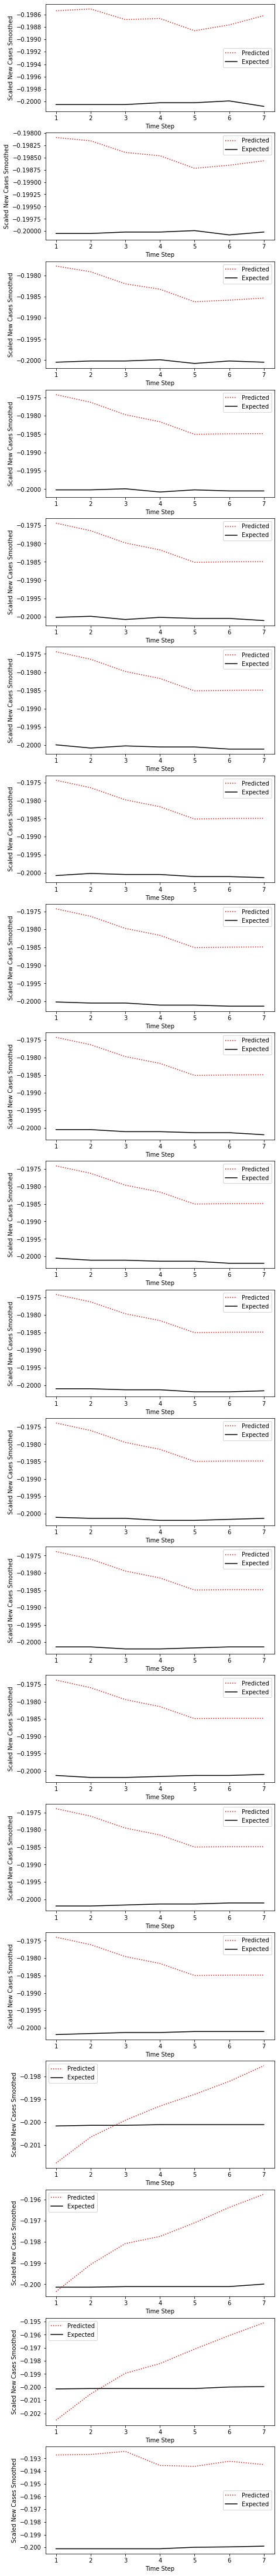

In [267]:
#here we plot the predictions and the real values for each test country
import matplotlib.pyplot as plt
x_axis = np.array([1,2,3,4,5,6,7])

#THESE INDICIES ARE HARD CODED
age_seventy_index = 1
new_cases_smoothed_index = 8

indicies = np.arange(new_cases_smoothed_index, WEEK * NUM_FEATURES , NUM_FEATURES)

fig, axs = plt.subplots(len(test_country_labels), 1, figsize=(7,80))
plt.setp(axs[:], xlabel='Time Step')
plt.setp(axs[:], ylabel='Scaled New Cases Smoothed')
prev_pred = predicted_labels[0][19][indicies]
prev_ex = test_country_labels[0][19][indicies]
for i in range(len(axs)):
    axs[i].plot(x_axis, predicted_labels[0][i][indicies], c='red', linestyle=':', label='Predicted')
    axs[i].plot(x_axis, test_country_labels[0][i][indicies], c='black', linestyle='solid', label='Expected')
    axs[i].legend()
    assert ~(prev_ex==test_country_labels[0][i][indicies]).all()
    assert ~(prev_pred==predicted_labels[0][i][indicies]).all()
    prev_pred = predicted_labels[0][i][indicies]
    prev_ex = test_country_labels[0][i][indicies]
 

plt.show()


## Plot the prediction of the second values against the real values

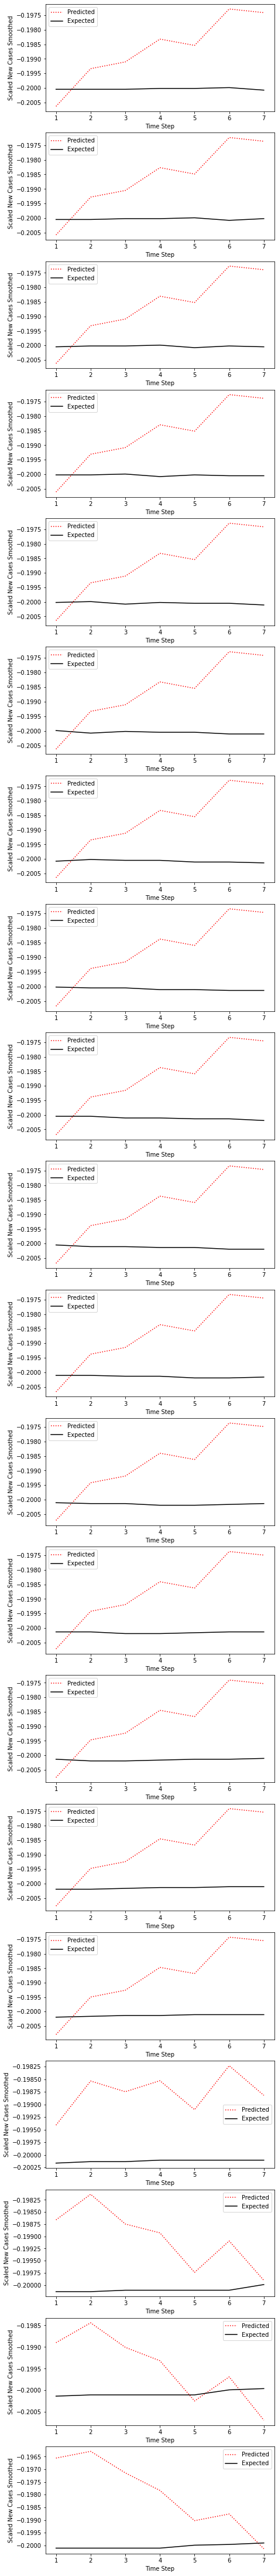

In [268]:
#here we plot the predictions and the real values for each test country

fig, axs = plt.subplots(len(test_country_labels), 1, figsize=(7,80))
plt.setp(axs[:], xlabel='Time Step')
plt.setp(axs[:], ylabel='Scaled New Cases Smoothed')
prev_sec_pred = second_predicted_labels[0][19][indicies]
prev_ex = test_country_labels[0][19][indicies]
for i in range(len(axs)):
    axs[i].plot(x_axis, second_predicted_labels[0][i][indicies], c='red', linestyle=':', label='Predicted')
    axs[i].plot(x_axis, test_country_labels[0][i][indicies], c='black', linestyle='solid', label='Expected')
    axs[i].legend()
    assert ~(prev_ex==test_country_labels[0][i][indicies]).all()
    assert ~(prev_sec_pred==second_predicted_labels[0][i][indicies]).all()
    prev_sec_pred = second_predicted_labels[0][i][indicies]
    prev_ex = test_country_labels[0][i][indicies]
 

plt.show()

## Show model evaluation statistics for the first model

In [270]:
# this is used to evaluate the models we've trained

cnn_model_scores = list()
length = len(test_country_windows)
prev = test_country_labels[0][length - 1]
for country in range(len(test_country_windows)):
    score = cnn_model.evaluate(test_country_windows[country], test_country_labels[country], verbose=0)
    cnn_model_scores.append(score)
    assert ~(test_country_labels[0][country] == prev).all()
    prev = test_country_labels[0][country]
    print(f'Test loss: {score[0]} // Test mean absolute error: {score[1]}')

Test loss: 0.013611698523163795 // Test mean absolute error: 0.013611698523163795
Test loss: 0.013611698523163795 // Test mean absolute error: 0.013611698523163795
Test loss: 0.013611698523163795 // Test mean absolute error: 0.013611698523163795
Test loss: 0.013611698523163795 // Test mean absolute error: 0.013611698523163795
Test loss: 0.013611698523163795 // Test mean absolute error: 0.013611698523163795
Test loss: 0.013611698523163795 // Test mean absolute error: 0.013611698523163795
Test loss: 0.013611698523163795 // Test mean absolute error: 0.013611698523163795
Test loss: 0.013611698523163795 // Test mean absolute error: 0.013611698523163795
Test loss: 0.013611698523163795 // Test mean absolute error: 0.013611698523163795
Test loss: 0.013611698523163795 // Test mean absolute error: 0.013611698523163795
Test loss: 0.013611698523163795 // Test mean absolute error: 0.013611698523163795
Test loss: 0.013611698523163795 // Test mean absolute error: 0.013611698523163795
Test loss: 0.013

## Model evaluation statistics for the second model

In [272]:
second_cnn_model_scores = list()
prev = test_country_labels[0][length - 1]
for country in range(len(test_country_windows)):
    inputs = reshape_input(test_country_windows[country])
    score = second_cnn_model.evaluate(inputs, test_country_labels[country], verbose=0)
    second_cnn_model_scores.append(score)
    assert ~(test_country_labels[0][country] == prev).all()
    prev = test_country_labels[0][country]
    print(f'Test loss: {score[0]} // Test mean absolute error: {score[1]}')

Test loss: 0.014056820422410965 // Test mean absolute error: 0.014056820422410965
Test loss: 0.014056820422410965 // Test mean absolute error: 0.014056820422410965
Test loss: 0.014056820422410965 // Test mean absolute error: 0.014056820422410965
Test loss: 0.014056820422410965 // Test mean absolute error: 0.014056820422410965
Test loss: 0.014056820422410965 // Test mean absolute error: 0.014056820422410965
Test loss: 0.014056820422410965 // Test mean absolute error: 0.014056820422410965
Test loss: 0.014056820422410965 // Test mean absolute error: 0.014056820422410965
Test loss: 0.014056820422410965 // Test mean absolute error: 0.014056820422410965
Test loss: 0.014056820422410965 // Test mean absolute error: 0.014056820422410965
Test loss: 0.014056820422410965 // Test mean absolute error: 0.014056820422410965
Test loss: 0.014056820422410965 // Test mean absolute error: 0.014056820422410965
Test loss: 0.014056820422410965 // Test mean absolute error: 0.014056820422410965
Test loss: 0.014

## Setting up Window Generator

In [10]:
import numpy as np

class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                        enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                               enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])
    
    def split_window(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:, :, self.column_indices[name]] for name in self.label_columns],
                axis=-1)

        # Slicing doesn't preserve static shape information, so set the shapes
        # manually. This way the `tf.data.Datasets` are easier to inspect.
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels
    #WindowGenerator.split_window = split_window
    
    def plot(self, model=None, plot_col='new_cases', max_subplots=3):
        inputs, labels = self.example
        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))
        for n in range(max_n):
            plt.subplot(3, 1, n+1)
            plt.ylabel(f'{plot_col} [normed]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                     label='Inputs', marker='.', zorder=-10)

            if self.label_columns:
                label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
                label_col_index = plot_col_index

            if label_col_index is None:
                continue

            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                        edgecolors='k', label='Labels', c='#2ca02c', s=64)
            if model is not None:
                predictions = model(inputs)
                plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                          marker='X', edgecolors='k', label='Predictions',
                          c='#ff7f0e', s=64)

            if n == 0:
                plt.legend()

        plt.xlabel('Time [h]')
        
    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=True,
            batch_size=32,)

        ds = ds.map(self.split_window)

        return ds
    
    @property
    def train(self):
        ds = []
        for df in self.train_df.groupby('country_id'):
            ds.append(self.make_dataset(self.train_df))
        for i in range(len(ds)):
            if i != 0:
                ds[0] = ds[0].concatenate(ds[i])
        return ds[0]

    @property
    def val(self):
        ds = []
        for df in self.val_df.groupby('country_id'):
            ds.append(self.make_dataset(self.val_df))
        for i in range(len(ds)):
            if i != 0:
                ds[0] = ds[0].concatenate(ds[i])
        return ds[0]

    @property
    def test(self):
        ds = []
        for df in self.test_df.groupby('country_id'):
            ds.append(self.make_dataset(self.test_df))
        for i in range(len(ds)):
            if i != 0:
                ds[0] = ds[0].concatenate(ds[i])
        return ds[0]

    @property
    def example(self):
        """Get and cache an example batch of `inputs, labels` for plotting."""
        result = getattr(self, '_example', None)
        if result is None:
            # No example batch was found, so get one from the `.train` dataset
            result = next(iter(self.train))
            # And cache it for next time
            self._example = result
        return result

<ConcatenateDataset shapes: ((None, 6, 47), (None, 1, 1)), types: (tf.float32, tf.float32)>

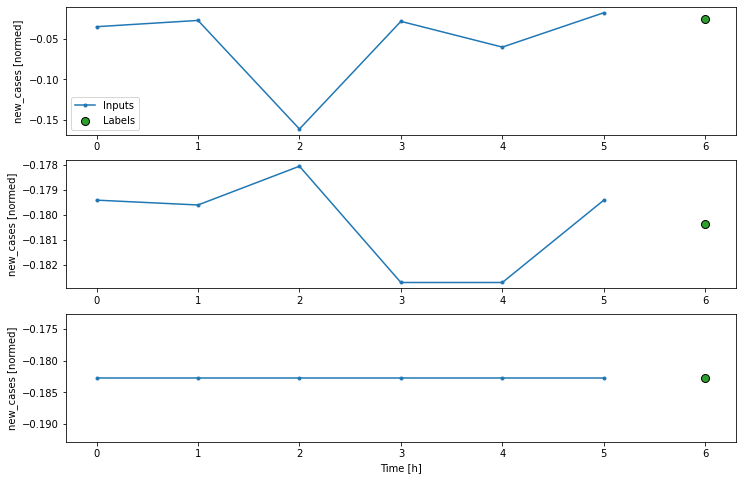

In [11]:
w1 = WindowGenerator(input_width=6, label_width=1, shift=1, label_columns=['new_cases'])
w1.plot()
display(w1.train)

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['new_cases']


## Convolution Neural Network

In [18]:
num_features = len(train_df.columns)
print(num_features)
print(train_df.columns.values)

47
['date' 'total_cases' 'new_cases' 'new_cases_smoothed' 'total_deaths'
 'new_deaths' 'new_deaths_smoothed' 'total_cases_per_million'
 'new_cases_per_million' 'new_cases_smoothed_per_million'
 'total_deaths_per_million' 'new_deaths_per_million'
 'new_deaths_smoothed_per_million' 'reproduction_rate' 'icu_patients'
 'icu_patients_per_million' 'hosp_patients' 'hosp_patients_per_million'
 'weekly_icu_admissions' 'weekly_icu_admissions_per_million'
 'weekly_hosp_admissions' 'weekly_hosp_admissions_per_million'
 'total_tests' 'new_tests' 'total_tests_per_thousand'
 'new_tests_per_thousand' 'new_tests_smoothed'
 'new_tests_smoothed_per_thousand' 'tests_per_case' 'positive_rate'
 'stringency_index' 'population' 'population_density' 'median_age'
 'aged_65_older' 'aged_70_older' 'gdp_per_capita' 'extreme_poverty'
 'cardiovasc_death_rate' 'diabetes_prevalence' 'female_smokers'
 'male_smokers' 'handwashing_facilities' 'hospital_beds_per_thousand'
 'life_expectancy' 'human_development_index' 'coun

In [32]:
# ITERATIONS=20
ITERATIONS=1
CONV_WIDTH = 7
OUT_STEPS = 7
LABEL_WIDTH = 7
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
#function to compile and fit the different models we call on it
def comp_fit(model, window, patience=3):
  #function is used to optimize model fitting, so if there are no updates, we stop
  stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(), metrics=[tf.metrics.MeanAbsoluteError()])
#   model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(), metrics=[tf.metrics.MeanSquaredError()])

  history = model.fit(window.train, verbose=1, epochs=ITERATIONS, validation_data=window.val, callbacks=[stop])

  return history
  


#this is where we build the convolution nueral network

#this is from the tensor flow doc
# conv_model = tf.keras.Sequential([
#     tf.keras.layers.Conv1D(filters=32,
#                            kernel_size=(CONV_WIDTH,),
#                            activation='relu'),
#     tf.keras.layers.Dense(units=32, activation='relu'),
#     tf.keras.layers.Dense(OUT_STEPS, kernel_initializer=tf.initializers.zeros),
#     tf.keras.layers.Reshape([7, 1])
# ])



In [ ]:
#Other potential model
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=64,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
#     tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(OUT_STEPS, kernel_initializer=tf.initializers.zeros),
    tf.keras.layers.Reshape([7, 1])
])


# conv_window = WindowGenerator(input_width=CONV_WIDTH, label_width=LABEL_WIDTH, shift=1, label_columns=['new_cases'])

window = WindowGenerator(
    input_width=7, label_width=7, shift=7,
    label_columns=['new_cases'])
window.plot()
window.train

# print("Conv model on `conv_window`")
# print('Input shape:', conv_window.example[0].shape)
# print('Output shape:', conv_model(conv_window.example[0]).shape)

# history = comp_fit(conv_model, conv_window)
history = comp_fit(conv_model, window)

IPython.display.clear_output()
window.plot(conv_model)
# val_performance = {}
# performance = {}
# val_performance['Conv'] = conv_model.evaluate(conv_window.val)
# performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

# wide_conv_window = WindowGenerator(
#     input_width=INPUT_WIDTH,
#     label_width=LABEL_WIDTH,
#     shift=1,
#     label_columns=['new_cases'])
# wide_conv_window.plot(conv_model)

13674/13674 [==============================] - 95s 7ms/step - loss: 0.2546 - mean_squared_error: 0.2546


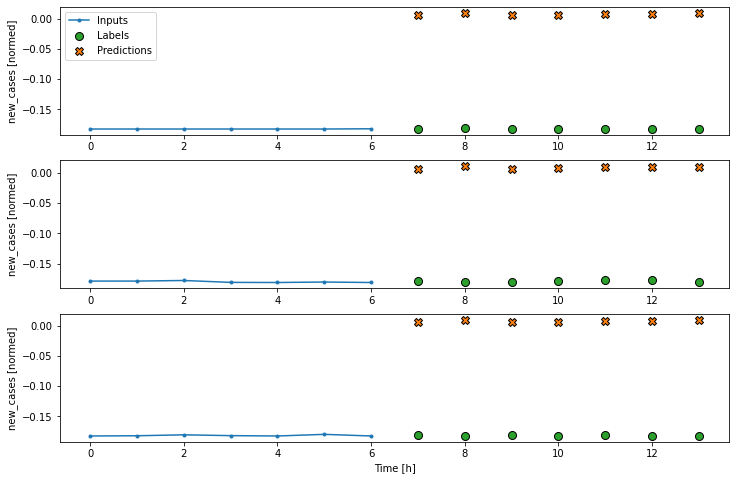

In [28]:
IPython.display.clear_output()
multi_train_performance={}
multi_val_performance = {}
multi_performance={}
multi_train_performance['CNN'] = conv_model.evaluate(window.train)
multi_val_performance['CNN'] = conv_model.evaluate(window.val)
multi_performance['CNN'] = conv_model.evaluate(window.test, verbose=0)
window.plot(conv_model)

13674/13674 [==============================] - 75s 5ms/step - loss: 0.2540 - mean_absolute_error: 0.2430


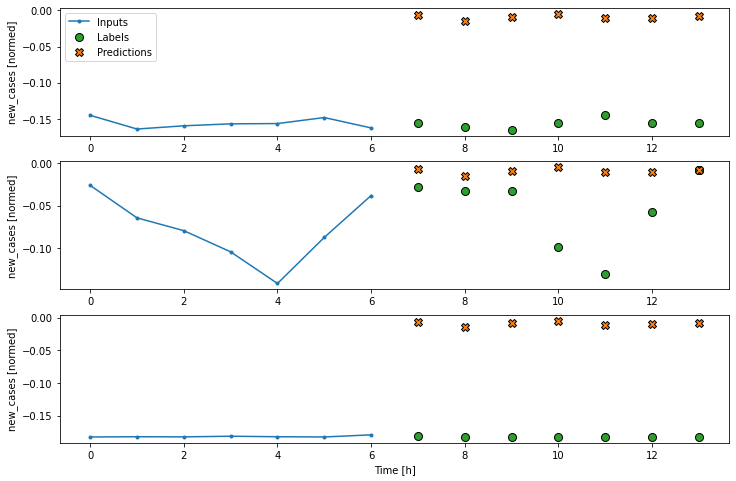

In [34]:
window = WindowGenerator(
    input_width=7, label_width=7, shift=7,
    label_columns=['new_cases'])


multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = comp_fit(multi_lstm_model, window)

IPython.display.clear_output()

multi_train_performance['LSTM'] = multi_lstm_model.evaluate(window.train)
multi_val_performance['LSTM'] = multi_lstm_model.evaluate(window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(window.test, verbose=0)
window.plot(multi_lstm_model)